##### Copyright 2019 The TensorFlow Authors.


In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Load CSV data

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/load_data/csv"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/load_data/csv.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/load_data/csv.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/load_data/csv.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial provides examples of how to use CSV data with TensorFlow.

There are two main parts to this:

1. **Loading the data off disk**
2. **Pre-processing it into a form suitable for training.**

This tutorial focuses on the loading, and gives some quick examples of preprocessing. To learn more about the preprocessing aspect, check out the [Working with preprocessing layers](https://www.tensorflow.org/guide/keras/preprocessing_layers) guide and the [Classify structured data using Keras preprocessing layers](../structured_data/preprocessing_layers.ipynb) tutorial.


## Setup

In [2]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

2024-08-16 07:14:23.551186: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-16 07:14:23.572583: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-16 07:14:23.579075: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## In memory data

For any small CSV dataset the simplest way to train a TensorFlow model on it is to load it into memory as a [pandas `DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) or a NumPy array.


A relatively simple example is the [abalone dataset](https://archive.ics.uci.edu/ml/datasets/abalone).

* The dataset is small.
* All the input features are limited-range floating point values.

Here is how to download the data into a `DataFrame`:

In [3]:
abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


The dataset contains a set of measurements of [abalone](https://en.wikipedia.org/wiki/Abalone), a type of sea snail.

![an abalone shell](https://tensorflow.org/images/abalone_shell.jpg)

 [“Abalone shell”](https://www.flickr.com/photos/thenickster/16641048623/) (by [Nicki Dugan Pogue](https://www.flickr.com/photos/thenickster/), CC BY-SA 2.0)


The nominal task for this dataset is to predict the age from the other measurements, so separate the features and labels for training:


In [4]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

For this dataset you will treat all features identically. Pack the features into a single NumPy array.:

In [5]:
abalone_features = np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

Next make a regression model predict the age. Since there is only a single input tensor, a `tf.keras.Sequential` model is sufficient here.

In [6]:
abalone_model = tf.keras.Sequential([
  layers.Dense(64, activation='relu'),
  layers.Dense(1)
])

abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                      optimizer = tf.keras.optimizers.Adam())

I0000 00:00:1723792465.996743  222190 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723792466.000553  222190 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723792466.003815  222190 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723792466.007504  222190 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

To train that model, pass the features and labels to `Model.fit`:

In [7]:
abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10


I0000 00:00:1723792468.428118  222359 service.cc:146] XLA service 0x7f100c01c790 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723792468.428162  222359 service.cc:154]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1723792468.428167  222359 service.cc:154]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1723792468.428169  222359 service.cc:154]   StreamExecutor device (2): Tesla T4, Compute Capability 7.5
I0000 00:00:1723792468.428172  222359 service.cc:154]   StreamExecutor device (3): Tesla T4, Compute Capability 7.5


  1/104 ━━━━━━━━━━━━━━━━━━━━ 1:57 1s/step - loss: 101.7966

 43/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 103.8427 

 92/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 96.5295 

I0000 00:00:1723792468.891864  222359 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 94.8062

104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 94.6642


Epoch 2/10


  1/104 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 50.7629

 48/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 46.2227 

 95/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 39.0303

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 37.7894


Epoch 3/10


  1/104 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 13.8769

 47/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.1019 

 94/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.6087 

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.5372


Epoch 4/10


  1/104 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 4.5751

 47/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.4707 

 95/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.8367

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.8776


Epoch 5/10


  1/104 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 6.0499

 46/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.2657 

 93/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.6390

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.6655


Epoch 6/10


  1/104 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 7.0033

 48/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.1531 

 98/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.3655

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.3812


Epoch 7/10


  1/104 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 11.8583

 49/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.9597  

 99/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.1229

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.1331


Epoch 8/10


  1/104 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 2.0677

 49/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.8608 

 98/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.8908

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.9013


Epoch 9/10


  1/104 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 5.2294

 49/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.8765 

100/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.9685

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.9626


Epoch 10/10


  1/104 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 7.6975

 48/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.1371 

 96/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.1340

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.0985


You have just seen the most basic way to train a model using CSV data. Next, you will learn how to apply preprocessing to normalize numeric columns.

## Basic preprocessing

It's good practice to normalize the inputs to your model. The Keras preprocessing layers provide a convenient way to build this normalization into your model.

The `tf.keras.layers.Normalization` layer precomputes the mean and variance of each column, and uses these to normalize the data.

First, create the layer:

In [8]:
normalize = layers.Normalization()

Then, use the `Normalization.adapt` method to adapt the normalization layer to your data.

Note: Only use your training data with the `PreprocessingLayer.adapt` method. Do not use your validation or test data.

In [9]:
normalize.adapt(abalone_features)

Then, use the normalization layer in your model:

In [10]:
norm_abalone_model = tf.keras.Sequential([
  normalize,
  layers.Dense(64, activation='relu'),
  layers.Dense(1)
])

norm_abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                           optimizer = tf.keras.optimizers.Adam())

norm_abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10


  1/104 ━━━━━━━━━━━━━━━━━━━━ 1:39 964ms/step - loss: 84.7515

 48/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 93.7718    

 97/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 87.0590

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 86.1396

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 86.0107


Epoch 2/10


  1/104 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 51.7318

 48/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 44.0043 

 97/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 42.1061

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 41.7985


Epoch 3/10


  1/104 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 28.1454

 49/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 31.3546 

 99/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30.2772

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30.1734


Epoch 4/10


  1/104 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 25.3323

 46/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.3462 

 93/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.5924

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.2187


Epoch 5/10


  1/104 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 12.5204

 46/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.9890 

 93/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.3221

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.0996


Epoch 6/10


  1/104 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 8.4771

 46/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.0028 

 94/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.8131

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.8169


Epoch 7/10


  1/104 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 10.0407

 48/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.2617  

 97/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.1790

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.1509


Epoch 8/10


  1/104 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 4.3884

 46/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.3787 

 92/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.4794

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.4672


Epoch 9/10


  1/104 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 2.8234

 48/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.9759 

 98/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.9421

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.9506


Epoch 10/10


  1/104 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 4.8825

 46/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.8287 

 92/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.8185

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.8023


## Mixed data types

In the previous sections, you worked with a dataset where all the features were limited-range floating point values. But not all datasets are limited to a single data type.

The "Titanic" dataset contains information about the passengers on the Titanic. The nominal task on this dataset is to predict who survived.

![The Titanic](images/csv/Titanic.jpg)

Image [from Wikimedia](https://commons.wikimedia.org/wiki/File:RMS_Titanic_3.jpg)

The raw data can easily be loaded as a Pandas `DataFrame`, but is not immediately usable as input to a TensorFlow model.


In [11]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [12]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

Because of the different data types and ranges, you can't simply stack the features into a NumPy array and pass it to a `tf.keras.Sequential` model. Each column needs to be handled individually.

As one option, you could preprocess your data offline (using any tool you like) to convert categorical columns to numeric columns, then pass the processed output to your TensorFlow model. The disadvantage to that approach is that if you save and export your model the preprocessing is not saved with it. The Keras preprocessing layers avoid this problem because they're part of the model.


In this example, you'll build a model that implements the preprocessing logic using [Keras functional API](https://www.tensorflow.org/guide/keras/functional). You could also do it by [subclassing](https://www.tensorflow.org/guide/keras/custom_layers_and_models).

The functional API operates on "symbolic" tensors. Normal "eager" tensors have a value. In contrast these "symbolic" tensors do not. Instead they keep track of which operations are run on them, and build a representation of the calculation, that you can run later. Here's a quick example:

In [13]:
# Create a symbolic input
input = tf.keras.Input(shape=(), dtype=tf.float32)

# Perform a calculation using the input
result = 2*input + 1

# the result doesn't have a value
result

<KerasTensor shape=(None,), dtype=float32, sparse=False, name=keras_tensor_9>

In [14]:
calc = tf.keras.Model(inputs=input, outputs=result)

In [15]:
print(calc(np.array([1])).numpy())
print(calc(np.array([2])).numpy())

[3.]
[5.]


To build the preprocessing model, start by building a set of symbolic `tf.keras.Input` objects, matching the names and data-types of the CSV columns.

In [16]:
inputs = {}

for name, column in titanic_features.items():
  dtype = column.dtype
  if dtype == object:
    dtype = tf.string
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'sex': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=sex>,
 'age': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=age>,
 'n_siblings_spouses': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=n_siblings_spouses>,
 'parch': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=parch>,
 'fare': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=fare>,
 'class': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=class>,
 'deck': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=deck>,
 'embark_town': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=embark_town>,
 'alone': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=alone>}

The first step in your preprocessing logic is to concatenate the numeric inputs together, and run them through a normalization layer:

In [17]:
numeric_inputs = {name:input for name,input in inputs.items()
                  if input.dtype==tf.float32}

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = layers.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

<KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_11>

Collect all the symbolic preprocessing results, to concatenate them later:

In [18]:
preprocessed_inputs = [all_numeric_inputs]

For the string inputs use the `tf.keras.layers.StringLookup` function to map from strings to integer indices in a vocabulary. Next, use `tf.keras.layers.CategoryEncoding` to convert the indexes into `float32` data appropriate for the model.

The default settings for the `tf.keras.layers.CategoryEncoding` layer create a one-hot vector for each input. A `tf.keras.layers.Embedding` would also work. Check out the [Working with preprocessing layers](https://www.tensorflow.org/guide/keras/preprocessing_layers) guide and the [Classify structured data using Keras preprocessing layers](../structured_data/preprocessing_layers.ipynb) tutorial for more on this topic.

In [19]:
for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue
  
  lookup = layers.StringLookup(vocabulary=np.unique(titanic_features[name]))
  one_hot = layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

With the collection of `inputs` and `preprocessed_inputs`, you can concatenate all the preprocessed inputs together, and build a model that handles the preprocessing:

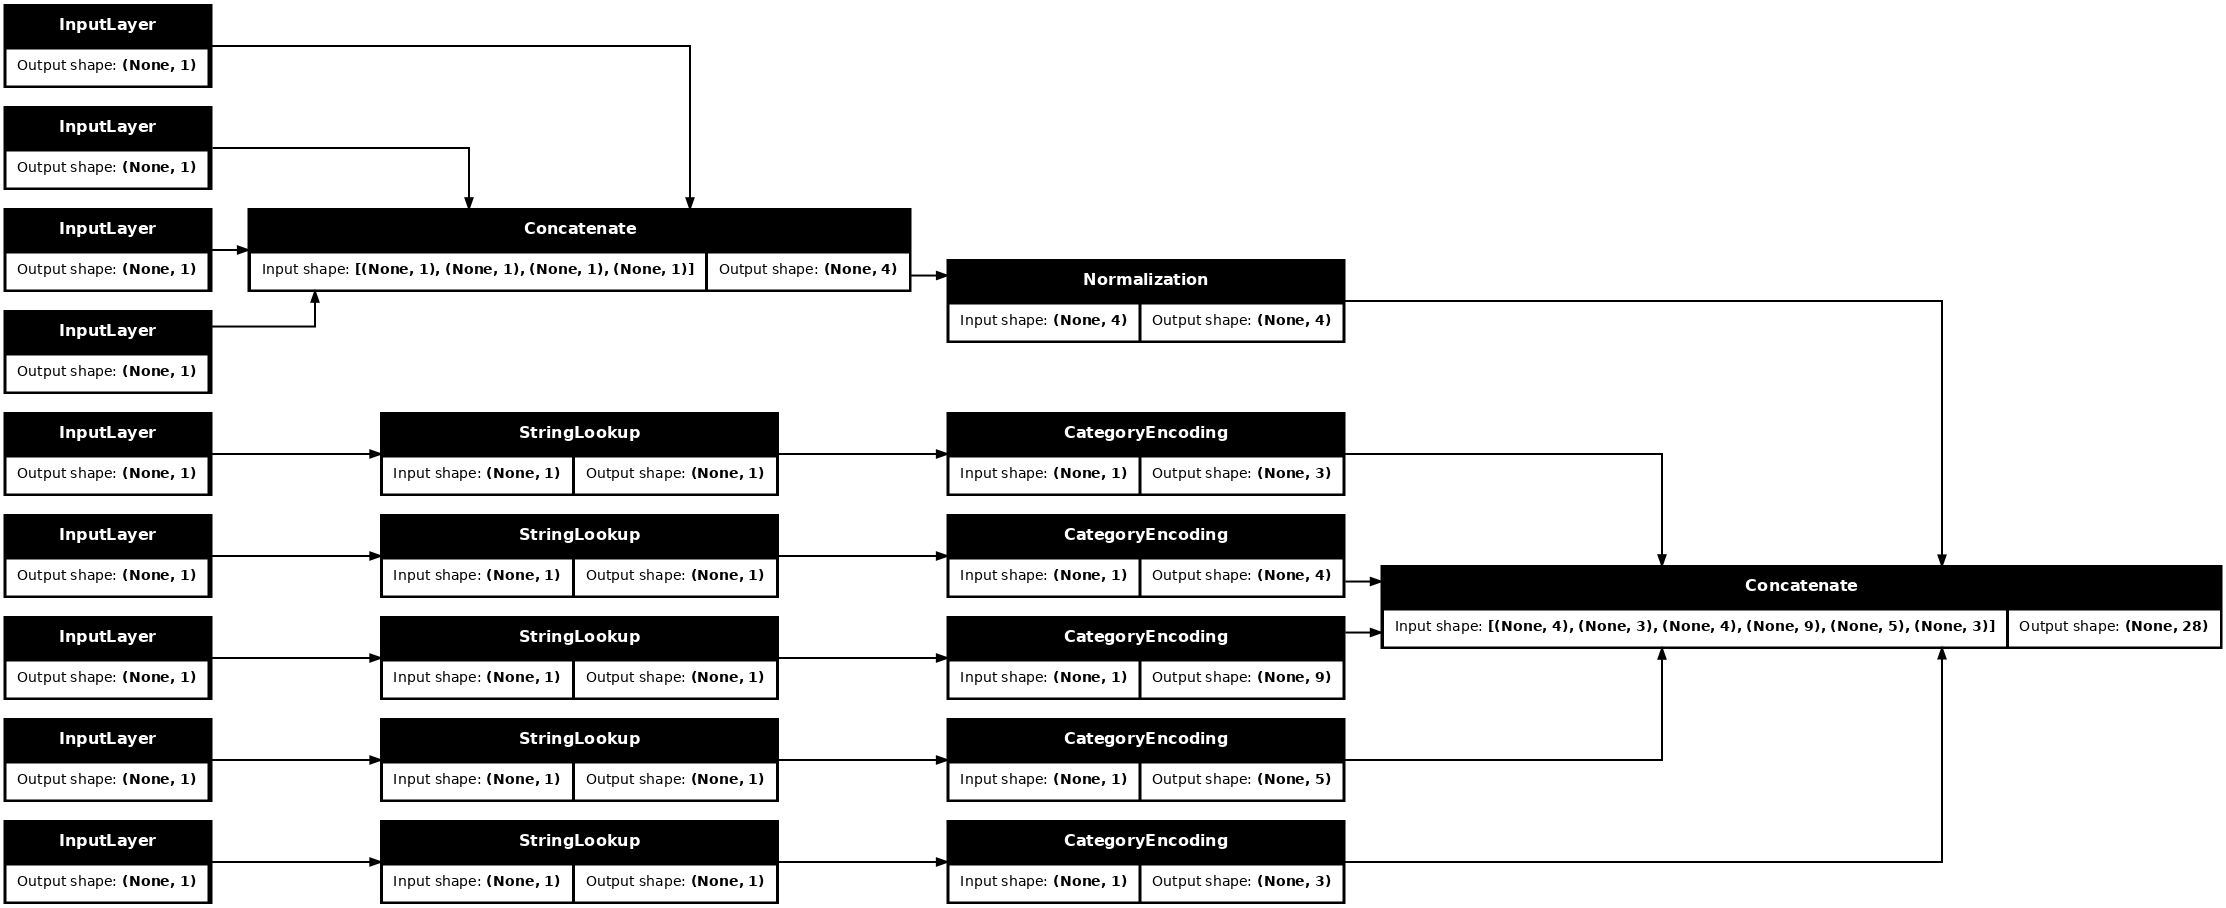

In [20]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(model = titanic_preprocessing , rankdir="LR", dpi=72, show_shapes=True)

This model just contains the input preprocessing. You can run it to see what it does to your data. Keras models don't automatically convert pandas `DataFrame`s because it's not clear if it should be converted to one tensor or to a dictionary of tensors. So, convert it to a dictionary of tensors:

In [21]:
titanic_features_dict = {name: np.array(value) 
                         for name, value in titanic_features.items()}

Slice out the first training example and pass it to this preprocessing model, you see the numeric features and string one-hots all concatenated together:

In [22]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}
titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
array([[-0.61 ,  0.395, -0.479, -0.497,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  1.   ,  0.   ]], dtype=float32)>

Now, build the model on top of this:

In [23]:
def titanic_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam())
  return model

titanic_model = titanic_model(titanic_preprocessing, inputs)

When you train the model, pass the dictionary of features as `x`, and the label as `y`.

In [24]:
titanic_model.fit(x=titanic_features_dict, y=titanic_labels, epochs=10)

Epoch 1/10


 1/20 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - loss: 0.6629

18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6849

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6818


Epoch 2/10


 1/20 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.6230

19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5940 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5930


Epoch 3/10


 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.4689

19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5348 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5349


Epoch 4/10


 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.4765

19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4972 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4976


Epoch 5/10


 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.6048

19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4998 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4973


Epoch 6/10


 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.4968

19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4512 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4514


Epoch 7/10


 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.5715

19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4725 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4692


Epoch 8/10


 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3375

19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3998 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4024


Epoch 9/10


 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.4794

19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4249 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4243


Epoch 10/10


 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3925

19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3964 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3980


Since the preprocessing is part of the model, you can save the model and reload it somewhere else and get identical results:

In [25]:
titanic_model.save('test.keras')
reloaded = tf.keras.models.load_model('test.keras')

In [26]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}

before = titanic_model(features_dict)
after = reloaded(features_dict)
assert (before-after)<1e-3
print(before)
print(after)

tf.Tensor([[-1.882]], shape=(1, 1), dtype=float32)
tf.Tensor([[-1.882]], shape=(1, 1), dtype=float32)


## Using tf.data


In the previous section you relied on the model's built-in data shuffling and batching while training the model.

If you need more control over the input data pipeline or need to use data that doesn't easily fit into memory: use `tf.data`.

For more examples, refer to the [`tf.data`: Build TensorFlow input pipelines](../../guide/data.ipynb) guide.

### On in memory data

As a first example of applying `tf.data` to CSV data, consider the following code to manually slice up the dictionary of features from the previous section. For each index, it takes that index for each feature:


In [27]:
import itertools

def slices(features):
  for i in itertools.count():
    # For each feature take index `i`
    example = {name:values[i] for name, values in features.items()}
    yield example

Run this and print the first example:

In [28]:
for example in slices(titanic_features_dict):
  for name, value in example.items():
    print(f"{name:19s}: {value}")
  break

sex                : male
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : Third
deck               : unknown
embark_town        : Southampton
alone              : n


The most basic `tf.data.Dataset` in memory data loader is the `Dataset.from_tensor_slices` constructor. This returns a `tf.data.Dataset` that implements a generalized version of the above `slices` function, in TensorFlow.

In [29]:
features_ds = tf.data.Dataset.from_tensor_slices(titanic_features_dict)

You can iterate over a `tf.data.Dataset` like any other python iterable:

In [30]:
for example in features_ds:
  for name, value in example.items():
    print(f"{name:19s}: {value}")
  break

sex                : b'male'
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : b'Third'
deck               : b'unknown'
embark_town        : b'Southampton'
alone              : b'n'


The `from_tensor_slices` function can handle any structure of nested dictionaries or tuples. The following code makes a dataset of `(features_dict, labels)` pairs:

In [31]:
titanic_ds = tf.data.Dataset.from_tensor_slices((titanic_features_dict, titanic_labels))

To train a model using this `Dataset`, you'll need to at least `shuffle` and `batch` the data.

In [32]:
titanic_batches = titanic_ds.shuffle(len(titanic_labels)).batch(32)

Instead of passing `features` and `labels` to `Model.fit`, you pass the dataset:

In [33]:
titanic_model.fit(titanic_batches, epochs=5)

Epoch 1/5


 1/20 ━━━━━━━━━━━━━━━━━━━━ 8s 421ms/step - loss: 0.5006

19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3861  

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3885


Epoch 2/5


 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3356

19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4171

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4162


Epoch 3/5


 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4736

19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4291

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4269


Epoch 4/5


 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3839

19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3923

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3933


Epoch 5/5


 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3606

19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3672

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3703


### From a single file

So far this tutorial has worked with in-memory data. `tf.data` is a highly scalable toolkit for building data pipelines, and provides a few functions for loading CSV files. 

In [34]:
titanic_file_path = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

    0/30874 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step

30874/30874 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Now read the CSV data from the file and create a `tf.data.Dataset`.

(For the full documentation, see `tf.data.experimental.make_csv_dataset`)


In [35]:
titanic_csv_ds = tf.data.experimental.make_csv_dataset(
    titanic_file_path,
    batch_size=5, # Artificially small to make examples easier to show.
    label_name='survived',
    num_epochs=1,
    ignore_errors=True,)

Instructions for updating:
Use `tf.data.Dataset.ignore_errors` instead.


This function includes many convenient features, so the data is easy to work with. This includes:

* Using the column headers as dictionary keys.
* Automatically determining the type of each column.

Caution: Make sure to set the `num_epochs` argument in `tf.data.experimental.make_csv_dataset`, otherwise the default behavior for `tf.data.Dataset` is to loop endlessly.

In [36]:
for batch, label in titanic_csv_ds.take(1):
  for key, value in batch.items():
    print(f"{key:20s}: {value}")
  print()
  print(f"{'label':20s}: {label}")

sex                 : [b'male' b'male' b'male' b'male' b'female']
age                 : [28. 28. 48. 61. 28.]
n_siblings_spouses  : [0 0 0 0 1]
parch               : [0 0 0 0 0]
fare                : [ 7.75   7.896 26.55  32.321 51.862]
class               : [b'Third' b'Third' b'First' b'First' b'First']
deck                : [b'unknown' b'unknown' b'E' b'D' b'D']
embark_town         : [b'Queenstown' b'Southampton' b'Southampton' b'Southampton' b'Southampton']
alone               : [b'y' b'y' b'y' b'y' b'n']

label               : [0 0 1 0 1]


Note: If you run the above cell twice it will produce different results. The default settings for `tf.data.experimental.make_csv_dataset` include `shuffle_buffer_size=1000`, which is more than sufficient for this small dataset, but may not be for a real-world dataset.

It can also decompress the data on the fly. Here's a gzipped CSV file containing the [metro interstate traffic dataset](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

![A traffic jam.](images/csv/traffic.jpg)

Image [from Wikimedia](https://commons.wikimedia.org/wiki/File:Trafficjam.jpg)


In [37]:
traffic_volume_csv_gz = tf.keras.utils.get_file(
    'Metro_Interstate_Traffic_Volume.csv.gz', 
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz",
    cache_dir='.', cache_subdir='traffic')

      0/Unknown 0s 0s/step

  24576/Unknown 0s 2us/step

  49152/Unknown 0s 3us/step

  81920/Unknown 0s 3us/step

  98304/Unknown 0s 3us/step

 131072/Unknown 0s 3us/step

 147456/Unknown 0s 3us/step

 163840/Unknown 1s 3us/step

 172032/Unknown 1s 4us/step

 196608/Unknown 1s 3us/step

 212992/Unknown 1s 3us/step

 221184/Unknown 1s 4us/step

 229376/Unknown 1s 4us/step

 245760/Unknown 1s 4us/step

 253952/Unknown 1s 4us/step

 262144/Unknown 1s 4us/step

 270336/Unknown 1s 4us/step

 286720/Unknown 1s 4us/step

 294912/Unknown 1s 4us/step

 311296/Unknown 1s 4us/step

 327680/Unknown 1s 4us/step

 344064/Unknown 2s 4us/step

 352256/Unknown 2s 4us/step

 368640/Unknown 2s 5us/step

 385024/Unknown 2s 5us/step

 393216/Unknown 2s 5us/step

 401408/Unknown 2s 5us/step

Set the `compression_type` argument to read directly from the compressed file:

In [38]:
traffic_volume_csv_gz_ds = tf.data.experimental.make_csv_dataset(
    traffic_volume_csv_gz,
    batch_size=256,
    label_name='traffic_volume',
    num_epochs=1,
    compression_type="GZIP")

for batch, label in traffic_volume_csv_gz_ds.take(1):
  for key, value in batch.items():
    print(f"{key:20s}: {value[:5]}")
  print()
  print(f"{'label':20s}: {label[:5]}")

holiday             : [b'None' b'None' b'None' b'None' b'None']


temp                : [249.51 288.47 254.48 275.54 274.24]
rain_1h             : [0. 0. 0. 0. 0.]
snow_1h             : [0. 0. 0. 0. 0.]
clouds_all          : [88 44  1 90 20]
weather_main        : [b'Clouds' b'Clouds' b'Clear' b'Mist' b'Clouds']
weather_description : [b'overcast clouds' b'scattered clouds' b'sky is clear' b'mist'
 b'few clouds']
date_time           : [b'2013-02-03 03:00:00' b'2013-08-07 08:00:00' b'2013-01-01 23:00:00'
 b'2013-01-12 11:00:00' b'2012-10-30 01:00:00']

label               : [ 338 5990  845 4017  393]


Note: If you need to parse those date-time strings in the `tf.data` pipeline, you can use `tfa.text.parse_time`.

### Caching

There is some overhead to parsing the CSV data. For small models this can be the bottleneck in training.

Depending on your use case, it may be a good idea to use `Dataset.cache` or `tf.data.Dataset.snapshot`, so that the CSV data is only parsed on the first epoch.

The main difference between the `cache` and `snapshot` methods is that `cache` files can only be used by the TensorFlow process that created them, but `snapshot` files can be read by other processes.

For example, iterating over the `traffic_volume_csv_gz_ds` 20 times may take around 15 seconds without caching, or about two seconds with caching.

In [39]:
%%time
for i, (batch, label) in enumerate(traffic_volume_csv_gz_ds.repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

.

..

.

.

.

..

.

.

.

.

.

..

.

..

.

..

.

..

...

..

...

...

...

..

...

...

...

...

...

..

...

...

...

..

...

...

..

...

..

...

...

...

...

..
CPU times: user 12.9 s, sys: 2.09 s, total: 15 s
Wall time: 9.41 s


Note: `Dataset.cache` stores the data from the first epoch and replays it in order. So, using the `cache` method disables any shuffles earlier in the pipeline. Below, `Dataset.shuffle` is added back in after `Dataset.cache`.

In [40]:
%%time
caching = traffic_volume_csv_gz_ds.cache().shuffle(1000)

for i, (batch, label) in enumerate(caching.shuffle(1000).repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

................

.................

.................

.................

.................

...........
CPU times: user 1.83 s, sys: 197 ms, total: 2.03 s
Wall time: 1.73 s


Note: The `tf.data.Dataset.snapshot` files are meant for *temporary* storage of a dataset while in use. This is *not* a format for long term storage. The file format is considered an internal detail, and not guaranteed between TensorFlow versions.

In [41]:
%%time
snapshotting = traffic_volume_csv_gz_ds.snapshot('titanic.tfsnap').shuffle(1000)

for i, (batch, label) in enumerate(snapshotting.shuffle(1000).repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

............

............

...............

...............

...............

................

..........
CPU times: user 2.71 s, sys: 686 ms, total: 3.39 s
Wall time: 2.08 s


If your data loading is slowed by loading CSV files, and `Dataset.cache` and `tf.data.Dataset.snapshot` are insufficient for your use case, consider re-encoding your data into a more streamlined format.

### Multiple files

All the examples so far in this section could easily be done without `tf.data`. One place where `tf.data` can really simplify things is when dealing with collections of files.

For example, the [character font images](https://archive.ics.uci.edu/ml/datasets/Character+Font+Images) dataset is distributed as a collection of csv files, one per font.

![Fonts](images/csv/fonts.jpg)

Image by <a href="https://pixabay.com/users/wilhei-883152/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=705667">Willi Heidelbach</a> from <a href="https://pixabay.com/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=705667">Pixabay</a>

Download the dataset, and review the files inside:

In [42]:
fonts_zip = tf.keras.utils.get_file(
    'fonts.zip',  "https://archive.ics.uci.edu/ml/machine-learning-databases/00417/fonts.zip",
    cache_dir='.', cache_subdir='fonts',
    extract=True)

      0/Unknown 0s 0s/step

   8192/Unknown 0s 6us/step

  32768/Unknown 0s 4us/step

  40960/Unknown 0s 6us/step

  65536/Unknown 0s 5us/step

  90112/Unknown 0s 4us/step

  98304/Unknown 0s 5us/step

 122880/Unknown 1s 4us/step

 131072/Unknown 1s 5us/step

 163840/Unknown 1s 5us/step

 180224/Unknown 1s 5us/step

 188416/Unknown 1s 5us/step

 204800/Unknown 1s 5us/step

 212992/Unknown 1s 5us/step

 221184/Unknown 1s 6us/step

 229376/Unknown 1s 6us/step

 245760/Unknown 1s 6us/step

 253952/Unknown 2s 6us/step

 262144/Unknown 2s 6us/step

 270336/Unknown 2s 7us/step

 286720/Unknown 2s 7us/step

 294912/Unknown 2s 7us/step

 303104/Unknown 2s 7us/step

 311296/Unknown 2s 7us/step

 327680/Unknown 2s 7us/step

 335872/Unknown 2s 7us/step

 344064/Unknown 2s 7us/step

 352256/Unknown 3s 7us/step

 360448/Unknown 3s 7us/step

 368640/Unknown 3s 7us/step

 376832/Unknown 3s 7us/step

 385024/Unknown 3s 7us/step

 393216/Unknown 3s 8us/step

 401408/Unknown 3s 8us/step

 409600/Unknown 3s 8us/step

 417792/Unknown 3s 8us/step

 425984/Unknown 3s 8us/step

 434176/Unknown 4s 8us/step

 450560/Unknown 4s 8us/step

 458752/Unknown 4s 8us/step

 475136/Unknown 4s 8us/step

 491520/Unknown 4s 8us/step

 507904/Unknown 4s 8us/step

 516096/Unknown 4s 8us/step

 532480/Unknown 4s 8us/step

 540672/Unknown 4s 8us/step

 548864/Unknown 4s 8us/step

 557056/Unknown 5s 8us/step

 573440/Unknown 5s 8us/step

 581632/Unknown 5s 8us/step

 598016/Unknown 5s 8us/step

 614400/Unknown 5s 8us/step

 630784/Unknown 5s 8us/step

 638976/Unknown 5s 8us/step

 655360/Unknown 5s 8us/step

 663552/Unknown 6s 8us/step

 671744/Unknown 6s 8us/step

 679936/Unknown 6s 8us/step

 688128/Unknown 6s 8us/step

 704512/Unknown 6s 8us/step

 712704/Unknown 6s 8us/step

 720896/Unknown 6s 8us/step

 729088/Unknown 6s 8us/step

 737280/Unknown 6s 8us/step

 761856/Unknown 6s 8us/step

 786432/Unknown 6s 8us/step

 794624/Unknown 6s 8us/step

 811008/Unknown 7s 8us/step

 827392/Unknown 7s 8us/step

 835584/Unknown 7s 8us/step

 843776/Unknown 7s 8us/step

 851968/Unknown 7s 8us/step

 860160/Unknown 7s 8us/step

 876544/Unknown 7s 8us/step

 884736/Unknown 7s 8us/step

 892928/Unknown 7s 8us/step

 901120/Unknown 7s 8us/step

 917504/Unknown 7s 8us/step

 942080/Unknown 7s 8us/step

 958464/Unknown 8s 8us/step

 974848/Unknown 8s 8us/step

 983040/Unknown 8s 8us/step

 999424/Unknown 8s 8us/step

1015808/Unknown 8s 8us/step

1024000/Unknown 8s 8us/step

1032192/Unknown 8s 8us/step

1048576/Unknown 8s 8us/step

1056768/Unknown 8s 8us/step

1064960/Unknown 8s 8us/step

1081344/Unknown 8s 8us/step

1089536/Unknown 8s 8us/step

1097728/Unknown 8s 8us/step

1105920/Unknown 9s 8us/step

1114112/Unknown 9s 8us/step

1130496/Unknown 9s 8us/step

1138688/Unknown 9s 8us/step

1146880/Unknown 9s 8us/step

1155072/Unknown 9s 8us/step

1171456/Unknown 9s 8us/step

1179648/Unknown 9s 8us/step

1187840/Unknown 9s 8us/step

1196032/Unknown 10s 8us/step

1212416/Unknown 10s 8us/step

1220608/Unknown 10s 8us/step

1236992/Unknown 10s 8us/step

1253376/Unknown 10s 8us/step

1261568/Unknown 10s 8us/step

1269760/Unknown 10s 8us/step

1277952/Unknown 10s 8us/step

1286144/Unknown 10s 8us/step

1302528/Unknown 10s 8us/step

1310720/Unknown 11s 8us/step

1327104/Unknown 11s 8us/step

1335296/Unknown 11s 8us/step

1343488/Unknown 11s 8us/step

1359872/Unknown 11s 8us/step

1384448/Unknown 11s 8us/step

1392640/Unknown 11s 8us/step

1409024/Unknown 11s 8us/step

1425408/Unknown 11s 8us/step

1433600/Unknown 11s 8us/step

1449984/Unknown 11s 8us/step

1474560/Unknown 11s 8us/step

1490944/Unknown 11s 8us/step

1507328/Unknown 12s 8us/step

1515520/Unknown 12s 8us/step

1531904/Unknown 12s 8us/step

1556480/Unknown 12s 8us/step

1572864/Unknown 12s 8us/step

1589248/Unknown 12s 8us/step

1597440/Unknown 12s 8us/step

1605632/Unknown 12s 8us/step

1622016/Unknown 12s 8us/step

1638400/Unknown 12s 8us/step

1646592/Unknown 12s 8us/step

1662976/Unknown 13s 8us/step

1687552/Unknown 13s 7us/step

1695744/Unknown 13s 7us/step

1703936/Unknown 13s 7us/step

1720320/Unknown 13s 7us/step

1736704/Unknown 13s 7us/step

1744896/Unknown 13s 7us/step

1761280/Unknown 13s 7us/step

1777664/Unknown 13s 7us/step

1794048/Unknown 13s 7us/step

1818624/Unknown 13s 7us/step

1835008/Unknown 13s 7us/step

1843200/Unknown 13s 7us/step

1851392/Unknown 14s 7us/step

1867776/Unknown 14s 7us/step

1875968/Unknown 14s 7us/step

1884160/Unknown 14s 7us/step

1892352/Unknown 14s 7us/step

1908736/Unknown 14s 7us/step

1916928/Unknown 14s 7us/step

1925120/Unknown 14s 7us/step

1933312/Unknown 14s 7us/step

1941504/Unknown 14s 7us/step

1949696/Unknown 15s 7us/step

1957888/Unknown 15s 7us/step

1966080/Unknown 15s 8us/step

1974272/Unknown 15s 8us/step

1982464/Unknown 15s 8us/step

1990656/Unknown 15s 8us/step

2007040/Unknown 15s 8us/step

2031616/Unknown 15s 7us/step

2039808/Unknown 15s 7us/step

2048000/Unknown 16s 8us/step

2064384/Unknown 16s 8us/step

2072576/Unknown 16s 8us/step

2088960/Unknown 16s 8us/step

2105344/Unknown 16s 8us/step

2113536/Unknown 16s 8us/step

2129920/Unknown 16s 8us/step

2146304/Unknown 17s 8us/step

2154496/Unknown 17s 8us/step

2162688/Unknown 17s 8us/step

2170880/Unknown 17s 8us/step

2187264/Unknown 17s 8us/step

2203648/Unknown 17s 8us/step

2211840/Unknown 17s 8us/step

2228224/Unknown 17s 8us/step

2236416/Unknown 17s 8us/step

2244608/Unknown 17s 8us/step

2252800/Unknown 17s 8us/step

2260992/Unknown 17s 8us/step

2277376/Unknown 18s 8us/step

2293760/Unknown 18s 8us/step

2301952/Unknown 18s 8us/step

2318336/Unknown 18s 8us/step

2326528/Unknown 18s 8us/step

2342912/Unknown 18s 8us/step

2367488/Unknown 18s 8us/step

2375680/Unknown 19s 8us/step

2383872/Unknown 19s 8us/step

2408448/Unknown 19s 8us/step

2424832/Unknown 19s 8us/step

2433024/Unknown 19s 8us/step

2457600/Unknown 19s 8us/step

2473984/Unknown 19s 8us/step

2490368/Unknown 19s 8us/step

2506752/Unknown 19s 8us/step

2523136/Unknown 19s 8us/step

2539520/Unknown 19s 8us/step

2547712/Unknown 19s 8us/step

2564096/Unknown 19s 8us/step

2588672/Unknown 19s 7us/step

2605056/Unknown 19s 7us/step

2621440/Unknown 20s 7us/step

2646016/Unknown 20s 7us/step

2670592/Unknown 20s 7us/step

2686976/Unknown 20s 7us/step

2695168/Unknown 20s 7us/step

2727936/Unknown 20s 7us/step

2744320/Unknown 20s 7us/step

2760704/Unknown 20s 7us/step

2785280/Unknown 20s 7us/step

2809856/Unknown 20s 7us/step

2818048/Unknown 20s 7us/step

2842624/Unknown 20s 7us/step

2867200/Unknown 20s 7us/step

2883584/Unknown 20s 7us/step

2891776/Unknown 21s 7us/step

2908160/Unknown 21s 7us/step

2924544/Unknown 21s 7us/step

2932736/Unknown 21s 7us/step

2940928/Unknown 21s 7us/step

2957312/Unknown 21s 7us/step

2973696/Unknown 21s 7us/step

2981888/Unknown 21s 7us/step

3006464/Unknown 21s 7us/step

3014656/Unknown 21s 7us/step

3022848/Unknown 21s 7us/step

3039232/Unknown 21s 7us/step

3047424/Unknown 21s 7us/step

3063808/Unknown 22s 7us/step

3088384/Unknown 22s 7us/step

3104768/Unknown 22s 7us/step

3129344/Unknown 22s 7us/step

3145728/Unknown 22s 7us/step

3153920/Unknown 22s 7us/step

3178496/Unknown 22s 7us/step

3194880/Unknown 22s 7us/step

3203072/Unknown 22s 7us/step

3227648/Unknown 22s 7us/step

3235840/Unknown 22s 7us/step

3260416/Unknown 22s 7us/step

3268608/Unknown 22s 7us/step

3284992/Unknown 22s 7us/step

3301376/Unknown 22s 7us/step

3317760/Unknown 23s 7us/step

3334144/Unknown 23s 7us/step

3350528/Unknown 23s 7us/step

3358720/Unknown 23s 7us/step

3375104/Unknown 23s 7us/step

3383296/Unknown 23s 7us/step

3416064/Unknown 23s 7us/step

3424256/Unknown 23s 7us/step

3448832/Unknown 23s 7us/step

3465216/Unknown 23s 7us/step

3481600/Unknown 23s 7us/step

3506176/Unknown 23s 7us/step

3522560/Unknown 23s 7us/step

3547136/Unknown 23s 7us/step

3579904/Unknown 23s 7us/step

3596288/Unknown 24s 7us/step

3620864/Unknown 24s 7us/step

3637248/Unknown 24s 7us/step

3670016/Unknown 24s 6us/step

3694592/Unknown 24s 6us/step

3710976/Unknown 24s 6us/step

3719168/Unknown 24s 6us/step

3727360/Unknown 24s 6us/step

3743744/Unknown 24s 6us/step

3760128/Unknown 24s 6us/step

3768320/Unknown 24s 6us/step

3784704/Unknown 24s 6us/step

3809280/Unknown 24s 6us/step

3825664/Unknown 24s 6us/step

3850240/Unknown 24s 6us/step

3858432/Unknown 24s 6us/step

3883008/Unknown 24s 6us/step

3899392/Unknown 25s 6us/step

3907584/Unknown 25s 6us/step

3932160/Unknown 25s 6us/step

3948544/Unknown 25s 6us/step

3964928/Unknown 25s 6us/step

3973120/Unknown 25s 6us/step

3997696/Unknown 25s 6us/step

4022272/Unknown 25s 6us/step

4030464/Unknown 25s 6us/step

4046848/Unknown 25s 6us/step

4071424/Unknown 25s 6us/step

4087808/Unknown 25s 6us/step

4112384/Unknown 25s 6us/step

4128768/Unknown 25s 6us/step

4153344/Unknown 25s 6us/step

4169728/Unknown 26s 6us/step

4186112/Unknown 26s 6us/step

4210688/Unknown 26s 6us/step

4227072/Unknown 26s 6us/step

4251648/Unknown 26s 6us/step

4259840/Unknown 26s 6us/step

4284416/Unknown 26s 6us/step

4308992/Unknown 26s 6us/step

4333568/Unknown 26s 6us/step

4349952/Unknown 26s 6us/step

4374528/Unknown 26s 6us/step

4407296/Unknown 26s 6us/step

4440064/Unknown 26s 6us/step

4456448/Unknown 26s 6us/step

4481024/Unknown 26s 6us/step

4489216/Unknown 26s 6us/step

4505600/Unknown 27s 6us/step

4513792/Unknown 27s 6us/step

4530176/Unknown 27s 6us/step

4546560/Unknown 27s 6us/step

4554752/Unknown 27s 6us/step

4562944/Unknown 27s 6us/step

4587520/Unknown 27s 6us/step

4603904/Unknown 27s 6us/step

4628480/Unknown 27s 6us/step

4636672/Unknown 27s 6us/step

4653056/Unknown 27s 6us/step

4669440/Unknown 27s 6us/step

4677632/Unknown 27s 6us/step

4702208/Unknown 27s 6us/step

4710400/Unknown 27s 6us/step

4718592/Unknown 28s 6us/step

4743168/Unknown 28s 6us/step

4751360/Unknown 28s 6us/step

4759552/Unknown 28s 6us/step

4784128/Unknown 28s 6us/step

4800512/Unknown 28s 6us/step

4825088/Unknown 28s 6us/step

4833280/Unknown 28s 6us/step

4849664/Unknown 28s 6us/step

4866048/Unknown 28s 6us/step

4882432/Unknown 29s 6us/step

4907008/Unknown 29s 6us/step

4923392/Unknown 29s 6us/step

4947968/Unknown 29s 6us/step

4964352/Unknown 29s 6us/step

4972544/Unknown 29s 6us/step

4997120/Unknown 29s 6us/step

5005312/Unknown 29s 6us/step

5013504/Unknown 29s 6us/step

5029888/Unknown 29s 6us/step

5038080/Unknown 29s 6us/step

5054464/Unknown 30s 6us/step

5079040/Unknown 30s 6us/step

5095424/Unknown 30s 6us/step

5111808/Unknown 30s 6us/step

5120000/Unknown 30s 6us/step

5128192/Unknown 30s 6us/step

5144576/Unknown 30s 6us/step

5160960/Unknown 30s 6us/step

5169152/Unknown 30s 6us/step

5177344/Unknown 30s 6us/step

5193728/Unknown 30s 6us/step

5210112/Unknown 30s 6us/step

5226496/Unknown 30s 6us/step

5242880/Unknown 30s 6us/step

5251072/Unknown 31s 6us/step

5275648/Unknown 31s 6us/step

5283840/Unknown 31s 6us/step

5292032/Unknown 32s 6us/step

5308416/Unknown 32s 6us/step

5324800/Unknown 32s 6us/step

5332992/Unknown 32s 6us/step

5349376/Unknown 32s 6us/step

5357568/Unknown 32s 6us/step

5365760/Unknown 32s 6us/step

5373952/Unknown 32s 6us/step

5390336/Unknown 32s 6us/step

5398528/Unknown 32s 6us/step

5414912/Unknown 33s 6us/step

5431296/Unknown 33s 6us/step

5439488/Unknown 33s 6us/step

5447680/Unknown 33s 6us/step

5455872/Unknown 33s 6us/step

5472256/Unknown 33s 6us/step

5488640/Unknown 33s 6us/step

5496832/Unknown 34s 6us/step

5505024/Unknown 34s 6us/step

5513216/Unknown 34s 6us/step

5521408/Unknown 34s 6us/step

5529600/Unknown 34s 6us/step

5537792/Unknown 34s 6us/step

5554176/Unknown 34s 6us/step

5570560/Unknown 34s 6us/step

5595136/Unknown 34s 6us/step

5603328/Unknown 34s 6us/step

5611520/Unknown 34s 6us/step

5619712/Unknown 35s 6us/step

5627904/Unknown 35s 6us/step

5652480/Unknown 35s 6us/step

5660672/Unknown 35s 6us/step

5677056/Unknown 35s 6us/step

5685248/Unknown 35s 6us/step

5701632/Unknown 35s 6us/step

5718016/Unknown 36s 6us/step

5734400/Unknown 36s 6us/step

5742592/Unknown 36s 6us/step

5758976/Unknown 36s 6us/step

5775360/Unknown 36s 6us/step

5783552/Unknown 36s 6us/step

5791744/Unknown 36s 6us/step

5799936/Unknown 36s 6us/step

5816320/Unknown 36s 6us/step

5824512/Unknown 36s 6us/step

5832704/Unknown 36s 6us/step

5840896/Unknown 37s 6us/step

5857280/Unknown 37s 6us/step

5865472/Unknown 37s 6us/step

5873664/Unknown 37s 6us/step

5890048/Unknown 37s 6us/step

5898240/Unknown 37s 6us/step

5906432/Unknown 37s 6us/step

5914624/Unknown 38s 6us/step

5922816/Unknown 38s 6us/step

5939200/Unknown 38s 6us/step

5947392/Unknown 38s 6us/step

5955584/Unknown 38s 6us/step

5971968/Unknown 38s 6us/step

5980160/Unknown 38s 6us/step

5988352/Unknown 38s 6us/step

5996544/Unknown 38s 6us/step

6004736/Unknown 38s 6us/step

6012928/Unknown 38s 6us/step

6021120/Unknown 39s 6us/step

6037504/Unknown 39s 6us/step

6045696/Unknown 39s 6us/step

6053888/Unknown 39s 6us/step

6070272/Unknown 39s 6us/step

6086656/Unknown 39s 6us/step

6094848/Unknown 39s 6us/step

6111232/Unknown 39s 6us/step

6119424/Unknown 39s 6us/step

6135808/Unknown 39s 6us/step

6160384/Unknown 39s 6us/step

6168576/Unknown 39s 6us/step

6193152/Unknown 39s 6us/step

6209536/Unknown 40s 6us/step

6217728/Unknown 40s 6us/step

6242304/Unknown 40s 6us/step

6258688/Unknown 40s 6us/step

6266880/Unknown 40s 6us/step

6291456/Unknown 40s 6us/step

6307840/Unknown 40s 6us/step

6324224/Unknown 40s 6us/step

6332416/Unknown 40s 6us/step

6348800/Unknown 40s 6us/step

6356992/Unknown 40s 6us/step

6365184/Unknown 40s 6us/step

6373376/Unknown 40s 6us/step

6381568/Unknown 40s 6us/step

6389760/Unknown 40s 6us/step

6406144/Unknown 41s 6us/step

6414336/Unknown 41s 6us/step

6422528/Unknown 41s 6us/step

6438912/Unknown 41s 6us/step

6447104/Unknown 41s 6us/step

6463488/Unknown 41s 6us/step

6479872/Unknown 41s 6us/step

6488064/Unknown 41s 6us/step

6496256/Unknown 41s 6us/step

6504448/Unknown 41s 6us/step

6512640/Unknown 41s 6us/step

6520832/Unknown 42s 6us/step

6529024/Unknown 42s 6us/step

6537216/Unknown 42s 6us/step

6553600/Unknown 42s 6us/step

6561792/Unknown 42s 6us/step

6569984/Unknown 42s 6us/step

6586368/Unknown 42s 6us/step

6594560/Unknown 42s 6us/step

6610944/Unknown 42s 6us/step

6627328/Unknown 42s 6us/step

6635520/Unknown 42s 6us/step

6651904/Unknown 42s 6us/step

6660096/Unknown 43s 6us/step

6668288/Unknown 43s 6us/step

6676480/Unknown 43s 6us/step

6692864/Unknown 43s 6us/step

6709248/Unknown 43s 6us/step

6717440/Unknown 43s 6us/step

6725632/Unknown 43s 6us/step

6733824/Unknown 43s 6us/step

6750208/Unknown 43s 6us/step

6766592/Unknown 44s 6us/step

6774784/Unknown 44s 6us/step

6791168/Unknown 44s 6us/step

6799360/Unknown 44s 6us/step

6807552/Unknown 44s 6us/step

6823936/Unknown 44s 6us/step

6832128/Unknown 44s 6us/step

6840320/Unknown 44s 6us/step

6848512/Unknown 45s 7us/step

6864896/Unknown 45s 7us/step

6873088/Unknown 45s 7us/step

6881280/Unknown 45s 7us/step

6905856/Unknown 45s 7us/step

6914048/Unknown 45s 7us/step

6922240/Unknown 45s 7us/step

6930432/Unknown 45s 7us/step

6938624/Unknown 45s 7us/step

6946816/Unknown 45s 7us/step

6955008/Unknown 46s 7us/step

6971392/Unknown 46s 7us/step

6979584/Unknown 46s 7us/step

6987776/Unknown 46s 7us/step

6995968/Unknown 46s 7us/step

7012352/Unknown 46s 7us/step

7020544/Unknown 46s 7us/step

7028736/Unknown 46s 7us/step

7045120/Unknown 46s 7us/step

7053312/Unknown 46s 7us/step

7069696/Unknown 47s 7us/step

7086080/Unknown 47s 7us/step

7094272/Unknown 47s 7us/step

7102464/Unknown 47s 7us/step

7110656/Unknown 47s 7us/step

7127040/Unknown 47s 7us/step

7143424/Unknown 47s 7us/step

7151616/Unknown 47s 7us/step

7176192/Unknown 47s 7us/step

7184384/Unknown 47s 7us/step

7192576/Unknown 47s 7us/step

7208960/Unknown 48s 7us/step

7217152/Unknown 48s 7us/step

7225344/Unknown 48s 7us/step

7233536/Unknown 48s 7us/step

7241728/Unknown 48s 7us/step

7249920/Unknown 48s 7us/step

7266304/Unknown 48s 7us/step

7290880/Unknown 48s 7us/step

7299072/Unknown 49s 7us/step

7315456/Unknown 49s 7us/step

7323648/Unknown 49s 7us/step

7331840/Unknown 49s 7us/step

7340032/Unknown 49s 7us/step

7356416/Unknown 49s 7us/step

7372800/Unknown 49s 7us/step

7397376/Unknown 49s 7us/step

7405568/Unknown 50s 7us/step

7413760/Unknown 50s 7us/step

7430144/Unknown 50s 7us/step

7438336/Unknown 50s 7us/step

7454720/Unknown 50s 7us/step

7471104/Unknown 50s 7us/step

7487488/Unknown 50s 7us/step

7495680/Unknown 50s 7us/step

7503872/Unknown 50s 7us/step

7520256/Unknown 50s 7us/step

7528448/Unknown 51s 7us/step

7544832/Unknown 51s 7us/step

7553024/Unknown 51s 7us/step

7561216/Unknown 51s 7us/step

7569408/Unknown 51s 7us/step

7585792/Unknown 51s 7us/step

7593984/Unknown 51s 7us/step

7602176/Unknown 51s 7us/step

7618560/Unknown 51s 7us/step

7626752/Unknown 52s 7us/step

7643136/Unknown 52s 7us/step

7659520/Unknown 52s 7us/step

7667712/Unknown 52s 7us/step

7675904/Unknown 52s 7us/step

7692288/Unknown 52s 7us/step

7708672/Unknown 52s 7us/step

7716864/Unknown 52s 7us/step

7733248/Unknown 53s 7us/step

7749632/Unknown 53s 7us/step

7757824/Unknown 53s 7us/step

7774208/Unknown 53s 7us/step

7790592/Unknown 53s 7us/step

7798784/Unknown 53s 7us/step

7806976/Unknown 53s 7us/step

7831552/Unknown 53s 7us/step

7847936/Unknown 53s 7us/step

7864320/Unknown 53s 7us/step

7872512/Unknown 53s 7us/step

7888896/Unknown 53s 7us/step

7913472/Unknown 53s 7us/step

7921664/Unknown 53s 7us/step

7938048/Unknown 53s 7us/step

7946240/Unknown 54s 7us/step

7954432/Unknown 54s 7us/step

7962624/Unknown 54s 7us/step

7970816/Unknown 54s 7us/step

7987200/Unknown 54s 7us/step

8003584/Unknown 54s 7us/step

8011776/Unknown 54s 7us/step

8028160/Unknown 54s 7us/step

8036352/Unknown 54s 7us/step

8044544/Unknown 54s 7us/step

8052736/Unknown 55s 7us/step

8069120/Unknown 55s 7us/step

8077312/Unknown 55s 7us/step

8093696/Unknown 55s 7us/step

8101888/Unknown 55s 7us/step

8118272/Unknown 55s 7us/step

8134656/Unknown 55s 7us/step

8142848/Unknown 55s 7us/step

8167424/Unknown 56s 7us/step

8183808/Unknown 56s 7us/step

8192000/Unknown 56s 7us/step

8208384/Unknown 56s 7us/step

8224768/Unknown 56s 7us/step

8232960/Unknown 56s 7us/step

8249344/Unknown 56s 7us/step

8265728/Unknown 57s 7us/step

8273920/Unknown 57s 7us/step

8282112/Unknown 57s 7us/step

8290304/Unknown 57s 7us/step

8298496/Unknown 57s 7us/step

8306688/Unknown 57s 7us/step

8323072/Unknown 57s 7us/step

8339456/Unknown 57s 7us/step

8355840/Unknown 57s 7us/step

8364032/Unknown 58s 7us/step

8388608/Unknown 58s 7us/step

8396800/Unknown 58s 7us/step

8413184/Unknown 58s 7us/step

8421376/Unknown 58s 7us/step

8429568/Unknown 58s 7us/step

8437760/Unknown 58s 7us/step

8445952/Unknown 59s 7us/step

8454144/Unknown 59s 7us/step

8470528/Unknown 59s 7us/step

8486912/Unknown 59s 7us/step

8495104/Unknown 59s 7us/step

8511488/Unknown 59s 7us/step

8527872/Unknown 59s 7us/step

8536064/Unknown 59s 7us/step

8560640/Unknown 59s 7us/step

8568832/Unknown 59s 7us/step

8577024/Unknown 59s 7us/step

8585216/Unknown 59s 7us/step

8593408/Unknown 60s 7us/step

8601600/Unknown 60s 7us/step

8609792/Unknown 60s 7us/step

8617984/Unknown 60s 7us/step

8626176/Unknown 60s 7us/step

8642560/Unknown 60s 7us/step

8658944/Unknown 60s 7us/step

8667136/Unknown 60s 7us/step

8683520/Unknown 60s 7us/step

8691712/Unknown 61s 7us/step

8699904/Unknown 61s 7us/step

8716288/Unknown 61s 7us/step

8724480/Unknown 61s 7us/step

8732672/Unknown 61s 7us/step

8740864/Unknown 61s 7us/step

8749056/Unknown 61s 7us/step

8765440/Unknown 61s 7us/step

8773632/Unknown 61s 7us/step

8781824/Unknown 61s 7us/step

8790016/Unknown 62s 7us/step

8814592/Unknown 62s 7us/step

8822784/Unknown 62s 7us/step

8830976/Unknown 62s 7us/step

8839168/Unknown 62s 7us/step

8855552/Unknown 62s 7us/step

8871936/Unknown 62s 7us/step

8880128/Unknown 63s 7us/step

8904704/Unknown 63s 7us/step

8912896/Unknown 63s 7us/step

8921088/Unknown 63s 7us/step

8945664/Unknown 63s 7us/step

8962048/Unknown 63s 7us/step

8970240/Unknown 63s 7us/step

8986624/Unknown 63s 7us/step

9003008/Unknown 63s 7us/step

9011200/Unknown 64s 7us/step

9019392/Unknown 64s 7us/step

9035776/Unknown 64s 7us/step

9052160/Unknown 64s 7us/step

9068544/Unknown 64s 7us/step

9084928/Unknown 64s 7us/step

9093120/Unknown 64s 7us/step

9109504/Unknown 64s 7us/step

9125888/Unknown 64s 7us/step

9134080/Unknown 64s 7us/step

9150464/Unknown 64s 7us/step

9158656/Unknown 64s 7us/step

9175040/Unknown 64s 7us/step

9183232/Unknown 64s 7us/step

9199616/Unknown 65s 7us/step

9207808/Unknown 65s 7us/step

9224192/Unknown 65s 7us/step

9232384/Unknown 65s 7us/step

9248768/Unknown 65s 7us/step

9256960/Unknown 65s 7us/step

9273344/Unknown 65s 7us/step

9289728/Unknown 65s 7us/step

9306112/Unknown 65s 7us/step

9322496/Unknown 65s 7us/step

9338880/Unknown 65s 7us/step

9347072/Unknown 65s 7us/step

9363456/Unknown 66s 7us/step

9371648/Unknown 66s 7us/step

9379840/Unknown 66s 7us/step

9396224/Unknown 66s 7us/step

9404416/Unknown 66s 7us/step

9412608/Unknown 66s 7us/step

9420800/Unknown 66s 7us/step

9428992/Unknown 66s 7us/step

9437184/Unknown 66s 7us/step

9445376/Unknown 67s 7us/step

9453568/Unknown 67s 7us/step

9478144/Unknown 67s 7us/step

9494528/Unknown 67s 7us/step

9519104/Unknown 67s 7us/step

9527296/Unknown 67s 7us/step

9535488/Unknown 67s 7us/step

9543680/Unknown 67s 7us/step

9560064/Unknown 67s 7us/step

9576448/Unknown 67s 7us/step

9584640/Unknown 67s 7us/step

9601024/Unknown 68s 7us/step

9609216/Unknown 68s 7us/step

9617408/Unknown 68s 7us/step

9633792/Unknown 68s 7us/step

9650176/Unknown 68s 7us/step

9658368/Unknown 68s 7us/step

9674752/Unknown 68s 7us/step

9691136/Unknown 68s 7us/step

9699328/Unknown 68s 7us/step

9715712/Unknown 68s 7us/step

9732096/Unknown 68s 7us/step

9748480/Unknown 68s 7us/step

9764864/Unknown 68s 7us/step

9773056/Unknown 69s 7us/step

9789440/Unknown 69s 7us/step

9805824/Unknown 69s 7us/step

9822208/Unknown 69s 7us/step

9830400/Unknown 69s 7us/step

9846784/Unknown 69s 7us/step

9854976/Unknown 69s 7us/step

9879552/Unknown 69s 7us/step

9887744/Unknown 69s 7us/step

9895936/Unknown 69s 7us/step

9904128/Unknown 69s 7us/step

9920512/Unknown 70s 7us/step

9928704/Unknown 70s 7us/step

9936896/Unknown 70s 7us/step

9945088/Unknown 70s 7us/step

9961472/Unknown 70s 7us/step

9977856/Unknown 70s 7us/step

9986048/Unknown 70s 7us/step

10002432/Unknown 70s 7us/step

10010624/Unknown 70s 7us/step

10018816/Unknown 70s 7us/step

10027008/Unknown 70s 7us/step

10035200/Unknown 71s 7us/step

10043392/Unknown 71s 7us/step

10051584/Unknown 71s 7us/step

10059776/Unknown 71s 7us/step

10076160/Unknown 71s 7us/step

10084352/Unknown 71s 7us/step

10100736/Unknown 71s 7us/step

10117120/Unknown 71s 7us/step

10133504/Unknown 71s 7us/step

10141696/Unknown 72s 7us/step

10149888/Unknown 72s 7us/step

10158080/Unknown 72s 7us/step

10174464/Unknown 72s 7us/step

10182656/Unknown 72s 7us/step

10190848/Unknown 72s 7us/step

10199040/Unknown 72s 7us/step

10207232/Unknown 72s 7us/step

10223616/Unknown 72s 7us/step

10231808/Unknown 72s 7us/step

10240000/Unknown 73s 7us/step

10256384/Unknown 73s 7us/step

10264576/Unknown 73s 7us/step

10272768/Unknown 73s 7us/step

10280960/Unknown 73s 7us/step

10289152/Unknown 73s 7us/step

10297344/Unknown 73s 7us/step

10313728/Unknown 73s 7us/step

10330112/Unknown 73s 7us/step

10338304/Unknown 74s 7us/step

10354688/Unknown 74s 7us/step

10371072/Unknown 74s 7us/step

10379264/Unknown 74s 7us/step

10395648/Unknown 74s 7us/step

10403840/Unknown 74s 7us/step

10412032/Unknown 74s 7us/step

10420224/Unknown 74s 7us/step

10428416/Unknown 74s 7us/step

10436608/Unknown 74s 7us/step

10444800/Unknown 74s 7us/step

10461184/Unknown 75s 7us/step

10477568/Unknown 75s 7us/step

10485760/Unknown 75s 7us/step

10493952/Unknown 75s 7us/step

10502144/Unknown 75s 7us/step

10518528/Unknown 75s 7us/step

10526720/Unknown 75s 7us/step

10534912/Unknown 75s 7us/step

10543104/Unknown 75s 7us/step

10551296/Unknown 76s 7us/step

10559488/Unknown 76s 7us/step

10567680/Unknown 76s 7us/step

10592256/Unknown 76s 7us/step

10608640/Unknown 76s 7us/step

10625024/Unknown 76s 7us/step

10633216/Unknown 77s 7us/step

10657792/Unknown 77s 7us/step

10665984/Unknown 77s 7us/step

10674176/Unknown 77s 7us/step

10690560/Unknown 77s 7us/step

10698752/Unknown 78s 7us/step

10715136/Unknown 78s 7us/step

10723328/Unknown 78s 7us/step

10739712/Unknown 78s 7us/step

10756096/Unknown 78s 7us/step

10764288/Unknown 78s 7us/step

10780672/Unknown 78s 7us/step

10788864/Unknown 78s 7us/step

10797056/Unknown 78s 7us/step

10805248/Unknown 79s 7us/step

10821632/Unknown 79s 7us/step

10829824/Unknown 79s 7us/step

10846208/Unknown 79s 7us/step

10862592/Unknown 79s 7us/step

10870784/Unknown 79s 7us/step

10878976/Unknown 79s 7us/step

10887168/Unknown 79s 7us/step

10903552/Unknown 79s 7us/step

10919936/Unknown 80s 7us/step

10928128/Unknown 80s 7us/step

10944512/Unknown 80s 7us/step

10952704/Unknown 80s 7us/step

10969088/Unknown 80s 7us/step

10985472/Unknown 80s 7us/step

11001856/Unknown 80s 7us/step

11010048/Unknown 80s 7us/step

11042816/Unknown 80s 7us/step

11051008/Unknown 80s 7us/step

11067392/Unknown 81s 7us/step

11075584/Unknown 81s 7us/step

11091968/Unknown 81s 7us/step

11100160/Unknown 81s 7us/step

11108352/Unknown 81s 7us/step

11124736/Unknown 81s 7us/step

11132928/Unknown 81s 7us/step

11141120/Unknown 81s 7us/step

11149312/Unknown 81s 7us/step

11173888/Unknown 82s 7us/step

11182080/Unknown 82s 7us/step

11190272/Unknown 82s 7us/step

11206656/Unknown 82s 7us/step

11223040/Unknown 82s 7us/step

11231232/Unknown 82s 7us/step

11247616/Unknown 82s 7us/step

11264000/Unknown 82s 7us/step

11272192/Unknown 82s 7us/step

11280384/Unknown 82s 7us/step

11296768/Unknown 82s 7us/step

11304960/Unknown 83s 7us/step

11313152/Unknown 83s 7us/step

11321344/Unknown 83s 7us/step

11329536/Unknown 83s 7us/step

11345920/Unknown 83s 7us/step

11354112/Unknown 83s 7us/step

11362304/Unknown 83s 7us/step

11370496/Unknown 83s 7us/step

11386880/Unknown 83s 7us/step

11395072/Unknown 83s 7us/step

11403264/Unknown 84s 7us/step

11411456/Unknown 84s 7us/step

11436032/Unknown 84s 7us/step

11452416/Unknown 84s 7us/step

11460608/Unknown 84s 7us/step

11476992/Unknown 84s 7us/step

11485184/Unknown 84s 7us/step

11501568/Unknown 85s 7us/step

11517952/Unknown 85s 7us/step

11526144/Unknown 85s 7us/step

11534336/Unknown 85s 7us/step

11542528/Unknown 85s 7us/step

11550720/Unknown 85s 7us/step

11567104/Unknown 85s 7us/step

11583488/Unknown 85s 7us/step

11591680/Unknown 85s 7us/step

11599872/Unknown 85s 7us/step

11616256/Unknown 86s 7us/step

11624448/Unknown 86s 7us/step

11632640/Unknown 86s 7us/step

11649024/Unknown 86s 7us/step

11657216/Unknown 86s 7us/step

11665408/Unknown 86s 7us/step

11673600/Unknown 86s 7us/step

11689984/Unknown 87s 7us/step

11706368/Unknown 87s 7us/step

11714560/Unknown 87s 7us/step

11722752/Unknown 87s 7us/step

11739136/Unknown 87s 7us/step

11747328/Unknown 87s 7us/step

11755520/Unknown 87s 7us/step

11763712/Unknown 87s 7us/step

11780096/Unknown 87s 7us/step

11796480/Unknown 87s 7us/step

11804672/Unknown 88s 7us/step

11821056/Unknown 88s 7us/step

11829248/Unknown 88s 7us/step

11837440/Unknown 88s 7us/step

11845632/Unknown 88s 7us/step

11862016/Unknown 88s 7us/step

11878400/Unknown 88s 7us/step

11886592/Unknown 88s 7us/step

11894784/Unknown 88s 7us/step

11911168/Unknown 88s 7us/step

11919360/Unknown 88s 7us/step

11927552/Unknown 88s 7us/step

11935744/Unknown 89s 7us/step

11952128/Unknown 89s 7us/step

11960320/Unknown 89s 7us/step

11976704/Unknown 89s 7us/step

11984896/Unknown 89s 7us/step

11993088/Unknown 89s 7us/step

12001280/Unknown 89s 7us/step

12009472/Unknown 89s 7us/step

12017664/Unknown 89s 7us/step

12025856/Unknown 90s 7us/step

12042240/Unknown 90s 7us/step

12050432/Unknown 90s 7us/step

12058624/Unknown 90s 7us/step

12066816/Unknown 90s 7us/step

12075008/Unknown 90s 7us/step

12091392/Unknown 90s 7us/step

12107776/Unknown 90s 7us/step

12115968/Unknown 90s 7us/step

12132352/Unknown 90s 7us/step

12148736/Unknown 91s 7us/step

12156928/Unknown 91s 7us/step

12173312/Unknown 91s 7us/step

12189696/Unknown 91s 7us/step

12197888/Unknown 91s 7us/step

12206080/Unknown 91s 7us/step

12214272/Unknown 91s 7us/step

12222464/Unknown 91s 7us/step

12238848/Unknown 91s 7us/step

12247040/Unknown 91s 7us/step

12271616/Unknown 92s 7us/step

12279808/Unknown 92s 7us/step

12288000/Unknown 92s 7us/step

12304384/Unknown 92s 7us/step

12320768/Unknown 92s 7us/step

12328960/Unknown 92s 7us/step

12337152/Unknown 92s 7us/step

12353536/Unknown 92s 7us/step

12361728/Unknown 92s 7us/step

12369920/Unknown 92s 7us/step

12386304/Unknown 92s 7us/step

12394496/Unknown 92s 7us/step

12402688/Unknown 93s 7us/step

12419072/Unknown 93s 7us/step

12427264/Unknown 93s 7us/step

12451840/Unknown 93s 7us/step

12468224/Unknown 93s 7us/step

12476416/Unknown 93s 7us/step

12492800/Unknown 93s 7us/step

12517376/Unknown 94s 7us/step

12541952/Unknown 94s 7us/step

12558336/Unknown 94s 7us/step

12582912/Unknown 94s 7us/step

12607488/Unknown 94s 7us/step

12623872/Unknown 94s 7us/step

12640256/Unknown 94s 7us/step

12648448/Unknown 94s 7us/step

12656640/Unknown 95s 7us/step

12664832/Unknown 95s 7us/step

12681216/Unknown 95s 7us/step

12689408/Unknown 95s 7us/step

12697600/Unknown 95s 7us/step

12722176/Unknown 95s 7us/step

12738560/Unknown 95s 7us/step

12746752/Unknown 95s 7us/step

12771328/Unknown 95s 7us/step

12787712/Unknown 95s 7us/step

12795904/Unknown 95s 7us/step

12812288/Unknown 95s 7us/step

12828672/Unknown 95s 7us/step

12845056/Unknown 96s 7us/step

12861440/Unknown 96s 7us/step

12869632/Unknown 96s 7us/step

12877824/Unknown 96s 7us/step

12886016/Unknown 96s 7us/step

12902400/Unknown 96s 7us/step

12918784/Unknown 96s 7us/step

12926976/Unknown 96s 7us/step

12943360/Unknown 96s 7us/step

12951552/Unknown 96s 7us/step

12959744/Unknown 96s 7us/step

12976128/Unknown 97s 7us/step

12984320/Unknown 97s 7us/step

13000704/Unknown 97s 7us/step

13017088/Unknown 97s 7us/step

13041664/Unknown 97s 7us/step

13049856/Unknown 97s 7us/step

13058048/Unknown 97s 7us/step

13082624/Unknown 97s 7us/step

13099008/Unknown 98s 7us/step

13115392/Unknown 98s 7us/step

13123584/Unknown 98s 7us/step

13131776/Unknown 98s 7us/step

13139968/Unknown 98s 7us/step

13148160/Unknown 99s 8us/step

13164544/Unknown 99s 8us/step

13180928/Unknown 99s 8us/step

13189120/Unknown 99s 8us/step

13213696/Unknown 99s 8us/step

13221888/Unknown 99s 8us/step

13238272/Unknown 99s 8us/step

13254656/Unknown 100s 8us/step

13271040/Unknown 100s 8us/step

13279232/Unknown 100s 8us/step

13287424/Unknown 100s 8us/step

13303808/Unknown 100s 8us/step

13320192/Unknown 100s 8us/step

13328384/Unknown 100s 8us/step

13344768/Unknown 100s 8us/step

13352960/Unknown 100s 8us/step

13361152/Unknown 100s 8us/step

13377536/Unknown 100s 8us/step

13385728/Unknown 101s 8us/step

13393920/Unknown 101s 8us/step

13402112/Unknown 101s 8us/step

13410304/Unknown 101s 8us/step

13418496/Unknown 101s 8us/step

13426688/Unknown 101s 8us/step

13434880/Unknown 101s 8us/step

13443072/Unknown 101s 8us/step

13451264/Unknown 102s 8us/step

13467648/Unknown 102s 8us/step

13475840/Unknown 102s 8us/step

13492224/Unknown 102s 8us/step

13508608/Unknown 102s 8us/step

13516800/Unknown 102s 8us/step

13524992/Unknown 102s 8us/step

13533184/Unknown 102s 8us/step

13549568/Unknown 102s 8us/step

13557760/Unknown 102s 8us/step

13565952/Unknown 103s 8us/step

13574144/Unknown 103s 8us/step

13590528/Unknown 103s 8us/step

13606912/Unknown 103s 8us/step

13615104/Unknown 103s 8us/step

13623296/Unknown 103s 8us/step

13639680/Unknown 103s 8us/step

13647872/Unknown 103s 8us/step

13656064/Unknown 103s 8us/step

13664256/Unknown 104s 8us/step

13680640/Unknown 104s 8us/step

13697024/Unknown 104s 8us/step

13721600/Unknown 104s 8us/step

13729792/Unknown 104s 8us/step

13737984/Unknown 104s 8us/step

13746176/Unknown 104s 8us/step

13778944/Unknown 104s 8us/step

13787136/Unknown 104s 8us/step

13795328/Unknown 104s 8us/step

13811712/Unknown 105s 8us/step

13828096/Unknown 105s 8us/step

13836288/Unknown 105s 8us/step

13844480/Unknown 105s 8us/step

13860864/Unknown 105s 8us/step

13869056/Unknown 105s 8us/step

13877248/Unknown 105s 8us/step

13885440/Unknown 105s 8us/step

13910016/Unknown 105s 8us/step

13918208/Unknown 105s 8us/step

13926400/Unknown 105s 8us/step

13934592/Unknown 105s 8us/step

13950976/Unknown 105s 8us/step

13959168/Unknown 105s 8us/step

13975552/Unknown 106s 8us/step

13991936/Unknown 106s 8us/step

14000128/Unknown 106s 8us/step

14016512/Unknown 106s 8us/step

14024704/Unknown 106s 8us/step

14041088/Unknown 106s 8us/step

14049280/Unknown 106s 8us/step

14057472/Unknown 106s 8us/step

14065664/Unknown 106s 8us/step

14090240/Unknown 106s 8us/step

14098432/Unknown 107s 8us/step

14106624/Unknown 107s 8us/step

14123008/Unknown 107s 8us/step

14131200/Unknown 107s 8us/step

14139392/Unknown 107s 8us/step

14147584/Unknown 107s 8us/step

14163968/Unknown 107s 8us/step

14172160/Unknown 107s 8us/step

14180352/Unknown 107s 8us/step

14188544/Unknown 107s 8us/step

14213120/Unknown 108s 8us/step

14221312/Unknown 108s 8us/step

14229504/Unknown 108s 8us/step

14245888/Unknown 108s 8us/step

14254080/Unknown 108s 8us/step

14270464/Unknown 108s 8us/step

14286848/Unknown 109s 8us/step

14303232/Unknown 109s 8us/step

14311424/Unknown 109s 8us/step

14336000/Unknown 109s 8us/step

14344192/Unknown 109s 8us/step

14352384/Unknown 109s 8us/step

14368768/Unknown 109s 8us/step

14376960/Unknown 109s 8us/step

14385152/Unknown 109s 8us/step

14393344/Unknown 109s 8us/step

14409728/Unknown 110s 8us/step

14417920/Unknown 110s 8us/step

14426112/Unknown 110s 8us/step

14434304/Unknown 110s 8us/step

14442496/Unknown 110s 8us/step

14450688/Unknown 110s 8us/step

14467072/Unknown 110s 8us/step

14475264/Unknown 110s 8us/step

14483456/Unknown 111s 8us/step

14491648/Unknown 111s 8us/step

14499840/Unknown 111s 8us/step

14508032/Unknown 111s 8us/step

14516224/Unknown 111s 8us/step

14524416/Unknown 111s 8us/step

14532608/Unknown 111s 8us/step

14548992/Unknown 111s 8us/step

14565376/Unknown 111s 8us/step

14573568/Unknown 111s 8us/step

14581760/Unknown 111s 8us/step

14598144/Unknown 111s 8us/step

14606336/Unknown 111s 8us/step

14614528/Unknown 111s 8us/step

14622720/Unknown 111s 8us/step

14630912/Unknown 112s 8us/step

14647296/Unknown 112s 8us/step

14663680/Unknown 112s 8us/step

14671872/Unknown 112s 8us/step

14688256/Unknown 112s 8us/step

14696448/Unknown 112s 8us/step

14704640/Unknown 112s 8us/step

14712832/Unknown 112s 8us/step

14721024/Unknown 112s 8us/step

14737408/Unknown 112s 8us/step

14753792/Unknown 112s 8us/step

14761984/Unknown 113s 8us/step

14778368/Unknown 113s 8us/step

14786560/Unknown 113s 8us/step

14794752/Unknown 113s 8us/step

14802944/Unknown 113s 8us/step

14811136/Unknown 113s 8us/step

14819328/Unknown 113s 8us/step

14827520/Unknown 113s 8us/step

14835712/Unknown 113s 8us/step

14843904/Unknown 113s 8us/step

14860288/Unknown 114s 8us/step

14876672/Unknown 114s 8us/step

14884864/Unknown 114s 8us/step

14901248/Unknown 114s 8us/step

14909440/Unknown 115s 8us/step

14917632/Unknown 115s 8us/step

14925824/Unknown 115s 8us/step

14942208/Unknown 115s 8us/step

14950400/Unknown 115s 8us/step

14966784/Unknown 115s 8us/step

14983168/Unknown 115s 8us/step

14991360/Unknown 115s 8us/step

14999552/Unknown 116s 8us/step

15024128/Unknown 116s 8us/step

15040512/Unknown 116s 8us/step

15056896/Unknown 116s 8us/step

15073280/Unknown 116s 8us/step

15089664/Unknown 116s 8us/step

15097856/Unknown 116s 8us/step

15114240/Unknown 116s 8us/step

15130624/Unknown 116s 8us/step

15138816/Unknown 117s 8us/step

15147008/Unknown 117s 8us/step

15171584/Unknown 117s 8us/step

15187968/Unknown 117s 8us/step

15196160/Unknown 117s 8us/step

15212544/Unknown 117s 8us/step

15228928/Unknown 117s 8us/step

15237120/Unknown 117s 8us/step

15245312/Unknown 117s 8us/step

15261696/Unknown 117s 8us/step

15269888/Unknown 117s 8us/step

15286272/Unknown 117s 8us/step

15294464/Unknown 117s 8us/step

15310848/Unknown 117s 8us/step

15319040/Unknown 118s 8us/step

15335424/Unknown 118s 8us/step

15351808/Unknown 118s 8us/step

15360000/Unknown 118s 8us/step

15368192/Unknown 118s 8us/step

15376384/Unknown 118s 8us/step

15392768/Unknown 118s 8us/step

15409152/Unknown 118s 8us/step

15417344/Unknown 119s 8us/step

15433728/Unknown 119s 8us/step

15441920/Unknown 119s 8us/step

15450112/Unknown 119s 8us/step

15458304/Unknown 119s 8us/step

15466496/Unknown 119s 8us/step

15474688/Unknown 119s 8us/step

15482880/Unknown 119s 8us/step

15491072/Unknown 119s 8us/step

15499264/Unknown 119s 8us/step

15507456/Unknown 120s 8us/step

15523840/Unknown 120s 8us/step

15532032/Unknown 120s 8us/step

15548416/Unknown 120s 8us/step

15564800/Unknown 120s 8us/step

15572992/Unknown 120s 8us/step

15581184/Unknown 120s 8us/step

15589376/Unknown 120s 8us/step

15605760/Unknown 120s 8us/step

15613952/Unknown 120s 8us/step

15630336/Unknown 120s 8us/step

15638528/Unknown 121s 8us/step

15646720/Unknown 121s 8us/step

15654912/Unknown 121s 8us/step

15663104/Unknown 121s 8us/step

15679488/Unknown 121s 8us/step

15687680/Unknown 121s 8us/step

15704064/Unknown 121s 8us/step

15712256/Unknown 121s 8us/step

15728640/Unknown 122s 8us/step

15736832/Unknown 122s 8us/step

15745024/Unknown 122s 8us/step

15753216/Unknown 122s 8us/step

15769600/Unknown 122s 8us/step

15785984/Unknown 122s 8us/step

15794176/Unknown 122s 8us/step

15810560/Unknown 122s 8us/step

15818752/Unknown 122s 8us/step

15826944/Unknown 123s 8us/step

15835136/Unknown 123s 8us/step

15843328/Unknown 123s 8us/step

15859712/Unknown 123s 8us/step

15867904/Unknown 123s 8us/step

15876096/Unknown 123s 8us/step

15884288/Unknown 123s 8us/step

15900672/Unknown 123s 8us/step

15917056/Unknown 123s 8us/step

15925248/Unknown 123s 8us/step

15949824/Unknown 124s 8us/step

15958016/Unknown 124s 8us/step

15966208/Unknown 124s 8us/step

15990784/Unknown 124s 8us/step

15998976/Unknown 124s 8us/step

16007168/Unknown 124s 8us/step

16015360/Unknown 124s 8us/step

16039936/Unknown 124s 8us/step

16056320/Unknown 124s 8us/step

16072704/Unknown 124s 8us/step

16097280/Unknown 125s 8us/step

16105472/Unknown 125s 8us/step

16121856/Unknown 125s 8us/step

16138240/Unknown 125s 8us/step

16146432/Unknown 125s 8us/step

16154624/Unknown 125s 8us/step

16162816/Unknown 125s 8us/step

16179200/Unknown 125s 8us/step

16187392/Unknown 125s 8us/step

16203776/Unknown 125s 8us/step

16211968/Unknown 125s 8us/step

16228352/Unknown 125s 8us/step

16236544/Unknown 126s 8us/step

16244736/Unknown 126s 8us/step

16252928/Unknown 126s 8us/step

16261120/Unknown 126s 8us/step

16277504/Unknown 126s 8us/step

16285696/Unknown 126s 8us/step

16293888/Unknown 126s 8us/step

16302080/Unknown 126s 8us/step

16310272/Unknown 126s 8us/step

16326656/Unknown 126s 8us/step

16334848/Unknown 127s 8us/step

16351232/Unknown 127s 8us/step

16359424/Unknown 127s 8us/step

16375808/Unknown 127s 8us/step

16392192/Unknown 127s 8us/step

16400384/Unknown 127s 8us/step

16408576/Unknown 128s 8us/step

16416768/Unknown 128s 8us/step

16433152/Unknown 128s 8us/step

16441344/Unknown 128s 8us/step

16449536/Unknown 128s 8us/step

16457728/Unknown 128s 8us/step

16482304/Unknown 128s 8us/step

16498688/Unknown 128s 8us/step

16515072/Unknown 129s 8us/step

16523264/Unknown 129s 8us/step

16531456/Unknown 129s 8us/step

16539648/Unknown 129s 8us/step

16547840/Unknown 129s 8us/step

16564224/Unknown 129s 8us/step

16572416/Unknown 129s 8us/step

16580608/Unknown 129s 8us/step

16588800/Unknown 129s 8us/step

16605184/Unknown 129s 8us/step

16613376/Unknown 129s 8us/step

16629760/Unknown 130s 8us/step

16637952/Unknown 130s 8us/step

16646144/Unknown 130s 8us/step

16654336/Unknown 130s 8us/step

16670720/Unknown 130s 8us/step

16678912/Unknown 130s 8us/step

16687104/Unknown 130s 8us/step

16695296/Unknown 130s 8us/step

16703488/Unknown 130s 8us/step

16719872/Unknown 131s 8us/step

16728064/Unknown 131s 8us/step

16736256/Unknown 131s 8us/step

16744448/Unknown 131s 8us/step

16752640/Unknown 131s 8us/step

16769024/Unknown 131s 8us/step

16777216/Unknown 131s 8us/step

16785408/Unknown 131s 8us/step

16793600/Unknown 131s 8us/step

16801792/Unknown 131s 8us/step

16809984/Unknown 131s 8us/step

16818176/Unknown 131s 8us/step

16826368/Unknown 132s 8us/step

16834560/Unknown 132s 8us/step

16850944/Unknown 132s 8us/step

16859136/Unknown 132s 8us/step

16867328/Unknown 132s 8us/step

16875520/Unknown 132s 8us/step

16891904/Unknown 132s 8us/step

16900096/Unknown 132s 8us/step

16908288/Unknown 132s 8us/step

16916480/Unknown 132s 8us/step

16932864/Unknown 132s 8us/step

16949248/Unknown 133s 8us/step

16957440/Unknown 133s 8us/step

16973824/Unknown 133s 8us/step

16982016/Unknown 133s 8us/step

16990208/Unknown 133s 8us/step

16998400/Unknown 133s 8us/step

17014784/Unknown 134s 8us/step

17022976/Unknown 134s 8us/step

17031168/Unknown 134s 8us/step

17047552/Unknown 134s 8us/step

17072128/Unknown 134s 8us/step

17088512/Unknown 134s 8us/step

17096704/Unknown 135s 8us/step

17113088/Unknown 135s 8us/step

17121280/Unknown 135s 8us/step

17129472/Unknown 135s 8us/step

17137664/Unknown 135s 8us/step

17154048/Unknown 135s 8us/step

17162240/Unknown 135s 8us/step

17170432/Unknown 135s 8us/step

17178624/Unknown 135s 8us/step

17186816/Unknown 136s 8us/step

17195008/Unknown 136s 8us/step

17203200/Unknown 136s 8us/step

17211392/Unknown 136s 8us/step

17219584/Unknown 136s 8us/step

17235968/Unknown 136s 8us/step

17252352/Unknown 136s 8us/step

17260544/Unknown 136s 8us/step

17285120/Unknown 136s 8us/step

17293312/Unknown 136s 8us/step

17301504/Unknown 137s 8us/step

17334272/Unknown 137s 8us/step

17342464/Unknown 137s 8us/step

17350656/Unknown 138s 8us/step

17367040/Unknown 138s 8us/step

17375232/Unknown 138s 8us/step

17391616/Unknown 138s 8us/step

17399808/Unknown 138s 8us/step

17408000/Unknown 138s 8us/step

17424384/Unknown 138s 8us/step

17440768/Unknown 138s 8us/step

17448960/Unknown 138s 8us/step

17457152/Unknown 139s 8us/step

17465344/Unknown 139s 8us/step

17489920/Unknown 139s 8us/step

17514496/Unknown 139s 8us/step

17522688/Unknown 139s 8us/step

17530880/Unknown 139s 8us/step

17547264/Unknown 139s 8us/step

17555456/Unknown 140s 8us/step

17563648/Unknown 140s 8us/step

17571840/Unknown 140s 8us/step

17580032/Unknown 140s 8us/step

17596416/Unknown 140s 8us/step

17604608/Unknown 140s 8us/step

17612800/Unknown 141s 8us/step

17620992/Unknown 141s 8us/step

17637376/Unknown 141s 8us/step

17645568/Unknown 141s 8us/step

17653760/Unknown 141s 8us/step

17661952/Unknown 141s 8us/step

17670144/Unknown 141s 8us/step

17678336/Unknown 141s 8us/step

17686528/Unknown 141s 8us/step

17702912/Unknown 142s 8us/step

17727488/Unknown 142s 8us/step

17735680/Unknown 142s 8us/step

17743872/Unknown 142s 8us/step

17752064/Unknown 142s 8us/step

17760256/Unknown 142s 8us/step

17768448/Unknown 142s 8us/step

17776640/Unknown 142s 8us/step

17784832/Unknown 142s 8us/step

17793024/Unknown 142s 8us/step

17809408/Unknown 143s 8us/step

17817600/Unknown 143s 8us/step

17825792/Unknown 143s 8us/step

17833984/Unknown 143s 8us/step

17842176/Unknown 144s 8us/step

17850368/Unknown 144s 8us/step

17874944/Unknown 144s 8us/step

17883136/Unknown 144s 8us/step

17899520/Unknown 144s 8us/step

17907712/Unknown 144s 8us/step

17915904/Unknown 144s 8us/step

17924096/Unknown 145s 8us/step

17932288/Unknown 145s 8us/step

17948672/Unknown 145s 8us/step

17956864/Unknown 145s 8us/step

17973248/Unknown 145s 8us/step

17989632/Unknown 145s 8us/step

17997824/Unknown 145s 8us/step

18006016/Unknown 145s 8us/step

18014208/Unknown 145s 8us/step

18030592/Unknown 145s 8us/step

18046976/Unknown 146s 8us/step

18055168/Unknown 146s 8us/step

18071552/Unknown 146s 8us/step

18079744/Unknown 146s 8us/step

18087936/Unknown 146s 8us/step

18096128/Unknown 146s 8us/step

18104320/Unknown 147s 8us/step

18112512/Unknown 147s 8us/step

18120704/Unknown 147s 8us/step

18128896/Unknown 147s 8us/step

18137088/Unknown 147s 8us/step

18145280/Unknown 147s 8us/step

18161664/Unknown 147s 8us/step

18169856/Unknown 147s 8us/step

18178048/Unknown 147s 8us/step

18186240/Unknown 147s 8us/step

18202624/Unknown 147s 8us/step

18210816/Unknown 148s 8us/step

18219008/Unknown 148s 8us/step

18227200/Unknown 148s 8us/step

18235392/Unknown 148s 8us/step

18251776/Unknown 148s 8us/step

18259968/Unknown 148s 8us/step

18268160/Unknown 148s 8us/step

18276352/Unknown 148s 8us/step

18292736/Unknown 148s 8us/step

18300928/Unknown 148s 8us/step

18309120/Unknown 148s 8us/step

18317312/Unknown 149s 8us/step

18333696/Unknown 149s 8us/step

18341888/Unknown 149s 8us/step

18350080/Unknown 149s 8us/step

18358272/Unknown 149s 8us/step

18374656/Unknown 149s 8us/step

18391040/Unknown 149s 8us/step

18399232/Unknown 150s 8us/step

18423808/Unknown 150s 8us/step

18432000/Unknown 150s 8us/step

18448384/Unknown 150s 8us/step

18464768/Unknown 150s 8us/step

18472960/Unknown 150s 8us/step

18481152/Unknown 150s 8us/step

18505728/Unknown 150s 8us/step

18513920/Unknown 150s 8us/step

18530304/Unknown 150s 8us/step

18554880/Unknown 150s 8us/step

18563072/Unknown 150s 8us/step

18571264/Unknown 151s 8us/step

18579456/Unknown 151s 8us/step

18595840/Unknown 151s 8us/step

18604032/Unknown 151s 8us/step

18612224/Unknown 151s 8us/step

18620416/Unknown 151s 8us/step

18644992/Unknown 151s 8us/step

18653184/Unknown 151s 8us/step

18661376/Unknown 151s 8us/step

18677760/Unknown 151s 8us/step

18694144/Unknown 151s 8us/step

18702336/Unknown 152s 8us/step

18710528/Unknown 152s 8us/step

18726912/Unknown 152s 8us/step

18735104/Unknown 152s 8us/step

18743296/Unknown 152s 8us/step

18751488/Unknown 152s 8us/step

18776064/Unknown 152s 8us/step

18784256/Unknown 152s 8us/step

18792448/Unknown 152s 8us/step

18800640/Unknown 152s 8us/step

18817024/Unknown 152s 8us/step

18825216/Unknown 152s 8us/step

18833408/Unknown 152s 8us/step

18841600/Unknown 152s 8us/step

18857984/Unknown 153s 8us/step

18866176/Unknown 153s 8us/step

18874368/Unknown 153s 8us/step

18882560/Unknown 153s 8us/step

18898944/Unknown 153s 8us/step

18915328/Unknown 153s 8us/step

18923520/Unknown 153s 8us/step

18939904/Unknown 153s 8us/step

18948096/Unknown 153s 8us/step

18956288/Unknown 153s 8us/step

18964480/Unknown 153s 8us/step

18989056/Unknown 153s 8us/step

18997248/Unknown 153s 8us/step

19005440/Unknown 153s 8us/step

19030016/Unknown 153s 8us/step

19046400/Unknown 154s 8us/step

19062784/Unknown 154s 8us/step

19070976/Unknown 154s 8us/step

19079168/Unknown 154s 8us/step

19087360/Unknown 154s 8us/step

19095552/Unknown 154s 8us/step

19111936/Unknown 154s 8us/step

19128320/Unknown 155s 8us/step

19136512/Unknown 155s 8us/step

19152896/Unknown 155s 8us/step

19169280/Unknown 155s 8us/step

19185664/Unknown 155s 8us/step

19210240/Unknown 155s 8us/step

19218432/Unknown 155s 8us/step

19243008/Unknown 155s 8us/step

19251200/Unknown 155s 8us/step

19267584/Unknown 155s 8us/step

19283968/Unknown 155s 8us/step

19292160/Unknown 155s 8us/step

19308544/Unknown 155s 8us/step

19316736/Unknown 156s 8us/step

19333120/Unknown 156s 8us/step

19349504/Unknown 156s 8us/step

19357696/Unknown 156s 8us/step

19365888/Unknown 156s 8us/step

19382272/Unknown 156s 8us/step

19390464/Unknown 156s 8us/step

19398656/Unknown 157s 8us/step

19406848/Unknown 157s 8us/step

19423232/Unknown 157s 8us/step

19431424/Unknown 157s 8us/step

19439616/Unknown 157s 8us/step

19447808/Unknown 157s 8us/step

19456000/Unknown 157s 8us/step

19472384/Unknown 157s 8us/step

19488768/Unknown 157s 8us/step

19496960/Unknown 157s 8us/step

19513344/Unknown 157s 8us/step

19521536/Unknown 158s 8us/step

19537920/Unknown 158s 8us/step

19554304/Unknown 158s 8us/step

19562496/Unknown 158s 8us/step

19578880/Unknown 158s 8us/step

19595264/Unknown 158s 8us/step

19603456/Unknown 158s 8us/step

19619840/Unknown 158s 8us/step

19636224/Unknown 158s 8us/step

19644416/Unknown 158s 8us/step

19652608/Unknown 158s 8us/step

19660800/Unknown 159s 8us/step

19668992/Unknown 159s 8us/step

19693568/Unknown 159s 8us/step

19701760/Unknown 159s 8us/step

19718144/Unknown 159s 8us/step

19726336/Unknown 159s 8us/step

19742720/Unknown 159s 8us/step

19759104/Unknown 159s 8us/step

19775488/Unknown 160s 8us/step

19783680/Unknown 160s 8us/step

19800064/Unknown 160s 8us/step

19808256/Unknown 160s 8us/step

19816448/Unknown 160s 8us/step

19824640/Unknown 160s 8us/step

19832832/Unknown 160s 8us/step

19849216/Unknown 160s 8us/step

19857408/Unknown 160s 8us/step

19873792/Unknown 160s 8us/step

19890176/Unknown 160s 8us/step

19906560/Unknown 160s 8us/step

19931136/Unknown 160s 8us/step

19947520/Unknown 160s 8us/step

19963904/Unknown 160s 8us/step

19980288/Unknown 161s 8us/step

19996672/Unknown 161s 8us/step

20004864/Unknown 161s 8us/step

20013056/Unknown 161s 8us/step

20021248/Unknown 161s 8us/step

20029440/Unknown 161s 8us/step

20037632/Unknown 161s 8us/step

20045824/Unknown 161s 8us/step

20054016/Unknown 161s 8us/step

20070400/Unknown 161s 8us/step

20086784/Unknown 161s 8us/step

20094976/Unknown 161s 8us/step

20111360/Unknown 161s 8us/step

20127744/Unknown 162s 8us/step

20144128/Unknown 162s 8us/step

20152320/Unknown 162s 8us/step

20176896/Unknown 162s 8us/step

20193280/Unknown 162s 8us/step

20209664/Unknown 162s 8us/step

20234240/Unknown 162s 8us/step

20250624/Unknown 162s 8us/step

20258816/Unknown 162s 8us/step

20291584/Unknown 162s 8us/step

20316160/Unknown 162s 8us/step

20340736/Unknown 162s 8us/step

20357120/Unknown 162s 8us/step

20381696/Unknown 162s 8us/step

20398080/Unknown 163s 8us/step

20422656/Unknown 163s 8us/step

20430848/Unknown 163s 8us/step

20455424/Unknown 163s 8us/step

20488192/Unknown 163s 8us/step

20504576/Unknown 163s 8us/step

20520960/Unknown 163s 8us/step

20529152/Unknown 163s 8us/step

20545536/Unknown 163s 8us/step

20553728/Unknown 163s 8us/step

20570112/Unknown 163s 8us/step

20578304/Unknown 163s 8us/step

20586496/Unknown 163s 8us/step

20594688/Unknown 163s 8us/step

20611072/Unknown 164s 8us/step

20627456/Unknown 164s 8us/step

20643840/Unknown 164s 8us/step

20652032/Unknown 164s 8us/step

20668416/Unknown 164s 8us/step

20676608/Unknown 164s 8us/step

20692992/Unknown 164s 8us/step

20717568/Unknown 164s 8us/step

20733952/Unknown 164s 8us/step

20758528/Unknown 164s 8us/step

20783104/Unknown 164s 8us/step

20807680/Unknown 164s 8us/step

20815872/Unknown 164s 8us/step

20840448/Unknown 164s 8us/step

20856832/Unknown 164s 8us/step

20889600/Unknown 164s 8us/step

20897792/Unknown 164s 8us/step

20914176/Unknown 165s 8us/step

20930560/Unknown 165s 8us/step

20946944/Unknown 165s 8us/step

20963328/Unknown 165s 8us/step

20971520/Unknown 165s 8us/step

20996096/Unknown 165s 8us/step

21012480/Unknown 165s 8us/step

21028864/Unknown 165s 8us/step

21053440/Unknown 165s 8us/step

21078016/Unknown 165s 8us/step

21102592/Unknown 165s 8us/step

21135360/Unknown 165s 8us/step

21151744/Unknown 165s 8us/step

21176320/Unknown 165s 8us/step

21184512/Unknown 165s 8us/step

21200896/Unknown 165s 8us/step

21217280/Unknown 166s 8us/step

21250048/Unknown 166s 8us/step

21266432/Unknown 166s 8us/step

21282816/Unknown 166s 8us/step

21299200/Unknown 166s 8us/step

21315584/Unknown 166s 8us/step

21340160/Unknown 166s 8us/step

21348352/Unknown 166s 8us/step

21364736/Unknown 166s 8us/step

21389312/Unknown 166s 8us/step

21397504/Unknown 166s 8us/step

21413888/Unknown 166s 8us/step

21430272/Unknown 166s 8us/step

21438464/Unknown 166s 8us/step

21454848/Unknown 166s 8us/step

21471232/Unknown 167s 8us/step

21487616/Unknown 167s 8us/step

21504000/Unknown 167s 8us/step

21528576/Unknown 167s 8us/step

21544960/Unknown 167s 8us/step

21569536/Unknown 167s 8us/step

21585920/Unknown 167s 8us/step

21594112/Unknown 167s 8us/step

21618688/Unknown 167s 8us/step

21635072/Unknown 167s 8us/step

21643264/Unknown 167s 8us/step

21676032/Unknown 167s 8us/step

21692416/Unknown 167s 8us/step

21716992/Unknown 167s 8us/step

21725184/Unknown 167s 8us/step

21733376/Unknown 168s 8us/step

21757952/Unknown 168s 8us/step

21774336/Unknown 168s 8us/step

21782528/Unknown 168s 8us/step

21807104/Unknown 168s 8us/step

21815296/Unknown 168s 8us/step

21831680/Unknown 168s 8us/step

21856256/Unknown 168s 8us/step

21864448/Unknown 168s 8us/step

21897216/Unknown 168s 8us/step

21921792/Unknown 168s 8us/step

21946368/Unknown 168s 8us/step

21954560/Unknown 168s 8us/step

21970944/Unknown 169s 8us/step

21995520/Unknown 169s 8us/step

22003712/Unknown 169s 8us/step

22020096/Unknown 169s 8us/step

22036480/Unknown 169s 8us/step

22052864/Unknown 169s 8us/step

22061056/Unknown 169s 8us/step

22085632/Unknown 169s 8us/step

22102016/Unknown 169s 8us/step

22110208/Unknown 169s 8us/step

22134784/Unknown 169s 8us/step

22151168/Unknown 169s 8us/step

22175744/Unknown 169s 8us/step

22200320/Unknown 170s 8us/step

22216704/Unknown 170s 8us/step

22233088/Unknown 170s 8us/step

22241280/Unknown 170s 8us/step

22249472/Unknown 170s 8us/step

22265856/Unknown 170s 8us/step

22282240/Unknown 170s 8us/step

22290432/Unknown 170s 8us/step

22315008/Unknown 170s 8us/step

22331392/Unknown 170s 8us/step

22339584/Unknown 170s 8us/step

22355968/Unknown 170s 8us/step

22372352/Unknown 170s 8us/step

22380544/Unknown 170s 8us/step

22405120/Unknown 170s 8us/step

22413312/Unknown 171s 8us/step

22421504/Unknown 171s 8us/step

22437888/Unknown 171s 8us/step

22446080/Unknown 171s 8us/step

22454272/Unknown 171s 8us/step

22462464/Unknown 171s 8us/step

22470656/Unknown 171s 8us/step

22487040/Unknown 171s 8us/step

22495232/Unknown 171s 8us/step

22503424/Unknown 171s 8us/step

22511616/Unknown 171s 8us/step

22528000/Unknown 171s 8us/step

22536192/Unknown 171s 8us/step

22552576/Unknown 172s 8us/step

22577152/Unknown 172s 8us/step

22593536/Unknown 172s 8us/step

22609920/Unknown 172s 8us/step

22634496/Unknown 172s 8us/step

22650880/Unknown 172s 8us/step

22659072/Unknown 172s 8us/step

22675456/Unknown 172s 8us/step

22683648/Unknown 172s 8us/step

22691840/Unknown 172s 8us/step

22716416/Unknown 172s 8us/step

22732800/Unknown 172s 8us/step

22740992/Unknown 172s 8us/step

22765568/Unknown 172s 8us/step

22781952/Unknown 172s 8us/step

22798336/Unknown 173s 8us/step

22806528/Unknown 173s 8us/step

22814720/Unknown 173s 8us/step

22831104/Unknown 173s 8us/step

22847488/Unknown 173s 8us/step

22863872/Unknown 173s 8us/step

22872064/Unknown 173s 8us/step

22896640/Unknown 173s 8us/step

22913024/Unknown 173s 8us/step

22921216/Unknown 173s 8us/step

22945792/Unknown 173s 8us/step

22962176/Unknown 173s 8us/step

22970368/Unknown 173s 8us/step

22994944/Unknown 173s 8us/step

23003136/Unknown 173s 8us/step

23011328/Unknown 173s 8us/step

23027712/Unknown 174s 8us/step

23044096/Unknown 174s 8us/step

23052288/Unknown 174s 8us/step

23060480/Unknown 174s 8us/step

23076864/Unknown 174s 8us/step

23085056/Unknown 174s 8us/step

23101440/Unknown 174s 8us/step

23117824/Unknown 174s 8us/step

23134208/Unknown 174s 8us/step

23150592/Unknown 174s 8us/step

23175168/Unknown 174s 8us/step

23199744/Unknown 174s 8us/step

23232512/Unknown 174s 8us/step

23248896/Unknown 175s 8us/step

23257088/Unknown 175s 8us/step

23289856/Unknown 175s 7us/step

23306240/Unknown 175s 7us/step

23330816/Unknown 175s 7us/step

23347200/Unknown 175s 7us/step

23371776/Unknown 175s 7us/step

23388160/Unknown 175s 7us/step

23396352/Unknown 175s 7us/step

23429120/Unknown 175s 7us/step

23445504/Unknown 175s 7us/step

23461888/Unknown 175s 7us/step

23486464/Unknown 175s 7us/step

23502848/Unknown 175s 7us/step

23535616/Unknown 175s 7us/step

23552000/Unknown 175s 7us/step

23576576/Unknown 175s 7us/step

23584768/Unknown 176s 7us/step

23601152/Unknown 176s 7us/step

23609344/Unknown 176s 7us/step

23625728/Unknown 176s 7us/step

23633920/Unknown 176s 7us/step

23650304/Unknown 176s 7us/step

23658496/Unknown 176s 7us/step

23674880/Unknown 176s 7us/step

23691264/Unknown 176s 7us/step

23699456/Unknown 176s 7us/step

23707648/Unknown 176s 7us/step

23724032/Unknown 176s 7us/step

23732224/Unknown 176s 7us/step

23756800/Unknown 176s 7us/step

23773184/Unknown 177s 7us/step

23781376/Unknown 177s 7us/step

23789568/Unknown 177s 7us/step

23814144/Unknown 177s 7us/step

23822336/Unknown 177s 7us/step

23838720/Unknown 177s 7us/step

23863296/Unknown 177s 7us/step

23879680/Unknown 177s 7us/step

23904256/Unknown 177s 7us/step

23920640/Unknown 177s 7us/step

23928832/Unknown 177s 7us/step

23953408/Unknown 177s 7us/step

23969792/Unknown 177s 7us/step

23977984/Unknown 177s 7us/step

23994368/Unknown 178s 7us/step

24002560/Unknown 178s 7us/step

24018944/Unknown 178s 7us/step

24043520/Unknown 178s 7us/step

24059904/Unknown 178s 7us/step

24076288/Unknown 178s 7us/step

24100864/Unknown 178s 7us/step

24117248/Unknown 178s 7us/step

24133632/Unknown 178s 7us/step

24150016/Unknown 178s 7us/step

24166400/Unknown 178s 7us/step

24182784/Unknown 178s 7us/step

24190976/Unknown 178s 7us/step

24199168/Unknown 178s 7us/step

24207360/Unknown 178s 7us/step

24215552/Unknown 178s 7us/step

24231936/Unknown 179s 7us/step

24248320/Unknown 179s 7us/step

24264704/Unknown 179s 7us/step

24281088/Unknown 179s 7us/step

24297472/Unknown 179s 7us/step

24305664/Unknown 179s 7us/step

24322048/Unknown 179s 7us/step

24338432/Unknown 179s 7us/step

24354816/Unknown 179s 7us/step

24371200/Unknown 179s 7us/step

24379392/Unknown 179s 7us/step

24395776/Unknown 179s 7us/step

24403968/Unknown 179s 7us/step

24420352/Unknown 180s 7us/step

24436736/Unknown 180s 7us/step

24453120/Unknown 180s 7us/step

24461312/Unknown 180s 7us/step

24485888/Unknown 180s 7us/step

24494080/Unknown 180s 7us/step

24502272/Unknown 180s 7us/step

24526848/Unknown 180s 7us/step

24535040/Unknown 180s 7us/step

24543232/Unknown 180s 7us/step

24551424/Unknown 180s 7us/step

24567808/Unknown 180s 7us/step

24584192/Unknown 180s 7us/step

24592384/Unknown 181s 7us/step

24608768/Unknown 181s 7us/step

24625152/Unknown 181s 7us/step

24633344/Unknown 181s 7us/step

24641536/Unknown 181s 7us/step

24649728/Unknown 181s 7us/step

24666112/Unknown 181s 7us/step

24682496/Unknown 182s 7us/step

24698880/Unknown 182s 7us/step

24707072/Unknown 182s 7us/step

24723456/Unknown 182s 7us/step

24739840/Unknown 182s 7us/step

24748032/Unknown 182s 7us/step

24756224/Unknown 182s 7us/step

24764416/Unknown 182s 7us/step

24772608/Unknown 182s 7us/step

24780800/Unknown 182s 7us/step

24788992/Unknown 182s 7us/step

24797184/Unknown 182s 7us/step

24805376/Unknown 182s 7us/step

24813568/Unknown 183s 7us/step

24829952/Unknown 183s 7us/step

24838144/Unknown 183s 7us/step

24854528/Unknown 183s 7us/step

24870912/Unknown 183s 7us/step

24879104/Unknown 183s 7us/step

24887296/Unknown 183s 7us/step

24895488/Unknown 183s 7us/step

24903680/Unknown 183s 7us/step

24920064/Unknown 183s 7us/step

24936448/Unknown 183s 7us/step

24944640/Unknown 183s 7us/step

24961024/Unknown 183s 7us/step

24977408/Unknown 183s 7us/step

24985600/Unknown 184s 7us/step

25001984/Unknown 184s 7us/step

25018368/Unknown 184s 7us/step

25026560/Unknown 184s 7us/step

25042944/Unknown 184s 7us/step

25051136/Unknown 184s 7us/step

25067520/Unknown 184s 7us/step

25075712/Unknown 184s 7us/step

25092096/Unknown 184s 7us/step

25100288/Unknown 184s 7us/step

25116672/Unknown 184s 7us/step

25133056/Unknown 185s 7us/step

25149440/Unknown 185s 7us/step

25157632/Unknown 185s 7us/step

25174016/Unknown 185s 7us/step

25182208/Unknown 185s 7us/step

25198592/Unknown 185s 7us/step

25206784/Unknown 185s 7us/step

25223168/Unknown 185s 7us/step

25231360/Unknown 185s 7us/step

25247744/Unknown 185s 7us/step

25255936/Unknown 185s 7us/step

25272320/Unknown 185s 7us/step

25280512/Unknown 185s 7us/step

25288704/Unknown 186s 7us/step

25296896/Unknown 186s 7us/step

25305088/Unknown 186s 7us/step

25313280/Unknown 186s 7us/step

25321472/Unknown 186s 7us/step

25329664/Unknown 186s 7us/step

25337856/Unknown 186s 7us/step

25346048/Unknown 186s 7us/step

25354240/Unknown 186s 7us/step

25362432/Unknown 186s 7us/step

25370624/Unknown 186s 7us/step

25378816/Unknown 186s 7us/step

25387008/Unknown 186s 7us/step

25403392/Unknown 187s 7us/step

25411584/Unknown 187s 7us/step

25419776/Unknown 187s 7us/step

25427968/Unknown 187s 7us/step

25452544/Unknown 187s 7us/step

25460736/Unknown 187s 7us/step

25468928/Unknown 187s 7us/step

25485312/Unknown 187s 7us/step

25501696/Unknown 187s 7us/step

25518080/Unknown 188s 7us/step

25559040/Unknown 188s 7us/step

25567232/Unknown 188s 7us/step

25583616/Unknown 188s 7us/step

25591808/Unknown 188s 7us/step

25608192/Unknown 188s 7us/step

25624576/Unknown 188s 7us/step

25640960/Unknown 188s 7us/step

25657344/Unknown 188s 7us/step

25665536/Unknown 188s 7us/step

25681920/Unknown 188s 7us/step

25690112/Unknown 189s 7us/step

25706496/Unknown 189s 7us/step

25714688/Unknown 189s 7us/step

25731072/Unknown 189s 7us/step

25747456/Unknown 189s 7us/step

25755648/Unknown 189s 7us/step

25772032/Unknown 189s 7us/step

25788416/Unknown 189s 7us/step

25796608/Unknown 189s 7us/step

25804800/Unknown 189s 7us/step

25829376/Unknown 189s 7us/step

25837568/Unknown 189s 7us/step

25853952/Unknown 189s 7us/step

25870336/Unknown 189s 7us/step

25886720/Unknown 190s 7us/step

25894912/Unknown 190s 7us/step

25911296/Unknown 190s 7us/step

25927680/Unknown 190s 7us/step

25935872/Unknown 190s 7us/step

25952256/Unknown 190s 7us/step

25960448/Unknown 190s 7us/step

25976832/Unknown 190s 7us/step

25985024/Unknown 190s 7us/step

26001408/Unknown 190s 7us/step

26009600/Unknown 190s 7us/step

26025984/Unknown 190s 7us/step

26042368/Unknown 190s 7us/step

26050560/Unknown 191s 7us/step

26058752/Unknown 191s 7us/step

26066944/Unknown 191s 7us/step

26091520/Unknown 191s 7us/step

26099712/Unknown 191s 7us/step

26107904/Unknown 191s 7us/step

26124288/Unknown 191s 7us/step

26132480/Unknown 191s 7us/step

26140672/Unknown 191s 7us/step

26148864/Unknown 191s 7us/step

26173440/Unknown 191s 7us/step

26181632/Unknown 192s 7us/step

26189824/Unknown 192s 7us/step

26198016/Unknown 192s 7us/step

26214400/Unknown 192s 7us/step

26230784/Unknown 192s 7us/step

26238976/Unknown 192s 7us/step

26247168/Unknown 192s 7us/step

26255360/Unknown 192s 7us/step

26263552/Unknown 192s 7us/step

26271744/Unknown 192s 7us/step

26279936/Unknown 192s 7us/step

26296320/Unknown 193s 7us/step

26312704/Unknown 193s 7us/step

26320896/Unknown 193s 7us/step

26337280/Unknown 193s 7us/step

26353664/Unknown 193s 7us/step

26361856/Unknown 193s 7us/step

26370048/Unknown 194s 7us/step

26386432/Unknown 194s 7us/step

26394624/Unknown 194s 7us/step

26402816/Unknown 194s 7us/step

26411008/Unknown 194s 7us/step

26419200/Unknown 194s 7us/step

26427392/Unknown 194s 7us/step

26435584/Unknown 194s 7us/step

26443776/Unknown 194s 7us/step

26460160/Unknown 194s 7us/step

26476544/Unknown 194s 7us/step

26484736/Unknown 195s 7us/step

26492928/Unknown 195s 7us/step

26517504/Unknown 195s 7us/step

26533888/Unknown 195s 7us/step

26550272/Unknown 195s 7us/step

26566656/Unknown 195s 7us/step

26574848/Unknown 195s 7us/step

26583040/Unknown 195s 7us/step

26607616/Unknown 195s 7us/step

26615808/Unknown 195s 7us/step

26624000/Unknown 195s 7us/step

26632192/Unknown 195s 7us/step

26648576/Unknown 196s 7us/step

26656768/Unknown 196s 7us/step

26664960/Unknown 196s 7us/step

26673152/Unknown 196s 7us/step

26681344/Unknown 196s 7us/step

26697728/Unknown 196s 7us/step

26705920/Unknown 196s 7us/step

26722304/Unknown 196s 7us/step

26738688/Unknown 196s 7us/step

26763264/Unknown 196s 7us/step

26771456/Unknown 196s 7us/step

26787840/Unknown 196s 7us/step

26804224/Unknown 196s 7us/step

26812416/Unknown 196s 7us/step

26828800/Unknown 196s 7us/step

26845184/Unknown 197s 7us/step

26861568/Unknown 197s 7us/step

26886144/Unknown 197s 7us/step

26910720/Unknown 197s 7us/step

26935296/Unknown 197s 7us/step

26968064/Unknown 197s 7us/step

26992640/Unknown 197s 7us/step

27017216/Unknown 197s 7us/step

27049984/Unknown 197s 7us/step

27074560/Unknown 197s 7us/step

27090944/Unknown 197s 7us/step

27107328/Unknown 197s 7us/step

27123712/Unknown 197s 7us/step

27131904/Unknown 197s 7us/step

27140096/Unknown 197s 7us/step

27156480/Unknown 197s 7us/step

27172864/Unknown 198s 7us/step

27181056/Unknown 198s 7us/step

27197440/Unknown 198s 7us/step

27213824/Unknown 198s 7us/step

27222016/Unknown 198s 7us/step

27246592/Unknown 198s 7us/step

27262976/Unknown 198s 7us/step

27271168/Unknown 198s 7us/step

27279360/Unknown 198s 7us/step

27303936/Unknown 198s 7us/step

27320320/Unknown 198s 7us/step

27344896/Unknown 198s 7us/step

27353088/Unknown 198s 7us/step

27369472/Unknown 199s 7us/step

27394048/Unknown 199s 7us/step

27410432/Unknown 199s 7us/step

27435008/Unknown 199s 7us/step

27451392/Unknown 199s 7us/step

27484160/Unknown 199s 7us/step

27500544/Unknown 199s 7us/step

27525120/Unknown 199s 7us/step

27549696/Unknown 199s 7us/step

27574272/Unknown 199s 7us/step

27590656/Unknown 199s 7us/step

27623424/Unknown 199s 7us/step

27639808/Unknown 199s 7us/step

27656192/Unknown 199s 7us/step

27680768/Unknown 199s 7us/step

27688960/Unknown 200s 7us/step

27713536/Unknown 200s 7us/step

27738112/Unknown 200s 7us/step

27754496/Unknown 200s 7us/step

27770880/Unknown 200s 7us/step

27787264/Unknown 200s 7us/step

27803648/Unknown 200s 7us/step

27811840/Unknown 200s 7us/step

27836416/Unknown 200s 7us/step

27852800/Unknown 200s 7us/step

27869184/Unknown 200s 7us/step

27893760/Unknown 200s 7us/step

27910144/Unknown 200s 7us/step

27926528/Unknown 200s 7us/step

27951104/Unknown 200s 7us/step

27975680/Unknown 200s 7us/step

27992064/Unknown 201s 7us/step

28008448/Unknown 201s 7us/step

28033024/Unknown 201s 7us/step

28049408/Unknown 201s 7us/step

28057600/Unknown 201s 7us/step

28065792/Unknown 201s 7us/step

28082176/Unknown 201s 7us/step

28090368/Unknown 201s 7us/step

28098560/Unknown 201s 7us/step

28114944/Unknown 201s 7us/step

28123136/Unknown 201s 7us/step

28147712/Unknown 202s 7us/step

28155904/Unknown 202s 7us/step

28172288/Unknown 202s 7us/step

28180480/Unknown 202s 7us/step

28188672/Unknown 202s 7us/step

28205056/Unknown 202s 7us/step

28229632/Unknown 202s 7us/step

28246016/Unknown 202s 7us/step

28270592/Unknown 202s 7us/step

28278784/Unknown 202s 7us/step

28286976/Unknown 202s 7us/step

28295168/Unknown 202s 7us/step

28319744/Unknown 202s 7us/step

28336128/Unknown 203s 7us/step

28360704/Unknown 203s 7us/step

28377088/Unknown 203s 7us/step

28401664/Unknown 203s 7us/step

28409856/Unknown 203s 7us/step

28426240/Unknown 203s 7us/step

28442624/Unknown 203s 7us/step

28450816/Unknown 203s 7us/step

28467200/Unknown 203s 7us/step

28499968/Unknown 203s 7us/step

28516352/Unknown 203s 7us/step

28532736/Unknown 203s 7us/step

28540928/Unknown 204s 7us/step

28557312/Unknown 204s 7us/step

28581888/Unknown 204s 7us/step

28606464/Unknown 204s 7us/step

28614656/Unknown 204s 7us/step

28631040/Unknown 204s 7us/step

28647424/Unknown 204s 7us/step

28663808/Unknown 204s 7us/step

28672000/Unknown 204s 7us/step

28688384/Unknown 204s 7us/step

28696576/Unknown 204s 7us/step

28704768/Unknown 204s 7us/step

28712960/Unknown 205s 7us/step

28729344/Unknown 205s 7us/step

28737536/Unknown 205s 7us/step

28745728/Unknown 205s 7us/step

28753920/Unknown 205s 7us/step

28762112/Unknown 205s 7us/step

28770304/Unknown 205s 7us/step

28786688/Unknown 205s 7us/step

28794880/Unknown 205s 7us/step

28803072/Unknown 205s 7us/step

28819456/Unknown 205s 7us/step

28835840/Unknown 205s 7us/step

28844032/Unknown 205s 7us/step

28868608/Unknown 205s 7us/step

28884992/Unknown 205s 7us/step

28909568/Unknown 205s 7us/step

28934144/Unknown 206s 7us/step

28958720/Unknown 206s 7us/step

28983296/Unknown 206s 7us/step

29007872/Unknown 206s 7us/step

29024256/Unknown 206s 7us/step

29032448/Unknown 206s 7us/step

29040640/Unknown 206s 7us/step

29048832/Unknown 206s 7us/step

29065216/Unknown 206s 7us/step

29073408/Unknown 206s 7us/step

29081600/Unknown 206s 7us/step

29097984/Unknown 207s 7us/step

29114368/Unknown 207s 7us/step

29122560/Unknown 207s 7us/step

29138944/Unknown 207s 7us/step

29163520/Unknown 207s 7us/step

29171712/Unknown 207s 7us/step

29196288/Unknown 207s 7us/step

29212672/Unknown 207s 7us/step

29220864/Unknown 207s 7us/step

29229056/Unknown 207s 7us/step

29245440/Unknown 207s 7us/step

29253632/Unknown 207s 7us/step

29261824/Unknown 208s 7us/step

29270016/Unknown 208s 7us/step

29278208/Unknown 208s 7us/step

29294592/Unknown 208s 7us/step

29310976/Unknown 208s 7us/step

29319168/Unknown 208s 7us/step

29335552/Unknown 208s 7us/step

29351936/Unknown 208s 7us/step

29360128/Unknown 208s 7us/step

29368320/Unknown 208s 7us/step

29384704/Unknown 208s 7us/step

29392896/Unknown 208s 7us/step

29409280/Unknown 209s 7us/step

29425664/Unknown 209s 7us/step

29442048/Unknown 209s 7us/step

29458432/Unknown 209s 7us/step

29483008/Unknown 209s 7us/step

29507584/Unknown 209s 7us/step

29515776/Unknown 209s 7us/step

29548544/Unknown 209s 7us/step

29573120/Unknown 209s 7us/step

29589504/Unknown 209s 7us/step

29605888/Unknown 209s 7us/step

29622272/Unknown 209s 7us/step

29630464/Unknown 209s 7us/step

29646848/Unknown 209s 7us/step

29671424/Unknown 209s 7us/step

29679616/Unknown 209s 7us/step

29696000/Unknown 209s 7us/step

29704192/Unknown 210s 7us/step

29720576/Unknown 210s 7us/step

29736960/Unknown 210s 7us/step

29745152/Unknown 210s 7us/step

29769728/Unknown 210s 7us/step

29777920/Unknown 210s 7us/step

29794304/Unknown 210s 7us/step

29802496/Unknown 210s 7us/step

29818880/Unknown 210s 7us/step

29835264/Unknown 210s 7us/step

29859840/Unknown 210s 7us/step

29876224/Unknown 210s 7us/step

29892608/Unknown 210s 7us/step

29917184/Unknown 210s 7us/step

29933568/Unknown 210s 7us/step

29941760/Unknown 211s 7us/step

29958144/Unknown 211s 7us/step

29966336/Unknown 211s 7us/step

29982720/Unknown 211s 7us/step

29990912/Unknown 211s 7us/step

30007296/Unknown 211s 7us/step

30015488/Unknown 211s 7us/step

30031872/Unknown 211s 7us/step

30048256/Unknown 211s 7us/step

30064640/Unknown 211s 7us/step

30081024/Unknown 211s 7us/step

30097408/Unknown 211s 7us/step

30113792/Unknown 211s 7us/step

30138368/Unknown 212s 7us/step

30171136/Unknown 212s 7us/step

30187520/Unknown 212s 7us/step

30203904/Unknown 212s 7us/step

30220288/Unknown 212s 7us/step

30228480/Unknown 212s 7us/step

30244864/Unknown 212s 7us/step

30261248/Unknown 212s 7us/step

30269440/Unknown 212s 7us/step

30302208/Unknown 212s 7us/step

30310400/Unknown 212s 7us/step

30326784/Unknown 212s 7us/step

30343168/Unknown 212s 7us/step

30359552/Unknown 212s 7us/step

30375936/Unknown 212s 7us/step

30400512/Unknown 213s 7us/step

30416896/Unknown 213s 7us/step

30433280/Unknown 213s 7us/step

30449664/Unknown 213s 7us/step

30466048/Unknown 213s 7us/step

30474240/Unknown 213s 7us/step

30498816/Unknown 213s 7us/step

30507008/Unknown 213s 7us/step

30515200/Unknown 213s 7us/step

30523392/Unknown 213s 7us/step

30539776/Unknown 213s 7us/step

30556160/Unknown 213s 7us/step

30564352/Unknown 213s 7us/step

30588928/Unknown 213s 7us/step

30597120/Unknown 213s 7us/step

30613504/Unknown 214s 7us/step

30629888/Unknown 214s 7us/step

30646272/Unknown 214s 7us/step

30654464/Unknown 214s 7us/step

30670848/Unknown 214s 7us/step

30687232/Unknown 214s 7us/step

30695424/Unknown 214s 7us/step

30703616/Unknown 214s 7us/step

30720000/Unknown 214s 7us/step

30736384/Unknown 214s 7us/step

30752768/Unknown 214s 7us/step

30769152/Unknown 214s 7us/step

30785536/Unknown 214s 7us/step

30793728/Unknown 214s 7us/step

30801920/Unknown 214s 7us/step

30818304/Unknown 214s 7us/step

30826496/Unknown 215s 7us/step

30842880/Unknown 215s 7us/step

30867456/Unknown 215s 7us/step

30883840/Unknown 215s 7us/step

30900224/Unknown 215s 7us/step

30916608/Unknown 215s 7us/step

30924800/Unknown 215s 7us/step

30932992/Unknown 215s 7us/step

30941184/Unknown 215s 7us/step

30957568/Unknown 215s 7us/step

30965760/Unknown 215s 7us/step

30973952/Unknown 215s 7us/step

30982144/Unknown 215s 7us/step

30998528/Unknown 215s 7us/step

31006720/Unknown 216s 7us/step

31023104/Unknown 216s 7us/step

31039488/Unknown 216s 7us/step

31047680/Unknown 216s 7us/step

31064064/Unknown 216s 7us/step

31088640/Unknown 216s 7us/step

31105024/Unknown 216s 7us/step

31113216/Unknown 216s 7us/step

31129600/Unknown 216s 7us/step

31145984/Unknown 216s 7us/step

31162368/Unknown 216s 7us/step

31186944/Unknown 216s 7us/step

31203328/Unknown 216s 7us/step

31211520/Unknown 216s 7us/step

31236096/Unknown 217s 7us/step

31252480/Unknown 217s 7us/step

31277056/Unknown 217s 7us/step

31293440/Unknown 217s 7us/step

31301632/Unknown 217s 7us/step

31326208/Unknown 217s 7us/step

31342592/Unknown 217s 7us/step

31358976/Unknown 217s 7us/step

31367168/Unknown 217s 7us/step

31383552/Unknown 217s 7us/step

31399936/Unknown 217s 7us/step

31408128/Unknown 217s 7us/step

31440896/Unknown 217s 7us/step

31457280/Unknown 217s 7us/step

31473664/Unknown 217s 7us/step

31490048/Unknown 218s 7us/step

31506432/Unknown 218s 7us/step

31522816/Unknown 218s 7us/step

31539200/Unknown 218s 7us/step

31555584/Unknown 218s 7us/step

31580160/Unknown 218s 7us/step

31596544/Unknown 218s 7us/step

31612928/Unknown 218s 7us/step

31621120/Unknown 218s 7us/step

31637504/Unknown 218s 7us/step

31662080/Unknown 218s 7us/step

31678464/Unknown 218s 7us/step

31686656/Unknown 218s 7us/step

31703040/Unknown 218s 7us/step

31727616/Unknown 219s 7us/step

31744000/Unknown 219s 7us/step

31752192/Unknown 219s 7us/step

31760384/Unknown 219s 7us/step

31776768/Unknown 219s 7us/step

31793152/Unknown 219s 7us/step

31801344/Unknown 219s 7us/step

31817728/Unknown 219s 7us/step

31834112/Unknown 219s 7us/step

31850496/Unknown 219s 7us/step

31858688/Unknown 219s 7us/step

31883264/Unknown 220s 7us/step

31891456/Unknown 220s 7us/step

31899648/Unknown 220s 7us/step

31907840/Unknown 220s 7us/step

31924224/Unknown 220s 7us/step

31932416/Unknown 220s 7us/step

31940608/Unknown 220s 7us/step

31948800/Unknown 220s 7us/step

31965184/Unknown 220s 7us/step

31973376/Unknown 220s 7us/step

31989760/Unknown 220s 7us/step

32006144/Unknown 220s 7us/step

32022528/Unknown 220s 7us/step

32038912/Unknown 221s 7us/step

32055296/Unknown 221s 7us/step

32079872/Unknown 221s 7us/step

32088064/Unknown 221s 7us/step

32104448/Unknown 221s 7us/step

32112640/Unknown 221s 7us/step

32120832/Unknown 221s 7us/step

32129024/Unknown 221s 7us/step

32137216/Unknown 221s 7us/step

32145408/Unknown 221s 7us/step

32169984/Unknown 221s 7us/step

32186368/Unknown 221s 7us/step

32202752/Unknown 222s 7us/step

32210944/Unknown 222s 7us/step

32219136/Unknown 222s 7us/step

32227328/Unknown 222s 7us/step

32235520/Unknown 222s 7us/step

32251904/Unknown 222s 7us/step

32260096/Unknown 222s 7us/step

32268288/Unknown 222s 7us/step

32284672/Unknown 222s 7us/step

32301056/Unknown 222s 7us/step

32317440/Unknown 222s 7us/step

32333824/Unknown 222s 7us/step

32342016/Unknown 222s 7us/step

32350208/Unknown 222s 7us/step

32366592/Unknown 222s 7us/step

32382976/Unknown 223s 7us/step

32399360/Unknown 223s 7us/step

32423936/Unknown 223s 7us/step

32440320/Unknown 223s 7us/step

32464896/Unknown 223s 7us/step

32481280/Unknown 223s 7us/step

32497664/Unknown 223s 7us/step

32514048/Unknown 223s 7us/step

32546816/Unknown 223s 7us/step

32563200/Unknown 223s 7us/step

32587776/Unknown 223s 7us/step

32612352/Unknown 223s 7us/step

32628736/Unknown 223s 7us/step

32636928/Unknown 223s 7us/step

32645120/Unknown 224s 7us/step

32661504/Unknown 224s 7us/step

32669696/Unknown 224s 7us/step

32677888/Unknown 224s 7us/step

32686080/Unknown 224s 7us/step

32694272/Unknown 224s 7us/step

32702464/Unknown 224s 7us/step

32710656/Unknown 224s 7us/step

32718848/Unknown 224s 7us/step

32727040/Unknown 224s 7us/step

32735232/Unknown 224s 7us/step

32751616/Unknown 224s 7us/step

32759808/Unknown 224s 7us/step

32776192/Unknown 224s 7us/step

32784384/Unknown 225s 7us/step

32800768/Unknown 225s 7us/step

32817152/Unknown 225s 7us/step

32825344/Unknown 225s 7us/step

32841728/Unknown 225s 7us/step

32849920/Unknown 225s 7us/step

32858112/Unknown 225s 7us/step

32874496/Unknown 225s 7us/step

32882688/Unknown 225s 7us/step

32890880/Unknown 225s 7us/step

32899072/Unknown 225s 7us/step

32907264/Unknown 225s 7us/step

32931840/Unknown 226s 7us/step

32948224/Unknown 226s 7us/step

32956416/Unknown 226s 7us/step

32980992/Unknown 226s 7us/step

32989184/Unknown 226s 7us/step

33005568/Unknown 226s 7us/step

33030144/Unknown 226s 7us/step

33046528/Unknown 226s 7us/step

33054720/Unknown 227s 7us/step

33062912/Unknown 227s 7us/step

33071104/Unknown 227s 7us/step

33079296/Unknown 227s 7us/step

33087488/Unknown 227s 7us/step

33095680/Unknown 227s 7us/step

33103872/Unknown 227s 7us/step

33112064/Unknown 227s 7us/step

33120256/Unknown 227s 7us/step

33136640/Unknown 227s 7us/step

33161216/Unknown 228s 7us/step

33177600/Unknown 228s 7us/step

33193984/Unknown 228s 7us/step

33202176/Unknown 228s 7us/step

33218560/Unknown 228s 7us/step

33234944/Unknown 228s 7us/step

33251328/Unknown 228s 7us/step

33259520/Unknown 228s 7us/step

33267712/Unknown 228s 7us/step

33284096/Unknown 228s 7us/step

33292288/Unknown 229s 7us/step

33300480/Unknown 229s 7us/step

33308672/Unknown 229s 7us/step

33316864/Unknown 229s 7us/step

33333248/Unknown 229s 7us/step

33349632/Unknown 229s 7us/step

33357824/Unknown 229s 7us/step

33382400/Unknown 229s 7us/step

33390592/Unknown 229s 7us/step

33398784/Unknown 229s 7us/step

33406976/Unknown 229s 7us/step

33415168/Unknown 229s 7us/step

33423360/Unknown 229s 7us/step

33431552/Unknown 230s 7us/step

33439744/Unknown 230s 7us/step

33447936/Unknown 230s 7us/step

33456128/Unknown 230s 7us/step

33464320/Unknown 230s 7us/step

33472512/Unknown 230s 7us/step

33480704/Unknown 231s 7us/step

33497088/Unknown 231s 7us/step

33505280/Unknown 232s 7us/step

33513472/Unknown 232s 7us/step

33521664/Unknown 232s 7us/step

33529856/Unknown 232s 7us/step

33538048/Unknown 232s 7us/step

33554432/Unknown 232s 7us/step

33562624/Unknown 232s 7us/step

33570816/Unknown 232s 7us/step

33579008/Unknown 233s 7us/step

33595392/Unknown 233s 7us/step

33603584/Unknown 233s 7us/step

33611776/Unknown 233s 7us/step

33619968/Unknown 234s 7us/step

33628160/Unknown 234s 7us/step

33644544/Unknown 234s 7us/step

33660928/Unknown 234s 7us/step

33669120/Unknown 234s 7us/step

33685504/Unknown 234s 7us/step

33693696/Unknown 235s 7us/step

33701888/Unknown 235s 7us/step

33710080/Unknown 235s 7us/step

33726464/Unknown 236s 7us/step

33734656/Unknown 236s 7us/step

33751040/Unknown 236s 7us/step

33759232/Unknown 236s 7us/step

33775616/Unknown 236s 7us/step

33783808/Unknown 236s 7us/step

33800192/Unknown 236s 7us/step

33816576/Unknown 237s 7us/step

33832960/Unknown 237s 7us/step

33849344/Unknown 237s 7us/step

33865728/Unknown 237s 7us/step

33882112/Unknown 237s 7us/step

33898496/Unknown 237s 7us/step

33906688/Unknown 237s 7us/step

33914880/Unknown 237s 7us/step

33923072/Unknown 238s 7us/step

33947648/Unknown 238s 7us/step

33955840/Unknown 238s 7us/step

33964032/Unknown 238s 7us/step

33972224/Unknown 240s 7us/step

33988608/Unknown 241s 7us/step

33996800/Unknown 241s 7us/step

34004992/Unknown 241s 7us/step

34021376/Unknown 241s 7us/step

34037760/Unknown 241s 7us/step

34045952/Unknown 241s 7us/step

34054144/Unknown 242s 7us/step

34070528/Unknown 242s 7us/step

34086912/Unknown 242s 7us/step

34103296/Unknown 242s 7us/step

34111488/Unknown 242s 7us/step

34127872/Unknown 242s 7us/step

34144256/Unknown 242s 7us/step

34152448/Unknown 242s 7us/step

34168832/Unknown 242s 7us/step

34177024/Unknown 242s 7us/step

34185216/Unknown 243s 7us/step

34193408/Unknown 243s 7us/step

34201600/Unknown 243s 7us/step

34209792/Unknown 243s 7us/step

34217984/Unknown 243s 7us/step

34226176/Unknown 243s 7us/step

34234368/Unknown 243s 7us/step

34242560/Unknown 243s 7us/step

34250752/Unknown 244s 7us/step

34258944/Unknown 244s 7us/step

34267136/Unknown 244s 7us/step

34283520/Unknown 244s 7us/step

34299904/Unknown 244s 7us/step

34308096/Unknown 244s 7us/step

34316288/Unknown 245s 7us/step

34324480/Unknown 245s 7us/step

34332672/Unknown 245s 7us/step

34340864/Unknown 245s 7us/step

34349056/Unknown 245s 7us/step

34357248/Unknown 245s 7us/step

34365440/Unknown 245s 7us/step

34381824/Unknown 245s 7us/step

34390016/Unknown 246s 7us/step

34398208/Unknown 246s 7us/step

34406400/Unknown 246s 7us/step

34422784/Unknown 246s 7us/step

34430976/Unknown 246s 7us/step

34439168/Unknown 246s 7us/step

34447360/Unknown 246s 7us/step

34463744/Unknown 246s 7us/step

34471936/Unknown 246s 7us/step

34488320/Unknown 247s 7us/step

34512896/Unknown 247s 7us/step

34521088/Unknown 247s 7us/step

34529280/Unknown 247s 7us/step

34545664/Unknown 247s 7us/step

34562048/Unknown 247s 7us/step

34570240/Unknown 247s 7us/step

34586624/Unknown 247s 7us/step

34594816/Unknown 248s 7us/step

34603008/Unknown 248s 7us/step

34611200/Unknown 248s 7us/step

34627584/Unknown 248s 7us/step

34635776/Unknown 248s 7us/step

34643968/Unknown 248s 7us/step

34652160/Unknown 248s 7us/step

34668544/Unknown 248s 7us/step

34676736/Unknown 248s 7us/step

34684928/Unknown 248s 7us/step

34693120/Unknown 249s 7us/step

34717696/Unknown 249s 7us/step

34725888/Unknown 249s 7us/step

34734080/Unknown 249s 7us/step

34750464/Unknown 249s 7us/step

34766848/Unknown 249s 7us/step

34775040/Unknown 249s 7us/step

34791424/Unknown 249s 7us/step

34807808/Unknown 249s 7us/step

34816000/Unknown 249s 7us/step

34840576/Unknown 249s 7us/step

34856960/Unknown 250s 7us/step

34865152/Unknown 250s 7us/step

34873344/Unknown 250s 7us/step

34889728/Unknown 250s 7us/step

34906112/Unknown 250s 7us/step

34922496/Unknown 250s 7us/step

34938880/Unknown 250s 7us/step

34955264/Unknown 250s 7us/step

34971648/Unknown 250s 7us/step

34988032/Unknown 250s 7us/step

34996224/Unknown 250s 7us/step

35020800/Unknown 250s 7us/step

35028992/Unknown 250s 7us/step

35037184/Unknown 250s 7us/step

35045376/Unknown 251s 7us/step

35061760/Unknown 251s 7us/step

35069952/Unknown 251s 7us/step

35078144/Unknown 251s 7us/step

35094528/Unknown 251s 7us/step

35119104/Unknown 251s 7us/step

35135488/Unknown 251s 7us/step

35143680/Unknown 251s 7us/step

35160064/Unknown 251s 7us/step

35176448/Unknown 251s 7us/step

35184640/Unknown 251s 7us/step

35201024/Unknown 252s 7us/step

35217408/Unknown 252s 7us/step

35233792/Unknown 252s 7us/step

35241984/Unknown 252s 7us/step

35250176/Unknown 252s 7us/step

35266560/Unknown 252s 7us/step

35291136/Unknown 252s 7us/step

35299328/Unknown 252s 7us/step

35307520/Unknown 252s 7us/step

35323904/Unknown 252s 7us/step

35340288/Unknown 252s 7us/step

35356672/Unknown 253s 7us/step

35373056/Unknown 253s 7us/step

35381248/Unknown 253s 7us/step

35389440/Unknown 253s 7us/step

35397632/Unknown 253s 7us/step

35405824/Unknown 253s 7us/step

35414016/Unknown 253s 7us/step

35430400/Unknown 253s 7us/step

35446784/Unknown 253s 7us/step

35471360/Unknown 254s 7us/step

35479552/Unknown 254s 7us/step

35487744/Unknown 254s 7us/step

35495936/Unknown 254s 7us/step

35512320/Unknown 254s 7us/step

35520512/Unknown 254s 7us/step

35528704/Unknown 254s 7us/step

35536896/Unknown 254s 7us/step

35545088/Unknown 254s 7us/step

35561472/Unknown 254s 7us/step

35577856/Unknown 255s 7us/step

35594240/Unknown 255s 7us/step

35610624/Unknown 255s 7us/step

35618816/Unknown 255s 7us/step

35643392/Unknown 255s 7us/step

35659776/Unknown 255s 7us/step

35667968/Unknown 255s 7us/step

35676160/Unknown 255s 7us/step

35700736/Unknown 255s 7us/step

35717120/Unknown 255s 7us/step

35733504/Unknown 255s 7us/step

35758080/Unknown 255s 7us/step

35766272/Unknown 255s 7us/step

35790848/Unknown 255s 7us/step

35807232/Unknown 255s 7us/step

35815424/Unknown 256s 7us/step

35848192/Unknown 256s 7us/step

35864576/Unknown 256s 7us/step

35872768/Unknown 256s 7us/step

35913728/Unknown 256s 7us/step

35946496/Unknown 256s 7us/step

35962880/Unknown 256s 7us/step

35971072/Unknown 256s 7us/step

35995648/Unknown 256s 7us/step

36012032/Unknown 256s 7us/step

36020224/Unknown 256s 7us/step

36044800/Unknown 256s 7us/step

36052992/Unknown 256s 7us/step

36061184/Unknown 256s 7us/step

36077568/Unknown 257s 7us/step

36093952/Unknown 257s 7us/step

36102144/Unknown 257s 7us/step

36110336/Unknown 257s 7us/step

36126720/Unknown 257s 7us/step

36143104/Unknown 257s 7us/step

36151296/Unknown 258s 7us/step

36167680/Unknown 258s 7us/step

36175872/Unknown 258s 7us/step

36184064/Unknown 258s 7us/step

36192256/Unknown 258s 7us/step

36208640/Unknown 258s 7us/step

36216832/Unknown 258s 7us/step

36225024/Unknown 258s 7us/step

36233216/Unknown 258s 7us/step

36241408/Unknown 258s 7us/step

36265984/Unknown 258s 7us/step

36274176/Unknown 258s 7us/step

36306944/Unknown 258s 7us/step

36323328/Unknown 258s 7us/step

36339712/Unknown 259s 7us/step

36364288/Unknown 259s 7us/step

36372480/Unknown 259s 7us/step

36380672/Unknown 259s 7us/step

36405248/Unknown 259s 7us/step

36413440/Unknown 259s 7us/step

36421632/Unknown 259s 7us/step

36429824/Unknown 259s 7us/step

36446208/Unknown 259s 7us/step

36462592/Unknown 259s 7us/step

36470784/Unknown 259s 7us/step

36487168/Unknown 260s 7us/step

36495360/Unknown 260s 7us/step

36511744/Unknown 260s 7us/step

36519936/Unknown 260s 7us/step

36536320/Unknown 260s 7us/step

36544512/Unknown 260s 7us/step

36552704/Unknown 260s 7us/step

36569088/Unknown 260s 7us/step

36585472/Unknown 260s 7us/step

36610048/Unknown 260s 7us/step

36626432/Unknown 260s 7us/step

36634624/Unknown 261s 7us/step

36651008/Unknown 261s 7us/step

36659200/Unknown 261s 7us/step

36675584/Unknown 261s 7us/step

36691968/Unknown 261s 7us/step

36708352/Unknown 261s 7us/step

36732928/Unknown 261s 7us/step

36741120/Unknown 261s 7us/step

36757504/Unknown 261s 7us/step

36765696/Unknown 261s 7us/step

36773888/Unknown 261s 7us/step

36798464/Unknown 261s 7us/step

36806656/Unknown 261s 7us/step

36831232/Unknown 261s 7us/step

36847616/Unknown 262s 7us/step

36864000/Unknown 262s 7us/step

36880384/Unknown 262s 7us/step

36904960/Unknown 262s 7us/step

36929536/Unknown 262s 7us/step

36945920/Unknown 262s 7us/step

36954112/Unknown 262s 7us/step

36986880/Unknown 262s 7us/step

37003264/Unknown 262s 7us/step

37036032/Unknown 262s 7us/step

37052416/Unknown 262s 7us/step

37085184/Unknown 262s 7us/step

37109760/Unknown 262s 7us/step

37142528/Unknown 262s 7us/step

37167104/Unknown 262s 7us/step

37183488/Unknown 262s 7us/step

37208064/Unknown 262s 7us/step

37224448/Unknown 263s 7us/step

37240832/Unknown 263s 7us/step

37265408/Unknown 263s 7us/step

37281792/Unknown 263s 7us/step

37298176/Unknown 263s 7us/step

37314560/Unknown 263s 7us/step

37330944/Unknown 263s 7us/step

37347328/Unknown 263s 7us/step

37363712/Unknown 263s 7us/step

37371904/Unknown 263s 7us/step

37380096/Unknown 263s 7us/step

37396480/Unknown 263s 7us/step

37412864/Unknown 263s 7us/step

37429248/Unknown 263s 7us/step

37453824/Unknown 263s 7us/step

37470208/Unknown 264s 7us/step

37486592/Unknown 264s 7us/step

37502976/Unknown 264s 7us/step

37519360/Unknown 264s 7us/step

37535744/Unknown 264s 7us/step

37552128/Unknown 264s 7us/step

37560320/Unknown 264s 7us/step

37576704/Unknown 264s 7us/step

37593088/Unknown 264s 7us/step

37609472/Unknown 264s 7us/step

37634048/Unknown 264s 7us/step

37642240/Unknown 264s 7us/step

37658624/Unknown 264s 7us/step

37675008/Unknown 264s 7us/step

37691392/Unknown 264s 7us/step

37707776/Unknown 264s 7us/step

37715968/Unknown 265s 7us/step

37732352/Unknown 265s 7us/step

37748736/Unknown 265s 7us/step

37765120/Unknown 265s 7us/step

37773312/Unknown 265s 7us/step

37781504/Unknown 265s 7us/step

37789696/Unknown 265s 7us/step

37797888/Unknown 265s 7us/step

37806080/Unknown 265s 7us/step

37814272/Unknown 265s 7us/step

37822464/Unknown 265s 7us/step

37838848/Unknown 265s 7us/step

37847040/Unknown 265s 7us/step

37863424/Unknown 265s 7us/step

37879808/Unknown 266s 7us/step

37896192/Unknown 266s 7us/step

37904384/Unknown 266s 7us/step

37912576/Unknown 266s 7us/step

37920768/Unknown 266s 7us/step

37928960/Unknown 266s 7us/step

37953536/Unknown 266s 7us/step

37961728/Unknown 266s 7us/step

37986304/Unknown 266s 7us/step

37994496/Unknown 266s 7us/step

38019072/Unknown 266s 7us/step

38043648/Unknown 266s 7us/step

38060032/Unknown 266s 7us/step

38084608/Unknown 266s 7us/step

38100992/Unknown 267s 7us/step

38109184/Unknown 267s 7us/step

38133760/Unknown 267s 7us/step

38150144/Unknown 267s 7us/step

38158336/Unknown 267s 7us/step

38182912/Unknown 267s 7us/step

38199296/Unknown 267s 7us/step

38207488/Unknown 267s 7us/step

38232064/Unknown 267s 7us/step

38240256/Unknown 267s 7us/step

38248448/Unknown 267s 7us/step

38256640/Unknown 267s 7us/step

38264832/Unknown 267s 7us/step

38273024/Unknown 267s 7us/step

38289408/Unknown 267s 7us/step

38297600/Unknown 268s 7us/step

38305792/Unknown 268s 7us/step

38313984/Unknown 268s 7us/step

38330368/Unknown 268s 7us/step

38346752/Unknown 268s 7us/step

38371328/Unknown 268s 7us/step

38379520/Unknown 268s 7us/step

38387712/Unknown 268s 7us/step

38412288/Unknown 268s 7us/step

38420480/Unknown 268s 7us/step

38436864/Unknown 268s 7us/step

38453248/Unknown 268s 7us/step

38461440/Unknown 268s 7us/step

38469632/Unknown 269s 7us/step

38477824/Unknown 269s 7us/step

38502400/Unknown 269s 7us/step

38518784/Unknown 269s 7us/step

38543360/Unknown 269s 7us/step

38551552/Unknown 269s 7us/step

38559744/Unknown 269s 7us/step

38567936/Unknown 269s 7us/step

38576128/Unknown 269s 7us/step

38592512/Unknown 270s 7us/step

38600704/Unknown 270s 7us/step

38608896/Unknown 270s 7us/step

38617088/Unknown 270s 7us/step

38625280/Unknown 270s 7us/step

38641664/Unknown 270s 7us/step

38649856/Unknown 270s 7us/step

38658048/Unknown 270s 7us/step

38674432/Unknown 270s 7us/step

38682624/Unknown 270s 7us/step

38699008/Unknown 270s 7us/step

38715392/Unknown 270s 7us/step

38723584/Unknown 270s 7us/step

38731776/Unknown 271s 7us/step

38739968/Unknown 271s 7us/step

38756352/Unknown 271s 7us/step

38772736/Unknown 271s 7us/step

38789120/Unknown 271s 7us/step

38797312/Unknown 271s 7us/step

38813696/Unknown 271s 7us/step

38821888/Unknown 271s 7us/step

38830080/Unknown 271s 7us/step

38846464/Unknown 272s 7us/step

38862848/Unknown 272s 7us/step

38871040/Unknown 272s 7us/step

38887424/Unknown 272s 7us/step

38895616/Unknown 272s 7us/step

38903808/Unknown 272s 7us/step

38912000/Unknown 272s 7us/step

38920192/Unknown 273s 7us/step

38944768/Unknown 273s 7us/step

38952960/Unknown 273s 7us/step

38961152/Unknown 273s 7us/step

38985728/Unknown 273s 7us/step

39002112/Unknown 273s 7us/step

39010304/Unknown 273s 7us/step

39026688/Unknown 273s 7us/step

39043072/Unknown 273s 7us/step

39051264/Unknown 273s 7us/step

39075840/Unknown 274s 7us/step

39092224/Unknown 274s 7us/step

39116800/Unknown 274s 7us/step

39124992/Unknown 274s 7us/step

39133184/Unknown 274s 7us/step

39141376/Unknown 274s 7us/step

39165952/Unknown 274s 7us/step

39174144/Unknown 274s 7us/step

39182336/Unknown 274s 7us/step

39206912/Unknown 274s 7us/step

39223296/Unknown 274s 7us/step

39231488/Unknown 274s 7us/step

39264256/Unknown 274s 7us/step

39272448/Unknown 274s 7us/step

39297024/Unknown 274s 7us/step

39305216/Unknown 275s 7us/step

39329792/Unknown 275s 7us/step

39354368/Unknown 275s 7us/step

39370752/Unknown 275s 7us/step

39395328/Unknown 275s 7us/step

39419904/Unknown 275s 7us/step

39452672/Unknown 275s 7us/step

39460864/Unknown 275s 7us/step

39477248/Unknown 275s 7us/step

39493632/Unknown 275s 7us/step

39510016/Unknown 275s 7us/step

39534592/Unknown 275s 7us/step

39542784/Unknown 275s 7us/step

39559168/Unknown 275s 7us/step

39575552/Unknown 276s 7us/step

39583744/Unknown 276s 7us/step

39591936/Unknown 276s 7us/step

39600128/Unknown 276s 7us/step

39608320/Unknown 276s 7us/step

39624704/Unknown 276s 7us/step

39632896/Unknown 276s 7us/step

39649280/Unknown 276s 7us/step

39665664/Unknown 277s 7us/step

39682048/Unknown 277s 7us/step

39690240/Unknown 277s 7us/step

39698432/Unknown 277s 7us/step

39714816/Unknown 277s 7us/step

39731200/Unknown 277s 7us/step

39739392/Unknown 277s 7us/step

39763968/Unknown 277s 7us/step

39772160/Unknown 277s 7us/step

39788544/Unknown 277s 7us/step

39804928/Unknown 277s 7us/step

39821312/Unknown 277s 7us/step

39829504/Unknown 277s 7us/step

39845888/Unknown 277s 7us/step

39862272/Unknown 277s 7us/step

39870464/Unknown 278s 7us/step

39886848/Unknown 278s 7us/step

39895040/Unknown 278s 7us/step

39911424/Unknown 278s 7us/step

39919616/Unknown 278s 7us/step

39936000/Unknown 278s 7us/step

39952384/Unknown 278s 7us/step

39968768/Unknown 278s 7us/step

39976960/Unknown 278s 7us/step

39985152/Unknown 278s 7us/step

39993344/Unknown 278s 7us/step

40001536/Unknown 279s 7us/step

40009728/Unknown 279s 7us/step

40026112/Unknown 279s 7us/step

40034304/Unknown 279s 7us/step

40042496/Unknown 279s 7us/step

40050688/Unknown 279s 7us/step

40075264/Unknown 279s 7us/step

40091648/Unknown 279s 7us/step

40116224/Unknown 279s 7us/step

40140800/Unknown 279s 7us/step

40165376/Unknown 279s 7us/step

40189952/Unknown 279s 7us/step

40198144/Unknown 279s 7us/step

40230912/Unknown 279s 7us/step

40247296/Unknown 279s 7us/step

40271872/Unknown 280s 7us/step

40288256/Unknown 280s 7us/step

40304640/Unknown 280s 7us/step

40312832/Unknown 280s 7us/step

40337408/Unknown 280s 7us/step

40353792/Unknown 280s 7us/step

40370176/Unknown 280s 7us/step

40386560/Unknown 280s 7us/step

40394752/Unknown 280s 7us/step

40402944/Unknown 280s 7us/step

40411136/Unknown 280s 7us/step

40419328/Unknown 280s 7us/step

40435712/Unknown 281s 7us/step

40443904/Unknown 281s 7us/step

40452096/Unknown 281s 7us/step

40460288/Unknown 281s 7us/step

40468480/Unknown 281s 7us/step

40484864/Unknown 281s 7us/step

40501248/Unknown 281s 7us/step

40509440/Unknown 281s 7us/step

40517632/Unknown 281s 7us/step

40534016/Unknown 281s 7us/step

40550400/Unknown 281s 7us/step

40574976/Unknown 281s 7us/step

40591360/Unknown 281s 7us/step

40607744/Unknown 281s 7us/step

40624128/Unknown 281s 7us/step

40632320/Unknown 282s 7us/step

40640512/Unknown 282s 7us/step

40656896/Unknown 282s 7us/step

40673280/Unknown 282s 7us/step

40681472/Unknown 282s 7us/step

40697856/Unknown 282s 7us/step

40722432/Unknown 282s 7us/step

40730624/Unknown 282s 7us/step

40755200/Unknown 282s 7us/step

40763392/Unknown 282s 7us/step

40779776/Unknown 282s 7us/step

40787968/Unknown 282s 7us/step

40804352/Unknown 282s 7us/step

40820736/Unknown 282s 7us/step

40837120/Unknown 282s 7us/step

40861696/Unknown 282s 7us/step

40869888/Unknown 282s 7us/step

40886272/Unknown 283s 7us/step

40910848/Unknown 283s 7us/step

40927232/Unknown 283s 7us/step

40935424/Unknown 283s 7us/step

40951808/Unknown 283s 7us/step

40960000/Unknown 283s 7us/step

40968192/Unknown 283s 7us/step

40976384/Unknown 283s 7us/step

41000960/Unknown 284s 7us/step

41009152/Unknown 284s 7us/step

41017344/Unknown 284s 7us/step

41033728/Unknown 284s 7us/step

41050112/Unknown 284s 7us/step

41058304/Unknown 284s 7us/step

41074688/Unknown 284s 7us/step

41082880/Unknown 284s 7us/step

41099264/Unknown 284s 7us/step

41107456/Unknown 284s 7us/step

41123840/Unknown 284s 7us/step

41132032/Unknown 284s 7us/step

41140224/Unknown 284s 7us/step

41148416/Unknown 285s 7us/step

41156608/Unknown 285s 7us/step

41172992/Unknown 285s 7us/step

41189376/Unknown 285s 7us/step

41197568/Unknown 285s 7us/step

41213952/Unknown 285s 7us/step

41230336/Unknown 285s 7us/step

41238528/Unknown 285s 7us/step

41254912/Unknown 285s 7us/step

41271296/Unknown 285s 7us/step

41287680/Unknown 285s 7us/step

41304064/Unknown 285s 7us/step

41320448/Unknown 286s 7us/step

41328640/Unknown 286s 7us/step

41336832/Unknown 286s 7us/step

41361408/Unknown 286s 7us/step

41369600/Unknown 286s 7us/step

41377792/Unknown 286s 7us/step

41394176/Unknown 286s 7us/step

41402368/Unknown 286s 7us/step

41410560/Unknown 286s 7us/step

41418752/Unknown 286s 7us/step

41435136/Unknown 287s 7us/step

41451520/Unknown 287s 7us/step

41459712/Unknown 287s 7us/step

41467904/Unknown 287s 7us/step

41484288/Unknown 287s 7us/step

41492480/Unknown 287s 7us/step

41500672/Unknown 287s 7us/step

41508864/Unknown 287s 7us/step

41517056/Unknown 287s 7us/step

41533440/Unknown 287s 7us/step

41541632/Unknown 287s 7us/step

41558016/Unknown 287s 7us/step

41574400/Unknown 287s 7us/step

41582592/Unknown 288s 7us/step

41598976/Unknown 288s 7us/step

41615360/Unknown 288s 7us/step

41623552/Unknown 288s 7us/step

41639936/Unknown 288s 7us/step

41656320/Unknown 288s 7us/step

41664512/Unknown 288s 7us/step

41672704/Unknown 288s 7us/step

41680896/Unknown 288s 7us/step

41689088/Unknown 288s 7us/step

41705472/Unknown 288s 7us/step

41713664/Unknown 289s 7us/step

41730048/Unknown 289s 7us/step

41738240/Unknown 289s 7us/step

41746432/Unknown 289s 7us/step

41762816/Unknown 289s 7us/step

41771008/Unknown 289s 7us/step

41795584/Unknown 289s 7us/step

41803776/Unknown 289s 7us/step

41820160/Unknown 289s 7us/step

41828352/Unknown 289s 7us/step

41836544/Unknown 289s 7us/step

41844736/Unknown 290s 7us/step

41852928/Unknown 290s 7us/step

41877504/Unknown 290s 7us/step

41885696/Unknown 290s 7us/step

41893888/Unknown 290s 7us/step

41910272/Unknown 290s 7us/step

41926656/Unknown 290s 7us/step

41934848/Unknown 290s 7us/step

41951232/Unknown 291s 7us/step

41967616/Unknown 291s 7us/step

41975808/Unknown 291s 7us/step

41984000/Unknown 291s 7us/step

42000384/Unknown 291s 7us/step

42008576/Unknown 291s 7us/step

42016768/Unknown 291s 7us/step

42024960/Unknown 291s 7us/step

42041344/Unknown 291s 7us/step

42049536/Unknown 292s 7us/step

42057728/Unknown 292s 7us/step

42065920/Unknown 292s 7us/step

42074112/Unknown 292s 7us/step

42090496/Unknown 292s 7us/step

42106880/Unknown 292s 7us/step

42115072/Unknown 292s 7us/step

42123264/Unknown 293s 7us/step

42131456/Unknown 293s 7us/step

42139648/Unknown 293s 7us/step

42147840/Unknown 293s 7us/step

42156032/Unknown 293s 7us/step

42172416/Unknown 293s 7us/step

42188800/Unknown 293s 7us/step

42196992/Unknown 293s 7us/step

42205184/Unknown 293s 7us/step

42213376/Unknown 293s 7us/step

42229760/Unknown 294s 7us/step

42237952/Unknown 294s 7us/step

42254336/Unknown 294s 7us/step

42270720/Unknown 294s 7us/step

42278912/Unknown 294s 7us/step

42303488/Unknown 294s 7us/step

42311680/Unknown 294s 7us/step

42336256/Unknown 294s 7us/step

42344448/Unknown 294s 7us/step

42369024/Unknown 294s 7us/step

42385408/Unknown 294s 7us/step

42401792/Unknown 294s 7us/step

42409984/Unknown 294s 7us/step

42418176/Unknown 295s 7us/step

42434560/Unknown 295s 7us/step

42450944/Unknown 295s 7us/step

42459136/Unknown 295s 7us/step

42467328/Unknown 295s 7us/step

42483712/Unknown 295s 7us/step

42491904/Unknown 295s 7us/step

42500096/Unknown 295s 7us/step

42516480/Unknown 295s 7us/step

42532864/Unknown 295s 7us/step

42549248/Unknown 295s 7us/step

42557440/Unknown 296s 7us/step

42573824/Unknown 296s 7us/step

42582016/Unknown 296s 7us/step

42590208/Unknown 296s 7us/step

42598400/Unknown 296s 7us/step

42614784/Unknown 296s 7us/step

42622976/Unknown 296s 7us/step

42631168/Unknown 296s 7us/step

42639360/Unknown 296s 7us/step

42647552/Unknown 297s 7us/step

42655744/Unknown 297s 7us/step

42672128/Unknown 297s 7us/step

42680320/Unknown 297s 7us/step

42696704/Unknown 297s 7us/step

42704896/Unknown 297s 7us/step

42713088/Unknown 297s 7us/step

42721280/Unknown 297s 7us/step

42737664/Unknown 297s 7us/step

42754048/Unknown 297s 7us/step

42762240/Unknown 298s 7us/step

42770432/Unknown 298s 7us/step

42786816/Unknown 298s 7us/step

42795008/Unknown 298s 7us/step

42811392/Unknown 298s 7us/step

42827776/Unknown 298s 7us/step

42835968/Unknown 298s 7us/step

42844160/Unknown 298s 7us/step

42852352/Unknown 299s 7us/step

42868736/Unknown 299s 7us/step

42876928/Unknown 299s 7us/step

42893312/Unknown 299s 7us/step

42909696/Unknown 299s 7us/step

42917888/Unknown 299s 7us/step

42926080/Unknown 299s 7us/step

42934272/Unknown 299s 7us/step

42950656/Unknown 300s 7us/step

42967040/Unknown 300s 7us/step

42983424/Unknown 300s 7us/step

42991616/Unknown 300s 7us/step

42999808/Unknown 300s 7us/step

43008000/Unknown 300s 7us/step

43016192/Unknown 300s 7us/step

43032576/Unknown 300s 7us/step

43040768/Unknown 300s 7us/step

43048960/Unknown 300s 7us/step

43057152/Unknown 300s 7us/step

43065344/Unknown 300s 7us/step

43081728/Unknown 300s 7us/step

43089920/Unknown 301s 7us/step

43098112/Unknown 301s 7us/step

43106304/Unknown 301s 7us/step

43130880/Unknown 301s 7us/step

43139072/Unknown 301s 7us/step

43147264/Unknown 301s 7us/step

43155456/Unknown 301s 7us/step

43171840/Unknown 301s 7us/step

43180032/Unknown 301s 7us/step

43188224/Unknown 301s 7us/step

43204608/Unknown 301s 7us/step

43212800/Unknown 301s 7us/step

43229184/Unknown 301s 7us/step

43237376/Unknown 301s 7us/step

43253760/Unknown 302s 7us/step

43270144/Unknown 302s 7us/step

43294720/Unknown 302s 7us/step

43311104/Unknown 302s 7us/step

43319296/Unknown 302s 7us/step

43327488/Unknown 302s 7us/step

43343872/Unknown 302s 7us/step

43360256/Unknown 302s 7us/step

43376640/Unknown 302s 7us/step

43393024/Unknown 302s 7us/step

43409408/Unknown 302s 7us/step

43417600/Unknown 302s 7us/step

43425792/Unknown 302s 7us/step

43450368/Unknown 302s 7us/step

43458560/Unknown 303s 7us/step

43483136/Unknown 303s 7us/step

43499520/Unknown 303s 7us/step

43507712/Unknown 303s 7us/step

43515904/Unknown 303s 7us/step

43532288/Unknown 303s 7us/step

43540480/Unknown 303s 7us/step

43556864/Unknown 303s 7us/step

43581440/Unknown 303s 7us/step

43589632/Unknown 303s 7us/step

43597824/Unknown 303s 7us/step

43614208/Unknown 303s 7us/step

43622400/Unknown 303s 7us/step

43630592/Unknown 304s 7us/step

43638784/Unknown 304s 7us/step

43646976/Unknown 304s 7us/step

43663360/Unknown 304s 7us/step

43671552/Unknown 304s 7us/step

43679744/Unknown 304s 7us/step

43687936/Unknown 304s 7us/step

43712512/Unknown 304s 7us/step

43720704/Unknown 304s 7us/step

43728896/Unknown 304s 7us/step

43745280/Unknown 304s 7us/step

43753472/Unknown 304s 7us/step

43761664/Unknown 305s 7us/step

43769856/Unknown 305s 7us/step

43786240/Unknown 305s 7us/step

43794432/Unknown 305s 7us/step

43810816/Unknown 305s 7us/step

43819008/Unknown 305s 7us/step

43835392/Unknown 305s 7us/step

43843584/Unknown 305s 7us/step

43851776/Unknown 305s 7us/step

43859968/Unknown 305s 7us/step

43868160/Unknown 306s 7us/step

43884544/Unknown 306s 7us/step

43892736/Unknown 306s 7us/step

43900928/Unknown 306s 7us/step

43909120/Unknown 306s 7us/step

43925504/Unknown 306s 7us/step

43933696/Unknown 306s 7us/step

43941888/Unknown 306s 7us/step

43950080/Unknown 306s 7us/step

43966464/Unknown 306s 7us/step

43982848/Unknown 306s 7us/step

43999232/Unknown 306s 7us/step

44007424/Unknown 307s 7us/step

44023808/Unknown 307s 7us/step

44032000/Unknown 307s 7us/step

44048384/Unknown 307s 7us/step

44056576/Unknown 307s 7us/step

44064768/Unknown 307s 7us/step

44072960/Unknown 307s 7us/step

44089344/Unknown 307s 7us/step

44097536/Unknown 307s 7us/step

44105728/Unknown 308s 7us/step

44113920/Unknown 308s 7us/step

44130304/Unknown 308s 7us/step

44146688/Unknown 308s 7us/step

44154880/Unknown 308s 7us/step

44163072/Unknown 308s 7us/step

44179456/Unknown 308s 7us/step

44195840/Unknown 308s 7us/step

44204032/Unknown 309s 7us/step

44212224/Unknown 309s 7us/step

44220416/Unknown 309s 7us/step

44236800/Unknown 309s 7us/step

44244992/Unknown 309s 7us/step

44253184/Unknown 309s 7us/step

44261376/Unknown 309s 7us/step

44269568/Unknown 309s 7us/step

44285952/Unknown 309s 7us/step

44302336/Unknown 310s 7us/step

44326912/Unknown 310s 7us/step

44335104/Unknown 310s 7us/step

44343296/Unknown 310s 7us/step

44359680/Unknown 310s 7us/step

44376064/Unknown 310s 7us/step

44392448/Unknown 310s 7us/step

44400640/Unknown 310s 7us/step

44417024/Unknown 310s 7us/step

44425216/Unknown 311s 7us/step

44433408/Unknown 311s 7us/step

44441600/Unknown 311s 7us/step

44449792/Unknown 311s 7us/step

44466176/Unknown 311s 7us/step

44474368/Unknown 311s 7us/step

44482560/Unknown 311s 7us/step

44507136/Unknown 311s 7us/step

44515328/Unknown 311s 7us/step

44531712/Unknown 311s 7us/step

44548096/Unknown 312s 7us/step

44556288/Unknown 312s 7us/step

44564480/Unknown 312s 7us/step

44572672/Unknown 312s 7us/step

44589056/Unknown 312s 7us/step

44597248/Unknown 312s 7us/step

44605440/Unknown 312s 7us/step

44613632/Unknown 312s 7us/step

44638208/Unknown 312s 7us/step

44646400/Unknown 312s 7us/step

44654592/Unknown 313s 7us/step

44670976/Unknown 313s 7us/step

44679168/Unknown 313s 7us/step

44695552/Unknown 313s 7us/step

44720128/Unknown 313s 7us/step

44728320/Unknown 313s 7us/step

44736512/Unknown 313s 7us/step

44752896/Unknown 313s 7us/step

44761088/Unknown 313s 7us/step

44769280/Unknown 313s 7us/step

44777472/Unknown 313s 7us/step

44785664/Unknown 314s 7us/step

44793856/Unknown 314s 7us/step

44802048/Unknown 314s 7us/step

44810240/Unknown 314s 7us/step

44826624/Unknown 314s 7us/step

44834816/Unknown 314s 7us/step

44843008/Unknown 314s 7us/step

44851200/Unknown 314s 7us/step

44867584/Unknown 314s 7us/step

44883968/Unknown 314s 7us/step

44892160/Unknown 314s 7us/step

44900352/Unknown 315s 7us/step

44908544/Unknown 315s 7us/step

44924928/Unknown 315s 7us/step

44941312/Unknown 315s 7us/step

44949504/Unknown 315s 7us/step

44957696/Unknown 315s 7us/step

44965888/Unknown 315s 7us/step

44982272/Unknown 315s 7us/step

44990464/Unknown 315s 7us/step

45006848/Unknown 316s 7us/step

45023232/Unknown 316s 7us/step

45031424/Unknown 316s 7us/step

45039616/Unknown 316s 7us/step

45064192/Unknown 316s 7us/step

45072384/Unknown 316s 7us/step

45080576/Unknown 316s 7us/step

45105152/Unknown 316s 7us/step

45113344/Unknown 316s 7us/step

45121536/Unknown 316s 7us/step

45137920/Unknown 317s 7us/step

45146112/Unknown 317s 7us/step

45162496/Unknown 317s 7us/step

45170688/Unknown 317s 7us/step

45178880/Unknown 317s 7us/step

45187072/Unknown 317s 7us/step

45203456/Unknown 317s 7us/step

45211648/Unknown 317s 7us/step

45236224/Unknown 317s 7us/step

45244416/Unknown 317s 7us/step

45252608/Unknown 318s 7us/step

45268992/Unknown 318s 7us/step

45277184/Unknown 318s 7us/step

45285376/Unknown 318s 7us/step

45301760/Unknown 319s 7us/step

45318144/Unknown 319s 7us/step

45334528/Unknown 319s 7us/step

45342720/Unknown 319s 7us/step

45359104/Unknown 319s 7us/step

45367296/Unknown 319s 7us/step

45375488/Unknown 319s 7us/step

45383680/Unknown 319s 7us/step

45400064/Unknown 320s 7us/step

45408256/Unknown 320s 7us/step

45416448/Unknown 320s 7us/step

45424640/Unknown 320s 7us/step

45441024/Unknown 320s 7us/step

45449216/Unknown 320s 7us/step

45457408/Unknown 320s 7us/step

45465600/Unknown 320s 7us/step

45481984/Unknown 320s 7us/step

45498368/Unknown 320s 7us/step

45506560/Unknown 320s 7us/step

45522944/Unknown 321s 7us/step

45531136/Unknown 321s 7us/step

45539328/Unknown 321s 7us/step

45555712/Unknown 321s 7us/step

45572096/Unknown 321s 7us/step

45580288/Unknown 321s 7us/step

45588480/Unknown 321s 7us/step

45596672/Unknown 321s 7us/step

45621248/Unknown 321s 7us/step

45629440/Unknown 321s 7us/step

45645824/Unknown 321s 7us/step

45662208/Unknown 322s 7us/step

45678592/Unknown 322s 7us/step

45686784/Unknown 322s 7us/step

45703168/Unknown 322s 7us/step

45711360/Unknown 322s 7us/step

45719552/Unknown 322s 7us/step

45735936/Unknown 322s 7us/step

45744128/Unknown 323s 7us/step

45752320/Unknown 323s 7us/step

45760512/Unknown 323s 7us/step

45785088/Unknown 324s 7us/step

45793280/Unknown 324s 7us/step

45801472/Unknown 324s 7us/step

45809664/Unknown 324s 7us/step

45826048/Unknown 324s 7us/step

45834240/Unknown 324s 7us/step

45842432/Unknown 324s 7us/step

45850624/Unknown 324s 7us/step

45867008/Unknown 324s 7us/step

45875200/Unknown 324s 7us/step

45891584/Unknown 324s 7us/step

45916160/Unknown 325s 7us/step

45932544/Unknown 325s 7us/step

45948928/Unknown 325s 7us/step

45957120/Unknown 325s 7us/step

45965312/Unknown 325s 7us/step

45981696/Unknown 325s 7us/step

45998080/Unknown 325s 7us/step

46006272/Unknown 325s 7us/step

46014464/Unknown 325s 7us/step

46022656/Unknown 325s 7us/step

46030848/Unknown 325s 7us/step

46047232/Unknown 325s 7us/step

46055424/Unknown 325s 7us/step

46063616/Unknown 325s 7us/step

46071808/Unknown 326s 7us/step

46088192/Unknown 326s 7us/step

46096384/Unknown 326s 7us/step

46104576/Unknown 326s 7us/step

46112768/Unknown 326s 7us/step

46120960/Unknown 326s 7us/step

46137344/Unknown 326s 7us/step

46145536/Unknown 326s 7us/step

46153728/Unknown 326s 7us/step

46170112/Unknown 326s 7us/step

46178304/Unknown 326s 7us/step

46194688/Unknown 327s 7us/step

46211072/Unknown 327s 7us/step

46227456/Unknown 327s 7us/step

46235648/Unknown 327s 7us/step

46243840/Unknown 327s 7us/step

46252032/Unknown 327s 7us/step

46260224/Unknown 327s 7us/step

46268416/Unknown 327s 7us/step

46276608/Unknown 327s 7us/step

46284800/Unknown 327s 7us/step

46292992/Unknown 328s 7us/step

46309376/Unknown 328s 7us/step

46317568/Unknown 328s 7us/step

46325760/Unknown 328s 7us/step

46333952/Unknown 328s 7us/step

46350336/Unknown 328s 7us/step

46358528/Unknown 328s 7us/step

46366720/Unknown 328s 7us/step

46374912/Unknown 328s 7us/step

46391296/Unknown 328s 7us/step

46399488/Unknown 329s 7us/step

46407680/Unknown 329s 7us/step

46415872/Unknown 329s 7us/step

46440448/Unknown 329s 7us/step

46448640/Unknown 329s 7us/step

46456832/Unknown 330s 7us/step

46481408/Unknown 330s 7us/step

46489600/Unknown 330s 7us/step

46497792/Unknown 330s 7us/step

46514176/Unknown 330s 7us/step

46522368/Unknown 330s 7us/step

46538752/Unknown 330s 7us/step

46555136/Unknown 330s 7us/step

46563328/Unknown 330s 7us/step

46571520/Unknown 330s 7us/step

46579712/Unknown 330s 7us/step

46587904/Unknown 331s 7us/step

46612480/Unknown 331s 7us/step

46628864/Unknown 331s 7us/step

46645248/Unknown 331s 7us/step

46653440/Unknown 331s 7us/step

46669824/Unknown 331s 7us/step

46678016/Unknown 331s 7us/step

46694400/Unknown 331s 7us/step

46702592/Unknown 332s 7us/step

46710784/Unknown 332s 7us/step

46718976/Unknown 332s 7us/step

46743552/Unknown 332s 7us/step

46759936/Unknown 332s 7us/step

46776320/Unknown 332s 7us/step

46792704/Unknown 332s 7us/step

46800896/Unknown 332s 7us/step

46809088/Unknown 332s 7us/step

46833664/Unknown 332s 7us/step

46850048/Unknown 332s 7us/step

46858240/Unknown 332s 7us/step

46874624/Unknown 332s 7us/step

46882816/Unknown 333s 7us/step

46891008/Unknown 333s 7us/step

46899200/Unknown 333s 7us/step

46923776/Unknown 333s 7us/step

46940160/Unknown 333s 7us/step

46948352/Unknown 333s 7us/step

46964736/Unknown 333s 7us/step

46981120/Unknown 333s 7us/step

46989312/Unknown 333s 7us/step

46997504/Unknown 333s 7us/step

47022080/Unknown 333s 7us/step

47038464/Unknown 333s 7us/step

47063040/Unknown 333s 7us/step

47087616/Unknown 333s 7us/step

47112192/Unknown 333s 7us/step

47136768/Unknown 333s 7us/step

47153152/Unknown 334s 7us/step

47177728/Unknown 334s 7us/step

47194112/Unknown 334s 7us/step

47218688/Unknown 334s 7us/step

47226880/Unknown 334s 7us/step

47235072/Unknown 334s 7us/step

47243264/Unknown 334s 7us/step

47251456/Unknown 334s 7us/step

47267840/Unknown 334s 7us/step

47276032/Unknown 334s 7us/step

47292416/Unknown 334s 7us/step

47300608/Unknown 334s 7us/step

47316992/Unknown 335s 7us/step

47325184/Unknown 335s 7us/step

47357952/Unknown 335s 7us/step

47366144/Unknown 335s 7us/step

47374336/Unknown 335s 7us/step

47398912/Unknown 335s 7us/step

47407104/Unknown 335s 7us/step

47423488/Unknown 336s 7us/step

47439872/Unknown 336s 7us/step

47456256/Unknown 336s 7us/step

47464448/Unknown 336s 7us/step

47489024/Unknown 336s 7us/step

47505408/Unknown 336s 7us/step

47529984/Unknown 336s 7us/step

47546368/Unknown 336s 7us/step

47554560/Unknown 336s 7us/step

47570944/Unknown 336s 7us/step

47579136/Unknown 336s 7us/step

47587328/Unknown 337s 7us/step

47595520/Unknown 337s 7us/step

47603712/Unknown 337s 7us/step

47620096/Unknown 337s 7us/step

47628288/Unknown 337s 7us/step

47636480/Unknown 337s 7us/step

47644672/Unknown 338s 7us/step

47677440/Unknown 338s 7us/step

47693824/Unknown 338s 7us/step

47702016/Unknown 338s 7us/step

47718400/Unknown 338s 7us/step

47726592/Unknown 338s 7us/step

47734784/Unknown 338s 7us/step

47742976/Unknown 338s 7us/step

47751168/Unknown 338s 7us/step

47759360/Unknown 338s 7us/step

47775744/Unknown 339s 7us/step

47783936/Unknown 339s 7us/step

47792128/Unknown 339s 7us/step

47800320/Unknown 339s 7us/step

47808512/Unknown 339s 7us/step

47816704/Unknown 339s 7us/step

47824896/Unknown 339s 7us/step

47841280/Unknown 339s 7us/step

47849472/Unknown 339s 7us/step

47865856/Unknown 339s 7us/step

47874048/Unknown 339s 7us/step

47882240/Unknown 339s 7us/step

47890432/Unknown 340s 7us/step

47898624/Unknown 340s 7us/step

47915008/Unknown 340s 7us/step

47923200/Unknown 340s 7us/step

47939584/Unknown 340s 7us/step

47964160/Unknown 340s 7us/step

47980544/Unknown 341s 7us/step

47996928/Unknown 341s 7us/step

48013312/Unknown 341s 7us/step

48021504/Unknown 341s 7us/step

48037888/Unknown 341s 7us/step

48054272/Unknown 341s 7us/step

48070656/Unknown 341s 7us/step

48095232/Unknown 341s 7us/step

48111616/Unknown 341s 7us/step

48119808/Unknown 341s 7us/step

48128000/Unknown 341s 7us/step

48136192/Unknown 342s 7us/step

48144384/Unknown 342s 7us/step

48160768/Unknown 342s 7us/step

48168960/Unknown 342s 7us/step

48177152/Unknown 342s 7us/step

48185344/Unknown 342s 7us/step

48193536/Unknown 342s 7us/step

48209920/Unknown 342s 7us/step

48226304/Unknown 342s 7us/step

48250880/Unknown 342s 7us/step

48259072/Unknown 343s 7us/step

48267264/Unknown 343s 7us/step

48283648/Unknown 343s 7us/step

48300032/Unknown 343s 7us/step

48308224/Unknown 343s 7us/step

48324608/Unknown 343s 7us/step

48332800/Unknown 343s 7us/step

48340992/Unknown 343s 7us/step

48349184/Unknown 343s 7us/step

48365568/Unknown 343s 7us/step

48381952/Unknown 344s 7us/step

48390144/Unknown 344s 7us/step

48406528/Unknown 344s 7us/step

48414720/Unknown 344s 7us/step

48422912/Unknown 344s 7us/step

48431104/Unknown 344s 7us/step

48455680/Unknown 344s 7us/step

48463872/Unknown 344s 7us/step

48472064/Unknown 344s 7us/step

48488448/Unknown 344s 7us/step

48496640/Unknown 345s 7us/step

48504832/Unknown 345s 7us/step

48513024/Unknown 345s 7us/step

48521216/Unknown 345s 7us/step

48529408/Unknown 345s 7us/step

48545792/Unknown 345s 7us/step

48553984/Unknown 345s 7us/step

48562176/Unknown 345s 7us/step

48570368/Unknown 345s 7us/step

48578560/Unknown 345s 7us/step

48586752/Unknown 345s 7us/step

48594944/Unknown 345s 7us/step

48603136/Unknown 345s 7us/step

48611328/Unknown 345s 7us/step

48619520/Unknown 346s 7us/step

48627712/Unknown 346s 7us/step

48644096/Unknown 346s 7us/step

48652288/Unknown 346s 7us/step

48660480/Unknown 346s 7us/step

48676864/Unknown 346s 7us/step

48685056/Unknown 346s 7us/step

48693248/Unknown 346s 7us/step

48701440/Unknown 346s 7us/step

48717824/Unknown 346s 7us/step

48726016/Unknown 346s 7us/step

48734208/Unknown 347s 7us/step

48742400/Unknown 347s 7us/step

48758784/Unknown 347s 7us/step

48766976/Unknown 347s 7us/step

48775168/Unknown 347s 7us/step

48791552/Unknown 347s 7us/step

48807936/Unknown 347s 7us/step

48816128/Unknown 348s 7us/step

48824320/Unknown 348s 7us/step

48848896/Unknown 348s 7us/step

48865280/Unknown 348s 7us/step

48873472/Unknown 348s 7us/step

48889856/Unknown 348s 7us/step

48898048/Unknown 348s 7us/step

48906240/Unknown 348s 7us/step

48914432/Unknown 348s 7us/step

48930816/Unknown 348s 7us/step

48939008/Unknown 349s 7us/step

48947200/Unknown 349s 7us/step

48955392/Unknown 349s 7us/step

48971776/Unknown 349s 7us/step

48979968/Unknown 349s 7us/step

48988160/Unknown 349s 7us/step

48996352/Unknown 349s 7us/step

49004544/Unknown 349s 7us/step

49012736/Unknown 350s 7us/step

49020928/Unknown 350s 7us/step

49029120/Unknown 350s 7us/step

49045504/Unknown 350s 7us/step

49061888/Unknown 350s 7us/step

49078272/Unknown 350s 7us/step

49094656/Unknown 350s 7us/step

49111040/Unknown 350s 7us/step

49127424/Unknown 350s 7us/step

49135616/Unknown 350s 7us/step

49143808/Unknown 351s 7us/step

49152000/Unknown 351s 7us/step

49168384/Unknown 351s 7us/step

49176576/Unknown 351s 7us/step

49192960/Unknown 351s 7us/step

49209344/Unknown 351s 7us/step

49225728/Unknown 351s 7us/step

49258496/Unknown 351s 7us/step

49266688/Unknown 351s 7us/step

49283072/Unknown 351s 7us/step

49291264/Unknown 351s 7us/step

49299456/Unknown 351s 7us/step

49315840/Unknown 351s 7us/step

49332224/Unknown 351s 7us/step

49340416/Unknown 352s 7us/step

49348608/Unknown 352s 7us/step

49356800/Unknown 352s 7us/step

49364992/Unknown 352s 7us/step

49373184/Unknown 352s 7us/step

49381376/Unknown 352s 7us/step

49389568/Unknown 352s 7us/step

49397760/Unknown 352s 7us/step

49405952/Unknown 352s 7us/step

49422336/Unknown 352s 7us/step

49430528/Unknown 353s 7us/step

49438720/Unknown 353s 7us/step

49446912/Unknown 353s 7us/step

49463296/Unknown 353s 7us/step

49479680/Unknown 353s 7us/step

49487872/Unknown 353s 7us/step

49504256/Unknown 353s 7us/step

49520640/Unknown 353s 7us/step

49528832/Unknown 353s 7us/step

49545216/Unknown 353s 7us/step

49553408/Unknown 353s 7us/step

49569792/Unknown 353s 7us/step

49577984/Unknown 354s 7us/step

49594368/Unknown 354s 7us/step

49602560/Unknown 354s 7us/step

49610752/Unknown 354s 7us/step

49627136/Unknown 354s 7us/step

49635328/Unknown 354s 7us/step

49643520/Unknown 354s 7us/step

49651712/Unknown 354s 7us/step

49668096/Unknown 354s 7us/step

49676288/Unknown 354s 7us/step

49684480/Unknown 355s 7us/step

49700864/Unknown 355s 7us/step

49709056/Unknown 355s 7us/step

49717248/Unknown 355s 7us/step

49725440/Unknown 355s 7us/step

49733632/Unknown 355s 7us/step

49750016/Unknown 355s 7us/step

49758208/Unknown 355s 7us/step

49766400/Unknown 355s 7us/step

49774592/Unknown 355s 7us/step

49782784/Unknown 355s 7us/step

49790976/Unknown 356s 7us/step

49799168/Unknown 356s 7us/step

49807360/Unknown 356s 7us/step

49831936/Unknown 356s 7us/step

49840128/Unknown 356s 7us/step

49848320/Unknown 356s 7us/step

49864704/Unknown 356s 7us/step

49881088/Unknown 357s 7us/step

49889280/Unknown 357s 7us/step

49905664/Unknown 357s 7us/step

49913856/Unknown 357s 7us/step

49922048/Unknown 357s 7us/step

49938432/Unknown 357s 7us/step

49946624/Unknown 357s 7us/step

49954816/Unknown 357s 7us/step

49963008/Unknown 357s 7us/step

49979392/Unknown 357s 7us/step

49987584/Unknown 358s 7us/step

49995776/Unknown 358s 7us/step

50003968/Unknown 358s 7us/step

50020352/Unknown 358s 7us/step

50028544/Unknown 358s 7us/step

50036736/Unknown 358s 7us/step

50044928/Unknown 358s 7us/step

50061312/Unknown 359s 7us/step

50069504/Unknown 359s 7us/step

50077696/Unknown 359s 7us/step

50085888/Unknown 359s 7us/step

50094080/Unknown 359s 7us/step

50102272/Unknown 359s 7us/step

50110464/Unknown 359s 7us/step

50118656/Unknown 359s 7us/step

50143232/Unknown 359s 7us/step

50151424/Unknown 359s 7us/step

50159616/Unknown 360s 7us/step

50176000/Unknown 360s 7us/step

50184192/Unknown 360s 7us/step

50200576/Unknown 361s 7us/step

50216960/Unknown 361s 7us/step

50233344/Unknown 361s 7us/step

50241536/Unknown 361s 7us/step

50257920/Unknown 361s 7us/step

50266112/Unknown 361s 7us/step

50274304/Unknown 361s 7us/step

50290688/Unknown 361s 7us/step

50298880/Unknown 361s 7us/step

50307072/Unknown 361s 7us/step

50315264/Unknown 362s 7us/step

50331648/Unknown 362s 7us/step

50339840/Unknown 362s 7us/step

50356224/Unknown 362s 7us/step

50372608/Unknown 362s 7us/step

50388992/Unknown 362s 7us/step

50413568/Unknown 363s 7us/step

50429952/Unknown 363s 7us/step

50462720/Unknown 363s 7us/step

50470912/Unknown 363s 7us/step

50479104/Unknown 363s 7us/step

50495488/Unknown 363s 7us/step

50511872/Unknown 363s 7us/step

50528256/Unknown 363s 7us/step

50552832/Unknown 363s 7us/step

50569216/Unknown 363s 7us/step

50601984/Unknown 364s 7us/step

50610176/Unknown 364s 7us/step

50642944/Unknown 364s 7us/step

50651136/Unknown 364s 7us/step

50659328/Unknown 364s 7us/step

50675712/Unknown 364s 7us/step

50683904/Unknown 364s 7us/step

50700288/Unknown 364s 7us/step

50708480/Unknown 364s 7us/step

50724864/Unknown 364s 7us/step

50741248/Unknown 364s 7us/step

50749440/Unknown 364s 7us/step

50765824/Unknown 364s 7us/step

50774016/Unknown 365s 7us/step

50782208/Unknown 365s 7us/step

50790400/Unknown 365s 7us/step

50806784/Unknown 365s 7us/step

50814976/Unknown 365s 7us/step

50823168/Unknown 365s 7us/step

50831360/Unknown 365s 7us/step

50839552/Unknown 365s 7us/step

50864128/Unknown 365s 7us/step

50872320/Unknown 365s 7us/step

50880512/Unknown 365s 7us/step

50905088/Unknown 365s 7us/step

50921472/Unknown 366s 7us/step

50946048/Unknown 366s 7us/step

50962432/Unknown 366s 7us/step

50970624/Unknown 366s 7us/step

50987008/Unknown 366s 7us/step

50995200/Unknown 366s 7us/step

51003392/Unknown 366s 7us/step

51011584/Unknown 366s 7us/step

51027968/Unknown 366s 7us/step

51036160/Unknown 367s 7us/step

51044352/Unknown 367s 7us/step

51052544/Unknown 367s 7us/step

51068928/Unknown 367s 7us/step

51077120/Unknown 367s 7us/step

51085312/Unknown 367s 7us/step

51093504/Unknown 367s 7us/step

51118080/Unknown 367s 7us/step

51126272/Unknown 367s 7us/step

51142656/Unknown 367s 7us/step

51159040/Unknown 368s 7us/step

51175424/Unknown 368s 7us/step

51183616/Unknown 368s 7us/step

51191808/Unknown 368s 7us/step

51200000/Unknown 368s 7us/step

51208192/Unknown 368s 7us/step

51216384/Unknown 368s 7us/step

51240960/Unknown 368s 7us/step

51249152/Unknown 369s 7us/step

51257344/Unknown 369s 7us/step

51273728/Unknown 369s 7us/step

51281920/Unknown 369s 7us/step

51290112/Unknown 369s 7us/step

51306496/Unknown 369s 7us/step

51322880/Unknown 369s 7us/step

51339264/Unknown 369s 7us/step

51355648/Unknown 369s 7us/step

51372032/Unknown 369s 7us/step

51380224/Unknown 369s 7us/step

51388416/Unknown 369s 7us/step

51396608/Unknown 369s 7us/step

51412992/Unknown 370s 7us/step

51421184/Unknown 370s 7us/step

51429376/Unknown 370s 7us/step

51437568/Unknown 370s 7us/step

51453952/Unknown 370s 7us/step

51462144/Unknown 370s 7us/step

51470336/Unknown 370s 7us/step

51478528/Unknown 370s 7us/step

51494912/Unknown 370s 7us/step

51503104/Unknown 371s 7us/step

51519488/Unknown 371s 7us/step

51527680/Unknown 371s 7us/step

51535872/Unknown 371s 7us/step

51552256/Unknown 371s 7us/step

51568640/Unknown 371s 7us/step

51576832/Unknown 371s 7us/step

51585024/Unknown 371s 7us/step

51593216/Unknown 372s 7us/step

51609600/Unknown 372s 7us/step

51617792/Unknown 372s 7us/step

51634176/Unknown 372s 7us/step

51650560/Unknown 372s 7us/step

51666944/Unknown 372s 7us/step

51675136/Unknown 372s 7us/step

51691520/Unknown 372s 7us/step

51699712/Unknown 372s 7us/step

51707904/Unknown 372s 7us/step

51716096/Unknown 373s 7us/step

51732480/Unknown 373s 7us/step

51740672/Unknown 373s 7us/step

51748864/Unknown 373s 7us/step

51757056/Unknown 373s 7us/step

51773440/Unknown 373s 7us/step

51781632/Unknown 373s 7us/step

51798016/Unknown 373s 7us/step

51806208/Unknown 373s 7us/step

51822592/Unknown 373s 7us/step

51830784/Unknown 374s 7us/step

51847168/Unknown 374s 7us/step

51855360/Unknown 374s 7us/step

51863552/Unknown 374s 7us/step

51871744/Unknown 374s 7us/step

51879936/Unknown 374s 7us/step

51888128/Unknown 374s 7us/step

51896320/Unknown 374s 7us/step

51904512/Unknown 374s 7us/step

51912704/Unknown 374s 7us/step

51920896/Unknown 375s 7us/step

51929088/Unknown 375s 7us/step

51945472/Unknown 375s 7us/step

51953664/Unknown 375s 7us/step

51970048/Unknown 375s 7us/step

51978240/Unknown 375s 7us/step

51986432/Unknown 375s 7us/step

51994624/Unknown 375s 7us/step

52011008/Unknown 375s 7us/step

52019200/Unknown 375s 7us/step

52035584/Unknown 375s 7us/step

52051968/Unknown 376s 7us/step

52060160/Unknown 376s 7us/step

52068352/Unknown 376s 7us/step

52076544/Unknown 376s 7us/step

52092928/Unknown 377s 7us/step

52101120/Unknown 377s 7us/step

52117504/Unknown 377s 7us/step

52133888/Unknown 377s 7us/step

52142080/Unknown 377s 7us/step

52158464/Unknown 377s 7us/step

52174848/Unknown 377s 7us/step

52183040/Unknown 377s 7us/step

52191232/Unknown 377s 7us/step

52199424/Unknown 377s 7us/step

52207616/Unknown 377s 7us/step

52224000/Unknown 377s 7us/step

52232192/Unknown 377s 7us/step

52248576/Unknown 378s 7us/step

52264960/Unknown 378s 7us/step

52273152/Unknown 378s 7us/step

52289536/Unknown 378s 7us/step

52314112/Unknown 378s 7us/step

52330496/Unknown 378s 7us/step

52346880/Unknown 378s 7us/step

52371456/Unknown 378s 7us/step

52379648/Unknown 378s 7us/step

52404224/Unknown 378s 7us/step

52412416/Unknown 378s 7us/step

52420608/Unknown 378s 7us/step

52428800/Unknown 378s 7us/step

52445184/Unknown 378s 7us/step

52453376/Unknown 378s 7us/step

52461568/Unknown 379s 7us/step

52469760/Unknown 379s 7us/step

52486144/Unknown 379s 7us/step

52494336/Unknown 379s 7us/step

52502528/Unknown 379s 7us/step

52510720/Unknown 379s 7us/step

52527104/Unknown 379s 7us/step

52535296/Unknown 379s 7us/step

52551680/Unknown 379s 7us/step

52568064/Unknown 379s 7us/step

52576256/Unknown 380s 7us/step

52592640/Unknown 380s 7us/step

52609024/Unknown 380s 7us/step

52617216/Unknown 380s 7us/step

52625408/Unknown 380s 7us/step

52633600/Unknown 380s 7us/step

52641792/Unknown 380s 7us/step

52649984/Unknown 380s 7us/step

52658176/Unknown 380s 7us/step

52666368/Unknown 380s 7us/step

52674560/Unknown 380s 7us/step

52690944/Unknown 380s 7us/step

52699136/Unknown 381s 7us/step

52707328/Unknown 381s 7us/step

52715520/Unknown 381s 7us/step

52740096/Unknown 381s 7us/step

52748288/Unknown 381s 7us/step

52772864/Unknown 381s 7us/step

52781056/Unknown 381s 7us/step

52789248/Unknown 381s 7us/step

52797440/Unknown 381s 7us/step

52813824/Unknown 381s 7us/step

52822016/Unknown 381s 7us/step

52830208/Unknown 382s 7us/step

52846592/Unknown 382s 7us/step

52854784/Unknown 382s 7us/step

52862976/Unknown 382s 7us/step

52871168/Unknown 382s 7us/step

52887552/Unknown 382s 7us/step

52903936/Unknown 382s 7us/step

52912128/Unknown 383s 7us/step

52928512/Unknown 383s 7us/step

52936704/Unknown 383s 7us/step

52944896/Unknown 383s 7us/step

52961280/Unknown 383s 7us/step

52977664/Unknown 383s 7us/step

52985856/Unknown 383s 7us/step

53002240/Unknown 383s 7us/step

53018624/Unknown 383s 7us/step

53026816/Unknown 383s 7us/step

53043200/Unknown 383s 7us/step

53051392/Unknown 384s 7us/step

53059584/Unknown 384s 7us/step

53067776/Unknown 384s 7us/step

53084160/Unknown 384s 7us/step

53100544/Unknown 384s 7us/step

53108736/Unknown 384s 7us/step

53125120/Unknown 384s 7us/step

53133312/Unknown 384s 7us/step

53149696/Unknown 384s 7us/step

53166080/Unknown 384s 7us/step

53174272/Unknown 385s 7us/step

53182464/Unknown 385s 7us/step

53190656/Unknown 385s 7us/step

53198848/Unknown 385s 7us/step

53207040/Unknown 385s 7us/step

53215232/Unknown 385s 7us/step

53223424/Unknown 386s 7us/step

53239808/Unknown 386s 7us/step

53256192/Unknown 386s 7us/step

53264384/Unknown 386s 7us/step

53272576/Unknown 386s 7us/step

53280768/Unknown 386s 7us/step

53288960/Unknown 386s 7us/step

53297152/Unknown 386s 7us/step

53305344/Unknown 386s 7us/step

53321728/Unknown 386s 7us/step

53338112/Unknown 386s 7us/step

53346304/Unknown 386s 7us/step

53362688/Unknown 386s 7us/step

53379072/Unknown 387s 7us/step

53387264/Unknown 387s 7us/step

53403648/Unknown 387s 7us/step

53411840/Unknown 387s 7us/step

53420032/Unknown 387s 7us/step

53428224/Unknown 387s 7us/step

53436416/Unknown 387s 7us/step

53452800/Unknown 387s 7us/step

53460992/Unknown 387s 7us/step

53469184/Unknown 387s 7us/step

53485568/Unknown 388s 7us/step

53493760/Unknown 388s 7us/step

53501952/Unknown 388s 7us/step

53510144/Unknown 388s 7us/step

53526528/Unknown 388s 7us/step

53534720/Unknown 388s 7us/step

53551104/Unknown 388s 7us/step

53559296/Unknown 388s 7us/step

53567488/Unknown 389s 7us/step

53575680/Unknown 389s 7us/step

53583872/Unknown 389s 7us/step

53600256/Unknown 390s 7us/step

53608448/Unknown 390s 7us/step

53616640/Unknown 390s 7us/step

53624832/Unknown 391s 7us/step

53641216/Unknown 391s 7us/step

53649408/Unknown 391s 7us/step

53657600/Unknown 391s 7us/step

53665792/Unknown 391s 7us/step

53682176/Unknown 391s 7us/step

53690368/Unknown 391s 7us/step

53698560/Unknown 391s 7us/step

53706752/Unknown 391s 7us/step

53714944/Unknown 391s 7us/step

53739520/Unknown 391s 7us/step

53755904/Unknown 391s 7us/step

53764096/Unknown 391s 7us/step

53772288/Unknown 391s 7us/step

53780480/Unknown 391s 7us/step

53788672/Unknown 392s 7us/step

53796864/Unknown 392s 7us/step

53805056/Unknown 392s 7us/step

53821440/Unknown 392s 7us/step

53829632/Unknown 392s 7us/step

53846016/Unknown 392s 7us/step

53854208/Unknown 392s 7us/step

53862400/Unknown 392s 7us/step

53878784/Unknown 392s 7us/step

53886976/Unknown 392s 7us/step

53895168/Unknown 392s 7us/step

53903360/Unknown 393s 7us/step

53911552/Unknown 393s 7us/step

53919744/Unknown 393s 7us/step

53927936/Unknown 393s 7us/step

53936128/Unknown 393s 7us/step

53944320/Unknown 393s 7us/step

53952512/Unknown 393s 7us/step

53968896/Unknown 393s 7us/step

53977088/Unknown 393s 7us/step

53993472/Unknown 393s 7us/step

54001664/Unknown 393s 7us/step

54009856/Unknown 394s 7us/step

54018048/Unknown 394s 7us/step

54026240/Unknown 394s 7us/step

54042624/Unknown 394s 7us/step

54059008/Unknown 394s 7us/step

54075392/Unknown 394s 7us/step

54083584/Unknown 394s 7us/step

54091776/Unknown 394s 7us/step

54099968/Unknown 394s 7us/step

54108160/Unknown 394s 7us/step

54124544/Unknown 394s 7us/step

54132736/Unknown 394s 7us/step

54140928/Unknown 394s 7us/step

54157312/Unknown 394s 7us/step

54165504/Unknown 395s 7us/step

54173696/Unknown 395s 7us/step

54181888/Unknown 395s 7us/step

54198272/Unknown 395s 7us/step

54206464/Unknown 395s 7us/step

54214656/Unknown 395s 7us/step

54222848/Unknown 395s 7us/step

54239232/Unknown 395s 7us/step

54255616/Unknown 395s 7us/step

54263808/Unknown 395s 7us/step

54280192/Unknown 396s 7us/step

54288384/Unknown 396s 7us/step

54296576/Unknown 396s 7us/step

54312960/Unknown 396s 7us/step

54329344/Unknown 396s 7us/step

54337536/Unknown 396s 7us/step

54353920/Unknown 396s 7us/step

54362112/Unknown 397s 7us/step

54370304/Unknown 397s 7us/step

54378496/Unknown 397s 7us/step

54394880/Unknown 397s 7us/step

54403072/Unknown 397s 7us/step

54411264/Unknown 397s 7us/step

54419456/Unknown 397s 7us/step

54444032/Unknown 398s 7us/step

54452224/Unknown 398s 7us/step

54468608/Unknown 398s 7us/step

54476800/Unknown 398s 7us/step

54484992/Unknown 398s 7us/step

54493184/Unknown 398s 7us/step

54509568/Unknown 398s 7us/step

54517760/Unknown 398s 7us/step

54525952/Unknown 398s 7us/step

54534144/Unknown 398s 7us/step

54550528/Unknown 398s 7us/step

54558720/Unknown 398s 7us/step

54566912/Unknown 399s 7us/step

54575104/Unknown 399s 7us/step

54583296/Unknown 399s 7us/step

54599680/Unknown 399s 7us/step

54607872/Unknown 399s 7us/step

54616064/Unknown 399s 7us/step

54640640/Unknown 399s 7us/step

54648832/Unknown 399s 7us/step

54673408/Unknown 399s 7us/step

54681600/Unknown 399s 7us/step

54689792/Unknown 400s 7us/step

54697984/Unknown 400s 7us/step

54706176/Unknown 400s 7us/step

54714368/Unknown 400s 7us/step

54722560/Unknown 400s 7us/step

54730752/Unknown 400s 7us/step

54755328/Unknown 400s 7us/step

54763520/Unknown 400s 7us/step

54771712/Unknown 400s 7us/step

54788096/Unknown 400s 7us/step

54796288/Unknown 401s 7us/step

54804480/Unknown 401s 7us/step

54812672/Unknown 401s 7us/step

54820864/Unknown 401s 7us/step

54837248/Unknown 401s 7us/step

54845440/Unknown 401s 7us/step

54861824/Unknown 401s 7us/step

54870016/Unknown 401s 7us/step

54878208/Unknown 401s 7us/step

54894592/Unknown 401s 7us/step

54902784/Unknown 401s 7us/step

54910976/Unknown 401s 7us/step

54919168/Unknown 402s 7us/step

54927360/Unknown 402s 7us/step

54935552/Unknown 402s 7us/step

54943744/Unknown 402s 7us/step

54951936/Unknown 402s 7us/step

54960128/Unknown 402s 7us/step

54968320/Unknown 402s 7us/step

54976512/Unknown 402s 7us/step

54992896/Unknown 402s 7us/step

55001088/Unknown 402s 7us/step

55017472/Unknown 402s 7us/step

55025664/Unknown 403s 7us/step

55033856/Unknown 403s 7us/step

55042048/Unknown 403s 7us/step

55050240/Unknown 403s 7us/step

55066624/Unknown 403s 7us/step

55083008/Unknown 403s 7us/step

55099392/Unknown 404s 7us/step

55107584/Unknown 404s 7us/step

55123968/Unknown 404s 7us/step

55140352/Unknown 404s 7us/step

55148544/Unknown 404s 7us/step

55156736/Unknown 404s 7us/step

55181312/Unknown 405s 7us/step

55189504/Unknown 405s 7us/step

55197696/Unknown 405s 7us/step

55205888/Unknown 405s 7us/step

55214080/Unknown 405s 7us/step

55222272/Unknown 405s 7us/step

55238656/Unknown 405s 7us/step

55246848/Unknown 405s 7us/step

55255040/Unknown 405s 7us/step

55263232/Unknown 406s 7us/step

55271424/Unknown 406s 7us/step

55279616/Unknown 406s 7us/step

55287808/Unknown 406s 7us/step

55296000/Unknown 406s 7us/step

55304192/Unknown 406s 7us/step

55312384/Unknown 406s 7us/step

55320576/Unknown 406s 7us/step

55336960/Unknown 406s 7us/step

55361536/Unknown 406s 7us/step

55369728/Unknown 406s 7us/step

55377920/Unknown 406s 7us/step

55386112/Unknown 406s 7us/step

55394304/Unknown 407s 7us/step

55402496/Unknown 407s 7us/step

55410688/Unknown 407s 7us/step

55418880/Unknown 407s 7us/step

55427072/Unknown 407s 7us/step

55435264/Unknown 407s 7us/step

55443456/Unknown 407s 7us/step

55459840/Unknown 407s 7us/step

55476224/Unknown 407s 7us/step

55484416/Unknown 408s 7us/step

55500800/Unknown 408s 7us/step

55508992/Unknown 408s 7us/step

55525376/Unknown 408s 7us/step

55533568/Unknown 408s 7us/step

55541760/Unknown 408s 7us/step

55549952/Unknown 408s 7us/step

55558144/Unknown 408s 7us/step

55566336/Unknown 408s 7us/step

55582720/Unknown 408s 7us/step

55590912/Unknown 408s 7us/step

55599104/Unknown 408s 7us/step

55607296/Unknown 409s 7us/step

55623680/Unknown 409s 7us/step

55640064/Unknown 410s 7us/step

55656448/Unknown 410s 7us/step

55664640/Unknown 410s 7us/step

55672832/Unknown 410s 7us/step

55689216/Unknown 410s 7us/step

55697408/Unknown 410s 7us/step

55705600/Unknown 410s 7us/step

55713792/Unknown 410s 7us/step

55738368/Unknown 410s 7us/step

55746560/Unknown 410s 7us/step

55754752/Unknown 410s 7us/step

55762944/Unknown 410s 7us/step

55771136/Unknown 411s 7us/step

55779328/Unknown 411s 7us/step

55787520/Unknown 411s 7us/step

55795712/Unknown 411s 7us/step

55812096/Unknown 411s 7us/step

55820288/Unknown 411s 7us/step

55828480/Unknown 411s 7us/step

55836672/Unknown 412s 7us/step

55853056/Unknown 412s 7us/step

55869440/Unknown 412s 7us/step

55877632/Unknown 412s 7us/step

55894016/Unknown 412s 7us/step

55902208/Unknown 412s 7us/step

55910400/Unknown 412s 7us/step

55918592/Unknown 412s 7us/step

55934976/Unknown 413s 7us/step

55951360/Unknown 413s 7us/step

55959552/Unknown 413s 7us/step

55967744/Unknown 414s 7us/step

55984128/Unknown 414s 7us/step

55992320/Unknown 414s 7us/step

56008704/Unknown 414s 7us/step

56016896/Unknown 414s 7us/step

56025088/Unknown 414s 7us/step

56033280/Unknown 414s 7us/step

56041472/Unknown 414s 7us/step

56057856/Unknown 414s 7us/step

56066048/Unknown 414s 7us/step

56074240/Unknown 415s 7us/step

56082432/Unknown 415s 7us/step

56098816/Unknown 415s 7us/step

56107008/Unknown 415s 7us/step

56115200/Unknown 415s 7us/step

56131584/Unknown 415s 7us/step

56139776/Unknown 415s 7us/step

56147968/Unknown 415s 7us/step

56156160/Unknown 415s 7us/step

56180736/Unknown 415s 7us/step

56188928/Unknown 415s 7us/step

56197120/Unknown 416s 7us/step

56213504/Unknown 416s 7us/step

56221696/Unknown 416s 7us/step

56238080/Unknown 416s 7us/step

56262656/Unknown 416s 7us/step

56279040/Unknown 416s 7us/step

56295424/Unknown 416s 7us/step

56311808/Unknown 416s 7us/step

56320000/Unknown 416s 7us/step

56328192/Unknown 416s 7us/step

56344576/Unknown 417s 7us/step

56352768/Unknown 417s 7us/step

56360960/Unknown 417s 7us/step

56369152/Unknown 417s 7us/step

56377344/Unknown 417s 7us/step

56385536/Unknown 417s 7us/step

56401920/Unknown 417s 7us/step

56410112/Unknown 417s 7us/step

56418304/Unknown 417s 7us/step

56426496/Unknown 417s 7us/step

56442880/Unknown 417s 7us/step

56459264/Unknown 417s 7us/step

56467456/Unknown 418s 7us/step

56483840/Unknown 418s 7us/step

56492032/Unknown 418s 7us/step

56500224/Unknown 418s 7us/step

56508416/Unknown 418s 7us/step

56516608/Unknown 418s 7us/step

56524800/Unknown 418s 7us/step

56541184/Unknown 418s 7us/step

56549376/Unknown 418s 7us/step

56557568/Unknown 419s 7us/step

56565760/Unknown 419s 7us/step

56573952/Unknown 419s 7us/step

56582144/Unknown 419s 7us/step

56598528/Unknown 419s 7us/step

56606720/Unknown 419s 7us/step

56614912/Unknown 419s 7us/step

56623104/Unknown 419s 7us/step

56639488/Unknown 419s 7us/step

56655872/Unknown 419s 7us/step

56672256/Unknown 419s 7us/step

56688640/Unknown 419s 7us/step

56696832/Unknown 419s 7us/step

56721408/Unknown 419s 7us/step

56729600/Unknown 419s 7us/step

56745984/Unknown 420s 7us/step

56762368/Unknown 420s 7us/step

56778752/Unknown 420s 7us/step

56786944/Unknown 420s 7us/step

56803328/Unknown 420s 7us/step

56811520/Unknown 420s 7us/step

56819712/Unknown 420s 7us/step

56827904/Unknown 420s 7us/step

56844288/Unknown 420s 7us/step

56860672/Unknown 421s 7us/step

56868864/Unknown 421s 7us/step

56885248/Unknown 421s 7us/step

56893440/Unknown 421s 7us/step

56901632/Unknown 421s 7us/step

56909824/Unknown 421s 7us/step

56918016/Unknown 421s 7us/step

56926208/Unknown 421s 7us/step

56934400/Unknown 421s 7us/step

56942592/Unknown 421s 7us/step

56950784/Unknown 421s 7us/step

56967168/Unknown 422s 7us/step

56975360/Unknown 422s 7us/step

56983552/Unknown 422s 7us/step

56999936/Unknown 422s 7us/step

57008128/Unknown 422s 7us/step

57016320/Unknown 422s 7us/step

57024512/Unknown 422s 7us/step

57040896/Unknown 422s 7us/step

57049088/Unknown 423s 7us/step

57057280/Unknown 423s 7us/step

57065472/Unknown 423s 7us/step

57081856/Unknown 423s 7us/step

57090048/Unknown 423s 7us/step

57106432/Unknown 423s 7us/step

57122816/Unknown 423s 7us/step

57139200/Unknown 423s 7us/step

57147392/Unknown 424s 7us/step

57163776/Unknown 424s 7us/step

57171968/Unknown 424s 7us/step

57188352/Unknown 424s 7us/step

57204736/Unknown 424s 7us/step

57212928/Unknown 424s 7us/step

57221120/Unknown 424s 7us/step

57229312/Unknown 424s 7us/step

57245696/Unknown 424s 7us/step

57253888/Unknown 424s 7us/step

57262080/Unknown 424s 7us/step

57270272/Unknown 424s 7us/step

57286656/Unknown 424s 7us/step

57294848/Unknown 425s 7us/step

57303040/Unknown 425s 7us/step

57311232/Unknown 425s 7us/step

57327616/Unknown 425s 7us/step

57344000/Unknown 425s 7us/step

57360384/Unknown 425s 7us/step

57376768/Unknown 426s 7us/step

57384960/Unknown 426s 7us/step

57401344/Unknown 426s 7us/step

57409536/Unknown 426s 7us/step

57417728/Unknown 426s 7us/step

57425920/Unknown 426s 7us/step

57434112/Unknown 426s 7us/step

57442304/Unknown 426s 7us/step

57450496/Unknown 426s 7us/step

57458688/Unknown 427s 7us/step

57475072/Unknown 427s 7us/step

57491456/Unknown 427s 7us/step

57499648/Unknown 427s 7us/step

57524224/Unknown 427s 7us/step

57540608/Unknown 427s 7us/step

57556992/Unknown 427s 7us/step

57565184/Unknown 427s 7us/step

57573376/Unknown 427s 7us/step

57581568/Unknown 427s 7us/step

57597952/Unknown 427s 7us/step

57606144/Unknown 428s 7us/step

57614336/Unknown 428s 7us/step

57622528/Unknown 428s 7us/step

57630720/Unknown 428s 7us/step

57647104/Unknown 428s 7us/step

57655296/Unknown 428s 7us/step

57663488/Unknown 428s 7us/step

57679872/Unknown 428s 7us/step

57688064/Unknown 428s 7us/step

57704448/Unknown 429s 7us/step

57729024/Unknown 429s 7us/step

57745408/Unknown 429s 7us/step

57778176/Unknown 429s 7us/step

57786368/Unknown 429s 7us/step

57802752/Unknown 429s 7us/step

57810944/Unknown 429s 7us/step

57819136/Unknown 429s 7us/step

57835520/Unknown 429s 7us/step

57851904/Unknown 429s 7us/step

57860096/Unknown 429s 7us/step

57868288/Unknown 430s 7us/step

57876480/Unknown 430s 7us/step

57892864/Unknown 430s 7us/step

57909248/Unknown 430s 7us/step

57925632/Unknown 430s 7us/step

57942016/Unknown 430s 7us/step

57958400/Unknown 430s 7us/step

57982976/Unknown 430s 7us/step

57999360/Unknown 430s 7us/step

58015744/Unknown 430s 7us/step

58032128/Unknown 430s 7us/step

58040320/Unknown 430s 7us/step

58064896/Unknown 430s 7us/step

58073088/Unknown 431s 7us/step

58081280/Unknown 431s 7us/step

58097664/Unknown 431s 7us/step

58105856/Unknown 431s 7us/step

58114048/Unknown 431s 7us/step

58122240/Unknown 431s 7us/step

58130432/Unknown 431s 7us/step

58138624/Unknown 431s 7us/step

58146816/Unknown 431s 7us/step

58155008/Unknown 432s 7us/step

58163200/Unknown 432s 7us/step

58171392/Unknown 432s 7us/step

58179584/Unknown 432s 7us/step

58187776/Unknown 432s 7us/step

58195968/Unknown 432s 7us/step

58204160/Unknown 432s 7us/step

58220544/Unknown 432s 7us/step

58228736/Unknown 432s 7us/step

58236928/Unknown 433s 7us/step

58253312/Unknown 433s 7us/step

58277888/Unknown 433s 7us/step

58294272/Unknown 433s 7us/step

58310656/Unknown 433s 7us/step

58318848/Unknown 433s 7us/step

58327040/Unknown 433s 7us/step

58335232/Unknown 433s 7us/step

58351616/Unknown 433s 7us/step

58359808/Unknown 433s 7us/step

58368000/Unknown 433s 7us/step

58376192/Unknown 434s 7us/step

58400768/Unknown 434s 7us/step

58408960/Unknown 434s 7us/step

58417152/Unknown 434s 7us/step

58433536/Unknown 434s 7us/step

58441728/Unknown 435s 7us/step

58449920/Unknown 435s 7us/step

58466304/Unknown 435s 7us/step

58474496/Unknown 435s 7us/step

58490880/Unknown 435s 7us/step

58507264/Unknown 435s 7us/step

58515456/Unknown 435s 7us/step

58523648/Unknown 435s 7us/step

58531840/Unknown 435s 7us/step

58548224/Unknown 436s 7us/step

58556416/Unknown 436s 7us/step

58564608/Unknown 436s 7us/step

58572800/Unknown 436s 7us/step

58580992/Unknown 436s 7us/step

58589184/Unknown 436s 7us/step

58605568/Unknown 436s 7us/step

58613760/Unknown 436s 7us/step

58630144/Unknown 436s 7us/step

58638336/Unknown 436s 7us/step

58646528/Unknown 436s 7us/step

58654720/Unknown 436s 7us/step

58662912/Unknown 436s 7us/step

58671104/Unknown 437s 7us/step

58679296/Unknown 437s 7us/step

58687488/Unknown 437s 7us/step

58703872/Unknown 437s 7us/step

58720256/Unknown 437s 7us/step

58736640/Unknown 437s 7us/step

58753024/Unknown 437s 7us/step

58769408/Unknown 437s 7us/step

58785792/Unknown 437s 7us/step

58793984/Unknown 437s 7us/step

58802176/Unknown 438s 7us/step

58818560/Unknown 438s 7us/step

58826752/Unknown 438s 7us/step

58834944/Unknown 438s 7us/step

58859520/Unknown 438s 7us/step

58867712/Unknown 438s 7us/step

58884096/Unknown 439s 7us/step

58900480/Unknown 439s 7us/step

58908672/Unknown 439s 7us/step

58916864/Unknown 439s 7us/step

58925056/Unknown 440s 7us/step

58957824/Unknown 440s 7us/step

58966016/Unknown 440s 7us/step

58990592/Unknown 440s 7us/step

58998784/Unknown 440s 7us/step

59006976/Unknown 440s 7us/step

59023360/Unknown 440s 7us/step

59039744/Unknown 440s 7us/step

59056128/Unknown 440s 7us/step

59064320/Unknown 440s 7us/step

59088896/Unknown 440s 7us/step

59105280/Unknown 440s 7us/step

59129856/Unknown 440s 7us/step

59146240/Unknown 440s 7us/step

59154432/Unknown 441s 7us/step

59170816/Unknown 441s 7us/step

59179008/Unknown 441s 7us/step

59187200/Unknown 441s 7us/step

59195392/Unknown 441s 7us/step

59211776/Unknown 441s 7us/step

59219968/Unknown 441s 7us/step

59236352/Unknown 441s 7us/step

59252736/Unknown 442s 7us/step

59260928/Unknown 442s 7us/step

59269120/Unknown 442s 7us/step

59277312/Unknown 442s 7us/step

59293696/Unknown 442s 7us/step

59301888/Unknown 442s 7us/step

59318272/Unknown 442s 7us/step

59326464/Unknown 442s 7us/step

59334656/Unknown 442s 7us/step

59342848/Unknown 443s 7us/step

59359232/Unknown 443s 7us/step

59367424/Unknown 443s 7us/step

59383808/Unknown 443s 7us/step

59408384/Unknown 443s 7us/step

59416576/Unknown 443s 7us/step

59424768/Unknown 443s 7us/step

59432960/Unknown 444s 7us/step

59449344/Unknown 444s 7us/step

59457536/Unknown 444s 7us/step

59473920/Unknown 444s 7us/step

59490304/Unknown 444s 7us/step

59498496/Unknown 444s 7us/step

59514880/Unknown 444s 7us/step

59531264/Unknown 444s 7us/step

59547648/Unknown 444s 7us/step

59555840/Unknown 444s 7us/step

59572224/Unknown 444s 7us/step

59580416/Unknown 444s 7us/step

59604992/Unknown 444s 7us/step

59613184/Unknown 445s 7us/step

59621376/Unknown 445s 7us/step

59645952/Unknown 445s 7us/step

59662336/Unknown 445s 7us/step

59670528/Unknown 445s 7us/step

59686912/Unknown 445s 7us/step

59695104/Unknown 445s 7us/step

59711488/Unknown 445s 7us/step

59736064/Unknown 445s 7us/step

59752448/Unknown 445s 7us/step

59760640/Unknown 445s 7us/step

59777024/Unknown 445s 7us/step

59793408/Unknown 445s 7us/step

59801600/Unknown 445s 7us/step

59817984/Unknown 445s 7us/step

59834368/Unknown 446s 7us/step

59842560/Unknown 446s 7us/step

59867136/Unknown 446s 7us/step

59883520/Unknown 446s 7us/step

59908096/Unknown 446s 7us/step

59916288/Unknown 446s 7us/step

59924480/Unknown 446s 7us/step

59949056/Unknown 446s 7us/step

59965440/Unknown 446s 7us/step

59973632/Unknown 446s 7us/step

59990016/Unknown 446s 7us/step

59998208/Unknown 446s 7us/step

60006400/Unknown 446s 7us/step

60014592/Unknown 446s 7us/step

60039168/Unknown 447s 7us/step

60055552/Unknown 447s 7us/step

60080128/Unknown 447s 7us/step

60096512/Unknown 447s 7us/step

60112896/Unknown 447s 7us/step

60137472/Unknown 447s 7us/step

60153856/Unknown 447s 7us/step

60162048/Unknown 447s 7us/step

60170240/Unknown 447s 7us/step

60178432/Unknown 447s 7us/step

60186624/Unknown 447s 7us/step

60203008/Unknown 448s 7us/step

60211200/Unknown 448s 7us/step

60219392/Unknown 448s 7us/step

60235776/Unknown 448s 7us/step

60243968/Unknown 448s 7us/step

60252160/Unknown 448s 7us/step

60276736/Unknown 448s 7us/step

60293120/Unknown 448s 7us/step

60309504/Unknown 448s 7us/step

60317696/Unknown 448s 7us/step

60342272/Unknown 448s 7us/step

60358656/Unknown 448s 7us/step

60375040/Unknown 448s 7us/step

60383232/Unknown 448s 7us/step

60391424/Unknown 449s 7us/step

60399616/Unknown 449s 7us/step

60416000/Unknown 449s 7us/step

60432384/Unknown 449s 7us/step

60440576/Unknown 449s 7us/step

60456960/Unknown 449s 7us/step

60473344/Unknown 449s 7us/step

60497920/Unknown 449s 7us/step

60506112/Unknown 449s 7us/step

60514304/Unknown 449s 7us/step

60522496/Unknown 449s 7us/step

60530688/Unknown 449s 7us/step

60547072/Unknown 450s 7us/step

60571648/Unknown 450s 7us/step

60588032/Unknown 450s 7us/step

60604416/Unknown 450s 7us/step

60620800/Unknown 450s 7us/step

60628992/Unknown 450s 7us/step

60645376/Unknown 450s 7us/step

60653568/Unknown 450s 7us/step

60661760/Unknown 450s 7us/step

60678144/Unknown 450s 7us/step

60694528/Unknown 450s 7us/step

60702720/Unknown 451s 7us/step

60727296/Unknown 451s 7us/step

60735488/Unknown 451s 7us/step

60743680/Unknown 451s 7us/step

60751872/Unknown 451s 7us/step

60768256/Unknown 451s 7us/step

60784640/Unknown 451s 7us/step

60792832/Unknown 451s 7us/step

60809216/Unknown 451s 7us/step

60817408/Unknown 451s 7us/step

60833792/Unknown 451s 7us/step

60858368/Unknown 451s 7us/step

60866560/Unknown 451s 7us/step

60874752/Unknown 451s 7us/step

60891136/Unknown 451s 7us/step

60907520/Unknown 452s 7us/step

60923904/Unknown 452s 7us/step

60948480/Unknown 452s 7us/step

60964864/Unknown 452s 7us/step

60973056/Unknown 452s 7us/step

60981248/Unknown 452s 7us/step

60997632/Unknown 452s 7us/step

61005824/Unknown 452s 7us/step

61030400/Unknown 453s 7us/step

61046784/Unknown 453s 7us/step

61063168/Unknown 453s 7us/step

61071360/Unknown 453s 7us/step

61087744/Unknown 453s 7us/step

61095936/Unknown 453s 7us/step

61104128/Unknown 453s 7us/step

61112320/Unknown 453s 7us/step

61120512/Unknown 453s 7us/step

61128704/Unknown 453s 7us/step

61145088/Unknown 453s 7us/step

61153280/Unknown 453s 7us/step

61161472/Unknown 454s 7us/step

61177856/Unknown 454s 7us/step

61194240/Unknown 454s 7us/step

61202432/Unknown 454s 7us/step

61210624/Unknown 454s 7us/step

61218816/Unknown 454s 7us/step

61235200/Unknown 454s 7us/step

61243392/Unknown 454s 7us/step

61259776/Unknown 454s 7us/step

61276160/Unknown 455s 7us/step

61284352/Unknown 455s 7us/step

61292544/Unknown 455s 7us/step

61308928/Unknown 455s 7us/step

61325312/Unknown 455s 7us/step

61333504/Unknown 455s 7us/step

61341696/Unknown 455s 7us/step

61358080/Unknown 455s 7us/step

61366272/Unknown 455s 7us/step

61374464/Unknown 455s 7us/step

61382656/Unknown 456s 7us/step

61399040/Unknown 456s 7us/step

61407232/Unknown 456s 7us/step

61415424/Unknown 456s 7us/step

61423616/Unknown 456s 7us/step

61440000/Unknown 456s 7us/step

61456384/Unknown 456s 7us/step

61464576/Unknown 456s 7us/step

61489152/Unknown 456s 7us/step

61505536/Unknown 456s 7us/step

61521920/Unknown 457s 7us/step

61538304/Unknown 457s 7us/step

61554688/Unknown 457s 7us/step

61571072/Unknown 457s 7us/step

61587456/Unknown 457s 7us/step

61595648/Unknown 457s 7us/step

61603840/Unknown 457s 7us/step

61628416/Unknown 457s 7us/step

61636608/Unknown 457s 7us/step

61644800/Unknown 458s 7us/step

61661184/Unknown 458s 7us/step

61677568/Unknown 458s 7us/step

61693952/Unknown 458s 7us/step

61702144/Unknown 458s 7us/step

61718528/Unknown 458s 7us/step

61734912/Unknown 458s 7us/step

61743104/Unknown 458s 7us/step

61751296/Unknown 459s 7us/step

61767680/Unknown 459s 7us/step

61775872/Unknown 459s 7us/step

61792256/Unknown 459s 7us/step

61808640/Unknown 459s 7us/step

61816832/Unknown 460s 7us/step

61833216/Unknown 460s 7us/step

61841408/Unknown 460s 7us/step

61857792/Unknown 460s 7us/step

61865984/Unknown 460s 7us/step

61874176/Unknown 460s 7us/step

61882368/Unknown 460s 7us/step

61890560/Unknown 460s 7us/step

61898752/Unknown 460s 7us/step

61906944/Unknown 460s 7us/step

61923328/Unknown 461s 7us/step

61931520/Unknown 461s 7us/step

61956096/Unknown 461s 7us/step

61972480/Unknown 461s 7us/step

61988864/Unknown 461s 7us/step

61997056/Unknown 461s 7us/step

62005248/Unknown 461s 7us/step

62013440/Unknown 462s 7us/step

62029824/Unknown 462s 7us/step

62038016/Unknown 462s 7us/step

62046208/Unknown 462s 7us/step

62054400/Unknown 462s 7us/step

62070784/Unknown 462s 7us/step

62078976/Unknown 462s 7us/step

62087168/Unknown 462s 7us/step

62095360/Unknown 462s 7us/step

62111744/Unknown 462s 7us/step

62119936/Unknown 462s 7us/step

62128128/Unknown 462s 7us/step

62136320/Unknown 463s 7us/step

62152704/Unknown 463s 7us/step

62169088/Unknown 463s 7us/step

62177280/Unknown 463s 7us/step

62185472/Unknown 463s 7us/step

62193664/Unknown 463s 7us/step

62201856/Unknown 463s 7us/step

62210048/Unknown 463s 7us/step

62218240/Unknown 463s 7us/step

62226432/Unknown 463s 7us/step

62234624/Unknown 463s 7us/step

62242816/Unknown 463s 7us/step

62251008/Unknown 464s 7us/step

62267392/Unknown 464s 7us/step

62275584/Unknown 464s 7us/step

62283776/Unknown 464s 7us/step

62291968/Unknown 464s 7us/step

62316544/Unknown 464s 7us/step

62324736/Unknown 465s 7us/step

62332928/Unknown 465s 7us/step

62341120/Unknown 465s 7us/step

62349312/Unknown 465s 7us/step

62373888/Unknown 465s 7us/step

62390272/Unknown 466s 7us/step

62406656/Unknown 466s 7us/step

62414848/Unknown 466s 7us/step

62431232/Unknown 466s 7us/step

62439424/Unknown 466s 7us/step

62447616/Unknown 466s 7us/step

62455808/Unknown 466s 7us/step

62472192/Unknown 466s 7us/step

62480384/Unknown 466s 7us/step

62488576/Unknown 466s 7us/step

62496768/Unknown 466s 7us/step

62513152/Unknown 466s 7us/step

62521344/Unknown 467s 7us/step

62529536/Unknown 467s 7us/step

62545920/Unknown 467s 7us/step

62562304/Unknown 467s 7us/step

62570496/Unknown 467s 7us/step

62586880/Unknown 467s 7us/step

62595072/Unknown 468s 7us/step

62603264/Unknown 468s 7us/step

62611456/Unknown 468s 7us/step

62627840/Unknown 468s 7us/step

62636032/Unknown 468s 7us/step

62644224/Unknown 468s 7us/step

62652416/Unknown 468s 7us/step

62668800/Unknown 468s 7us/step

62676992/Unknown 468s 7us/step

62685184/Unknown 469s 7us/step

62693376/Unknown 469s 7us/step

62709760/Unknown 469s 7us/step

62717952/Unknown 469s 7us/step

62726144/Unknown 469s 7us/step

62742528/Unknown 469s 7us/step

62750720/Unknown 469s 7us/step

62758912/Unknown 469s 7us/step

62767104/Unknown 469s 7us/step

62783488/Unknown 469s 7us/step

62799872/Unknown 470s 7us/step

62808064/Unknown 470s 7us/step

62824448/Unknown 470s 7us/step

62840832/Unknown 470s 7us/step

62857216/Unknown 470s 7us/step

62865408/Unknown 470s 7us/step

62873600/Unknown 470s 7us/step

62881792/Unknown 470s 7us/step

62898176/Unknown 471s 7us/step

62906368/Unknown 471s 7us/step

62922752/Unknown 471s 7us/step

62947328/Unknown 471s 7us/step

62963712/Unknown 471s 7us/step

62980096/Unknown 471s 7us/step

62988288/Unknown 471s 7us/step

63004672/Unknown 471s 7us/step

63021056/Unknown 471s 7us/step

63029248/Unknown 472s 7us/step

63037440/Unknown 472s 7us/step

63045632/Unknown 472s 7us/step

63062016/Unknown 472s 7us/step

63070208/Unknown 472s 7us/step

63078400/Unknown 472s 7us/step

63086592/Unknown 472s 7us/step

63102976/Unknown 472s 7us/step

63111168/Unknown 473s 7us/step

63119360/Unknown 473s 7us/step

63127552/Unknown 473s 7us/step

63143936/Unknown 473s 7us/step

63152128/Unknown 473s 7us/step

63160320/Unknown 473s 7us/step

63168512/Unknown 473s 7us/step

63184896/Unknown 473s 7us/step

63193088/Unknown 473s 7us/step

63201280/Unknown 473s 7us/step

63209472/Unknown 474s 7us/step

63225856/Unknown 474s 7us/step

63234048/Unknown 474s 7us/step

63242240/Unknown 474s 7us/step

63250432/Unknown 474s 7us/step

63258624/Unknown 474s 7us/step

63266816/Unknown 474s 7us/step

63275008/Unknown 475s 8us/step

63299584/Unknown 475s 8us/step

63307776/Unknown 475s 8us/step

63324160/Unknown 475s 8us/step

63332352/Unknown 476s 8us/step

63356928/Unknown 476s 8us/step

63373312/Unknown 476s 8us/step

63381504/Unknown 476s 8us/step

63406080/Unknown 476s 8us/step

63414272/Unknown 476s 8us/step

63438848/Unknown 476s 8us/step

63447040/Unknown 476s 8us/step

63455232/Unknown 476s 8us/step

63471616/Unknown 476s 8us/step

63479808/Unknown 476s 8us/step

63488000/Unknown 476s 8us/step

63496192/Unknown 477s 8us/step

63512576/Unknown 477s 8us/step

63520768/Unknown 477s 8us/step

63528960/Unknown 477s 8us/step

63537152/Unknown 477s 8us/step

63545344/Unknown 477s 8us/step

63561728/Unknown 477s 8us/step

63578112/Unknown 477s 8us/step

63586304/Unknown 477s 8us/step

63602688/Unknown 477s 8us/step

63610880/Unknown 477s 8us/step

63619072/Unknown 477s 8us/step

63635456/Unknown 478s 8us/step

63643648/Unknown 478s 8us/step

63651840/Unknown 478s 8us/step

63660032/Unknown 478s 8us/step

63668224/Unknown 478s 8us/step

63676416/Unknown 478s 8us/step

63684608/Unknown 478s 8us/step

63692800/Unknown 478s 8us/step

63700992/Unknown 478s 8us/step

63725568/Unknown 478s 8us/step

63741952/Unknown 478s 8us/step

63750144/Unknown 479s 8us/step

63766528/Unknown 479s 8us/step

63774720/Unknown 479s 8us/step

63791104/Unknown 479s 8us/step

63807488/Unknown 479s 8us/step

63815680/Unknown 479s 8us/step

63823872/Unknown 479s 8us/step

63840256/Unknown 480s 8us/step

63848448/Unknown 480s 8us/step

63856640/Unknown 480s 8us/step

63864832/Unknown 480s 8us/step

63881216/Unknown 480s 8us/step

63889408/Unknown 480s 8us/step

63897600/Unknown 480s 8us/step

63913984/Unknown 480s 8us/step

63922176/Unknown 480s 8us/step

63930368/Unknown 480s 8us/step

63938560/Unknown 480s 8us/step

63946752/Unknown 481s 8us/step

63954944/Unknown 481s 8us/step

63963136/Unknown 481s 8us/step

63971328/Unknown 481s 8us/step

63979520/Unknown 481s 8us/step

63995904/Unknown 481s 8us/step

64004096/Unknown 481s 8us/step

64012288/Unknown 481s 8us/step

64020480/Unknown 481s 8us/step

64036864/Unknown 481s 8us/step

64045056/Unknown 481s 8us/step

64053248/Unknown 481s 8us/step

64061440/Unknown 482s 8us/step

64069632/Unknown 482s 8us/step

64086016/Unknown 482s 8us/step

64094208/Unknown 482s 8us/step

64102400/Unknown 482s 8us/step

64118784/Unknown 482s 8us/step

64135168/Unknown 482s 8us/step

64143360/Unknown 482s 8us/step

64159744/Unknown 482s 8us/step

64167936/Unknown 482s 8us/step

64184320/Unknown 482s 8us/step

64200704/Unknown 483s 8us/step

64208896/Unknown 483s 8us/step

64217088/Unknown 483s 8us/step

64225280/Unknown 483s 8us/step

64241664/Unknown 483s 8us/step

64249856/Unknown 483s 8us/step

64266240/Unknown 484s 8us/step

64282624/Unknown 484s 8us/step

64290816/Unknown 484s 8us/step

64299008/Unknown 484s 8us/step

64315392/Unknown 484s 8us/step

64323584/Unknown 484s 8us/step

64331776/Unknown 484s 8us/step

64339968/Unknown 485s 8us/step

64356352/Unknown 485s 8us/step

64364544/Unknown 485s 8us/step

64372736/Unknown 485s 8us/step

64380928/Unknown 485s 8us/step

64397312/Unknown 485s 8us/step

64405504/Unknown 485s 8us/step

64413696/Unknown 485s 8us/step

64421888/Unknown 485s 8us/step

64438272/Unknown 485s 8us/step

64446464/Unknown 486s 8us/step

64454656/Unknown 486s 8us/step

64462848/Unknown 486s 8us/step

64479232/Unknown 486s 8us/step

64487424/Unknown 486s 8us/step

64495616/Unknown 486s 8us/step

64512000/Unknown 486s 8us/step

64520192/Unknown 486s 8us/step

64536576/Unknown 486s 8us/step

64552960/Unknown 486s 8us/step

64561152/Unknown 486s 8us/step

64569344/Unknown 487s 8us/step

64593920/Unknown 487s 8us/step

64610304/Unknown 487s 8us/step

64618496/Unknown 487s 8us/step

64634880/Unknown 487s 8us/step

64643072/Unknown 487s 8us/step

64651264/Unknown 487s 8us/step

64667648/Unknown 488s 8us/step

64675840/Unknown 488s 8us/step

64684032/Unknown 488s 8us/step

64692224/Unknown 488s 8us/step

64708608/Unknown 488s 8us/step

64724992/Unknown 488s 8us/step

64733184/Unknown 488s 8us/step

64749568/Unknown 488s 8us/step

64765952/Unknown 488s 8us/step

64774144/Unknown 488s 8us/step

64782336/Unknown 489s 8us/step

64790528/Unknown 489s 8us/step

64806912/Unknown 489s 8us/step

64815104/Unknown 489s 8us/step

64823296/Unknown 489s 8us/step

64839680/Unknown 489s 8us/step

64847872/Unknown 489s 8us/step

64856064/Unknown 489s 8us/step

64864256/Unknown 489s 8us/step

64880640/Unknown 490s 8us/step

64888832/Unknown 490s 8us/step

64905216/Unknown 490s 8us/step

64921600/Unknown 490s 8us/step

64937984/Unknown 490s 8us/step

64946176/Unknown 490s 8us/step

64962560/Unknown 490s 8us/step

64978944/Unknown 490s 8us/step

64987136/Unknown 490s 8us/step

65003520/Unknown 490s 8us/step

65011712/Unknown 490s 8us/step

65019904/Unknown 490s 8us/step

65028096/Unknown 490s 8us/step

65044480/Unknown 491s 8us/step

65052672/Unknown 491s 8us/step

65060864/Unknown 491s 8us/step

65069056/Unknown 491s 8us/step

65085440/Unknown 491s 8us/step

65101824/Unknown 491s 8us/step

65118208/Unknown 491s 8us/step

65126400/Unknown 492s 8us/step

65134592/Unknown 492s 8us/step

65142784/Unknown 492s 8us/step

65150976/Unknown 492s 8us/step

65167360/Unknown 492s 8us/step

65175552/Unknown 492s 8us/step

65191936/Unknown 492s 8us/step

65200128/Unknown 492s 8us/step

65208320/Unknown 492s 8us/step

65224704/Unknown 492s 8us/step

65241088/Unknown 492s 8us/step

65249280/Unknown 493s 8us/step

65257472/Unknown 493s 8us/step

65265664/Unknown 493s 8us/step

65273856/Unknown 493s 8us/step

65290240/Unknown 493s 8us/step

65298432/Unknown 493s 8us/step

65306624/Unknown 493s 8us/step

65314816/Unknown 493s 8us/step

65331200/Unknown 493s 8us/step

65347584/Unknown 493s 8us/step

65363968/Unknown 493s 8us/step

65380352/Unknown 494s 8us/step

65388544/Unknown 494s 8us/step

65404928/Unknown 494s 8us/step

65413120/Unknown 494s 8us/step

65421312/Unknown 494s 8us/step

65429504/Unknown 494s 8us/step

65445888/Unknown 494s 8us/step

65454080/Unknown 494s 8us/step

65462272/Unknown 495s 8us/step

65470464/Unknown 495s 8us/step

65486848/Unknown 495s 8us/step

65495040/Unknown 495s 8us/step

65511424/Unknown 495s 8us/step

65527808/Unknown 495s 8us/step

65536000/Unknown 495s 8us/step

65544192/Unknown 495s 8us/step

65552384/Unknown 496s 8us/step

65568768/Unknown 496s 8us/step

65576960/Unknown 496s 8us/step

65585152/Unknown 496s 8us/step

65593344/Unknown 496s 8us/step

65609728/Unknown 496s 8us/step

65617920/Unknown 496s 8us/step

65626112/Unknown 496s 8us/step

65634304/Unknown 496s 8us/step

65650688/Unknown 496s 8us/step

65658880/Unknown 497s 8us/step

65667072/Unknown 497s 8us/step

65675264/Unknown 497s 8us/step

65691648/Unknown 497s 8us/step

65699840/Unknown 497s 8us/step

65708032/Unknown 497s 8us/step

65724416/Unknown 497s 8us/step

65732608/Unknown 497s 8us/step

65740800/Unknown 497s 8us/step

65748992/Unknown 497s 8us/step

65773568/Unknown 497s 8us/step

65789952/Unknown 498s 8us/step

65806336/Unknown 498s 8us/step

65814528/Unknown 498s 8us/step

65822720/Unknown 498s 8us/step

65830912/Unknown 498s 8us/step

65839104/Unknown 498s 8us/step

65847296/Unknown 498s 8us/step

65855488/Unknown 498s 8us/step

65863680/Unknown 498s 8us/step

65880064/Unknown 498s 8us/step

65888256/Unknown 498s 8us/step

65896448/Unknown 499s 8us/step

65904640/Unknown 499s 8us/step

65921024/Unknown 499s 8us/step

65929216/Unknown 499s 8us/step

65937408/Unknown 499s 8us/step

65945600/Unknown 499s 8us/step

65961984/Unknown 499s 8us/step

65970176/Unknown 499s 8us/step

65978368/Unknown 500s 8us/step

66002944/Unknown 500s 8us/step

66011136/Unknown 500s 8us/step

66019328/Unknown 500s 8us/step

66027520/Unknown 501s 8us/step

66043904/Unknown 501s 8us/step

66052096/Unknown 501s 8us/step

66060288/Unknown 501s 8us/step

66068480/Unknown 501s 8us/step

66084864/Unknown 501s 8us/step

66093056/Unknown 502s 8us/step

66109440/Unknown 502s 8us/step

66117632/Unknown 502s 8us/step

66125824/Unknown 502s 8us/step

66134016/Unknown 502s 8us/step

66142208/Unknown 502s 8us/step

66150400/Unknown 502s 8us/step

66166784/Unknown 502s 8us/step

66174976/Unknown 502s 8us/step

66183168/Unknown 502s 8us/step

66191360/Unknown 502s 8us/step

66207744/Unknown 502s 8us/step

66224128/Unknown 503s 8us/step

66232320/Unknown 503s 8us/step

66248704/Unknown 503s 8us/step

66256896/Unknown 503s 8us/step

66265088/Unknown 503s 8us/step

66289664/Unknown 503s 8us/step

66306048/Unknown 503s 8us/step

66330624/Unknown 503s 8us/step

66347008/Unknown 503s 8us/step

66363392/Unknown 503s 8us/step

66379776/Unknown 503s 8us/step

66387968/Unknown 503s 8us/step

66404352/Unknown 503s 8us/step

66412544/Unknown 504s 8us/step

66428928/Unknown 504s 8us/step

66445312/Unknown 504s 8us/step

66453504/Unknown 504s 8us/step

66469888/Unknown 504s 8us/step

66486272/Unknown 504s 8us/step

66494464/Unknown 504s 8us/step

66502656/Unknown 504s 8us/step

66510848/Unknown 505s 8us/step

66535424/Unknown 505s 8us/step

66543616/Unknown 505s 8us/step

66551808/Unknown 505s 8us/step

66576384/Unknown 505s 8us/step

66584576/Unknown 505s 8us/step

66592768/Unknown 505s 8us/step

66609152/Unknown 505s 8us/step

66617344/Unknown 505s 8us/step

66625536/Unknown 506s 8us/step

66641920/Unknown 506s 8us/step

66658304/Unknown 506s 8us/step

66666496/Unknown 506s 8us/step

66674688/Unknown 506s 8us/step

66682880/Unknown 506s 8us/step

66691072/Unknown 506s 8us/step

66707456/Unknown 506s 8us/step

66715648/Unknown 506s 8us/step

66723840/Unknown 506s 8us/step

66740224/Unknown 506s 8us/step

66748416/Unknown 506s 8us/step

66756608/Unknown 507s 8us/step

66764800/Unknown 507s 8us/step

66781184/Unknown 507s 8us/step

66789376/Unknown 507s 8us/step

66797568/Unknown 507s 8us/step

66805760/Unknown 507s 8us/step

66822144/Unknown 507s 8us/step

66830336/Unknown 507s 8us/step

66838528/Unknown 507s 8us/step

66854912/Unknown 507s 8us/step

66863104/Unknown 507s 8us/step

66879488/Unknown 507s 8us/step

66895872/Unknown 508s 8us/step

66904064/Unknown 508s 8us/step

66920448/Unknown 508s 8us/step

66928640/Unknown 508s 8us/step

66945024/Unknown 508s 8us/step

66953216/Unknown 508s 8us/step

66961408/Unknown 508s 8us/step

66994176/Unknown 509s 8us/step

67002368/Unknown 509s 8us/step

67018752/Unknown 509s 8us/step

67035136/Unknown 509s 8us/step

67043328/Unknown 509s 8us/step

67051520/Unknown 509s 8us/step

67059712/Unknown 509s 8us/step

67076096/Unknown 509s 8us/step

67084288/Unknown 509s 8us/step

67092480/Unknown 509s 8us/step

67100672/Unknown 509s 8us/step

67117056/Unknown 510s 8us/step

67125248/Unknown 510s 8us/step

67133440/Unknown 510s 8us/step

67141632/Unknown 510s 8us/step

67166208/Unknown 510s 8us/step

67174400/Unknown 511s 8us/step

67207168/Unknown 511s 8us/step

67215360/Unknown 511s 8us/step

67223552/Unknown 511s 8us/step

67231744/Unknown 511s 8us/step

67239936/Unknown 511s 8us/step

67248128/Unknown 511s 8us/step

67256320/Unknown 512s 8us/step

67264512/Unknown 512s 8us/step

67272704/Unknown 512s 8us/step

67289088/Unknown 512s 8us/step

67297280/Unknown 512s 8us/step

67305472/Unknown 512s 8us/step

67321856/Unknown 512s 8us/step

67330048/Unknown 512s 8us/step

67338240/Unknown 512s 8us/step

67354624/Unknown 513s 8us/step

67371008/Unknown 513s 8us/step

67379200/Unknown 513s 8us/step

67387392/Unknown 513s 8us/step

67403776/Unknown 513s 8us/step

67411968/Unknown 513s 8us/step

67420160/Unknown 513s 8us/step

67428352/Unknown 513s 8us/step

67436544/Unknown 513s 8us/step

67444736/Unknown 513s 8us/step

67461120/Unknown 513s 8us/step

67469312/Unknown 514s 8us/step

67485696/Unknown 514s 8us/step

67493888/Unknown 514s 8us/step

67502080/Unknown 514s 8us/step

67518464/Unknown 514s 8us/step

67534848/Unknown 514s 8us/step

67551232/Unknown 514s 8us/step

67567616/Unknown 514s 8us/step

67575808/Unknown 514s 8us/step

67584000/Unknown 515s 8us/step

67600384/Unknown 515s 8us/step

67616768/Unknown 515s 8us/step

67624960/Unknown 515s 8us/step

67641344/Unknown 515s 8us/step

67649536/Unknown 515s 8us/step

67657728/Unknown 515s 8us/step

67665920/Unknown 515s 8us/step

67682304/Unknown 515s 8us/step

67690496/Unknown 516s 8us/step

67698688/Unknown 516s 8us/step

67706880/Unknown 516s 8us/step

67715072/Unknown 516s 8us/step

67731456/Unknown 516s 8us/step

67739648/Unknown 516s 8us/step

67756032/Unknown 516s 8us/step

67772416/Unknown 516s 8us/step

67780608/Unknown 517s 8us/step

67796992/Unknown 517s 8us/step

67805184/Unknown 517s 8us/step

67813376/Unknown 517s 8us/step

67821568/Unknown 517s 8us/step

67837952/Unknown 517s 8us/step

67846144/Unknown 518s 8us/step

67854336/Unknown 518s 8us/step

67862528/Unknown 518s 8us/step

67878912/Unknown 518s 8us/step

67895296/Unknown 518s 8us/step

67919872/Unknown 518s 8us/step

67936256/Unknown 518s 8us/step

67952640/Unknown 519s 8us/step

67960832/Unknown 519s 8us/step

67977216/Unknown 519s 8us/step

68001792/Unknown 519s 8us/step

68009984/Unknown 519s 8us/step

68018176/Unknown 519s 8us/step

68042752/Unknown 519s 8us/step

68050944/Unknown 519s 8us/step

68059136/Unknown 519s 8us/step

68067328/Unknown 520s 8us/step

68083712/Unknown 520s 8us/step

68091904/Unknown 520s 8us/step

68100096/Unknown 520s 8us/step

68108288/Unknown 520s 8us/step

68124672/Unknown 520s 8us/step

68132864/Unknown 520s 8us/step

68141056/Unknown 520s 8us/step

68149248/Unknown 521s 8us/step

68165632/Unknown 521s 8us/step

68182016/Unknown 521s 8us/step

68190208/Unknown 521s 8us/step

68206592/Unknown 521s 8us/step

68214784/Unknown 521s 8us/step

68222976/Unknown 521s 8us/step

68231168/Unknown 521s 8us/step

68239360/Unknown 521s 8us/step

68247552/Unknown 521s 8us/step

68255744/Unknown 521s 8us/step

68263936/Unknown 522s 8us/step

68288512/Unknown 522s 8us/step

68296704/Unknown 522s 8us/step

68304896/Unknown 522s 8us/step

68321280/Unknown 523s 8us/step

68337664/Unknown 523s 8us/step

68345856/Unknown 523s 8us/step

68362240/Unknown 523s 8us/step

68370432/Unknown 523s 8us/step

68378624/Unknown 523s 8us/step

68386816/Unknown 524s 8us/step

68403200/Unknown 524s 8us/step

68419584/Unknown 524s 8us/step

68427776/Unknown 524s 8us/step

68435968/Unknown 524s 8us/step

68452352/Unknown 524s 8us/step

68468736/Unknown 524s 8us/step

68476928/Unknown 524s 8us/step

68493312/Unknown 524s 8us/step

68501504/Unknown 524s 8us/step

68517888/Unknown 525s 8us/step

68534272/Unknown 525s 8us/step

68542464/Unknown 525s 8us/step

68550656/Unknown 525s 8us/step

68558848/Unknown 525s 8us/step

68575232/Unknown 525s 8us/step

68583424/Unknown 525s 8us/step

68599808/Unknown 525s 8us/step

68608000/Unknown 525s 8us/step

68632576/Unknown 525s 8us/step

68640768/Unknown 525s 8us/step

68657152/Unknown 525s 8us/step

68665344/Unknown 526s 8us/step

68673536/Unknown 526s 8us/step

68689920/Unknown 526s 8us/step

68714496/Unknown 526s 8us/step

68722688/Unknown 526s 8us/step

68747264/Unknown 526s 8us/step

68755456/Unknown 526s 8us/step

68763648/Unknown 526s 8us/step

68771840/Unknown 527s 8us/step

68780032/Unknown 527s 8us/step

68796416/Unknown 527s 8us/step

68812800/Unknown 527s 8us/step

68837376/Unknown 527s 8us/step

68845568/Unknown 527s 8us/step

68853760/Unknown 527s 8us/step

68870144/Unknown 527s 8us/step

68878336/Unknown 527s 8us/step

68886528/Unknown 528s 8us/step

68902912/Unknown 528s 8us/step

68911104/Unknown 528s 8us/step

68919296/Unknown 528s 8us/step

68927488/Unknown 528s 8us/step

68935680/Unknown 528s 8us/step

68943872/Unknown 528s 8us/step

68952064/Unknown 528s 8us/step

68960256/Unknown 528s 8us/step

68968448/Unknown 528s 8us/step

68984832/Unknown 529s 8us/step

68993024/Unknown 529s 8us/step

69001216/Unknown 529s 8us/step

69025792/Unknown 529s 8us/step

69033984/Unknown 530s 8us/step

69042176/Unknown 530s 8us/step

69050368/Unknown 530s 8us/step

69066752/Unknown 530s 8us/step

69074944/Unknown 530s 8us/step

69083136/Unknown 530s 8us/step

69099520/Unknown 530s 8us/step

69115904/Unknown 531s 8us/step

69124096/Unknown 531s 8us/step

69140480/Unknown 531s 8us/step

69148672/Unknown 531s 8us/step

69165056/Unknown 531s 8us/step

69181440/Unknown 531s 8us/step

69189632/Unknown 531s 8us/step

69197824/Unknown 531s 8us/step

69206016/Unknown 531s 8us/step

69222400/Unknown 532s 8us/step

69230592/Unknown 532s 8us/step

69238784/Unknown 532s 8us/step

69255168/Unknown 532s 8us/step

69263360/Unknown 532s 8us/step

69271552/Unknown 532s 8us/step

69279744/Unknown 532s 8us/step

69296128/Unknown 532s 8us/step

69304320/Unknown 532s 8us/step

69312512/Unknown 532s 8us/step

69320704/Unknown 533s 8us/step

69345280/Unknown 533s 8us/step

69353472/Unknown 533s 8us/step

69361664/Unknown 533s 8us/step

69378048/Unknown 533s 8us/step

69394432/Unknown 533s 8us/step

69410816/Unknown 533s 8us/step

69419008/Unknown 534s 8us/step

69427200/Unknown 534s 8us/step

69435392/Unknown 534s 8us/step

69451776/Unknown 534s 8us/step

69459968/Unknown 534s 8us/step

69468160/Unknown 534s 8us/step

69476352/Unknown 534s 8us/step

69492736/Unknown 534s 8us/step

69500928/Unknown 534s 8us/step

69509120/Unknown 534s 8us/step

69525504/Unknown 535s 8us/step

69533696/Unknown 535s 8us/step

69541888/Unknown 535s 8us/step

69550080/Unknown 535s 8us/step

69566464/Unknown 535s 8us/step

69574656/Unknown 535s 8us/step

69591040/Unknown 535s 8us/step

69607424/Unknown 535s 8us/step

69615616/Unknown 535s 8us/step

69623808/Unknown 535s 8us/step

69632000/Unknown 536s 8us/step

69648384/Unknown 536s 8us/step

69656576/Unknown 536s 8us/step

69672960/Unknown 536s 8us/step

69681152/Unknown 536s 8us/step

69689344/Unknown 536s 8us/step

69697536/Unknown 536s 8us/step

69705728/Unknown 536s 8us/step

69722112/Unknown 536s 8us/step

69730304/Unknown 537s 8us/step

69746688/Unknown 537s 8us/step

69754880/Unknown 537s 8us/step

69771264/Unknown 537s 8us/step

69779456/Unknown 537s 8us/step

69787648/Unknown 537s 8us/step

69795840/Unknown 537s 8us/step

69812224/Unknown 537s 8us/step

69828608/Unknown 537s 8us/step

69836800/Unknown 537s 8us/step

69853184/Unknown 537s 8us/step

69869568/Unknown 538s 8us/step

69877760/Unknown 538s 8us/step

69894144/Unknown 538s 8us/step

69910528/Unknown 538s 8us/step

69918720/Unknown 538s 8us/step

69943296/Unknown 538s 8us/step

69959680/Unknown 538s 8us/step

69976064/Unknown 538s 8us/step

69984256/Unknown 538s 8us/step

69992448/Unknown 538s 8us/step

70000640/Unknown 538s 8us/step

70008832/Unknown 539s 8us/step

70025216/Unknown 539s 8us/step

70033408/Unknown 539s 8us/step

70057984/Unknown 539s 8us/step

70074368/Unknown 539s 8us/step

70082560/Unknown 539s 8us/step

70090752/Unknown 539s 8us/step

70107136/Unknown 539s 8us/step

70115328/Unknown 540s 8us/step

70123520/Unknown 540s 8us/step

70139904/Unknown 540s 8us/step

70148096/Unknown 541s 8us/step

70156288/Unknown 541s 8us/step

70164480/Unknown 541s 8us/step

70172672/Unknown 541s 8us/step

70189056/Unknown 541s 8us/step

70197248/Unknown 541s 8us/step

70205440/Unknown 541s 8us/step

70213632/Unknown 542s 8us/step

70221824/Unknown 542s 8us/step

70230016/Unknown 542s 8us/step

70238208/Unknown 542s 8us/step

70246400/Unknown 542s 8us/step

70254592/Unknown 542s 8us/step

70270976/Unknown 542s 8us/step

70287360/Unknown 542s 8us/step

70303744/Unknown 542s 8us/step

70311936/Unknown 542s 8us/step

70320128/Unknown 542s 8us/step

70328320/Unknown 543s 8us/step

70344704/Unknown 543s 8us/step

70352896/Unknown 543s 8us/step

70361088/Unknown 543s 8us/step

70369280/Unknown 543s 8us/step

70377472/Unknown 543s 8us/step

70385664/Unknown 543s 8us/step

70393856/Unknown 543s 8us/step

70402048/Unknown 543s 8us/step

70410240/Unknown 543s 8us/step

70426624/Unknown 544s 8us/step

70434816/Unknown 544s 8us/step

70443008/Unknown 544s 8us/step

70451200/Unknown 544s 8us/step

70467584/Unknown 544s 8us/step

70475776/Unknown 544s 8us/step

70483968/Unknown 544s 8us/step

70500352/Unknown 544s 8us/step

70508544/Unknown 544s 8us/step

70516736/Unknown 544s 8us/step

70524928/Unknown 545s 8us/step

70541312/Unknown 545s 8us/step

70549504/Unknown 545s 8us/step

70557696/Unknown 545s 8us/step

70565888/Unknown 545s 8us/step

70574080/Unknown 545s 8us/step

70582272/Unknown 545s 8us/step

70606848/Unknown 546s 8us/step

70615040/Unknown 546s 8us/step

70631424/Unknown 546s 8us/step

70639616/Unknown 546s 8us/step

70656000/Unknown 546s 8us/step

70664192/Unknown 546s 8us/step

70672384/Unknown 546s 8us/step

70680576/Unknown 546s 8us/step

70696960/Unknown 546s 8us/step

70705152/Unknown 547s 8us/step

70713344/Unknown 547s 8us/step

70721536/Unknown 547s 8us/step

70737920/Unknown 547s 8us/step

70754304/Unknown 547s 8us/step

70762496/Unknown 547s 8us/step

70778880/Unknown 547s 8us/step

70787072/Unknown 547s 8us/step

70803456/Unknown 547s 8us/step

70819840/Unknown 548s 8us/step

70836224/Unknown 548s 8us/step

70844416/Unknown 548s 8us/step

70860800/Unknown 548s 8us/step

70868992/Unknown 548s 8us/step

70877184/Unknown 548s 8us/step

70893568/Unknown 548s 8us/step

70901760/Unknown 548s 8us/step

70909952/Unknown 548s 8us/step

70918144/Unknown 548s 8us/step

70934528/Unknown 548s 8us/step

70942720/Unknown 549s 8us/step

70959104/Unknown 549s 8us/step

70975488/Unknown 549s 8us/step

70983680/Unknown 549s 8us/step

70991872/Unknown 549s 8us/step

71016448/Unknown 549s 8us/step

71032832/Unknown 549s 8us/step

71057408/Unknown 549s 8us/step

71073792/Unknown 549s 8us/step

71090176/Unknown 550s 8us/step

71098368/Unknown 550s 8us/step

71106560/Unknown 550s 8us/step

71114752/Unknown 550s 8us/step

71122944/Unknown 550s 8us/step

71139328/Unknown 550s 8us/step

71147520/Unknown 550s 8us/step

71163904/Unknown 550s 8us/step

71188480/Unknown 550s 8us/step

71204864/Unknown 551s 8us/step

71221248/Unknown 551s 8us/step

71229440/Unknown 551s 8us/step

71245824/Unknown 551s 8us/step

71262208/Unknown 551s 8us/step

71270400/Unknown 551s 8us/step

71278592/Unknown 551s 8us/step

71286784/Unknown 551s 8us/step

71303168/Unknown 552s 8us/step

71311360/Unknown 552s 8us/step

71319552/Unknown 552s 8us/step

71327744/Unknown 552s 8us/step

71344128/Unknown 552s 8us/step

71352320/Unknown 552s 8us/step

71360512/Unknown 552s 8us/step

71368704/Unknown 553s 8us/step

71376896/Unknown 553s 8us/step

71393280/Unknown 553s 8us/step

71401472/Unknown 553s 8us/step

71409664/Unknown 553s 8us/step

71417856/Unknown 553s 8us/step

71434240/Unknown 553s 8us/step

71442432/Unknown 553s 8us/step

71458816/Unknown 553s 8us/step

71467008/Unknown 553s 8us/step

71475200/Unknown 553s 8us/step

71483392/Unknown 553s 8us/step

71499776/Unknown 553s 8us/step

71507968/Unknown 553s 8us/step

71516160/Unknown 554s 8us/step

71524352/Unknown 554s 8us/step

71532544/Unknown 554s 8us/step

71540736/Unknown 554s 8us/step

71548928/Unknown 554s 8us/step

71557120/Unknown 554s 8us/step

71565312/Unknown 554s 8us/step

71581696/Unknown 554s 8us/step

71589888/Unknown 554s 8us/step

71598080/Unknown 554s 8us/step

71606272/Unknown 554s 8us/step

71614464/Unknown 555s 8us/step

71622656/Unknown 555s 8us/step

71639040/Unknown 555s 8us/step

71647232/Unknown 555s 8us/step

71663616/Unknown 555s 8us/step

71671808/Unknown 555s 8us/step

71680000/Unknown 555s 8us/step

71696384/Unknown 555s 8us/step

71704576/Unknown 555s 8us/step

71720960/Unknown 556s 8us/step

71737344/Unknown 556s 8us/step

71753728/Unknown 556s 8us/step

71770112/Unknown 556s 8us/step

71778304/Unknown 556s 8us/step

71786496/Unknown 556s 8us/step

71794688/Unknown 556s 8us/step

71811072/Unknown 556s 8us/step

71819264/Unknown 556s 8us/step

71827456/Unknown 556s 8us/step

71835648/Unknown 557s 8us/step

71843840/Unknown 557s 8us/step

71860224/Unknown 557s 8us/step

71868416/Unknown 557s 8us/step

71876608/Unknown 557s 8us/step

71884800/Unknown 557s 8us/step

71901184/Unknown 558s 8us/step

71909376/Unknown 558s 8us/step

71917568/Unknown 558s 8us/step

71925760/Unknown 558s 8us/step

71933952/Unknown 558s 8us/step

71950336/Unknown 558s 8us/step

71966720/Unknown 558s 8us/step

71974912/Unknown 558s 8us/step

71983104/Unknown 558s 8us/step

71991296/Unknown 559s 8us/step

71999488/Unknown 559s 8us/step

72015872/Unknown 559s 8us/step

72024064/Unknown 559s 8us/step

72032256/Unknown 560s 8us/step

72040448/Unknown 560s 8us/step

72056832/Unknown 560s 8us/step

72073216/Unknown 561s 8us/step

72081408/Unknown 561s 8us/step

72097792/Unknown 561s 8us/step

72105984/Unknown 561s 8us/step

72114176/Unknown 561s 8us/step

72122368/Unknown 561s 8us/step

72138752/Unknown 561s 8us/step

72155136/Unknown 561s 8us/step

72163328/Unknown 561s 8us/step

72179712/Unknown 561s 8us/step

72187904/Unknown 561s 8us/step

72204288/Unknown 561s 8us/step

72220672/Unknown 561s 8us/step

72228864/Unknown 561s 8us/step

72245248/Unknown 562s 8us/step

72261632/Unknown 562s 8us/step

72278016/Unknown 562s 8us/step

72286208/Unknown 562s 8us/step

72302592/Unknown 562s 8us/step

72310784/Unknown 562s 8us/step

72318976/Unknown 562s 8us/step

72327168/Unknown 562s 8us/step

72335360/Unknown 562s 8us/step

72343552/Unknown 562s 8us/step

72351744/Unknown 563s 8us/step

72359936/Unknown 563s 8us/step

72376320/Unknown 563s 8us/step

72384512/Unknown 563s 8us/step

72392704/Unknown 563s 8us/step

72400896/Unknown 563s 8us/step

72409088/Unknown 563s 8us/step

72417280/Unknown 563s 8us/step

72433664/Unknown 563s 8us/step

72441856/Unknown 563s 8us/step

72458240/Unknown 564s 8us/step

72466432/Unknown 564s 8us/step

72474624/Unknown 564s 8us/step

72491008/Unknown 564s 8us/step

72499200/Unknown 564s 8us/step

72507392/Unknown 565s 8us/step

72515584/Unknown 565s 8us/step

72531968/Unknown 565s 8us/step

72548352/Unknown 565s 8us/step

72556544/Unknown 565s 8us/step

72572928/Unknown 565s 8us/step

72581120/Unknown 565s 8us/step

72589312/Unknown 565s 8us/step

72597504/Unknown 565s 8us/step

72613888/Unknown 566s 8us/step

72630272/Unknown 566s 8us/step

72638464/Unknown 566s 8us/step

72663040/Unknown 566s 8us/step

72679424/Unknown 566s 8us/step

72695808/Unknown 566s 8us/step

72704000/Unknown 566s 8us/step

72712192/Unknown 566s 8us/step

72728576/Unknown 566s 8us/step

72736768/Unknown 567s 8us/step

72744960/Unknown 567s 8us/step

72753152/Unknown 567s 8us/step

72769536/Unknown 567s 8us/step

72777728/Unknown 567s 8us/step

72785920/Unknown 567s 8us/step

72794112/Unknown 567s 8us/step

72802304/Unknown 567s 8us/step

72810496/Unknown 568s 8us/step

72818688/Unknown 568s 8us/step

72826880/Unknown 568s 8us/step

72843264/Unknown 568s 8us/step

72851456/Unknown 568s 8us/step

72859648/Unknown 568s 8us/step

72867840/Unknown 568s 8us/step

72876032/Unknown 568s 8us/step

72884224/Unknown 568s 8us/step

72892416/Unknown 568s 8us/step

72900608/Unknown 568s 8us/step

72916992/Unknown 568s 8us/step

72925184/Unknown 568s 8us/step

72933376/Unknown 569s 8us/step

72941568/Unknown 569s 8us/step

72957952/Unknown 569s 8us/step

72966144/Unknown 569s 8us/step

72982528/Unknown 569s 8us/step

72998912/Unknown 569s 8us/step

73007104/Unknown 569s 8us/step

73023488/Unknown 569s 8us/step

73031680/Unknown 569s 8us/step

73048064/Unknown 569s 8us/step

73056256/Unknown 570s 8us/step

73072640/Unknown 570s 8us/step

73080832/Unknown 570s 8us/step

73089024/Unknown 570s 8us/step

73097216/Unknown 570s 8us/step

73113600/Unknown 571s 8us/step

73121792/Unknown 571s 8us/step

73138176/Unknown 571s 8us/step

73154560/Unknown 571s 8us/step

73170944/Unknown 571s 8us/step

73179136/Unknown 571s 8us/step

73195520/Unknown 571s 8us/step

73211904/Unknown 571s 8us/step

73220096/Unknown 572s 8us/step

73236480/Unknown 572s 8us/step

73244672/Unknown 572s 8us/step

73261056/Unknown 572s 8us/step

73277440/Unknown 572s 8us/step

73285632/Unknown 572s 8us/step

73293824/Unknown 572s 8us/step

73302016/Unknown 573s 8us/step

73326592/Unknown 573s 8us/step

73334784/Unknown 573s 8us/step

73342976/Unknown 573s 8us/step

73359360/Unknown 573s 8us/step

73367552/Unknown 573s 8us/step

73375744/Unknown 573s 8us/step

73383936/Unknown 573s 8us/step

73400320/Unknown 573s 8us/step

73408512/Unknown 573s 8us/step

73416704/Unknown 574s 8us/step

73433088/Unknown 574s 8us/step

73441280/Unknown 574s 8us/step

73449472/Unknown 574s 8us/step

73457664/Unknown 574s 8us/step

73474048/Unknown 574s 8us/step

73482240/Unknown 574s 8us/step

73490432/Unknown 574s 8us/step

73506816/Unknown 574s 8us/step

73523200/Unknown 574s 8us/step

73531392/Unknown 574s 8us/step

73539584/Unknown 574s 8us/step

73547776/Unknown 575s 8us/step

73555968/Unknown 575s 8us/step

73564160/Unknown 575s 8us/step

73572352/Unknown 575s 8us/step

73580544/Unknown 575s 8us/step

73588736/Unknown 575s 8us/step

73605120/Unknown 575s 8us/step

73613312/Unknown 576s 8us/step

73621504/Unknown 576s 8us/step

73629696/Unknown 576s 8us/step

73646080/Unknown 576s 8us/step

73654272/Unknown 576s 8us/step

73662464/Unknown 576s 8us/step

73678848/Unknown 576s 8us/step

73695232/Unknown 576s 8us/step

73711616/Unknown 576s 8us/step

73728000/Unknown 576s 8us/step

73736192/Unknown 576s 8us/step

73744384/Unknown 576s 8us/step

73752576/Unknown 577s 8us/step

73768960/Unknown 577s 8us/step

73777152/Unknown 577s 8us/step

73785344/Unknown 577s 8us/step

73793536/Unknown 577s 8us/step

73818112/Unknown 577s 8us/step

73834496/Unknown 577s 8us/step

73850880/Unknown 577s 8us/step

73859072/Unknown 577s 8us/step

73867264/Unknown 578s 8us/step

73883648/Unknown 578s 8us/step

73891840/Unknown 578s 8us/step

73908224/Unknown 578s 8us/step

73924608/Unknown 578s 8us/step

73932800/Unknown 578s 8us/step

73940992/Unknown 578s 8us/step

73949184/Unknown 578s 8us/step

73965568/Unknown 578s 8us/step

73981952/Unknown 578s 8us/step

73990144/Unknown 578s 8us/step

74006528/Unknown 578s 8us/step

74014720/Unknown 579s 8us/step

74022912/Unknown 579s 8us/step

74031104/Unknown 579s 8us/step

74047488/Unknown 579s 8us/step

74055680/Unknown 579s 8us/step

74063872/Unknown 579s 8us/step

74072064/Unknown 579s 8us/step

74080256/Unknown 579s 8us/step

74088448/Unknown 579s 8us/step

74104832/Unknown 579s 8us/step

74113024/Unknown 580s 8us/step

74121216/Unknown 580s 8us/step

74137600/Unknown 580s 8us/step

74145792/Unknown 580s 8us/step

74153984/Unknown 580s 8us/step

74170368/Unknown 580s 8us/step

74186752/Unknown 580s 8us/step

74194944/Unknown 581s 8us/step

74211328/Unknown 581s 8us/step

74219520/Unknown 581s 8us/step

74227712/Unknown 581s 8us/step

74235904/Unknown 581s 8us/step

74252288/Unknown 581s 8us/step

74260480/Unknown 582s 8us/step

74268672/Unknown 582s 8us/step

74276864/Unknown 582s 8us/step

74285056/Unknown 582s 8us/step

74293248/Unknown 582s 8us/step

74301440/Unknown 582s 8us/step

74309632/Unknown 582s 8us/step

74317824/Unknown 582s 8us/step

74334208/Unknown 582s 8us/step

74342400/Unknown 582s 8us/step

74350592/Unknown 583s 8us/step

74366976/Unknown 583s 8us/step

74375168/Unknown 583s 8us/step

74383360/Unknown 583s 8us/step

74391552/Unknown 583s 8us/step

74407936/Unknown 583s 8us/step

74424320/Unknown 583s 8us/step

74432512/Unknown 584s 8us/step

74448896/Unknown 584s 8us/step

74457088/Unknown 584s 8us/step

74473472/Unknown 584s 8us/step

74498048/Unknown 584s 8us/step

74506240/Unknown 584s 8us/step

74514432/Unknown 584s 8us/step

74530816/Unknown 584s 8us/step

74539008/Unknown 584s 8us/step

74547200/Unknown 584s 8us/step

74555392/Unknown 584s 8us/step

74563584/Unknown 585s 8us/step

74588160/Unknown 585s 8us/step

74596352/Unknown 585s 8us/step

74612736/Unknown 585s 8us/step

74620928/Unknown 585s 8us/step

74629120/Unknown 585s 8us/step

74637312/Unknown 586s 8us/step

74645504/Unknown 586s 8us/step

74653696/Unknown 586s 8us/step

74661888/Unknown 586s 8us/step

74670080/Unknown 586s 8us/step

74702848/Unknown 586s 8us/step

74711040/Unknown 586s 8us/step

74719232/Unknown 586s 8us/step

74727424/Unknown 587s 8us/step

74743808/Unknown 587s 8us/step

74752000/Unknown 587s 8us/step

74760192/Unknown 587s 8us/step

74768384/Unknown 588s 8us/step

74792960/Unknown 588s 8us/step

74801152/Unknown 589s 8us/step

74809344/Unknown 589s 8us/step

74825728/Unknown 589s 8us/step

74833920/Unknown 589s 8us/step

74858496/Unknown 589s 8us/step

74874880/Unknown 589s 8us/step

74883072/Unknown 589s 8us/step

74899456/Unknown 589s 8us/step

74907648/Unknown 589s 8us/step

74924032/Unknown 589s 8us/step

74940416/Unknown 589s 8us/step

74948608/Unknown 590s 8us/step

74956800/Unknown 590s 8us/step

74964992/Unknown 590s 8us/step

74981376/Unknown 590s 8us/step

74989568/Unknown 590s 8us/step

74997760/Unknown 590s 8us/step

75005952/Unknown 590s 8us/step

75014144/Unknown 590s 8us/step

75022336/Unknown 590s 8us/step

75030528/Unknown 590s 8us/step

75038720/Unknown 591s 8us/step

75046912/Unknown 591s 8us/step

75063296/Unknown 591s 8us/step

75071488/Unknown 591s 8us/step

75087872/Unknown 591s 8us/step

75104256/Unknown 591s 8us/step

75112448/Unknown 592s 8us/step

75120640/Unknown 592s 8us/step

75128832/Unknown 592s 8us/step

75137024/Unknown 592s 8us/step

75145216/Unknown 592s 8us/step

75161600/Unknown 592s 8us/step

75177984/Unknown 592s 8us/step

75186176/Unknown 592s 8us/step

75194368/Unknown 592s 8us/step

75202560/Unknown 592s 8us/step

75218944/Unknown 593s 8us/step

75227136/Unknown 593s 8us/step

75235328/Unknown 593s 8us/step

75243520/Unknown 593s 8us/step

75251712/Unknown 593s 8us/step

75268096/Unknown 593s 8us/step

75276288/Unknown 593s 8us/step

75284480/Unknown 593s 8us/step

75300864/Unknown 594s 8us/step

75309056/Unknown 594s 8us/step

75317248/Unknown 594s 8us/step

75325440/Unknown 594s 8us/step

75341824/Unknown 594s 8us/step

75350016/Unknown 594s 8us/step

75358208/Unknown 594s 8us/step

75374592/Unknown 594s 8us/step

75382784/Unknown 594s 8us/step

75399168/Unknown 594s 8us/step

75423744/Unknown 594s 8us/step

75431936/Unknown 594s 8us/step

75440128/Unknown 594s 8us/step

75456512/Unknown 595s 8us/step

75464704/Unknown 595s 8us/step

75472896/Unknown 595s 8us/step

75481088/Unknown 595s 8us/step

75489280/Unknown 595s 8us/step

75505664/Unknown 595s 8us/step

75522048/Unknown 595s 8us/step

75530240/Unknown 595s 8us/step

75546624/Unknown 595s 8us/step

75554816/Unknown 595s 8us/step

75571200/Unknown 596s 8us/step

75587584/Unknown 596s 8us/step

75595776/Unknown 596s 8us/step

75603968/Unknown 596s 8us/step

75612160/Unknown 596s 8us/step

75628544/Unknown 596s 8us/step

75636736/Unknown 596s 8us/step

75644928/Unknown 596s 8us/step

75653120/Unknown 596s 8us/step

75669504/Unknown 596s 8us/step

75677696/Unknown 596s 8us/step

75685888/Unknown 597s 8us/step

75710464/Unknown 597s 8us/step

75726848/Unknown 597s 8us/step

75751424/Unknown 597s 8us/step

75759616/Unknown 597s 8us/step

75776000/Unknown 597s 8us/step

75792384/Unknown 597s 8us/step

75808768/Unknown 597s 8us/step

75833344/Unknown 597s 8us/step

75849728/Unknown 597s 8us/step

75874304/Unknown 597s 8us/step

75898880/Unknown 597s 8us/step

75915264/Unknown 597s 8us/step

75931648/Unknown 597s 8us/step

75956224/Unknown 597s 8us/step

75972608/Unknown 598s 8us/step

75988992/Unknown 598s 8us/step

76005376/Unknown 598s 8us/step

76021760/Unknown 598s 8us/step

76029952/Unknown 598s 8us/step

76038144/Unknown 598s 8us/step

76046336/Unknown 598s 8us/step

76062720/Unknown 598s 8us/step

76079104/Unknown 598s 8us/step

76103680/Unknown 598s 8us/step

76120064/Unknown 598s 8us/step

76144640/Unknown 598s 8us/step

76161024/Unknown 599s 8us/step

76185600/Unknown 599s 8us/step

76193792/Unknown 599s 8us/step

76210176/Unknown 599s 8us/step

76218368/Unknown 599s 8us/step

76234752/Unknown 599s 8us/step

76242944/Unknown 599s 8us/step

76259328/Unknown 599s 8us/step

76275712/Unknown 599s 8us/step

76283904/Unknown 599s 8us/step

76300288/Unknown 599s 8us/step

76316672/Unknown 599s 8us/step

76333056/Unknown 599s 8us/step

76341248/Unknown 599s 8us/step

76365824/Unknown 599s 8us/step

76382208/Unknown 599s 8us/step

76414976/Unknown 600s 8us/step

76431360/Unknown 600s 8us/step

76464128/Unknown 600s 8us/step

76472320/Unknown 600s 8us/step

76488704/Unknown 600s 8us/step

76505088/Unknown 600s 8us/step

76521472/Unknown 600s 8us/step

76529664/Unknown 600s 8us/step

76554240/Unknown 600s 8us/step

76570624/Unknown 600s 8us/step

76603392/Unknown 600s 8us/step

76611584/Unknown 600s 8us/step

76644352/Unknown 600s 8us/step

76660736/Unknown 600s 8us/step

76668928/Unknown 600s 8us/step

76701696/Unknown 600s 8us/step

76709888/Unknown 600s 8us/step

76742656/Unknown 600s 8us/step

76759040/Unknown 601s 8us/step

76783616/Unknown 601s 8us/step

76800000/Unknown 601s 8us/step

76816384/Unknown 601s 8us/step

76824576/Unknown 601s 8us/step

76840960/Unknown 601s 8us/step

76857344/Unknown 601s 8us/step

76873728/Unknown 601s 8us/step

76890112/Unknown 601s 8us/step

76898304/Unknown 601s 8us/step

76914688/Unknown 601s 8us/step

76922880/Unknown 601s 8us/step

76939264/Unknown 601s 8us/step

76947456/Unknown 601s 8us/step

76972032/Unknown 602s 8us/step

76988416/Unknown 602s 8us/step

76996608/Unknown 602s 8us/step

77004800/Unknown 602s 8us/step

77012992/Unknown 602s 8us/step

77021184/Unknown 602s 8us/step

77029376/Unknown 602s 8us/step

77045760/Unknown 602s 8us/step

77062144/Unknown 602s 8us/step

77070336/Unknown 602s 8us/step

77086720/Unknown 602s 8us/step

77103104/Unknown 603s 8us/step

77111296/Unknown 603s 8us/step

77135872/Unknown 603s 8us/step

77152256/Unknown 603s 8us/step

77176832/Unknown 603s 8us/step

77193216/Unknown 603s 8us/step

77217792/Unknown 603s 8us/step

77234176/Unknown 603s 8us/step

77250560/Unknown 603s 8us/step

77258752/Unknown 603s 8us/step

77275136/Unknown 603s 8us/step

77291520/Unknown 603s 8us/step

77299712/Unknown 603s 8us/step

77324288/Unknown 603s 8us/step

77332480/Unknown 603s 8us/step

77340672/Unknown 604s 8us/step

77365248/Unknown 604s 8us/step

77389824/Unknown 604s 8us/step

77414400/Unknown 604s 8us/step

77430784/Unknown 604s 8us/step

77438976/Unknown 604s 8us/step

77471744/Unknown 604s 8us/step

77488128/Unknown 604s 8us/step

77504512/Unknown 604s 8us/step

77520896/Unknown 604s 8us/step

77529088/Unknown 604s 8us/step

77545472/Unknown 604s 8us/step

77561856/Unknown 604s 8us/step

77570048/Unknown 604s 8us/step

77586432/Unknown 605s 8us/step

77602816/Unknown 605s 8us/step

77611008/Unknown 605s 8us/step

77627392/Unknown 605s 8us/step

77635584/Unknown 605s 8us/step

77643776/Unknown 605s 8us/step

77651968/Unknown 605s 8us/step

77660160/Unknown 605s 8us/step

77676544/Unknown 606s 8us/step

77684736/Unknown 606s 8us/step

77692928/Unknown 606s 8us/step

77709312/Unknown 606s 8us/step

77717504/Unknown 606s 8us/step

77725696/Unknown 606s 8us/step

77733888/Unknown 606s 8us/step

77758464/Unknown 606s 8us/step

77766656/Unknown 606s 8us/step

77774848/Unknown 606s 8us/step

77791232/Unknown 607s 8us/step

77799424/Unknown 607s 8us/step

77807616/Unknown 607s 8us/step

77815808/Unknown 607s 8us/step

77832192/Unknown 607s 8us/step

77840384/Unknown 607s 8us/step

77856768/Unknown 607s 8us/step

77873152/Unknown 607s 8us/step

77889536/Unknown 607s 8us/step

77914112/Unknown 607s 8us/step

77930496/Unknown 607s 8us/step

77938688/Unknown 607s 8us/step

77946880/Unknown 607s 8us/step

77963264/Unknown 607s 8us/step

77971456/Unknown 608s 8us/step

77979648/Unknown 608s 8us/step

77987840/Unknown 608s 8us/step

78004224/Unknown 608s 8us/step

78020608/Unknown 608s 8us/step

78028800/Unknown 608s 8us/step

78045184/Unknown 608s 8us/step

78053376/Unknown 608s 8us/step

78061568/Unknown 608s 8us/step

78086144/Unknown 608s 8us/step

78102528/Unknown 608s 8us/step

78118912/Unknown 608s 8us/step

78127104/Unknown 609s 8us/step

78135296/Unknown 609s 8us/step

78143488/Unknown 609s 8us/step

78168064/Unknown 609s 8us/step

78184448/Unknown 609s 8us/step

78209024/Unknown 609s 8us/step

78217216/Unknown 609s 8us/step

78225408/Unknown 609s 8us/step

78241792/Unknown 609s 8us/step

78258176/Unknown 609s 8us/step

78266368/Unknown 609s 8us/step

78274560/Unknown 609s 8us/step

78290944/Unknown 610s 8us/step

78307328/Unknown 610s 8us/step

78323712/Unknown 610s 8us/step

78340096/Unknown 610s 8us/step

78364672/Unknown 610s 8us/step

78381056/Unknown 610s 8us/step

78397440/Unknown 610s 8us/step

78413824/Unknown 610s 8us/step

78422016/Unknown 610s 8us/step

78430208/Unknown 610s 8us/step

78446592/Unknown 610s 8us/step

78462976/Unknown 610s 8us/step

78479360/Unknown 610s 8us/step

78487552/Unknown 610s 8us/step

78503936/Unknown 610s 8us/step

78520320/Unknown 611s 8us/step

78544896/Unknown 611s 8us/step

78553088/Unknown 611s 8us/step

78561280/Unknown 611s 8us/step

78577664/Unknown 611s 8us/step

78594048/Unknown 611s 8us/step

78602240/Unknown 611s 8us/step

78610432/Unknown 611s 8us/step

78643200/Unknown 611s 8us/step

78651392/Unknown 611s 8us/step

78675968/Unknown 611s 8us/step

78684160/Unknown 611s 8us/step

78692352/Unknown 611s 8us/step

78700544/Unknown 611s 8us/step

78716928/Unknown 611s 8us/step

78733312/Unknown 612s 8us/step

78749696/Unknown 612s 8us/step

78766080/Unknown 612s 8us/step

78782464/Unknown 612s 8us/step

78807040/Unknown 612s 8us/step

78823424/Unknown 612s 8us/step

78839808/Unknown 612s 8us/step

78848000/Unknown 612s 8us/step

78864384/Unknown 612s 8us/step

78872576/Unknown 612s 8us/step

78897152/Unknown 612s 8us/step

78913536/Unknown 612s 8us/step

78929920/Unknown 613s 8us/step

78946304/Unknown 613s 8us/step

78962688/Unknown 613s 8us/step

78987264/Unknown 613s 8us/step

79003648/Unknown 613s 8us/step

79020032/Unknown 613s 8us/step

79036416/Unknown 613s 8us/step

79044608/Unknown 613s 8us/step

79069184/Unknown 613s 8us/step

79085568/Unknown 613s 8us/step

79101952/Unknown 613s 8us/step

79110144/Unknown 613s 8us/step

79118336/Unknown 614s 8us/step

79126528/Unknown 614s 8us/step

79134720/Unknown 614s 8us/step

79151104/Unknown 614s 8us/step

79167488/Unknown 614s 8us/step

79183872/Unknown 614s 8us/step

79208448/Unknown 614s 8us/step

79224832/Unknown 614s 8us/step

79249408/Unknown 614s 8us/step

79265792/Unknown 614s 8us/step

79273984/Unknown 614s 8us/step

79282176/Unknown 614s 8us/step

79298560/Unknown 614s 8us/step

79306752/Unknown 614s 8us/step

79331328/Unknown 614s 8us/step

79347712/Unknown 615s 8us/step

79355904/Unknown 615s 8us/step

79372288/Unknown 615s 8us/step

79380480/Unknown 615s 8us/step

79388672/Unknown 615s 8us/step

79396864/Unknown 615s 8us/step

79413248/Unknown 615s 8us/step

79421440/Unknown 615s 8us/step

79429632/Unknown 615s 8us/step

79437824/Unknown 615s 8us/step

79446016/Unknown 615s 8us/step

79462400/Unknown 615s 8us/step

79470592/Unknown 615s 8us/step

79478784/Unknown 616s 8us/step

79486976/Unknown 616s 8us/step

79503360/Unknown 616s 8us/step

79511552/Unknown 616s 8us/step

79527936/Unknown 616s 8us/step

79552512/Unknown 616s 8us/step

79560704/Unknown 616s 8us/step

79568896/Unknown 616s 8us/step

79585280/Unknown 616s 8us/step

79601664/Unknown 616s 8us/step

79609856/Unknown 616s 8us/step

79642624/Unknown 616s 8us/step

79650816/Unknown 616s 8us/step

79675392/Unknown 616s 8us/step

79691776/Unknown 616s 8us/step

79699968/Unknown 617s 8us/step

79716352/Unknown 617s 8us/step

79732736/Unknown 617s 8us/step

79757312/Unknown 617s 8us/step

79773696/Unknown 617s 8us/step

79798272/Unknown 617s 8us/step

79822848/Unknown 617s 8us/step

79847424/Unknown 617s 8us/step

79855616/Unknown 617s 8us/step

79872000/Unknown 617s 8us/step

79888384/Unknown 617s 8us/step

79904768/Unknown 617s 8us/step

79921152/Unknown 617s 8us/step

79937536/Unknown 617s 8us/step

79953920/Unknown 617s 8us/step

79962112/Unknown 617s 8us/step

79994880/Unknown 617s 8us/step

80011264/Unknown 618s 8us/step

80027648/Unknown 618s 8us/step

80052224/Unknown 618s 8us/step

80076800/Unknown 618s 8us/step

80084992/Unknown 618s 8us/step

80101376/Unknown 618s 8us/step

80109568/Unknown 618s 8us/step

80134144/Unknown 618s 8us/step

80150528/Unknown 618s 8us/step

80158720/Unknown 618s 8us/step

80175104/Unknown 618s 8us/step

80199680/Unknown 618s 8us/step

80207872/Unknown 618s 8us/step

80224256/Unknown 618s 8us/step

80240640/Unknown 618s 8us/step

80257024/Unknown 618s 8us/step

80281600/Unknown 619s 8us/step

80297984/Unknown 619s 8us/step

80330752/Unknown 619s 8us/step

80338944/Unknown 619s 8us/step

80347136/Unknown 619s 8us/step

80371712/Unknown 619s 8us/step

80396288/Unknown 619s 8us/step

80412672/Unknown 619s 8us/step

80437248/Unknown 619s 8us/step

80453632/Unknown 619s 8us/step

80470016/Unknown 619s 8us/step

80478208/Unknown 619s 8us/step

80502784/Unknown 620s 8us/step

80510976/Unknown 620s 8us/step

80527360/Unknown 620s 8us/step

80551936/Unknown 620s 8us/step

80568320/Unknown 620s 8us/step

80592896/Unknown 620s 8us/step

80601088/Unknown 620s 8us/step

80625664/Unknown 620s 8us/step

80642048/Unknown 620s 8us/step

80658432/Unknown 620s 8us/step

80683008/Unknown 620s 8us/step

80691200/Unknown 620s 8us/step

80699392/Unknown 620s 8us/step

80715776/Unknown 620s 8us/step

80732160/Unknown 621s 8us/step

80740352/Unknown 621s 8us/step

80756736/Unknown 621s 8us/step

80764928/Unknown 621s 8us/step

80773120/Unknown 621s 8us/step

80781312/Unknown 621s 8us/step

80789504/Unknown 621s 8us/step

80805888/Unknown 621s 8us/step

80814080/Unknown 621s 8us/step

80822272/Unknown 621s 8us/step

80830464/Unknown 621s 8us/step

80846848/Unknown 621s 8us/step

80855040/Unknown 621s 8us/step

80863232/Unknown 621s 8us/step

80871424/Unknown 621s 8us/step

80887808/Unknown 622s 8us/step

80896000/Unknown 622s 8us/step

80904192/Unknown 622s 8us/step

80912384/Unknown 622s 8us/step

80928768/Unknown 622s 8us/step

80936960/Unknown 622s 8us/step

80945152/Unknown 622s 8us/step

80969728/Unknown 622s 8us/step

80977920/Unknown 622s 8us/step

80986112/Unknown 622s 8us/step

81002496/Unknown 623s 8us/step

81010688/Unknown 623s 8us/step

81018880/Unknown 623s 8us/step

81035264/Unknown 623s 8us/step

81051648/Unknown 623s 8us/step

81076224/Unknown 623s 8us/step

81084416/Unknown 623s 8us/step

81100800/Unknown 623s 8us/step

81125376/Unknown 623s 8us/step

81141760/Unknown 623s 8us/step

81166336/Unknown 623s 8us/step

81174528/Unknown 623s 8us/step

81182720/Unknown 624s 8us/step

81190912/Unknown 624s 8us/step

81199104/Unknown 624s 8us/step

81215488/Unknown 624s 8us/step

81223680/Unknown 624s 8us/step

81231872/Unknown 624s 8us/step

81248256/Unknown 624s 8us/step

81256448/Unknown 624s 8us/step

81272832/Unknown 625s 8us/step

81297408/Unknown 625s 8us/step

81313792/Unknown 625s 8us/step

81330176/Unknown 625s 8us/step

81338368/Unknown 625s 8us/step

81346560/Unknown 625s 8us/step

81354752/Unknown 625s 8us/step

81371136/Unknown 625s 8us/step

81379328/Unknown 625s 8us/step

81387520/Unknown 625s 8us/step

81395712/Unknown 625s 8us/step

81412096/Unknown 625s 8us/step

81428480/Unknown 626s 8us/step

81444864/Unknown 626s 8us/step

81453056/Unknown 626s 8us/step

81461248/Unknown 626s 8us/step

81469440/Unknown 626s 8us/step

81485824/Unknown 626s 8us/step

81494016/Unknown 626s 8us/step

81502208/Unknown 626s 8us/step

81518592/Unknown 626s 8us/step

81526784/Unknown 627s 8us/step

81551360/Unknown 627s 8us/step

81575936/Unknown 627s 8us/step

81584128/Unknown 627s 8us/step

81608704/Unknown 627s 8us/step

81616896/Unknown 627s 8us/step

81625088/Unknown 627s 8us/step

81633280/Unknown 627s 8us/step

81657856/Unknown 627s 8us/step

81674240/Unknown 627s 8us/step

81690624/Unknown 627s 8us/step

81707008/Unknown 627s 8us/step

81715200/Unknown 628s 8us/step

81731584/Unknown 628s 8us/step

81747968/Unknown 628s 8us/step

81764352/Unknown 628s 8us/step

81788928/Unknown 628s 8us/step

81805312/Unknown 628s 8us/step

81821696/Unknown 628s 8us/step

81838080/Unknown 628s 8us/step

81854464/Unknown 628s 8us/step

81870848/Unknown 628s 8us/step

81887232/Unknown 628s 8us/step

81895424/Unknown 628s 8us/step

81903616/Unknown 628s 8us/step

81920000/Unknown 628s 8us/step

81928192/Unknown 629s 8us/step

81944576/Unknown 629s 8us/step

81952768/Unknown 629s 8us/step

81960960/Unknown 629s 8us/step

81977344/Unknown 629s 8us/step

81985536/Unknown 629s 8us/step

82001920/Unknown 629s 8us/step

82018304/Unknown 629s 8us/step

82026496/Unknown 629s 8us/step

82042880/Unknown 629s 8us/step

82051072/Unknown 630s 8us/step

82067456/Unknown 630s 8us/step

82075648/Unknown 630s 8us/step

82083840/Unknown 630s 8us/step

82092032/Unknown 630s 8us/step

82100224/Unknown 630s 8us/step

82108416/Unknown 630s 8us/step

82116608/Unknown 630s 8us/step

82132992/Unknown 630s 8us/step

82141184/Unknown 630s 8us/step

82149376/Unknown 630s 8us/step

82173952/Unknown 630s 8us/step

82182144/Unknown 630s 8us/step

82198528/Unknown 630s 8us/step

82206720/Unknown 630s 8us/step

82214912/Unknown 630s 8us/step

82223104/Unknown 631s 8us/step

82231296/Unknown 631s 8us/step

82239488/Unknown 631s 8us/step

82264064/Unknown 631s 8us/step

82280448/Unknown 631s 8us/step

82288640/Unknown 631s 8us/step

82296832/Unknown 631s 8us/step

82313216/Unknown 631s 8us/step

82321408/Unknown 631s 8us/step

82329600/Unknown 631s 8us/step

82354176/Unknown 631s 8us/step

82370560/Unknown 632s 8us/step

82395136/Unknown 632s 8us/step

82403328/Unknown 632s 8us/step

82427904/Unknown 632s 8us/step

82436096/Unknown 632s 8us/step

82468864/Unknown 632s 8us/step

82477056/Unknown 632s 8us/step

82493440/Unknown 632s 8us/step

82518016/Unknown 632s 8us/step

82526208/Unknown 632s 8us/step

82550784/Unknown 632s 8us/step

82558976/Unknown 632s 8us/step

82567168/Unknown 632s 8us/step

82583552/Unknown 632s 8us/step

82599936/Unknown 632s 8us/step

82608128/Unknown 632s 8us/step

82624512/Unknown 633s 8us/step

82640896/Unknown 633s 8us/step

82649088/Unknown 633s 8us/step

82657280/Unknown 633s 8us/step

82673664/Unknown 633s 8us/step

82681856/Unknown 633s 8us/step

82698240/Unknown 633s 8us/step

82706432/Unknown 633s 8us/step

82722816/Unknown 633s 8us/step

82739200/Unknown 633s 8us/step

82763776/Unknown 633s 8us/step

82780160/Unknown 633s 8us/step

82804736/Unknown 633s 8us/step

82821120/Unknown 633s 8us/step

82845696/Unknown 633s 8us/step

82853888/Unknown 633s 8us/step

82870272/Unknown 634s 8us/step

82878464/Unknown 634s 8us/step

82894848/Unknown 634s 8us/step

82903040/Unknown 634s 8us/step

82911232/Unknown 634s 8us/step

82927616/Unknown 634s 8us/step

82935808/Unknown 634s 8us/step

82944000/Unknown 634s 8us/step

82960384/Unknown 634s 8us/step

82968576/Unknown 634s 8us/step

82984960/Unknown 634s 8us/step

82993152/Unknown 634s 8us/step

83009536/Unknown 635s 8us/step

83042304/Unknown 635s 8us/step

83050496/Unknown 635s 8us/step

83075072/Unknown 635s 8us/step

83091456/Unknown 635s 8us/step

83099648/Unknown 635s 8us/step

83124224/Unknown 635s 8us/step

83132416/Unknown 635s 8us/step

83156992/Unknown 635s 8us/step

83165184/Unknown 635s 8us/step

83189760/Unknown 635s 8us/step

83197952/Unknown 635s 8us/step

83206144/Unknown 635s 8us/step

83230720/Unknown 635s 8us/step

83238912/Unknown 635s 8us/step

83263488/Unknown 635s 8us/step

83279872/Unknown 636s 8us/step

83304448/Unknown 636s 8us/step

83320832/Unknown 636s 8us/step

83329024/Unknown 636s 8us/step

83353600/Unknown 636s 8us/step

83369984/Unknown 636s 8us/step

83402752/Unknown 636s 8us/step

83427328/Unknown 636s 8us/step

83451904/Unknown 636s 8us/step

83460096/Unknown 636s 8us/step

83476480/Unknown 636s 8us/step

83484672/Unknown 637s 8us/step

83492864/Unknown 637s 8us/step

83501056/Unknown 637s 8us/step

83509248/Unknown 637s 8us/step

83525632/Unknown 637s 8us/step

83533824/Unknown 637s 8us/step

83542016/Unknown 637s 8us/step

83550208/Unknown 637s 8us/step

83566592/Unknown 637s 8us/step

83582976/Unknown 637s 8us/step

83591168/Unknown 637s 8us/step

83607552/Unknown 637s 8us/step

83623936/Unknown 638s 8us/step

83640320/Unknown 638s 8us/step

83656704/Unknown 638s 8us/step

83664896/Unknown 638s 8us/step

83689472/Unknown 638s 8us/step

83705856/Unknown 638s 8us/step

83722240/Unknown 638s 8us/step

83738624/Unknown 638s 8us/step

83755008/Unknown 638s 8us/step

83779584/Unknown 638s 8us/step

83787776/Unknown 638s 8us/step

83795968/Unknown 638s 8us/step

83820544/Unknown 638s 8us/step

83828736/Unknown 638s 8us/step

83836928/Unknown 638s 8us/step

83845120/Unknown 639s 8us/step

83869696/Unknown 639s 8us/step

83877888/Unknown 639s 8us/step

83894272/Unknown 639s 8us/step

83910656/Unknown 639s 8us/step

83918848/Unknown 639s 8us/step

83927040/Unknown 639s 8us/step

83951616/Unknown 639s 8us/step

83968000/Unknown 639s 8us/step

83984384/Unknown 639s 8us/step

84008960/Unknown 639s 8us/step

84033536/Unknown 639s 8us/step

84049920/Unknown 639s 8us/step

84074496/Unknown 639s 8us/step

84082688/Unknown 640s 8us/step

84099072/Unknown 640s 8us/step

84123648/Unknown 640s 8us/step

84140032/Unknown 640s 8us/step

84156416/Unknown 640s 8us/step

84172800/Unknown 640s 8us/step

84180992/Unknown 640s 8us/step

84197376/Unknown 640s 8us/step

84213760/Unknown 640s 8us/step

84221952/Unknown 640s 8us/step

84246528/Unknown 640s 8us/step

84262912/Unknown 640s 8us/step

84287488/Unknown 640s 8us/step

84303872/Unknown 640s 8us/step

84320256/Unknown 641s 8us/step

84328448/Unknown 641s 8us/step

84336640/Unknown 641s 8us/step

84344832/Unknown 641s 8us/step

84353024/Unknown 641s 8us/step

84369408/Unknown 641s 8us/step

84377600/Unknown 641s 8us/step

84385792/Unknown 641s 8us/step

84402176/Unknown 641s 8us/step

84410368/Unknown 641s 8us/step

84418560/Unknown 641s 8us/step

84426752/Unknown 641s 8us/step

84451328/Unknown 641s 8us/step

84459520/Unknown 641s 8us/step

84475904/Unknown 641s 8us/step

84492288/Unknown 642s 8us/step

84508672/Unknown 642s 8us/step

84541440/Unknown 642s 8us/step

84557824/Unknown 642s 8us/step

84582400/Unknown 642s 8us/step

84598784/Unknown 642s 8us/step

84606976/Unknown 642s 8us/step

84623360/Unknown 642s 8us/step

84631552/Unknown 642s 8us/step

84647936/Unknown 642s 8us/step

84664320/Unknown 642s 8us/step

84680704/Unknown 642s 8us/step

84688896/Unknown 642s 8us/step

84705280/Unknown 642s 8us/step

84721664/Unknown 642s 8us/step

84729856/Unknown 643s 8us/step

84746240/Unknown 643s 8us/step

84770816/Unknown 643s 8us/step

84787200/Unknown 643s 8us/step

84795392/Unknown 643s 8us/step

84811776/Unknown 643s 8us/step

84819968/Unknown 643s 8us/step

84836352/Unknown 643s 8us/step

84844544/Unknown 643s 8us/step

84860928/Unknown 643s 8us/step

84877312/Unknown 643s 8us/step

84885504/Unknown 643s 8us/step

84901888/Unknown 643s 8us/step

84910080/Unknown 643s 8us/step

84926464/Unknown 644s 8us/step

84942848/Unknown 644s 8us/step

84951040/Unknown 644s 8us/step

84959232/Unknown 644s 8us/step

84967424/Unknown 644s 8us/step

84983808/Unknown 644s 8us/step

85000192/Unknown 644s 8us/step

85008384/Unknown 644s 8us/step

85016576/Unknown 644s 8us/step

85032960/Unknown 644s 8us/step

85049344/Unknown 644s 8us/step

85073920/Unknown 644s 8us/step

85082112/Unknown 644s 8us/step

85090304/Unknown 645s 8us/step

85106688/Unknown 645s 8us/step

85114880/Unknown 645s 8us/step

85123072/Unknown 645s 8us/step

85139456/Unknown 645s 8us/step

85147648/Unknown 645s 8us/step

85172224/Unknown 645s 8us/step

85180416/Unknown 645s 8us/step

85196800/Unknown 645s 8us/step

85204992/Unknown 645s 8us/step

85221376/Unknown 645s 8us/step

85245952/Unknown 645s 8us/step

85254144/Unknown 645s 8us/step

85262336/Unknown 646s 8us/step

85286912/Unknown 646s 8us/step

85303296/Unknown 646s 8us/step

85319680/Unknown 646s 8us/step

85336064/Unknown 646s 8us/step

85344256/Unknown 646s 8us/step

85360640/Unknown 646s 8us/step

85377024/Unknown 646s 8us/step

85385216/Unknown 646s 8us/step

85409792/Unknown 646s 8us/step

85426176/Unknown 646s 8us/step

85450752/Unknown 646s 8us/step

85467136/Unknown 646s 8us/step

85475328/Unknown 646s 8us/step

85491712/Unknown 647s 8us/step

85499904/Unknown 647s 8us/step

85508096/Unknown 647s 8us/step

85524480/Unknown 647s 8us/step

85540864/Unknown 647s 8us/step

85557248/Unknown 647s 8us/step

85573632/Unknown 647s 8us/step

85590016/Unknown 647s 8us/step

85598208/Unknown 647s 8us/step

85606400/Unknown 647s 8us/step

85622784/Unknown 647s 8us/step

85639168/Unknown 647s 8us/step

85647360/Unknown 647s 8us/step

85655552/Unknown 648s 8us/step

85663744/Unknown 648s 8us/step

85671936/Unknown 648s 8us/step

85680128/Unknown 648s 8us/step

85688320/Unknown 648s 8us/step

85696512/Unknown 648s 8us/step

85712896/Unknown 648s 8us/step

85721088/Unknown 648s 8us/step

85729280/Unknown 648s 8us/step

85753856/Unknown 648s 8us/step

85770240/Unknown 648s 8us/step

85794816/Unknown 648s 8us/step

85811200/Unknown 648s 8us/step

85835776/Unknown 648s 8us/step

85852160/Unknown 648s 8us/step

85860352/Unknown 649s 8us/step

85909504/Unknown 649s 8us/step

85934080/Unknown 649s 8us/step

85950464/Unknown 649s 8us/step

85958656/Unknown 649s 8us/step

85975040/Unknown 649s 8us/step

85983232/Unknown 649s 8us/step

85999616/Unknown 649s 8us/step

86007808/Unknown 649s 8us/step

86024192/Unknown 649s 8us/step

86032384/Unknown 649s 8us/step

86056960/Unknown 650s 8us/step

86073344/Unknown 650s 8us/step

86089728/Unknown 650s 8us/step

86106112/Unknown 650s 8us/step

86114304/Unknown 650s 8us/step

86138880/Unknown 650s 8us/step

86147072/Unknown 650s 8us/step

86163456/Unknown 650s 8us/step

86188032/Unknown 650s 8us/step

86196224/Unknown 650s 8us/step

86204416/Unknown 650s 8us/step

86228992/Unknown 650s 8us/step

86245376/Unknown 650s 8us/step

86253568/Unknown 651s 8us/step

86278144/Unknown 651s 8us/step

86286336/Unknown 651s 8us/step

86310912/Unknown 651s 8us/step

86319104/Unknown 651s 8us/step

86327296/Unknown 651s 8us/step

86351872/Unknown 651s 8us/step

86368256/Unknown 651s 8us/step

86376448/Unknown 651s 8us/step

86401024/Unknown 651s 8us/step

86417408/Unknown 651s 8us/step

86441984/Unknown 651s 8us/step

86450176/Unknown 651s 8us/step

86458368/Unknown 651s 8us/step

86466560/Unknown 651s 8us/step

86474752/Unknown 652s 8us/step

86482944/Unknown 652s 8us/step

86499328/Unknown 652s 8us/step

86507520/Unknown 652s 8us/step

86523904/Unknown 652s 8us/step

86532096/Unknown 652s 8us/step

86540288/Unknown 652s 8us/step

86548480/Unknown 652s 8us/step

86564864/Unknown 652s 8us/step

86581248/Unknown 653s 8us/step

86605824/Unknown 653s 8us/step

86614016/Unknown 653s 8us/step

86622208/Unknown 653s 8us/step

86638592/Unknown 653s 8us/step

86646784/Unknown 653s 8us/step

86663168/Unknown 653s 8us/step

86679552/Unknown 653s 8us/step

86695936/Unknown 653s 8us/step

86704128/Unknown 653s 8us/step

86720512/Unknown 653s 8us/step

86736896/Unknown 653s 8us/step

86745088/Unknown 653s 8us/step

86769664/Unknown 653s 8us/step

86786048/Unknown 653s 8us/step

86802432/Unknown 654s 8us/step

86818816/Unknown 654s 8us/step

86827008/Unknown 654s 8us/step

86851584/Unknown 654s 8us/step

86859776/Unknown 654s 8us/step

86876160/Unknown 654s 8us/step

86908928/Unknown 654s 8us/step

86917120/Unknown 654s 8us/step

86925312/Unknown 654s 8us/step

86941696/Unknown 654s 8us/step

86949888/Unknown 654s 8us/step

86966272/Unknown 654s 8us/step

86974464/Unknown 654s 8us/step

86999040/Unknown 654s 8us/step

87015424/Unknown 654s 8us/step

87040000/Unknown 655s 8us/step

87048192/Unknown 655s 8us/step

87064576/Unknown 655s 8us/step

87089152/Unknown 655s 8us/step

87097344/Unknown 655s 8us/step

87113728/Unknown 655s 8us/step

87130112/Unknown 655s 8us/step

87146496/Unknown 655s 8us/step

87154688/Unknown 655s 8us/step

87171072/Unknown 655s 8us/step

87179264/Unknown 655s 8us/step

87195648/Unknown 655s 8us/step

87212032/Unknown 655s 8us/step

87228416/Unknown 656s 8us/step

87236608/Unknown 656s 8us/step

87244800/Unknown 656s 8us/step

87261184/Unknown 656s 8us/step

87277568/Unknown 656s 8us/step

87285760/Unknown 656s 8us/step

87310336/Unknown 656s 8us/step

87326720/Unknown 656s 8us/step

87351296/Unknown 656s 8us/step

87367680/Unknown 656s 8us/step

87375872/Unknown 656s 8us/step

87400448/Unknown 656s 8us/step

87416832/Unknown 657s 8us/step

87425024/Unknown 657s 8us/step

87441408/Unknown 657s 8us/step

87457792/Unknown 657s 8us/step

87482368/Unknown 657s 8us/step

87490560/Unknown 657s 8us/step

87506944/Unknown 657s 8us/step

87531520/Unknown 657s 8us/step

87539712/Unknown 657s 8us/step

87547904/Unknown 657s 8us/step

87572480/Unknown 657s 8us/step

87588864/Unknown 657s 8us/step

87605248/Unknown 657s 8us/step

87621632/Unknown 657s 8us/step

87629824/Unknown 658s 8us/step

87646208/Unknown 658s 8us/step

87662592/Unknown 658s 8us/step

87670784/Unknown 658s 8us/step

87695360/Unknown 658s 8us/step

87703552/Unknown 658s 8us/step

87711744/Unknown 658s 8us/step

87728128/Unknown 658s 8us/step

87736320/Unknown 658s 8us/step

87744512/Unknown 658s 8us/step

87752704/Unknown 658s 8us/step

87760896/Unknown 659s 8us/step

87777280/Unknown 659s 8us/step

87785472/Unknown 659s 8us/step

87793664/Unknown 659s 8us/step

87801856/Unknown 659s 8us/step

87818240/Unknown 659s 8us/step

87826432/Unknown 659s 8us/step

87834624/Unknown 659s 8us/step

87842816/Unknown 659s 8us/step

87867392/Unknown 659s 8us/step

87875584/Unknown 659s 8us/step

87883776/Unknown 659s 8us/step

87908352/Unknown 659s 8us/step

87916544/Unknown 659s 8us/step

87924736/Unknown 660s 8us/step

87949312/Unknown 660s 7us/step

87965696/Unknown 660s 7us/step

87973888/Unknown 660s 7us/step

87990272/Unknown 660s 7us/step

88006656/Unknown 660s 7us/step

88014848/Unknown 660s 7us/step

88031232/Unknown 660s 7us/step

88047616/Unknown 660s 7us/step

88064000/Unknown 660s 7us/step

88080384/Unknown 660s 7us/step

88088576/Unknown 660s 7us/step

88096768/Unknown 660s 7us/step

88121344/Unknown 660s 7us/step

88137728/Unknown 660s 7us/step

88162304/Unknown 660s 7us/step

88178688/Unknown 661s 7us/step

88203264/Unknown 661s 7us/step

88219648/Unknown 661s 7us/step

88236032/Unknown 661s 7us/step

88252416/Unknown 661s 7us/step

88268800/Unknown 661s 7us/step

88285184/Unknown 661s 7us/step

88301568/Unknown 661s 7us/step

88309760/Unknown 661s 7us/step

88326144/Unknown 661s 7us/step

88334336/Unknown 661s 7us/step

88342528/Unknown 661s 7us/step

88350720/Unknown 662s 7us/step

88367104/Unknown 662s 7us/step

88375296/Unknown 662s 7us/step

88383488/Unknown 662s 7us/step

88391680/Unknown 662s 7us/step

88408064/Unknown 662s 7us/step

88424448/Unknown 662s 7us/step

88432640/Unknown 662s 7us/step

88449024/Unknown 662s 7us/step

88457216/Unknown 662s 7us/step

88473600/Unknown 662s 7us/step

88489984/Unknown 662s 7us/step

88498176/Unknown 662s 7us/step

88514560/Unknown 662s 7us/step

88539136/Unknown 663s 7us/step

88555520/Unknown 663s 7us/step

88571904/Unknown 663s 7us/step

88588288/Unknown 663s 7us/step

88604672/Unknown 663s 7us/step

88621056/Unknown 663s 7us/step

88629248/Unknown 663s 7us/step

88645632/Unknown 663s 7us/step

88662016/Unknown 663s 7us/step

88670208/Unknown 663s 7us/step

88686592/Unknown 663s 7us/step

88702976/Unknown 663s 7us/step

88711168/Unknown 664s 7us/step

88719360/Unknown 664s 7us/step

88727552/Unknown 664s 7us/step

88743936/Unknown 664s 7us/step

88752128/Unknown 664s 7us/step

88768512/Unknown 664s 7us/step

88784896/Unknown 664s 7us/step

88793088/Unknown 664s 7us/step

88801280/Unknown 664s 7us/step

88809472/Unknown 664s 7us/step

88825856/Unknown 664s 7us/step

88834048/Unknown 664s 7us/step

88850432/Unknown 664s 7us/step

88858624/Unknown 664s 7us/step

88875008/Unknown 665s 7us/step

88883200/Unknown 665s 7us/step

88907776/Unknown 665s 7us/step

88924160/Unknown 665s 7us/step

88932352/Unknown 665s 7us/step

88948736/Unknown 665s 7us/step

88965120/Unknown 665s 7us/step

88973312/Unknown 665s 7us/step

88997888/Unknown 665s 7us/step

89014272/Unknown 665s 7us/step

89022464/Unknown 665s 7us/step

89055232/Unknown 665s 7us/step

89071616/Unknown 665s 7us/step

89088000/Unknown 665s 7us/step

89112576/Unknown 665s 7us/step

89128960/Unknown 665s 7us/step

89153536/Unknown 665s 7us/step

89169920/Unknown 666s 7us/step

89194496/Unknown 666s 7us/step

89210880/Unknown 666s 7us/step

89227264/Unknown 666s 7us/step

89251840/Unknown 666s 7us/step

89268224/Unknown 666s 7us/step

89292800/Unknown 666s 7us/step

89300992/Unknown 666s 7us/step

89317376/Unknown 666s 7us/step

89341952/Unknown 666s 7us/step

89350144/Unknown 666s 7us/step

89358336/Unknown 666s 7us/step

89366528/Unknown 666s 7us/step

89382912/Unknown 666s 7us/step

89391104/Unknown 666s 7us/step

89399296/Unknown 666s 7us/step

89407488/Unknown 667s 7us/step

89440256/Unknown 667s 7us/step

89448448/Unknown 667s 7us/step

89473024/Unknown 667s 7us/step

89497600/Unknown 667s 7us/step

89513984/Unknown 667s 7us/step

89530368/Unknown 667s 7us/step

89563136/Unknown 667s 7us/step

89571328/Unknown 667s 7us/step

89595904/Unknown 667s 7us/step

89612288/Unknown 667s 7us/step

89628672/Unknown 667s 7us/step

89636864/Unknown 667s 7us/step

89645056/Unknown 667s 7us/step

89661440/Unknown 667s 7us/step

89669632/Unknown 667s 7us/step

89677824/Unknown 668s 7us/step

89694208/Unknown 668s 7us/step

89710592/Unknown 668s 7us/step

89726976/Unknown 668s 7us/step

89751552/Unknown 668s 7us/step

89767936/Unknown 668s 7us/step

89800704/Unknown 668s 7us/step

89825280/Unknown 668s 7us/step

89849856/Unknown 668s 7us/step

89882624/Unknown 668s 7us/step

89899008/Unknown 668s 7us/step

89923584/Unknown 668s 7us/step

89939968/Unknown 668s 7us/step

89964544/Unknown 668s 7us/step

89972736/Unknown 668s 7us/step

89980928/Unknown 668s 7us/step

89989120/Unknown 669s 7us/step

89997312/Unknown 669s 7us/step

90005504/Unknown 669s 7us/step

90013696/Unknown 669s 7us/step

90021888/Unknown 669s 7us/step

90038272/Unknown 669s 7us/step

90054656/Unknown 669s 7us/step

90062848/Unknown 669s 7us/step

90079232/Unknown 669s 7us/step

90095616/Unknown 669s 7us/step

90112000/Unknown 669s 7us/step

90136576/Unknown 670s 7us/step

90152960/Unknown 670s 7us/step

90177536/Unknown 670s 7us/step

90185728/Unknown 670s 7us/step

90218496/Unknown 670s 7us/step

90234880/Unknown 670s 7us/step

90251264/Unknown 670s 7us/step

90259456/Unknown 670s 7us/step

90275840/Unknown 670s 7us/step

90284032/Unknown 670s 7us/step

90300416/Unknown 670s 7us/step

90316800/Unknown 670s 7us/step

90324992/Unknown 670s 7us/step

90341376/Unknown 671s 7us/step

90349568/Unknown 671s 7us/step

90357760/Unknown 671s 7us/step

90365952/Unknown 671s 7us/step

90382336/Unknown 671s 7us/step

90390528/Unknown 671s 7us/step

90398720/Unknown 671s 7us/step

90415104/Unknown 671s 7us/step

90431488/Unknown 671s 7us/step

90439680/Unknown 671s 7us/step

90464256/Unknown 671s 7us/step

90480640/Unknown 671s 7us/step

90488832/Unknown 671s 7us/step

90513408/Unknown 671s 7us/step

90529792/Unknown 671s 7us/step

90554368/Unknown 671s 7us/step

90570752/Unknown 672s 7us/step

90603520/Unknown 672s 7us/step

90611712/Unknown 672s 7us/step

90619904/Unknown 672s 7us/step

90644480/Unknown 672s 7us/step

90660864/Unknown 672s 7us/step

90677248/Unknown 672s 7us/step

90693632/Unknown 672s 7us/step

90710016/Unknown 672s 7us/step

90718208/Unknown 672s 7us/step

90742784/Unknown 672s 7us/step

90750976/Unknown 672s 7us/step

90759168/Unknown 672s 7us/step

90767360/Unknown 672s 7us/step

90783744/Unknown 672s 7us/step

90800128/Unknown 672s 7us/step

90816512/Unknown 673s 7us/step

90841088/Unknown 673s 7us/step

90857472/Unknown 673s 7us/step

90882048/Unknown 673s 7us/step

90898432/Unknown 673s 7us/step

90923008/Unknown 673s 7us/step

90939392/Unknown 673s 7us/step

90955776/Unknown 673s 7us/step

90980352/Unknown 673s 7us/step

90988544/Unknown 673s 7us/step

91013120/Unknown 673s 7us/step

91029504/Unknown 673s 7us/step

91054080/Unknown 673s 7us/step

91070464/Unknown 673s 7us/step

91086848/Unknown 674s 7us/step

91111424/Unknown 674s 7us/step

91119616/Unknown 674s 7us/step

91152384/Unknown 674s 7us/step

91168768/Unknown 674s 7us/step

91201536/Unknown 674s 7us/step

91217920/Unknown 674s 7us/step

91250688/Unknown 674s 7us/step

91267072/Unknown 674s 7us/step

91299840/Unknown 674s 7us/step

91316224/Unknown 674s 7us/step

91340800/Unknown 674s 7us/step

91357184/Unknown 674s 7us/step

91381760/Unknown 674s 7us/step

91398144/Unknown 675s 7us/step

91414528/Unknown 675s 7us/step

91439104/Unknown 675s 7us/step

91455488/Unknown 675s 7us/step

91480064/Unknown 675s 7us/step

91504640/Unknown 675s 7us/step

91529216/Unknown 675s 7us/step

91537408/Unknown 675s 7us/step

91561984/Unknown 675s 7us/step

91570176/Unknown 675s 7us/step

91578368/Unknown 675s 7us/step

91586560/Unknown 675s 7us/step

91594752/Unknown 675s 7us/step

91611136/Unknown 675s 7us/step

91627520/Unknown 675s 7us/step

91635712/Unknown 676s 7us/step

91652096/Unknown 676s 7us/step

91660288/Unknown 676s 7us/step

91668480/Unknown 676s 7us/step

91676672/Unknown 676s 7us/step

91693056/Unknown 676s 7us/step

91701248/Unknown 676s 7us/step

91709440/Unknown 676s 7us/step

91725824/Unknown 676s 7us/step

91742208/Unknown 676s 7us/step

91758592/Unknown 676s 7us/step

91783168/Unknown 676s 7us/step

91799552/Unknown 676s 7us/step

91807744/Unknown 676s 7us/step

91824128/Unknown 676s 7us/step

91832320/Unknown 676s 7us/step

91848704/Unknown 677s 7us/step

91856896/Unknown 677s 7us/step

91881472/Unknown 677s 7us/step

91897856/Unknown 677s 7us/step

91914240/Unknown 677s 7us/step

91930624/Unknown 677s 7us/step

91938816/Unknown 677s 7us/step

91955200/Unknown 677s 7us/step

91979776/Unknown 677s 7us/step

91996160/Unknown 677s 7us/step

92012544/Unknown 677s 7us/step

92028928/Unknown 677s 7us/step

92037120/Unknown 677s 7us/step

92045312/Unknown 677s 7us/step

92061696/Unknown 677s 7us/step

92078080/Unknown 677s 7us/step

92086272/Unknown 677s 7us/step

92110848/Unknown 678s 7us/step

92127232/Unknown 678s 7us/step

92143616/Unknown 678s 7us/step

92160000/Unknown 678s 7us/step

92176384/Unknown 678s 7us/step

92192768/Unknown 678s 7us/step

92209152/Unknown 678s 7us/step

92217344/Unknown 678s 7us/step

92233728/Unknown 678s 7us/step

92241920/Unknown 678s 7us/step

92258304/Unknown 678s 7us/step

92274688/Unknown 678s 7us/step

92291072/Unknown 678s 7us/step

92299264/Unknown 679s 7us/step

92315648/Unknown 679s 7us/step

92323840/Unknown 679s 7us/step

92332032/Unknown 679s 7us/step

92340224/Unknown 679s 7us/step

92364800/Unknown 679s 7us/step

92372992/Unknown 679s 7us/step

92381184/Unknown 679s 7us/step

92405760/Unknown 679s 7us/step

92422144/Unknown 679s 7us/step

92438528/Unknown 679s 7us/step

92446720/Unknown 679s 7us/step

92463104/Unknown 680s 7us/step

92471296/Unknown 680s 7us/step

92487680/Unknown 680s 7us/step

92495872/Unknown 680s 7us/step

92504064/Unknown 680s 7us/step

92528640/Unknown 680s 7us/step

92536832/Unknown 680s 7us/step

92553216/Unknown 680s 7us/step

92569600/Unknown 680s 7us/step

92577792/Unknown 681s 7us/step

92594176/Unknown 681s 7us/step

92610560/Unknown 681s 7us/step

92618752/Unknown 681s 7us/step

92626944/Unknown 681s 7us/step

92635136/Unknown 681s 7us/step

92651520/Unknown 681s 7us/step

92659712/Unknown 681s 7us/step

92667904/Unknown 681s 7us/step

92692480/Unknown 681s 7us/step

92700672/Unknown 681s 7us/step

92708864/Unknown 681s 7us/step

92725248/Unknown 681s 7us/step

92741632/Unknown 682s 7us/step

92758016/Unknown 682s 7us/step

92782592/Unknown 682s 7us/step

92798976/Unknown 682s 7us/step

92815360/Unknown 682s 7us/step

92831744/Unknown 682s 7us/step

92839936/Unknown 682s 7us/step

92848128/Unknown 682s 7us/step

92864512/Unknown 682s 7us/step

92880896/Unknown 682s 7us/step

92889088/Unknown 682s 7us/step

92905472/Unknown 683s 7us/step

92921856/Unknown 683s 7us/step

92938240/Unknown 683s 7us/step

92954624/Unknown 683s 7us/step

92962816/Unknown 683s 7us/step

92987392/Unknown 683s 7us/step

92995584/Unknown 683s 7us/step

93028352/Unknown 683s 7us/step

93036544/Unknown 683s 7us/step

93069312/Unknown 683s 7us/step

93077504/Unknown 683s 7us/step

93110272/Unknown 683s 7us/step

93126656/Unknown 684s 7us/step

93159424/Unknown 684s 7us/step

93192192/Unknown 684s 7us/step

93216768/Unknown 684s 7us/step

93224960/Unknown 684s 7us/step

93249536/Unknown 684s 7us/step

93265920/Unknown 684s 7us/step

93282304/Unknown 684s 7us/step

93298688/Unknown 684s 7us/step

93315072/Unknown 684s 7us/step

93339648/Unknown 684s 7us/step

93356032/Unknown 684s 7us/step

93380608/Unknown 684s 7us/step

93396992/Unknown 684s 7us/step

93405184/Unknown 685s 7us/step

93429760/Unknown 685s 7us/step

93446144/Unknown 685s 7us/step

93454336/Unknown 685s 7us/step

93478912/Unknown 685s 7us/step

93495296/Unknown 685s 7us/step

93519872/Unknown 685s 7us/step

93536256/Unknown 685s 7us/step

93544448/Unknown 685s 7us/step

93560832/Unknown 685s 7us/step

93577216/Unknown 685s 7us/step

93585408/Unknown 685s 7us/step

93593600/Unknown 686s 7us/step

93609984/Unknown 686s 7us/step

93626368/Unknown 686s 7us/step

93642752/Unknown 686s 7us/step

93659136/Unknown 686s 7us/step

93667328/Unknown 686s 7us/step

93700096/Unknown 686s 7us/step

93716480/Unknown 686s 7us/step

93741056/Unknown 686s 7us/step

93749248/Unknown 686s 7us/step

93765632/Unknown 686s 7us/step

93790208/Unknown 686s 7us/step

93806592/Unknown 686s 7us/step

93814784/Unknown 686s 7us/step

93831168/Unknown 686s 7us/step

93847552/Unknown 686s 7us/step

93863936/Unknown 687s 7us/step

93880320/Unknown 687s 7us/step

93896704/Unknown 687s 7us/step

93913088/Unknown 687s 7us/step

93929472/Unknown 687s 7us/step

93945856/Unknown 687s 7us/step

93954048/Unknown 687s 7us/step

93978624/Unknown 687s 7us/step

93986816/Unknown 687s 7us/step

94003200/Unknown 687s 7us/step

94019584/Unknown 687s 7us/step

94027776/Unknown 687s 7us/step

94052352/Unknown 687s 7us/step

94060544/Unknown 687s 7us/step

94076928/Unknown 687s 7us/step

94093312/Unknown 688s 7us/step

94109696/Unknown 688s 7us/step

94134272/Unknown 688s 7us/step

94158848/Unknown 688s 7us/step

94183424/Unknown 688s 7us/step

94208000/Unknown 688s 7us/step

94224384/Unknown 688s 7us/step

94240768/Unknown 688s 7us/step

94257152/Unknown 688s 7us/step

94265344/Unknown 688s 7us/step

94281728/Unknown 688s 7us/step

94289920/Unknown 688s 7us/step

94306304/Unknown 688s 7us/step

94314496/Unknown 688s 7us/step

94330880/Unknown 688s 7us/step

94339072/Unknown 688s 7us/step

94347264/Unknown 688s 7us/step

94355456/Unknown 689s 7us/step

94371840/Unknown 689s 7us/step

94388224/Unknown 689s 7us/step

94396416/Unknown 689s 7us/step

94429184/Unknown 689s 7us/step

94453760/Unknown 689s 7us/step

94478336/Unknown 689s 7us/step

94511104/Unknown 689s 7us/step

94527488/Unknown 689s 7us/step

94560256/Unknown 689s 7us/step

94576640/Unknown 689s 7us/step

94609408/Unknown 689s 7us/step

94625792/Unknown 689s 7us/step

94633984/Unknown 689s 7us/step

94658560/Unknown 689s 7us/step

94674944/Unknown 690s 7us/step

94691328/Unknown 690s 7us/step

94707712/Unknown 690s 7us/step

94715904/Unknown 690s 7us/step

94732288/Unknown 690s 7us/step

94748672/Unknown 690s 7us/step

94756864/Unknown 690s 7us/step

94773248/Unknown 690s 7us/step

94789632/Unknown 690s 7us/step

94806016/Unknown 690s 7us/step

94814208/Unknown 690s 7us/step

94830592/Unknown 690s 7us/step

94838784/Unknown 690s 7us/step

94846976/Unknown 690s 7us/step

94863360/Unknown 690s 7us/step

94871552/Unknown 691s 7us/step

94879744/Unknown 691s 7us/step

94887936/Unknown 691s 7us/step

94896128/Unknown 691s 7us/step

94904320/Unknown 691s 7us/step

94912512/Unknown 691s 7us/step

94928896/Unknown 691s 7us/step

94945280/Unknown 691s 7us/step

94961664/Unknown 691s 7us/step

94969856/Unknown 691s 7us/step

94978048/Unknown 691s 7us/step

95002624/Unknown 691s 7us/step

95019008/Unknown 691s 7us/step

95027200/Unknown 691s 7us/step

95043584/Unknown 691s 7us/step

95059968/Unknown 691s 7us/step

95068160/Unknown 691s 7us/step

95084544/Unknown 692s 7us/step

95092736/Unknown 692s 7us/step

95100928/Unknown 692s 7us/step

95109120/Unknown 692s 7us/step

95125504/Unknown 692s 7us/step

95141888/Unknown 692s 7us/step

95150080/Unknown 692s 7us/step

95174656/Unknown 692s 7us/step

95182848/Unknown 692s 7us/step

95191040/Unknown 692s 7us/step

95215616/Unknown 692s 7us/step

95223808/Unknown 693s 7us/step

95232000/Unknown 693s 7us/step

95248384/Unknown 693s 7us/step

95256576/Unknown 693s 7us/step

95272960/Unknown 693s 7us/step

95289344/Unknown 693s 7us/step

95297536/Unknown 693s 7us/step

95313920/Unknown 693s 7us/step

95330304/Unknown 693s 7us/step

95338496/Unknown 693s 7us/step

95346688/Unknown 693s 7us/step

95371264/Unknown 693s 7us/step

95387648/Unknown 693s 7us/step

95412224/Unknown 693s 7us/step

95428608/Unknown 694s 7us/step

95436800/Unknown 694s 7us/step

95453184/Unknown 694s 7us/step

95461376/Unknown 694s 7us/step

95485952/Unknown 694s 7us/step

95502336/Unknown 694s 7us/step

95518720/Unknown 694s 7us/step

95526912/Unknown 694s 7us/step

95551488/Unknown 694s 7us/step

95567872/Unknown 694s 7us/step

95592448/Unknown 694s 7us/step

95617024/Unknown 694s 7us/step

95633408/Unknown 694s 7us/step

95649792/Unknown 694s 7us/step

95666176/Unknown 694s 7us/step

95682560/Unknown 694s 7us/step

95698944/Unknown 695s 7us/step

95707136/Unknown 695s 7us/step

95723520/Unknown 695s 7us/step

95731712/Unknown 695s 7us/step

95739904/Unknown 695s 7us/step

95748096/Unknown 695s 7us/step

95756288/Unknown 695s 7us/step

95764480/Unknown 695s 7us/step

95772672/Unknown 695s 7us/step

95780864/Unknown 695s 7us/step

95789056/Unknown 695s 7us/step

95797248/Unknown 695s 7us/step

95813632/Unknown 695s 7us/step

95830016/Unknown 696s 7us/step

95854592/Unknown 696s 7us/step

95870976/Unknown 696s 7us/step

95879168/Unknown 696s 7us/step

95903744/Unknown 696s 7us/step

95911936/Unknown 696s 7us/step

95944704/Unknown 696s 7us/step

95952896/Unknown 696s 7us/step

95977472/Unknown 696s 7us/step

95993856/Unknown 696s 7us/step

96010240/Unknown 696s 7us/step

96034816/Unknown 696s 7us/step

96051200/Unknown 696s 7us/step

96075776/Unknown 696s 7us/step

96092160/Unknown 696s 7us/step

96100352/Unknown 696s 7us/step

96124928/Unknown 697s 7us/step

96133120/Unknown 697s 7us/step

96141312/Unknown 697s 7us/step

96165888/Unknown 697s 7us/step

96182272/Unknown 697s 7us/step

96190464/Unknown 697s 7us/step

96215040/Unknown 697s 7us/step

96231424/Unknown 697s 7us/step

96239616/Unknown 697s 7us/step

96264192/Unknown 697s 7us/step

96288768/Unknown 697s 7us/step

96329728/Unknown 697s 7us/step

96362496/Unknown 697s 7us/step

96378880/Unknown 697s 7us/step

96395264/Unknown 697s 7us/step

96411648/Unknown 697s 7us/step

96428032/Unknown 697s 7us/step

96444416/Unknown 698s 7us/step

96468992/Unknown 698s 7us/step

96485376/Unknown 698s 7us/step

96501760/Unknown 698s 7us/step

96509952/Unknown 698s 7us/step

96534528/Unknown 698s 7us/step

96550912/Unknown 698s 7us/step

96559104/Unknown 698s 7us/step

96567296/Unknown 698s 7us/step

96583680/Unknown 698s 7us/step

96600064/Unknown 698s 7us/step

96616448/Unknown 698s 7us/step

96624640/Unknown 698s 7us/step

96649216/Unknown 698s 7us/step

96665600/Unknown 699s 7us/step

96681984/Unknown 699s 7us/step

96698368/Unknown 699s 7us/step

96706560/Unknown 699s 7us/step

96731136/Unknown 699s 7us/step

96747520/Unknown 699s 7us/step

96755712/Unknown 699s 7us/step

96780288/Unknown 699s 7us/step

96796672/Unknown 699s 7us/step

96821248/Unknown 699s 7us/step

96829440/Unknown 699s 7us/step

96845824/Unknown 699s 7us/step

96870400/Unknown 699s 7us/step

96886784/Unknown 699s 7us/step

96911360/Unknown 699s 7us/step

96919552/Unknown 700s 7us/step

96944128/Unknown 700s 7us/step

96952320/Unknown 700s 7us/step

96968704/Unknown 700s 7us/step

96985088/Unknown 700s 7us/step

96993280/Unknown 700s 7us/step

97009664/Unknown 700s 7us/step

97017856/Unknown 700s 7us/step

97034240/Unknown 700s 7us/step

97042432/Unknown 700s 7us/step

97058816/Unknown 700s 7us/step

97075200/Unknown 700s 7us/step

97083392/Unknown 700s 7us/step

97099776/Unknown 700s 7us/step

97107968/Unknown 700s 7us/step

97124352/Unknown 700s 7us/step

97140736/Unknown 701s 7us/step

97148928/Unknown 701s 7us/step

97157120/Unknown 701s 7us/step

97173504/Unknown 701s 7us/step

97189888/Unknown 701s 7us/step

97206272/Unknown 701s 7us/step

97214464/Unknown 701s 7us/step

97222656/Unknown 701s 7us/step

97239040/Unknown 701s 7us/step

97255424/Unknown 701s 7us/step

97263616/Unknown 701s 7us/step

97288192/Unknown 701s 7us/step

97304576/Unknown 701s 7us/step

97329152/Unknown 701s 7us/step

97345536/Unknown 701s 7us/step

97370112/Unknown 701s 7us/step

97378304/Unknown 701s 7us/step

97394688/Unknown 702s 7us/step

97419264/Unknown 702s 7us/step

97435648/Unknown 702s 7us/step

97460224/Unknown 702s 7us/step

97484800/Unknown 702s 7us/step

97509376/Unknown 702s 7us/step

97533952/Unknown 702s 7us/step

97566720/Unknown 702s 7us/step

97591296/Unknown 702s 7us/step

97624064/Unknown 702s 7us/step

97648640/Unknown 702s 7us/step

97673216/Unknown 702s 7us/step

97681408/Unknown 702s 7us/step

97714176/Unknown 702s 7us/step

97730560/Unknown 702s 7us/step

97746944/Unknown 702s 7us/step

97771520/Unknown 703s 7us/step

97779712/Unknown 703s 7us/step

97804288/Unknown 703s 7us/step

97820672/Unknown 703s 7us/step

97837056/Unknown 703s 7us/step

97861632/Unknown 703s 7us/step

97878016/Unknown 703s 7us/step

97902592/Unknown 703s 7us/step

97927168/Unknown 703s 7us/step

97943552/Unknown 703s 7us/step

97951744/Unknown 703s 7us/step

97968128/Unknown 703s 7us/step

97976320/Unknown 703s 7us/step

97992704/Unknown 703s 7us/step

98000896/Unknown 704s 7us/step

98017280/Unknown 704s 7us/step

98033664/Unknown 704s 7us/step

98041856/Unknown 704s 7us/step

98058240/Unknown 704s 7us/step

98082816/Unknown 704s 7us/step

98091008/Unknown 704s 7us/step

98099200/Unknown 704s 7us/step

98123776/Unknown 704s 7us/step

98140160/Unknown 704s 7us/step

98164736/Unknown 704s 7us/step

98172928/Unknown 704s 7us/step

98189312/Unknown 704s 7us/step

98205696/Unknown 704s 7us/step

98222080/Unknown 704s 7us/step

98230272/Unknown 704s 7us/step

98238464/Unknown 705s 7us/step

98254848/Unknown 705s 7us/step

98263040/Unknown 705s 7us/step

98271232/Unknown 705s 7us/step

98279424/Unknown 705s 7us/step

98287616/Unknown 705s 7us/step

98304000/Unknown 705s 7us/step

98320384/Unknown 705s 7us/step

98336768/Unknown 705s 7us/step

98353152/Unknown 705s 7us/step

98361344/Unknown 705s 7us/step

98385920/Unknown 705s 7us/step

98402304/Unknown 705s 7us/step

98418688/Unknown 705s 7us/step

98435072/Unknown 706s 7us/step

98451456/Unknown 706s 7us/step

98476032/Unknown 706s 7us/step

98492416/Unknown 706s 7us/step

98516992/Unknown 706s 7us/step

98533376/Unknown 706s 7us/step

98541568/Unknown 706s 7us/step

98566144/Unknown 706s 7us/step

98582528/Unknown 706s 7us/step

98607104/Unknown 706s 7us/step

98623488/Unknown 706s 7us/step

98664448/Unknown 706s 7us/step

98689024/Unknown 706s 7us/step

98721792/Unknown 706s 7us/step

98754560/Unknown 706s 7us/step

98779136/Unknown 707s 7us/step

98795520/Unknown 707s 7us/step

98811904/Unknown 707s 7us/step

98828288/Unknown 707s 7us/step

98852864/Unknown 707s 7us/step

98861056/Unknown 707s 7us/step

98877440/Unknown 707s 7us/step

98893824/Unknown 707s 7us/step

98910208/Unknown 707s 7us/step

98926592/Unknown 707s 7us/step

98934784/Unknown 707s 7us/step

98951168/Unknown 707s 7us/step

98959360/Unknown 707s 7us/step

98967552/Unknown 707s 7us/step

98983936/Unknown 707s 7us/step

99008512/Unknown 708s 7us/step

99024896/Unknown 708s 7us/step

99041280/Unknown 708s 7us/step

99065856/Unknown 708s 7us/step

99082240/Unknown 708s 7us/step

99115008/Unknown 708s 7us/step

99131392/Unknown 708s 7us/step

99139584/Unknown 708s 7us/step

99155968/Unknown 708s 7us/step

99172352/Unknown 708s 7us/step

99180544/Unknown 708s 7us/step

99205120/Unknown 708s 7us/step

99221504/Unknown 708s 7us/step

99246080/Unknown 708s 7us/step

99262464/Unknown 708s 7us/step

99295232/Unknown 708s 7us/step

99303424/Unknown 709s 7us/step

99328000/Unknown 709s 7us/step

99344384/Unknown 709s 7us/step

99360768/Unknown 709s 7us/step

99385344/Unknown 709s 7us/step

99401728/Unknown 709s 7us/step

99409920/Unknown 709s 7us/step

99434496/Unknown 709s 7us/step

99450880/Unknown 709s 7us/step

99475456/Unknown 709s 7us/step

99491840/Unknown 709s 7us/step

99508224/Unknown 709s 7us/step

99524608/Unknown 709s 7us/step

99540992/Unknown 709s 7us/step

99549184/Unknown 709s 7us/step

99565568/Unknown 710s 7us/step

99581952/Unknown 710s 7us/step

99590144/Unknown 710s 7us/step

99614720/Unknown 710s 7us/step

99622912/Unknown 710s 7us/step

99631104/Unknown 710s 7us/step

99647488/Unknown 710s 7us/step

99663872/Unknown 710s 7us/step

99680256/Unknown 710s 7us/step

99696640/Unknown 710s 7us/step

99721216/Unknown 710s 7us/step

99737600/Unknown 710s 7us/step

99762176/Unknown 710s 7us/step

99794944/Unknown 710s 7us/step

99803136/Unknown 710s 7us/step

99819520/Unknown 710s 7us/step

99852288/Unknown 710s 7us/step

99876864/Unknown 711s 7us/step

99909632/Unknown 711s 7us/step

99934208/Unknown 711s 7us/step

99950592/Unknown 711s 7us/step

99966976/Unknown 711s 7us/step

99991552/Unknown 711s 7us/step

100016128/Unknown 711s 7us/step

100040704/Unknown 711s 7us/step

100057088/Unknown 711s 7us/step

100081664/Unknown 711s 7us/step

100106240/Unknown 711s 7us/step

100130816/Unknown 711s 7us/step

100155392/Unknown 711s 7us/step

100163584/Unknown 711s 7us/step

100171776/Unknown 711s 7us/step

100196352/Unknown 711s 7us/step

100204544/Unknown 712s 7us/step

100220928/Unknown 712s 7us/step

100253696/Unknown 712s 7us/step

100261888/Unknown 712s 7us/step

100294656/Unknown 712s 7us/step

100319232/Unknown 712s 7us/step

100343808/Unknown 712s 7us/step

100360192/Unknown 712s 7us/step

100384768/Unknown 712s 7us/step

100392960/Unknown 712s 7us/step

100409344/Unknown 712s 7us/step

100433920/Unknown 712s 7us/step

100450304/Unknown 712s 7us/step

100458496/Unknown 712s 7us/step

100483072/Unknown 713s 7us/step

100499456/Unknown 713s 7us/step

100515840/Unknown 713s 7us/step

100524032/Unknown 713s 7us/step

100532224/Unknown 713s 7us/step

100540416/Unknown 713s 7us/step

100556800/Unknown 713s 7us/step

100564992/Unknown 713s 7us/step

100573184/Unknown 713s 7us/step

100581376/Unknown 714s 7us/step

100605952/Unknown 714s 7us/step

100622336/Unknown 714s 7us/step

100646912/Unknown 714s 7us/step

100663296/Unknown 714s 7us/step

100679680/Unknown 714s 7us/step

100696064/Unknown 714s 7us/step

100712448/Unknown 714s 7us/step

100737024/Unknown 714s 7us/step

100745216/Unknown 714s 7us/step

100753408/Unknown 714s 7us/step

100761600/Unknown 714s 7us/step

100777984/Unknown 714s 7us/step

100794368/Unknown 715s 7us/step

100810752/Unknown 715s 7us/step

100818944/Unknown 715s 7us/step

100827136/Unknown 715s 7us/step

100835328/Unknown 715s 7us/step

100851712/Unknown 715s 7us/step

100859904/Unknown 715s 7us/step

100876288/Unknown 715s 7us/step

100892672/Unknown 715s 7us/step

100909056/Unknown 716s 7us/step

100925440/Unknown 716s 7us/step

100941824/Unknown 716s 7us/step

100950016/Unknown 716s 7us/step

100966400/Unknown 716s 7us/step

100982784/Unknown 716s 7us/step

100990976/Unknown 716s 7us/step

100999168/Unknown 716s 7us/step

101023744/Unknown 716s 7us/step

101040128/Unknown 716s 7us/step

101056512/Unknown 716s 7us/step

101081088/Unknown 716s 7us/step

101097472/Unknown 716s 7us/step

101113856/Unknown 717s 7us/step

101130240/Unknown 717s 7us/step

101146624/Unknown 717s 7us/step

101163008/Unknown 717s 7us/step

101179392/Unknown 717s 7us/step

101187584/Unknown 717s 7us/step

101203968/Unknown 717s 7us/step

101212160/Unknown 717s 7us/step

101228544/Unknown 717s 7us/step

101236736/Unknown 717s 7us/step

101253120/Unknown 717s 7us/step

101261312/Unknown 717s 7us/step

101269504/Unknown 717s 7us/step

101277696/Unknown 718s 7us/step

101302272/Unknown 718s 7us/step

101318656/Unknown 718s 7us/step

101343232/Unknown 718s 7us/step

101359616/Unknown 718s 7us/step

101376000/Unknown 718s 7us/step

101392384/Unknown 718s 7us/step

101400576/Unknown 718s 7us/step

101425152/Unknown 718s 7us/step

101433344/Unknown 718s 7us/step

101441536/Unknown 718s 7us/step

101457920/Unknown 718s 7us/step

101466112/Unknown 718s 7us/step

101482496/Unknown 718s 7us/step

101490688/Unknown 719s 7us/step

101507072/Unknown 719s 7us/step

101515264/Unknown 719s 7us/step

101523456/Unknown 719s 7us/step

101531648/Unknown 719s 7us/step

101548032/Unknown 719s 7us/step

101556224/Unknown 719s 7us/step

101572608/Unknown 719s 7us/step

101588992/Unknown 719s 7us/step

101597184/Unknown 719s 7us/step

101605376/Unknown 719s 7us/step

101629952/Unknown 719s 7us/step

101646336/Unknown 720s 7us/step

101670912/Unknown 720s 7us/step

101679104/Unknown 720s 7us/step

101695488/Unknown 720s 7us/step

101720064/Unknown 720s 7us/step

101728256/Unknown 720s 7us/step

101736448/Unknown 720s 7us/step

101769216/Unknown 720s 7us/step

101777408/Unknown 720s 7us/step

101810176/Unknown 720s 7us/step

101826560/Unknown 720s 7us/step

101851136/Unknown 720s 7us/step

101867520/Unknown 720s 7us/step

101875712/Unknown 720s 7us/step

101883904/Unknown 720s 7us/step

101900288/Unknown 720s 7us/step

101916672/Unknown 721s 7us/step

101933056/Unknown 721s 7us/step

101949440/Unknown 721s 7us/step

101957632/Unknown 721s 7us/step

101965824/Unknown 721s 7us/step

101982208/Unknown 721s 7us/step

101998592/Unknown 721s 7us/step

102006784/Unknown 721s 7us/step

102031360/Unknown 721s 7us/step

102047744/Unknown 721s 7us/step

102055936/Unknown 721s 7us/step

102072320/Unknown 722s 7us/step

102080512/Unknown 722s 7us/step

102088704/Unknown 722s 7us/step

102096896/Unknown 722s 7us/step

102105088/Unknown 722s 7us/step

102121472/Unknown 722s 7us/step

102129664/Unknown 722s 7us/step

102146048/Unknown 722s 7us/step

102170624/Unknown 722s 7us/step

102178816/Unknown 722s 7us/step

102203392/Unknown 722s 7us/step

102219776/Unknown 722s 7us/step

102244352/Unknown 722s 7us/step

102268928/Unknown 723s 7us/step

102301696/Unknown 723s 7us/step

102318080/Unknown 723s 7us/step

102334464/Unknown 723s 7us/step

102359040/Unknown 723s 7us/step

102367232/Unknown 723s 7us/step

102391808/Unknown 723s 7us/step

102408192/Unknown 723s 7us/step

102424576/Unknown 723s 7us/step

102449152/Unknown 723s 7us/step

102465536/Unknown 723s 7us/step

102490112/Unknown 723s 7us/step

102506496/Unknown 723s 7us/step

102514688/Unknown 723s 7us/step

102539264/Unknown 723s 7us/step

102555648/Unknown 724s 7us/step

102572032/Unknown 724s 7us/step

102588416/Unknown 724s 7us/step

102604800/Unknown 724s 7us/step

102621184/Unknown 724s 7us/step

102645760/Unknown 724s 7us/step

102662144/Unknown 724s 7us/step

102686720/Unknown 724s 7us/step

102711296/Unknown 724s 7us/step

102735872/Unknown 724s 7us/step

102752256/Unknown 724s 7us/step

102768640/Unknown 724s 7us/step

102793216/Unknown 724s 7us/step

102801408/Unknown 724s 7us/step

102825984/Unknown 724s 7us/step

102842368/Unknown 724s 7us/step

102850560/Unknown 724s 7us/step

102866944/Unknown 724s 7us/step

102883328/Unknown 725s 7us/step

102899712/Unknown 725s 7us/step

102907904/Unknown 725s 7us/step

102932480/Unknown 725s 7us/step

102948864/Unknown 725s 7us/step

102965248/Unknown 725s 7us/step

102981632/Unknown 725s 7us/step

102998016/Unknown 725s 7us/step

103022592/Unknown 725s 7us/step

103047168/Unknown 725s 7us/step

103063552/Unknown 725s 7us/step

103079936/Unknown 725s 7us/step

103088128/Unknown 725s 7us/step

103112704/Unknown 725s 7us/step

103120896/Unknown 726s 7us/step

103129088/Unknown 726s 7us/step

103145472/Unknown 726s 7us/step

103161856/Unknown 726s 7us/step

103170048/Unknown 726s 7us/step

103186432/Unknown 726s 7us/step

103194624/Unknown 726s 7us/step

103202816/Unknown 726s 7us/step

103211008/Unknown 726s 7us/step

103227392/Unknown 726s 7us/step

103235584/Unknown 726s 7us/step

103251968/Unknown 727s 7us/step

103260160/Unknown 727s 7us/step

103276544/Unknown 727s 7us/step

103284736/Unknown 727s 7us/step

103292928/Unknown 727s 7us/step

103309312/Unknown 727s 7us/step

103325696/Unknown 727s 7us/step

103333888/Unknown 727s 7us/step

103358464/Unknown 727s 7us/step

103374848/Unknown 727s 7us/step

103399424/Unknown 727s 7us/step

103415808/Unknown 727s 7us/step

103424000/Unknown 727s 7us/step

103448576/Unknown 727s 7us/step

103464960/Unknown 728s 7us/step

103473152/Unknown 728s 7us/step

103497728/Unknown 728s 7us/step

103522304/Unknown 728s 7us/step

103555072/Unknown 728s 7us/step

103571456/Unknown 728s 7us/step

103596032/Unknown 728s 7us/step

103620608/Unknown 728s 7us/step

103653376/Unknown 728s 7us/step

103669760/Unknown 728s 7us/step

103694336/Unknown 728s 7us/step

103710720/Unknown 728s 7us/step

103718912/Unknown 728s 7us/step

103727104/Unknown 728s 7us/step

103743488/Unknown 728s 7us/step

103751680/Unknown 728s 7us/step

103768064/Unknown 728s 7us/step

103776256/Unknown 729s 7us/step

103792640/Unknown 729s 7us/step

103800832/Unknown 729s 7us/step

103809024/Unknown 729s 7us/step

103817216/Unknown 729s 7us/step

103833600/Unknown 729s 7us/step

103849984/Unknown 729s 7us/step

103858176/Unknown 729s 7us/step

103882752/Unknown 729s 7us/step

103899136/Unknown 729s 7us/step

103923712/Unknown 729s 7us/step

103940096/Unknown 729s 7us/step

103964672/Unknown 729s 7us/step

103989248/Unknown 730s 7us/step

104013824/Unknown 730s 7us/step

104030208/Unknown 730s 7us/step

104054784/Unknown 730s 7us/step

104071168/Unknown 730s 7us/step

104095744/Unknown 730s 7us/step

104112128/Unknown 730s 7us/step

104144896/Unknown 730s 7us/step

104161280/Unknown 730s 7us/step

104169472/Unknown 730s 7us/step

104194048/Unknown 730s 7us/step

104210432/Unknown 730s 7us/step

104218624/Unknown 730s 7us/step

104251392/Unknown 730s 7us/step

104267776/Unknown 730s 7us/step

104292352/Unknown 730s 7us/step

104325120/Unknown 731s 7us/step

104349696/Unknown 731s 7us/step

104366080/Unknown 731s 7us/step

104390656/Unknown 731s 7us/step

104407040/Unknown 731s 7us/step

104415232/Unknown 731s 7us/step

104431616/Unknown 731s 7us/step

104439808/Unknown 731s 7us/step

104448000/Unknown 731s 7us/step

104456192/Unknown 731s 7us/step

104480768/Unknown 731s 7us/step

104497152/Unknown 731s 7us/step

104513536/Unknown 731s 7us/step

104529920/Unknown 731s 7us/step

104546304/Unknown 731s 7us/step

104570880/Unknown 731s 7us/step

104579072/Unknown 731s 7us/step

104587264/Unknown 732s 7us/step

104603648/Unknown 732s 7us/step

104620032/Unknown 732s 7us/step

104636416/Unknown 732s 7us/step

104644608/Unknown 732s 7us/step

104669184/Unknown 732s 7us/step

104677376/Unknown 732s 7us/step

104701952/Unknown 732s 7us/step

104718336/Unknown 732s 7us/step

104726528/Unknown 732s 7us/step

104742912/Unknown 732s 7us/step

104751104/Unknown 732s 7us/step

104759296/Unknown 732s 7us/step

104775680/Unknown 732s 7us/step

104800256/Unknown 732s 7us/step

104816640/Unknown 732s 7us/step

104841216/Unknown 733s 7us/step

104857600/Unknown 733s 7us/step

104865792/Unknown 733s 7us/step

104882176/Unknown 733s 7us/step

104898560/Unknown 733s 7us/step

104906752/Unknown 733s 7us/step

104931328/Unknown 733s 7us/step

104947712/Unknown 733s 7us/step

104964096/Unknown 733s 7us/step

104980480/Unknown 733s 7us/step

104996864/Unknown 733s 7us/step

105013248/Unknown 733s 7us/step

105021440/Unknown 733s 7us/step

105037824/Unknown 733s 7us/step

105070592/Unknown 734s 7us/step

105086976/Unknown 734s 7us/step

105111552/Unknown 734s 7us/step

105127936/Unknown 734s 7us/step

105136128/Unknown 734s 7us/step

105160704/Unknown 734s 7us/step

105177088/Unknown 734s 7us/step

105185280/Unknown 734s 7us/step

105209856/Unknown 734s 7us/step

105226240/Unknown 734s 7us/step

105259008/Unknown 734s 7us/step

105283584/Unknown 734s 7us/step

105308160/Unknown 734s 7us/step

105324544/Unknown 734s 7us/step

105357312/Unknown 734s 7us/step

105373696/Unknown 734s 7us/step

105381888/Unknown 734s 7us/step

105398272/Unknown 734s 7us/step

105406464/Unknown 735s 7us/step

105422848/Unknown 735s 7us/step

105431040/Unknown 735s 7us/step

105447424/Unknown 735s 7us/step

105463808/Unknown 735s 7us/step

105480192/Unknown 735s 7us/step

105488384/Unknown 735s 7us/step

105504768/Unknown 735s 7us/step

105529344/Unknown 735s 7us/step

105545728/Unknown 735s 7us/step

105562112/Unknown 735s 7us/step

105586688/Unknown 735s 7us/step

105619456/Unknown 735s 7us/step

105635840/Unknown 735s 7us/step

105668608/Unknown 735s 7us/step

105684992/Unknown 736s 7us/step

105717760/Unknown 736s 7us/step

105734144/Unknown 736s 7us/step

105766912/Unknown 736s 7us/step

105783296/Unknown 736s 7us/step

105791488/Unknown 736s 7us/step

105799680/Unknown 736s 7us/step

105816064/Unknown 736s 7us/step

105832448/Unknown 736s 7us/step

105848832/Unknown 736s 7us/step

105865216/Unknown 736s 7us/step

105873408/Unknown 736s 7us/step

105889792/Unknown 736s 7us/step

105897984/Unknown 736s 7us/step

105914368/Unknown 736s 7us/step

105938944/Unknown 736s 7us/step

105955328/Unknown 737s 7us/step

105988096/Unknown 737s 7us/step

106004480/Unknown 737s 7us/step

106029056/Unknown 737s 7us/step

106053632/Unknown 737s 7us/step

106086400/Unknown 737s 7us/step

106102784/Unknown 737s 7us/step

106135552/Unknown 737s 7us/step

106160128/Unknown 737s 7us/step

106184704/Unknown 737s 7us/step

106201088/Unknown 737s 7us/step

106217472/Unknown 737s 7us/step

106242048/Unknown 737s 7us/step

106250240/Unknown 737s 7us/step

106283008/Unknown 737s 7us/step

106291200/Unknown 737s 7us/step

106323968/Unknown 737s 7us/step

106340352/Unknown 738s 7us/step

106364928/Unknown 738s 7us/step

106381312/Unknown 738s 7us/step

106414080/Unknown 738s 7us/step

106430464/Unknown 738s 7us/step

106446848/Unknown 738s 7us/step

106455040/Unknown 738s 7us/step

106479616/Unknown 738s 7us/step

106496000/Unknown 738s 7us/step

106520576/Unknown 738s 7us/step

106528768/Unknown 738s 7us/step

106553344/Unknown 738s 7us/step

106569728/Unknown 738s 7us/step

106586112/Unknown 738s 7us/step

106602496/Unknown 738s 7us/step

106618880/Unknown 738s 7us/step

106651648/Unknown 738s 7us/step

106659840/Unknown 739s 7us/step

106676224/Unknown 739s 7us/step

106692608/Unknown 739s 7us/step

106708992/Unknown 739s 7us/step

106725376/Unknown 739s 7us/step

106741760/Unknown 739s 7us/step

106749952/Unknown 739s 7us/step

106766336/Unknown 739s 7us/step

106782720/Unknown 739s 7us/step

106790912/Unknown 739s 7us/step

106807296/Unknown 739s 7us/step

106823680/Unknown 739s 7us/step

106831872/Unknown 739s 7us/step

106840064/Unknown 740s 7us/step

106856448/Unknown 740s 7us/step

106864640/Unknown 740s 7us/step

106881024/Unknown 740s 7us/step

106897408/Unknown 740s 7us/step

106905600/Unknown 740s 7us/step

106930176/Unknown 740s 7us/step

106946560/Unknown 740s 7us/step

106971136/Unknown 740s 7us/step

106987520/Unknown 740s 7us/step

107012096/Unknown 740s 7us/step

107020288/Unknown 740s 7us/step

107036672/Unknown 740s 7us/step

107061248/Unknown 740s 7us/step

107077632/Unknown 740s 7us/step

107110400/Unknown 740s 7us/step

107134976/Unknown 740s 7us/step

107143168/Unknown 741s 7us/step

107167744/Unknown 741s 7us/step

107192320/Unknown 741s 7us/step

107200512/Unknown 741s 7us/step

107216896/Unknown 741s 7us/step

107233280/Unknown 741s 7us/step

107249664/Unknown 741s 7us/step

107257856/Unknown 741s 7us/step

107266048/Unknown 741s 7us/step

107290624/Unknown 741s 7us/step

107307008/Unknown 741s 7us/step

107323392/Unknown 741s 7us/step

107339776/Unknown 741s 7us/step

107364352/Unknown 741s 7us/step

107380736/Unknown 741s 7us/step

107388928/Unknown 741s 7us/step

107413504/Unknown 742s 7us/step

107429888/Unknown 742s 7us/step

107454464/Unknown 742s 7us/step

107470848/Unknown 742s 7us/step

107479040/Unknown 742s 7us/step

107495424/Unknown 742s 7us/step

107511808/Unknown 742s 7us/step

107520000/Unknown 742s 7us/step

107536384/Unknown 742s 7us/step

107552768/Unknown 742s 7us/step

107569152/Unknown 742s 7us/step

107577344/Unknown 743s 7us/step

107593728/Unknown 743s 7us/step

107618304/Unknown 743s 7us/step

107634688/Unknown 743s 7us/step

107659264/Unknown 743s 7us/step

107675648/Unknown 743s 7us/step

107683840/Unknown 743s 7us/step

107724800/Unknown 743s 7us/step

107732992/Unknown 743s 7us/step

107749376/Unknown 743s 7us/step

107757568/Unknown 743s 7us/step

107773952/Unknown 743s 7us/step

107782144/Unknown 743s 7us/step

107790336/Unknown 743s 7us/step

107806720/Unknown 743s 7us/step

107823104/Unknown 744s 7us/step

107831296/Unknown 744s 7us/step

107855872/Unknown 744s 7us/step

107864064/Unknown 744s 7us/step

107888640/Unknown 744s 7us/step

107905024/Unknown 744s 7us/step

107937792/Unknown 744s 7us/step

107945984/Unknown 744s 7us/step

107970560/Unknown 744s 7us/step

107986944/Unknown 744s 7us/step

107995136/Unknown 744s 7us/step

108019712/Unknown 744s 7us/step

108027904/Unknown 744s 7us/step

108036096/Unknown 744s 7us/step

108060672/Unknown 744s 7us/step

108068864/Unknown 744s 7us/step

108077056/Unknown 744s 7us/step

108093440/Unknown 745s 7us/step

108109824/Unknown 745s 7us/step

108118016/Unknown 745s 7us/step

108134400/Unknown 745s 7us/step

108142592/Unknown 745s 7us/step

108150784/Unknown 745s 7us/step

108158976/Unknown 745s 7us/step

108175360/Unknown 745s 7us/step

108183552/Unknown 745s 7us/step

108199936/Unknown 745s 7us/step

108224512/Unknown 745s 7us/step

108232704/Unknown 745s 7us/step

108257280/Unknown 745s 7us/step

108273664/Unknown 745s 7us/step

108298240/Unknown 745s 7us/step

108314624/Unknown 745s 7us/step

108339200/Unknown 746s 7us/step

108355584/Unknown 746s 7us/step

108380160/Unknown 746s 7us/step

108412928/Unknown 746s 7us/step

108429312/Unknown 746s 7us/step

108453888/Unknown 746s 7us/step

108462080/Unknown 746s 7us/step

108486656/Unknown 746s 7us/step

108503040/Unknown 746s 7us/step

108527616/Unknown 746s 7us/step

108535808/Unknown 746s 7us/step

108552192/Unknown 746s 7us/step

108568576/Unknown 746s 7us/step

108584960/Unknown 746s 7us/step

108593152/Unknown 746s 7us/step

108617728/Unknown 746s 7us/step

108625920/Unknown 747s 7us/step

108650496/Unknown 747s 7us/step

108666880/Unknown 747s 7us/step

108675072/Unknown 747s 7us/step

108699648/Unknown 747s 7us/step

108716032/Unknown 747s 7us/step

108740608/Unknown 747s 7us/step

108748800/Unknown 747s 7us/step

108773376/Unknown 747s 7us/step

108781568/Unknown 747s 7us/step

108797952/Unknown 747s 7us/step

108822528/Unknown 747s 7us/step

108838912/Unknown 747s 7us/step

108863488/Unknown 747s 7us/step

108879872/Unknown 748s 7us/step

108904448/Unknown 748s 7us/step

108920832/Unknown 748s 7us/step

108937216/Unknown 748s 7us/step

108961792/Unknown 748s 7us/step

108978176/Unknown 748s 7us/step

109002752/Unknown 748s 7us/step

109019136/Unknown 748s 7us/step

109043712/Unknown 748s 7us/step

109068288/Unknown 748s 7us/step

109101056/Unknown 748s 7us/step

109125632/Unknown 748s 7us/step

109142016/Unknown 748s 7us/step

109166592/Unknown 748s 7us/step

109182976/Unknown 748s 7us/step

109191168/Unknown 748s 7us/step

109207552/Unknown 748s 7us/step

109215744/Unknown 749s 7us/step

109232128/Unknown 749s 7us/step

109248512/Unknown 749s 7us/step

109264896/Unknown 749s 7us/step

109281280/Unknown 749s 7us/step

109297664/Unknown 749s 7us/step

109314048/Unknown 749s 7us/step

109330432/Unknown 749s 7us/step

109346816/Unknown 750s 7us/step

109355008/Unknown 750s 7us/step

109363200/Unknown 750s 7us/step

109371392/Unknown 750s 7us/step

109379584/Unknown 750s 7us/step

109387776/Unknown 750s 7us/step

109395968/Unknown 750s 7us/step

109412352/Unknown 750s 7us/step

109428736/Unknown 750s 7us/step

109436928/Unknown 750s 7us/step

109445120/Unknown 750s 7us/step

109461504/Unknown 751s 7us/step

109477888/Unknown 751s 7us/step

109494272/Unknown 751s 7us/step

109502464/Unknown 751s 7us/step

109510656/Unknown 751s 7us/step

109535232/Unknown 751s 7us/step

109543424/Unknown 752s 7us/step

109551616/Unknown 752s 7us/step

109568000/Unknown 752s 7us/step

109576192/Unknown 752s 7us/step

109584384/Unknown 752s 7us/step

109600768/Unknown 752s 7us/step

109617152/Unknown 752s 7us/step

109633536/Unknown 752s 7us/step

109649920/Unknown 752s 7us/step

109658112/Unknown 752s 7us/step

109674496/Unknown 752s 7us/step

109682688/Unknown 752s 7us/step

109699072/Unknown 753s 7us/step

109723648/Unknown 753s 7us/step

109731840/Unknown 753s 7us/step

109740032/Unknown 753s 7us/step

109756416/Unknown 753s 7us/step

109772800/Unknown 753s 7us/step

109780992/Unknown 753s 7us/step

109789184/Unknown 754s 7us/step

109797376/Unknown 754s 7us/step

109805568/Unknown 754s 7us/step

109813760/Unknown 754s 7us/step

109830144/Unknown 754s 7us/step

109838336/Unknown 754s 7us/step

109846528/Unknown 754s 7us/step

109862912/Unknown 754s 7us/step

109871104/Unknown 754s 7us/step

109879296/Unknown 754s 7us/step

109895680/Unknown 754s 7us/step

109903872/Unknown 754s 7us/step

109912064/Unknown 755s 7us/step

109920256/Unknown 755s 7us/step

109936640/Unknown 755s 7us/step

109944832/Unknown 755s 7us/step

109953024/Unknown 756s 7us/step

109961216/Unknown 756s 7us/step

109969408/Unknown 756s 7us/step

109985792/Unknown 756s 7us/step

110002176/Unknown 756s 7us/step

110018560/Unknown 757s 7us/step

110034944/Unknown 757s 7us/step

110043136/Unknown 757s 7us/step

110051328/Unknown 757s 7us/step

110059520/Unknown 757s 7us/step

110067712/Unknown 757s 7us/step

110075904/Unknown 757s 7us/step

110084096/Unknown 758s 7us/step

110100480/Unknown 758s 7us/step

110108672/Unknown 758s 7us/step

110125056/Unknown 758s 7us/step

110133248/Unknown 758s 7us/step

110141440/Unknown 758s 7us/step

110166016/Unknown 758s 7us/step

110174208/Unknown 759s 7us/step

110182400/Unknown 759s 7us/step

110198784/Unknown 759s 7us/step

110206976/Unknown 759s 7us/step

110215168/Unknown 759s 7us/step

110239744/Unknown 759s 7us/step

110247936/Unknown 759s 7us/step

110256128/Unknown 759s 7us/step

110264320/Unknown 759s 7us/step

110272512/Unknown 759s 7us/step

110280704/Unknown 759s 7us/step

110288896/Unknown 759s 7us/step

110297088/Unknown 760s 7us/step

110305280/Unknown 760s 7us/step

110313472/Unknown 760s 7us/step

110321664/Unknown 760s 7us/step

110329856/Unknown 760s 7us/step

110338048/Unknown 760s 7us/step

110346240/Unknown 760s 7us/step

110354432/Unknown 760s 7us/step

110362624/Unknown 760s 7us/step

110379008/Unknown 760s 7us/step

110387200/Unknown 760s 7us/step

110403584/Unknown 760s 7us/step

110411776/Unknown 760s 7us/step

110428160/Unknown 761s 7us/step

110436352/Unknown 761s 7us/step

110452736/Unknown 761s 7us/step

110460928/Unknown 761s 7us/step

110469120/Unknown 761s 7us/step

110477312/Unknown 761s 7us/step

110493696/Unknown 761s 7us/step

110501888/Unknown 761s 7us/step

110510080/Unknown 762s 7us/step

110518272/Unknown 762s 7us/step

110534656/Unknown 762s 7us/step

110542848/Unknown 762s 7us/step

110551040/Unknown 762s 7us/step

110575616/Unknown 762s 7us/step

110592000/Unknown 762s 7us/step

110600192/Unknown 762s 7us/step

110608384/Unknown 763s 7us/step

110624768/Unknown 763s 7us/step

110641152/Unknown 763s 7us/step

110649344/Unknown 763s 7us/step

110665728/Unknown 763s 7us/step

110682112/Unknown 763s 7us/step

110690304/Unknown 763s 7us/step

110706688/Unknown 763s 7us/step

110723072/Unknown 763s 7us/step

110731264/Unknown 763s 7us/step

110739456/Unknown 763s 7us/step

110747648/Unknown 764s 7us/step

110764032/Unknown 764s 7us/step

110780416/Unknown 764s 7us/step

110788608/Unknown 764s 7us/step

110813184/Unknown 764s 7us/step

110837760/Unknown 764s 7us/step

110862336/Unknown 764s 7us/step

110870528/Unknown 764s 7us/step

110903296/Unknown 764s 7us/step

110919680/Unknown 764s 7us/step

110944256/Unknown 764s 7us/step

110960640/Unknown 764s 7us/step

110985216/Unknown 764s 7us/step

111001600/Unknown 764s 7us/step

111017984/Unknown 764s 7us/step

111042560/Unknown 764s 7us/step

111058944/Unknown 764s 7us/step

111091712/Unknown 764s 7us/step

111099904/Unknown 765s 7us/step

111132672/Unknown 765s 7us/step

111149056/Unknown 765s 7us/step

111165440/Unknown 765s 7us/step

111181824/Unknown 765s 7us/step

111198208/Unknown 765s 7us/step

111206400/Unknown 765s 7us/step

111222784/Unknown 765s 7us/step

111230976/Unknown 765s 7us/step

111247360/Unknown 765s 7us/step

111263744/Unknown 765s 7us/step

111271936/Unknown 765s 7us/step

111288320/Unknown 765s 7us/step

111304704/Unknown 765s 7us/step

111312896/Unknown 766s 7us/step

111321088/Unknown 766s 7us/step

111337472/Unknown 766s 7us/step

111353856/Unknown 766s 7us/step

111378432/Unknown 766s 7us/step

111403008/Unknown 766s 7us/step

111419392/Unknown 766s 7us/step

111435776/Unknown 766s 7us/step

111460352/Unknown 766s 7us/step

111476736/Unknown 766s 7us/step

111493120/Unknown 766s 7us/step

111517696/Unknown 766s 7us/step

111542272/Unknown 766s 7us/step

111566848/Unknown 766s 7us/step

111591424/Unknown 766s 7us/step

111616000/Unknown 766s 7us/step

111648768/Unknown 767s 7us/step

111673344/Unknown 767s 7us/step

111706112/Unknown 767s 7us/step

111738880/Unknown 767s 7us/step

111771648/Unknown 767s 7us/step

111796224/Unknown 767s 7us/step

111812608/Unknown 767s 7us/step

111837184/Unknown 767s 7us/step

111869952/Unknown 767s 7us/step

111886336/Unknown 767s 7us/step

111894528/Unknown 767s 7us/step

111910912/Unknown 767s 7us/step

111927296/Unknown 767s 7us/step

111935488/Unknown 767s 7us/step

111943680/Unknown 767s 7us/step

111951872/Unknown 767s 7us/step

111968256/Unknown 767s 7us/step

111984640/Unknown 767s 7us/step

112001024/Unknown 768s 7us/step

112017408/Unknown 768s 7us/step

112033792/Unknown 768s 7us/step

112041984/Unknown 768s 7us/step

112058368/Unknown 768s 7us/step

112074752/Unknown 768s 7us/step

112082944/Unknown 768s 7us/step

112099328/Unknown 768s 7us/step

112123904/Unknown 768s 7us/step

112132096/Unknown 768s 7us/step

112148480/Unknown 768s 7us/step

112156672/Unknown 768s 7us/step

112173056/Unknown 768s 7us/step

112189440/Unknown 768s 7us/step

112205824/Unknown 769s 7us/step

112222208/Unknown 769s 7us/step

112238592/Unknown 769s 7us/step

112263168/Unknown 769s 7us/step

112279552/Unknown 769s 7us/step

112295936/Unknown 769s 7us/step

112320512/Unknown 769s 7us/step

112328704/Unknown 769s 7us/step

112361472/Unknown 769s 7us/step

112377856/Unknown 769s 7us/step

112394240/Unknown 769s 7us/step

112402432/Unknown 769s 7us/step

112418816/Unknown 769s 7us/step

112427008/Unknown 769s 7us/step

112443392/Unknown 769s 7us/step

112459776/Unknown 769s 7us/step

112476160/Unknown 770s 7us/step

112492544/Unknown 770s 7us/step

112517120/Unknown 770s 7us/step

112533504/Unknown 770s 7us/step

112541696/Unknown 770s 7us/step

112558080/Unknown 770s 7us/step

112574464/Unknown 770s 7us/step

112582656/Unknown 770s 7us/step

112607232/Unknown 770s 7us/step

112623616/Unknown 770s 7us/step

112640000/Unknown 770s 7us/step

112648192/Unknown 770s 7us/step

112664576/Unknown 770s 7us/step

112672768/Unknown 770s 7us/step

112689152/Unknown 770s 7us/step

112705536/Unknown 770s 7us/step

112730112/Unknown 771s 7us/step

112746496/Unknown 771s 7us/step

112762880/Unknown 771s 7us/step

112779264/Unknown 771s 7us/step

112787456/Unknown 771s 7us/step

112803840/Unknown 771s 7us/step

112812032/Unknown 771s 7us/step

112828416/Unknown 771s 7us/step

112844800/Unknown 771s 7us/step

112852992/Unknown 771s 7us/step

112861184/Unknown 771s 7us/step

112869376/Unknown 771s 7us/step

112877568/Unknown 771s 7us/step

112893952/Unknown 771s 7us/step

112902144/Unknown 771s 7us/step

112910336/Unknown 772s 7us/step

112934912/Unknown 772s 7us/step

112951296/Unknown 772s 7us/step

112967680/Unknown 772s 7us/step

112992256/Unknown 772s 7us/step

113008640/Unknown 772s 7us/step

113025024/Unknown 772s 7us/step

113041408/Unknown 772s 7us/step

113057792/Unknown 772s 7us/step

113074176/Unknown 772s 7us/step

113090560/Unknown 772s 7us/step

113106944/Unknown 772s 7us/step

113115136/Unknown 772s 7us/step

113131520/Unknown 772s 7us/step

113147904/Unknown 772s 7us/step

113164288/Unknown 772s 7us/step

113172480/Unknown 773s 7us/step

113188864/Unknown 773s 7us/step

113205248/Unknown 773s 7us/step

113213440/Unknown 773s 7us/step

113229824/Unknown 773s 7us/step

113246208/Unknown 773s 7us/step

113254400/Unknown 773s 7us/step

113262592/Unknown 774s 7us/step

113287168/Unknown 774s 7us/step

113295360/Unknown 774s 7us/step

113303552/Unknown 774s 7us/step

113319936/Unknown 774s 7us/step

113328128/Unknown 774s 7us/step

113344512/Unknown 774s 7us/step

113360896/Unknown 774s 7us/step

113377280/Unknown 774s 7us/step

113401856/Unknown 774s 7us/step

113418240/Unknown 774s 7us/step

113442816/Unknown 774s 7us/step

113459200/Unknown 775s 7us/step

113467392/Unknown 775s 7us/step

113500160/Unknown 775s 7us/step

113508352/Unknown 775s 7us/step

113541120/Unknown 775s 7us/step

113557504/Unknown 775s 7us/step

113582080/Unknown 775s 7us/step

113598464/Unknown 775s 7us/step

113606656/Unknown 775s 7us/step

113631232/Unknown 775s 7us/step

113647616/Unknown 775s 7us/step

113672192/Unknown 775s 7us/step

113696768/Unknown 775s 7us/step

113713152/Unknown 775s 7us/step

113737728/Unknown 775s 7us/step

113762304/Unknown 775s 7us/step

113786880/Unknown 775s 7us/step

113819648/Unknown 775s 7us/step

113827840/Unknown 776s 7us/step

113860608/Unknown 776s 7us/step

113885184/Unknown 776s 7us/step

113917952/Unknown 776s 7us/step

113934336/Unknown 776s 7us/step

113967104/Unknown 776s 7us/step

113983488/Unknown 776s 7us/step

114016256/Unknown 776s 7us/step

114032640/Unknown 776s 7us/step

114049024/Unknown 776s 7us/step

114057216/Unknown 776s 7us/step

114073600/Unknown 776s 7us/step

114081792/Unknown 776s 7us/step

114089984/Unknown 776s 7us/step

114114560/Unknown 776s 7us/step

114122752/Unknown 776s 7us/step

114147328/Unknown 776s 7us/step

114155520/Unknown 777s 7us/step

114163712/Unknown 777s 7us/step

114180096/Unknown 777s 7us/step

114196480/Unknown 777s 7us/step

114212864/Unknown 777s 7us/step

114229248/Unknown 777s 7us/step

114245632/Unknown 777s 7us/step

114262016/Unknown 777s 7us/step

114278400/Unknown 777s 7us/step

114286592/Unknown 777s 7us/step

114302976/Unknown 777s 7us/step

114311168/Unknown 777s 7us/step

114319360/Unknown 777s 7us/step

114335744/Unknown 777s 7us/step

114343936/Unknown 777s 7us/step

114360320/Unknown 778s 7us/step

114368512/Unknown 778s 7us/step

114376704/Unknown 778s 7us/step

114393088/Unknown 778s 7us/step

114401280/Unknown 778s 7us/step

114409472/Unknown 778s 7us/step

114434048/Unknown 778s 7us/step

114450432/Unknown 778s 7us/step

114475008/Unknown 778s 7us/step

114483200/Unknown 778s 7us/step

114491392/Unknown 778s 7us/step

114507776/Unknown 778s 7us/step

114515968/Unknown 778s 7us/step

114524160/Unknown 778s 7us/step

114532352/Unknown 778s 7us/step

114548736/Unknown 779s 7us/step

114565120/Unknown 779s 7us/step

114573312/Unknown 779s 7us/step

114589696/Unknown 779s 7us/step

114606080/Unknown 779s 7us/step

114630656/Unknown 779s 7us/step

114638848/Unknown 779s 7us/step

114671616/Unknown 779s 7us/step

114696192/Unknown 779s 7us/step

114720768/Unknown 779s 7us/step

114753536/Unknown 779s 7us/step

114769920/Unknown 779s 7us/step

114794496/Unknown 779s 7us/step

114810880/Unknown 779s 7us/step

114819072/Unknown 779s 7us/step

114851840/Unknown 779s 7us/step

114860032/Unknown 780s 7us/step

114884608/Unknown 780s 7us/step

114892800/Unknown 780s 7us/step

114909184/Unknown 780s 7us/step

114917376/Unknown 780s 7us/step

114925568/Unknown 780s 7us/step

114933760/Unknown 780s 7us/step

114941952/Unknown 780s 7us/step

114958336/Unknown 780s 7us/step

114974720/Unknown 780s 7us/step

114991104/Unknown 780s 7us/step

115007488/Unknown 780s 7us/step

115015680/Unknown 780s 7us/step

115040256/Unknown 780s 7us/step

115056640/Unknown 780s 7us/step

115081216/Unknown 780s 7us/step

115097600/Unknown 781s 7us/step

115122176/Unknown 781s 7us/step

115138560/Unknown 781s 7us/step

115154944/Unknown 781s 7us/step

115163136/Unknown 781s 7us/step

115171328/Unknown 781s 7us/step

115179520/Unknown 781s 7us/step

115187712/Unknown 781s 7us/step

115204096/Unknown 781s 7us/step

115212288/Unknown 781s 7us/step

115220480/Unknown 781s 7us/step

115236864/Unknown 781s 7us/step

115253248/Unknown 781s 7us/step

115261440/Unknown 781s 7us/step

115277824/Unknown 782s 7us/step

115294208/Unknown 782s 7us/step

115302400/Unknown 782s 7us/step

115326976/Unknown 782s 7us/step

115343360/Unknown 782s 7us/step

115367936/Unknown 782s 7us/step

115384320/Unknown 782s 7us/step

115400704/Unknown 782s 7us/step

115408896/Unknown 782s 7us/step

115417088/Unknown 782s 7us/step

115425280/Unknown 782s 7us/step

115433472/Unknown 782s 7us/step

115449856/Unknown 782s 7us/step

115458048/Unknown 783s 7us/step

115466240/Unknown 783s 7us/step

115482624/Unknown 783s 7us/step

115499008/Unknown 783s 7us/step

115515392/Unknown 783s 7us/step

115539968/Unknown 783s 7us/step

115548160/Unknown 783s 7us/step

115564544/Unknown 783s 7us/step

115580928/Unknown 783s 7us/step

115589120/Unknown 783s 7us/step

115605504/Unknown 783s 7us/step

115621888/Unknown 783s 7us/step

115630080/Unknown 783s 7us/step

115654656/Unknown 783s 7us/step

115671040/Unknown 783s 7us/step

115695616/Unknown 784s 7us/step

115703808/Unknown 784s 7us/step

115736576/Unknown 784s 7us/step

115744768/Unknown 784s 7us/step

115752960/Unknown 784s 7us/step

115769344/Unknown 784s 7us/step

115785728/Unknown 784s 7us/step

115793920/Unknown 784s 7us/step

115818496/Unknown 784s 7us/step

115834880/Unknown 784s 7us/step

115859456/Unknown 784s 7us/step

115867648/Unknown 784s 7us/step

115892224/Unknown 784s 7us/step

115908608/Unknown 784s 7us/step

115941376/Unknown 785s 7us/step

115949568/Unknown 785s 7us/step

115957760/Unknown 785s 7us/step

115982336/Unknown 785s 7us/step

115998720/Unknown 785s 7us/step

116006912/Unknown 785s 7us/step

116023296/Unknown 785s 7us/step

116039680/Unknown 785s 7us/step

116064256/Unknown 785s 7us/step

116080640/Unknown 785s 7us/step

116088832/Unknown 785s 7us/step

116105216/Unknown 785s 7us/step

116121600/Unknown 785s 7us/step

116129792/Unknown 785s 7us/step

116154368/Unknown 786s 7us/step

116162560/Unknown 786s 7us/step

116178944/Unknown 786s 7us/step

116195328/Unknown 786s 7us/step

116211712/Unknown 786s 7us/step

116219904/Unknown 786s 7us/step

116236288/Unknown 786s 7us/step

116252672/Unknown 786s 7us/step

116277248/Unknown 786s 7us/step

116293632/Unknown 786s 7us/step

116301824/Unknown 786s 7us/step

116326400/Unknown 786s 7us/step

116342784/Unknown 786s 7us/step

116350976/Unknown 786s 7us/step

116359168/Unknown 787s 7us/step

116367360/Unknown 787s 7us/step

116383744/Unknown 787s 7us/step

116400128/Unknown 787s 7us/step

116408320/Unknown 787s 7us/step

116416512/Unknown 787s 7us/step

116424704/Unknown 787s 7us/step

116441088/Unknown 787s 7us/step

116449280/Unknown 788s 7us/step

116457472/Unknown 788s 7us/step

116465664/Unknown 788s 7us/step

116482048/Unknown 788s 7us/step

116490240/Unknown 788s 7us/step

116498432/Unknown 788s 7us/step

116523008/Unknown 788s 7us/step

116531200/Unknown 788s 7us/step

116539392/Unknown 788s 7us/step

116555776/Unknown 788s 7us/step

116563968/Unknown 788s 7us/step

116572160/Unknown 788s 7us/step

116580352/Unknown 789s 7us/step

116588544/Unknown 789s 7us/step

116596736/Unknown 789s 7us/step

116604928/Unknown 789s 7us/step

116613120/Unknown 789s 7us/step

116637696/Unknown 789s 7us/step

116645888/Unknown 789s 7us/step

116654080/Unknown 790s 7us/step

116670464/Unknown 790s 7us/step

116678656/Unknown 790s 7us/step

116686848/Unknown 790s 7us/step

116695040/Unknown 790s 7us/step

116703232/Unknown 790s 7us/step

116711424/Unknown 790s 7us/step

116719616/Unknown 791s 7us/step

116736000/Unknown 791s 7us/step

116744192/Unknown 791s 7us/step

116752384/Unknown 791s 7us/step

116768768/Unknown 791s 7us/step

116776960/Unknown 791s 7us/step

116793344/Unknown 791s 7us/step

116809728/Unknown 791s 7us/step

116817920/Unknown 792s 7us/step

116826112/Unknown 792s 7us/step

116842496/Unknown 792s 7us/step

116850688/Unknown 792s 7us/step

116858880/Unknown 792s 7us/step

116875264/Unknown 792s 7us/step

116891648/Unknown 792s 7us/step

116899840/Unknown 793s 7us/step

116916224/Unknown 793s 7us/step

116924416/Unknown 793s 7us/step

116932608/Unknown 793s 7us/step

116940800/Unknown 793s 7us/step

116957184/Unknown 793s 7us/step

116965376/Unknown 793s 7us/step

116973568/Unknown 794s 7us/step

116989952/Unknown 794s 7us/step

116998144/Unknown 794s 7us/step

117006336/Unknown 794s 7us/step

117014528/Unknown 794s 7us/step

117030912/Unknown 794s 7us/step

117039104/Unknown 794s 7us/step

117047296/Unknown 795s 7us/step

117055488/Unknown 795s 7us/step

117063680/Unknown 795s 7us/step

117071872/Unknown 795s 7us/step

117088256/Unknown 795s 7us/step

117104640/Unknown 795s 7us/step

117112832/Unknown 795s 7us/step

117129216/Unknown 795s 7us/step

117137408/Unknown 795s 7us/step

117153792/Unknown 795s 7us/step

117161984/Unknown 795s 7us/step

117178368/Unknown 795s 7us/step

117186560/Unknown 796s 7us/step

117194752/Unknown 796s 7us/step

117202944/Unknown 796s 7us/step

117219328/Unknown 796s 7us/step

117235712/Unknown 796s 7us/step

117252096/Unknown 796s 7us/step

117268480/Unknown 796s 7us/step

117276672/Unknown 796s 7us/step

117284864/Unknown 796s 7us/step

117293056/Unknown 796s 7us/step

117301248/Unknown 796s 7us/step

117309440/Unknown 796s 7us/step

117325824/Unknown 796s 7us/step

117334016/Unknown 796s 7us/step

117350400/Unknown 797s 7us/step

117374976/Unknown 797s 7us/step

117383168/Unknown 797s 7us/step

117407744/Unknown 797s 7us/step

117424128/Unknown 797s 7us/step

117432320/Unknown 797s 7us/step

117448704/Unknown 797s 7us/step

117456896/Unknown 797s 7us/step

117465088/Unknown 797s 7us/step

117481472/Unknown 797s 7us/step

117489664/Unknown 797s 7us/step

117497856/Unknown 797s 7us/step

117506048/Unknown 798s 7us/step

117522432/Unknown 798s 7us/step

117530624/Unknown 798s 7us/step

117538816/Unknown 798s 7us/step

117547008/Unknown 798s 7us/step

117563392/Unknown 798s 7us/step

117571584/Unknown 798s 7us/step

117579776/Unknown 799s 7us/step

117587968/Unknown 799s 7us/step

117604352/Unknown 799s 7us/step

117612544/Unknown 799s 7us/step

117620736/Unknown 799s 7us/step

117628928/Unknown 799s 7us/step

117645312/Unknown 799s 7us/step

117653504/Unknown 799s 7us/step

117661696/Unknown 799s 7us/step

117678080/Unknown 799s 7us/step

117686272/Unknown 800s 7us/step

117702656/Unknown 800s 7us/step

117710848/Unknown 800s 7us/step

117727232/Unknown 800s 7us/step

117735424/Unknown 800s 7us/step

117743616/Unknown 800s 7us/step

117751808/Unknown 800s 7us/step

117768192/Unknown 800s 7us/step

117784576/Unknown 801s 7us/step

117800960/Unknown 801s 7us/step

117809152/Unknown 801s 7us/step

117825536/Unknown 801s 7us/step

117833728/Unknown 801s 7us/step

117841920/Unknown 801s 7us/step

117850112/Unknown 801s 7us/step

117866496/Unknown 801s 7us/step

117874688/Unknown 801s 7us/step

117882880/Unknown 801s 7us/step

117891072/Unknown 802s 7us/step

117907456/Unknown 802s 7us/step

117915648/Unknown 802s 7us/step

117923840/Unknown 802s 7us/step

117932032/Unknown 802s 7us/step

117948416/Unknown 802s 7us/step

117956608/Unknown 802s 7us/step

117964800/Unknown 802s 7us/step

117981184/Unknown 802s 7us/step

117989376/Unknown 803s 7us/step

117997568/Unknown 803s 7us/step

118005760/Unknown 803s 7us/step

118013952/Unknown 803s 7us/step

118030336/Unknown 803s 7us/step

118038528/Unknown 803s 7us/step

118046720/Unknown 803s 7us/step

118063104/Unknown 803s 7us/step

118071296/Unknown 803s 7us/step

118079488/Unknown 803s 7us/step

118095872/Unknown 803s 7us/step

118104064/Unknown 804s 7us/step

118112256/Unknown 804s 7us/step

118120448/Unknown 804s 7us/step

118128640/Unknown 804s 7us/step

118145024/Unknown 804s 7us/step

118153216/Unknown 804s 7us/step

118177792/Unknown 805s 7us/step

118185984/Unknown 805s 7us/step

118194176/Unknown 805s 7us/step

118210560/Unknown 805s 7us/step

118218752/Unknown 805s 7us/step

118226944/Unknown 805s 7us/step

118251520/Unknown 805s 7us/step

118267904/Unknown 805s 7us/step

118284288/Unknown 806s 7us/step

118300672/Unknown 806s 7us/step

118308864/Unknown 806s 7us/step

118325248/Unknown 806s 7us/step

118333440/Unknown 806s 7us/step

118341632/Unknown 807s 7us/step

118358016/Unknown 807s 7us/step

118374400/Unknown 807s 7us/step

118390784/Unknown 807s 7us/step

118398976/Unknown 807s 7us/step

118407168/Unknown 807s 7us/step

118415360/Unknown 807s 7us/step

118431744/Unknown 807s 7us/step

118439936/Unknown 807s 7us/step

118448128/Unknown 808s 7us/step

118456320/Unknown 808s 7us/step

118472704/Unknown 808s 7us/step

118480896/Unknown 808s 7us/step

118489088/Unknown 808s 7us/step

118505472/Unknown 808s 7us/step

118513664/Unknown 808s 7us/step

118521856/Unknown 808s 7us/step

118530048/Unknown 808s 7us/step

118538240/Unknown 808s 7us/step

118546432/Unknown 808s 7us/step

118554624/Unknown 809s 7us/step

118562816/Unknown 809s 7us/step

118579200/Unknown 809s 7us/step

118587392/Unknown 809s 7us/step

118595584/Unknown 809s 7us/step

118603776/Unknown 809s 7us/step

118620160/Unknown 809s 7us/step

118628352/Unknown 809s 7us/step

118636544/Unknown 809s 7us/step

118652928/Unknown 809s 7us/step

118661120/Unknown 809s 7us/step

118669312/Unknown 809s 7us/step

118677504/Unknown 810s 7us/step

118693888/Unknown 810s 7us/step

118702080/Unknown 810s 7us/step

118710272/Unknown 810s 7us/step

118718464/Unknown 810s 7us/step

118734848/Unknown 811s 7us/step

118751232/Unknown 811s 7us/step

118767616/Unknown 811s 7us/step

118775808/Unknown 811s 7us/step

118784000/Unknown 811s 7us/step

118792192/Unknown 811s 7us/step

118808576/Unknown 811s 7us/step

118816768/Unknown 811s 7us/step

118824960/Unknown 811s 7us/step

118841344/Unknown 811s 7us/step

118849536/Unknown 812s 7us/step

118857728/Unknown 812s 7us/step

118874112/Unknown 812s 7us/step

118882304/Unknown 812s 7us/step

118890496/Unknown 812s 7us/step

118898688/Unknown 812s 7us/step

118915072/Unknown 812s 7us/step

118923264/Unknown 813s 7us/step

118931456/Unknown 813s 7us/step

118939648/Unknown 813s 7us/step

118956032/Unknown 813s 7us/step

118964224/Unknown 813s 7us/step

118972416/Unknown 813s 7us/step

118988800/Unknown 813s 7us/step

118996992/Unknown 814s 7us/step

119013376/Unknown 814s 7us/step

119029760/Unknown 814s 7us/step

119037952/Unknown 814s 7us/step

119046144/Unknown 814s 7us/step

119054336/Unknown 814s 7us/step

119078912/Unknown 814s 7us/step

119087104/Unknown 814s 7us/step

119095296/Unknown 814s 7us/step

119119872/Unknown 814s 7us/step

119136256/Unknown 814s 7us/step

119152640/Unknown 814s 7us/step

119169024/Unknown 815s 7us/step

119185408/Unknown 815s 7us/step

119193600/Unknown 815s 7us/step

119201792/Unknown 815s 7us/step

119209984/Unknown 815s 7us/step

119226368/Unknown 815s 7us/step

119234560/Unknown 815s 7us/step

119242752/Unknown 815s 7us/step

119250944/Unknown 816s 7us/step

119259136/Unknown 816s 7us/step

119267328/Unknown 816s 7us/step

119275520/Unknown 816s 7us/step

119283712/Unknown 816s 7us/step

119291904/Unknown 816s 7us/step

119300096/Unknown 816s 7us/step

119308288/Unknown 816s 7us/step

119316480/Unknown 816s 7us/step

119324672/Unknown 816s 7us/step

119349248/Unknown 817s 7us/step

119357440/Unknown 817s 7us/step

119365632/Unknown 817s 7us/step

119373824/Unknown 817s 7us/step

119382016/Unknown 817s 7us/step

119390208/Unknown 817s 7us/step

119398400/Unknown 817s 7us/step

119414784/Unknown 817s 7us/step

119422976/Unknown 817s 7us/step

119431168/Unknown 817s 7us/step

119439360/Unknown 818s 7us/step

119447552/Unknown 818s 7us/step

119455744/Unknown 818s 7us/step

119463936/Unknown 818s 7us/step

119480320/Unknown 818s 7us/step

119488512/Unknown 818s 7us/step

119496704/Unknown 818s 7us/step

119513088/Unknown 818s 7us/step

119537664/Unknown 819s 7us/step

119545856/Unknown 819s 7us/step

119554048/Unknown 819s 7us/step

119570432/Unknown 819s 7us/step

119578624/Unknown 819s 7us/step

119586816/Unknown 819s 7us/step

119603200/Unknown 819s 7us/step

119611392/Unknown 819s 7us/step

119627776/Unknown 820s 7us/step

119644160/Unknown 820s 7us/step

119652352/Unknown 820s 7us/step

119660544/Unknown 820s 7us/step

119668736/Unknown 820s 7us/step

119685120/Unknown 820s 7us/step

119693312/Unknown 820s 7us/step

119701504/Unknown 820s 7us/step

119726080/Unknown 820s 7us/step

119734272/Unknown 821s 7us/step

119742464/Unknown 821s 7us/step

119758848/Unknown 821s 7us/step

119767040/Unknown 821s 7us/step

119775232/Unknown 821s 7us/step

119783424/Unknown 821s 7us/step

119799808/Unknown 821s 7us/step

119808000/Unknown 821s 7us/step

119816192/Unknown 822s 7us/step

119832576/Unknown 822s 7us/step

119840768/Unknown 822s 7us/step

119857152/Unknown 822s 7us/step

119873536/Unknown 822s 7us/step

119881728/Unknown 822s 7us/step

119889920/Unknown 822s 7us/step

119906304/Unknown 822s 7us/step

119922688/Unknown 822s 7us/step

119947264/Unknown 822s 7us/step

119963648/Unknown 822s 7us/step

119971840/Unknown 822s 7us/step

119988224/Unknown 823s 7us/step

120004608/Unknown 823s 7us/step

120012800/Unknown 823s 7us/step

120029184/Unknown 823s 7us/step

120037376/Unknown 823s 7us/step

120045568/Unknown 823s 7us/step

120061952/Unknown 823s 7us/step

120070144/Unknown 823s 7us/step

120078336/Unknown 823s 7us/step

120086528/Unknown 824s 7us/step

120094720/Unknown 824s 7us/step

120111104/Unknown 824s 7us/step

120119296/Unknown 824s 7us/step

120127488/Unknown 824s 7us/step

120135680/Unknown 824s 7us/step

120143872/Unknown 824s 7us/step

120152064/Unknown 824s 7us/step

120160256/Unknown 824s 7us/step

120184832/Unknown 825s 7us/step

120193024/Unknown 825s 7us/step

120201216/Unknown 825s 7us/step

120209408/Unknown 825s 7us/step

120217600/Unknown 825s 7us/step

120225792/Unknown 825s 7us/step

120233984/Unknown 825s 7us/step

120250368/Unknown 825s 7us/step

120266752/Unknown 825s 7us/step

120283136/Unknown 826s 7us/step

120291328/Unknown 826s 7us/step

120299520/Unknown 826s 7us/step

120307712/Unknown 826s 7us/step

120324096/Unknown 826s 7us/step

120332288/Unknown 826s 7us/step

120340480/Unknown 826s 7us/step

120348672/Unknown 826s 7us/step

120373248/Unknown 827s 7us/step

120381440/Unknown 827s 7us/step

120389632/Unknown 827s 7us/step

120406016/Unknown 827s 7us/step

120414208/Unknown 827s 7us/step

120422400/Unknown 827s 7us/step

120430592/Unknown 827s 7us/step

120446976/Unknown 827s 7us/step

120455168/Unknown 827s 7us/step

120463360/Unknown 827s 7us/step

120471552/Unknown 827s 7us/step

120479744/Unknown 828s 7us/step

120487936/Unknown 828s 7us/step

120496128/Unknown 828s 7us/step

120504320/Unknown 828s 7us/step

120520704/Unknown 828s 7us/step

120537088/Unknown 828s 7us/step

120545280/Unknown 829s 7us/step

120553472/Unknown 829s 7us/step

120561664/Unknown 829s 7us/step

120569856/Unknown 829s 7us/step

120578048/Unknown 829s 7us/step

120594432/Unknown 829s 7us/step

120602624/Unknown 829s 7us/step

120610816/Unknown 829s 7us/step

120619008/Unknown 829s 7us/step

120635392/Unknown 829s 7us/step

120643584/Unknown 829s 7us/step

120659968/Unknown 830s 7us/step

120668160/Unknown 830s 7us/step

120676352/Unknown 830s 7us/step

120684544/Unknown 830s 7us/step

120692736/Unknown 830s 7us/step

120709120/Unknown 830s 7us/step

120717312/Unknown 830s 7us/step

120725504/Unknown 830s 7us/step

120741888/Unknown 831s 7us/step

120750080/Unknown 831s 7us/step

120758272/Unknown 831s 7us/step

120766464/Unknown 831s 7us/step

120782848/Unknown 831s 7us/step

120791040/Unknown 831s 7us/step

120799232/Unknown 831s 7us/step

120807424/Unknown 831s 7us/step

120823808/Unknown 831s 7us/step

120832000/Unknown 831s 7us/step

120848384/Unknown 831s 7us/step

120864768/Unknown 831s 7us/step

120872960/Unknown 832s 7us/step

120889344/Unknown 832s 7us/step

120897536/Unknown 832s 7us/step

120905728/Unknown 832s 7us/step

120922112/Unknown 832s 7us/step

120938496/Unknown 832s 7us/step

120946688/Unknown 832s 7us/step

120963072/Unknown 832s 7us/step

120971264/Unknown 832s 7us/step

120979456/Unknown 832s 7us/step

120987648/Unknown 832s 7us/step

121012224/Unknown 832s 7us/step

121028608/Unknown 833s 7us/step

121044992/Unknown 833s 7us/step

121061376/Unknown 833s 7us/step

121077760/Unknown 833s 7us/step

121085952/Unknown 833s 7us/step

121102336/Unknown 833s 7us/step

121118720/Unknown 834s 7us/step

121135104/Unknown 834s 7us/step

121151488/Unknown 834s 7us/step

121159680/Unknown 834s 7us/step

121176064/Unknown 834s 7us/step

121184256/Unknown 834s 7us/step

121192448/Unknown 834s 7us/step

121208832/Unknown 835s 7us/step

121225216/Unknown 835s 7us/step

121233408/Unknown 836s 7us/step

121241600/Unknown 836s 7us/step

121257984/Unknown 836s 7us/step

121266176/Unknown 836s 7us/step

121274368/Unknown 836s 7us/step

121282560/Unknown 836s 7us/step

121290752/Unknown 836s 7us/step

121307136/Unknown 836s 7us/step

121315328/Unknown 836s 7us/step

121331712/Unknown 836s 7us/step

121348096/Unknown 837s 7us/step

121372672/Unknown 837s 7us/step

121380864/Unknown 837s 7us/step

121389056/Unknown 837s 7us/step

121405440/Unknown 837s 7us/step

121413632/Unknown 837s 7us/step

121421824/Unknown 837s 7us/step

121430016/Unknown 837s 7us/step

121446400/Unknown 837s 7us/step

121462784/Unknown 837s 7us/step

121479168/Unknown 837s 7us/step

121495552/Unknown 837s 7us/step

121503744/Unknown 838s 7us/step

121511936/Unknown 838s 7us/step

121520128/Unknown 838s 7us/step

121528320/Unknown 838s 7us/step

121536512/Unknown 838s 7us/step

121544704/Unknown 838s 7us/step

121552896/Unknown 838s 7us/step

121569280/Unknown 839s 7us/step

121577472/Unknown 839s 7us/step

121585664/Unknown 839s 7us/step

121593856/Unknown 839s 7us/step

121602048/Unknown 839s 7us/step

121610240/Unknown 839s 7us/step

121626624/Unknown 839s 7us/step

121634816/Unknown 840s 7us/step

121643008/Unknown 840s 7us/step

121651200/Unknown 840s 7us/step

121667584/Unknown 840s 7us/step

121675776/Unknown 840s 7us/step

121683968/Unknown 840s 7us/step

121700352/Unknown 840s 7us/step

121708544/Unknown 840s 7us/step

121716736/Unknown 840s 7us/step

121741312/Unknown 840s 7us/step

121757696/Unknown 840s 7us/step

121774080/Unknown 840s 7us/step

121782272/Unknown 840s 7us/step

121790464/Unknown 841s 7us/step

121815040/Unknown 841s 7us/step

121831424/Unknown 841s 7us/step

121847808/Unknown 841s 7us/step

121864192/Unknown 841s 7us/step

121872384/Unknown 841s 7us/step

121880576/Unknown 841s 7us/step

121896960/Unknown 841s 7us/step

121913344/Unknown 841s 7us/step

121921536/Unknown 841s 7us/step

121929728/Unknown 841s 7us/step

121937920/Unknown 841s 7us/step

121946112/Unknown 841s 7us/step

121954304/Unknown 842s 7us/step

121970688/Unknown 842s 7us/step

121987072/Unknown 842s 7us/step

121995264/Unknown 842s 7us/step

122003456/Unknown 842s 7us/step

122019840/Unknown 842s 7us/step

122036224/Unknown 842s 7us/step

122044416/Unknown 842s 7us/step

122060800/Unknown 842s 7us/step

122068992/Unknown 842s 7us/step

122077184/Unknown 842s 7us/step

122093568/Unknown 842s 7us/step

122101760/Unknown 843s 7us/step

122109952/Unknown 843s 7us/step

122118144/Unknown 843s 7us/step

122134528/Unknown 843s 7us/step

122150912/Unknown 843s 7us/step

122159104/Unknown 843s 7us/step

122175488/Unknown 843s 7us/step

122191872/Unknown 843s 7us/step

122208256/Unknown 843s 7us/step

122224640/Unknown 843s 7us/step

122241024/Unknown 843s 7us/step

122257408/Unknown 843s 7us/step

122265600/Unknown 843s 7us/step

122281984/Unknown 843s 7us/step

122290176/Unknown 843s 7us/step

122306560/Unknown 843s 7us/step

122314752/Unknown 844s 7us/step

122331136/Unknown 844s 7us/step

122347520/Unknown 844s 7us/step

122372096/Unknown 844s 7us/step

122396672/Unknown 844s 7us/step

122421248/Unknown 844s 7us/step

122437632/Unknown 844s 7us/step

122454016/Unknown 844s 7us/step

122462208/Unknown 844s 7us/step

122470400/Unknown 844s 7us/step

122478592/Unknown 844s 7us/step

122494976/Unknown 844s 7us/step

122511360/Unknown 844s 7us/step

122527744/Unknown 845s 7us/step

122544128/Unknown 845s 7us/step

122552320/Unknown 845s 7us/step

122568704/Unknown 845s 7us/step

122576896/Unknown 845s 7us/step

122593280/Unknown 845s 7us/step

122601472/Unknown 845s 7us/step

122626048/Unknown 845s 7us/step

122634240/Unknown 845s 7us/step

122642432/Unknown 845s 7us/step

122658816/Unknown 845s 7us/step

122675200/Unknown 845s 7us/step

122683392/Unknown 845s 7us/step

122699776/Unknown 846s 7us/step

122707968/Unknown 846s 7us/step

122716160/Unknown 846s 7us/step

122732544/Unknown 846s 7us/step

122740736/Unknown 846s 7us/step

122748928/Unknown 846s 7us/step

122757120/Unknown 846s 7us/step

122765312/Unknown 846s 7us/step

122781696/Unknown 846s 7us/step

122789888/Unknown 846s 7us/step

122798080/Unknown 846s 7us/step

122814464/Unknown 846s 7us/step

122822656/Unknown 847s 7us/step

122839040/Unknown 847s 7us/step

122855424/Unknown 847s 7us/step

122863616/Unknown 847s 7us/step

122880000/Unknown 847s 7us/step

122896384/Unknown 847s 7us/step

122904576/Unknown 847s 7us/step

122929152/Unknown 847s 7us/step

122945536/Unknown 847s 7us/step

122970112/Unknown 847s 7us/step

122986496/Unknown 847s 7us/step

122994688/Unknown 847s 7us/step

123011072/Unknown 847s 7us/step

123019264/Unknown 847s 7us/step

123027456/Unknown 847s 7us/step

123035648/Unknown 848s 7us/step

123052032/Unknown 848s 7us/step

123060224/Unknown 848s 7us/step

123068416/Unknown 848s 7us/step

123084800/Unknown 848s 7us/step

123092992/Unknown 848s 7us/step

123101184/Unknown 848s 7us/step

123117568/Unknown 848s 7us/step

123133952/Unknown 848s 7us/step

123142144/Unknown 848s 7us/step

123158528/Unknown 848s 7us/step

123166720/Unknown 848s 7us/step

123191296/Unknown 848s 7us/step

123207680/Unknown 849s 7us/step

123215872/Unknown 849s 7us/step

123240448/Unknown 849s 7us/step

123248640/Unknown 849s 7us/step

123265024/Unknown 849s 7us/step

123281408/Unknown 849s 7us/step

123289600/Unknown 849s 7us/step

123297792/Unknown 849s 7us/step

123305984/Unknown 849s 7us/step

123322368/Unknown 849s 7us/step

123330560/Unknown 849s 7us/step

123338752/Unknown 849s 7us/step

123355136/Unknown 849s 7us/step

123371520/Unknown 849s 7us/step

123379712/Unknown 849s 7us/step

123396096/Unknown 850s 7us/step

123404288/Unknown 850s 7us/step

123420672/Unknown 850s 7us/step

123437056/Unknown 850s 7us/step

123453440/Unknown 850s 7us/step

123469824/Unknown 850s 7us/step

123478016/Unknown 850s 7us/step

123486208/Unknown 850s 7us/step

123494400/Unknown 850s 7us/step

123510784/Unknown 850s 7us/step

123518976/Unknown 850s 7us/step

123535360/Unknown 850s 7us/step

123559936/Unknown 850s 7us/step

123576320/Unknown 851s 7us/step

123600896/Unknown 851s 7us/step

123617280/Unknown 851s 7us/step

123641856/Unknown 851s 7us/step

123650048/Unknown 851s 7us/step

123666432/Unknown 851s 7us/step

123691008/Unknown 851s 7us/step

123707392/Unknown 851s 7us/step

123723776/Unknown 851s 7us/step

123740160/Unknown 851s 7us/step

123764736/Unknown 851s 7us/step

123781120/Unknown 851s 7us/step

123789312/Unknown 851s 7us/step

123805696/Unknown 851s 7us/step

123813888/Unknown 852s 7us/step

123822080/Unknown 852s 7us/step

123830272/Unknown 852s 7us/step

123846656/Unknown 852s 7us/step

123854848/Unknown 852s 7us/step

123863040/Unknown 852s 7us/step

123871232/Unknown 852s 7us/step

123887616/Unknown 852s 7us/step

123895808/Unknown 852s 7us/step

123904000/Unknown 852s 7us/step

123912192/Unknown 852s 7us/step

123920384/Unknown 852s 7us/step

123936768/Unknown 852s 7us/step

123944960/Unknown 853s 7us/step

123953152/Unknown 853s 7us/step

123969536/Unknown 853s 7us/step

123985920/Unknown 853s 7us/step

123994112/Unknown 853s 7us/step

124010496/Unknown 853s 7us/step

124026880/Unknown 853s 7us/step

124051456/Unknown 853s 7us/step

124067840/Unknown 853s 7us/step

124084224/Unknown 853s 7us/step

124100608/Unknown 853s 7us/step

124116992/Unknown 853s 7us/step

124125184/Unknown 853s 7us/step

124141568/Unknown 854s 7us/step

124157952/Unknown 854s 7us/step

124174336/Unknown 854s 7us/step

124190720/Unknown 854s 7us/step

124207104/Unknown 854s 7us/step

124215296/Unknown 854s 7us/step

124231680/Unknown 854s 7us/step

124248064/Unknown 854s 7us/step

124256256/Unknown 854s 7us/step

124272640/Unknown 854s 7us/step

124280832/Unknown 854s 7us/step

124289024/Unknown 854s 7us/step

124313600/Unknown 854s 7us/step

124321792/Unknown 854s 7us/step

124346368/Unknown 855s 7us/step

124370944/Unknown 855s 7us/step

124387328/Unknown 855s 7us/step

124395520/Unknown 855s 7us/step

124411904/Unknown 855s 7us/step

124428288/Unknown 855s 7us/step

124444672/Unknown 855s 7us/step

124452864/Unknown 855s 7us/step

124477440/Unknown 855s 7us/step

124485632/Unknown 855s 7us/step

124510208/Unknown 855s 7us/step

124526592/Unknown 855s 7us/step

124534784/Unknown 856s 7us/step

124559360/Unknown 856s 7us/step

124575744/Unknown 856s 7us/step

124583936/Unknown 856s 7us/step

124600320/Unknown 856s 7us/step

124608512/Unknown 856s 7us/step

124624896/Unknown 856s 7us/step

124641280/Unknown 856s 7us/step

124649472/Unknown 856s 7us/step

124657664/Unknown 856s 7us/step

124674048/Unknown 856s 7us/step

124682240/Unknown 856s 7us/step

124690432/Unknown 857s 7us/step

124706816/Unknown 857s 7us/step

124723200/Unknown 857s 7us/step

124731392/Unknown 857s 7us/step

124747776/Unknown 857s 7us/step

124764160/Unknown 857s 7us/step

124780544/Unknown 857s 7us/step

124788736/Unknown 857s 7us/step

124796928/Unknown 857s 7us/step

124805120/Unknown 857s 7us/step

124821504/Unknown 857s 7us/step

124829696/Unknown 857s 7us/step

124846080/Unknown 857s 7us/step

124854272/Unknown 857s 7us/step

124870656/Unknown 858s 7us/step

124895232/Unknown 858s 7us/step

124911616/Unknown 858s 7us/step

124919808/Unknown 858s 7us/step

124944384/Unknown 858s 7us/step

124960768/Unknown 858s 7us/step

124977152/Unknown 858s 7us/step

124985344/Unknown 858s 7us/step

125001728/Unknown 858s 7us/step

125018112/Unknown 858s 7us/step

125034496/Unknown 858s 7us/step

125042688/Unknown 858s 7us/step

125059072/Unknown 858s 7us/step

125075456/Unknown 858s 7us/step

125083648/Unknown 859s 7us/step

125108224/Unknown 859s 7us/step

125124608/Unknown 859s 7us/step

125149184/Unknown 859s 7us/step

125165568/Unknown 859s 7us/step

125190144/Unknown 859s 7us/step

125206528/Unknown 859s 7us/step

125231104/Unknown 859s 7us/step

125239296/Unknown 859s 7us/step

125247488/Unknown 859s 7us/step

125272064/Unknown 859s 7us/step

125280256/Unknown 859s 7us/step

125288448/Unknown 859s 7us/step

125304832/Unknown 859s 7us/step

125321216/Unknown 859s 7us/step

125329408/Unknown 860s 7us/step

125353984/Unknown 860s 7us/step

125370368/Unknown 860s 7us/step

125403136/Unknown 860s 7us/step

125427712/Unknown 860s 7us/step

125444096/Unknown 860s 7us/step

125460480/Unknown 860s 7us/step

125476864/Unknown 860s 7us/step

125485056/Unknown 860s 7us/step

125493248/Unknown 860s 7us/step

125501440/Unknown 860s 7us/step

125509632/Unknown 860s 7us/step

125526016/Unknown 860s 7us/step

125534208/Unknown 860s 7us/step

125550592/Unknown 860s 7us/step

125566976/Unknown 860s 7us/step

125575168/Unknown 861s 7us/step

125583360/Unknown 861s 7us/step

125599744/Unknown 861s 7us/step

125616128/Unknown 861s 7us/step

125632512/Unknown 861s 7us/step

125648896/Unknown 861s 7us/step

125681664/Unknown 861s 7us/step

125698048/Unknown 861s 7us/step

125722624/Unknown 861s 7us/step

125739008/Unknown 861s 7us/step

125747200/Unknown 861s 7us/step

125763584/Unknown 861s 7us/step

125771776/Unknown 861s 7us/step

125779968/Unknown 862s 7us/step

125788160/Unknown 862s 7us/step

125804544/Unknown 862s 7us/step

125812736/Unknown 862s 7us/step

125820928/Unknown 862s 7us/step

125845504/Unknown 862s 7us/step

125861888/Unknown 862s 7us/step

125878272/Unknown 862s 7us/step

125886464/Unknown 862s 7us/step

125894656/Unknown 862s 7us/step

125911040/Unknown 862s 7us/step

125927424/Unknown 862s 7us/step

125935616/Unknown 862s 7us/step

125952000/Unknown 863s 7us/step

125968384/Unknown 863s 7us/step

125984768/Unknown 863s 7us/step

125992960/Unknown 863s 7us/step

126009344/Unknown 863s 7us/step

126017536/Unknown 863s 7us/step

126033920/Unknown 863s 7us/step

126042112/Unknown 863s 7us/step

126050304/Unknown 863s 7us/step

126066688/Unknown 863s 7us/step

126074880/Unknown 863s 7us/step

126083072/Unknown 863s 7us/step

126099456/Unknown 863s 7us/step

126107648/Unknown 864s 7us/step

126124032/Unknown 864s 7us/step

126140416/Unknown 864s 7us/step

126156800/Unknown 864s 7us/step

126181376/Unknown 864s 7us/step

126189568/Unknown 864s 7us/step

126197760/Unknown 864s 7us/step

126214144/Unknown 864s 7us/step

126230528/Unknown 864s 7us/step

126238720/Unknown 864s 7us/step

126246912/Unknown 864s 7us/step

126255104/Unknown 864s 7us/step

126263296/Unknown 864s 7us/step

126271488/Unknown 865s 7us/step

126296064/Unknown 865s 7us/step

126304256/Unknown 865s 7us/step

126312448/Unknown 865s 7us/step

126328832/Unknown 865s 7us/step

126345216/Unknown 865s 7us/step

126369792/Unknown 865s 7us/step

126386176/Unknown 865s 7us/step

126410752/Unknown 865s 7us/step

126427136/Unknown 865s 7us/step

126435328/Unknown 865s 7us/step

126443520/Unknown 865s 7us/step

126451712/Unknown 865s 7us/step

126468096/Unknown 866s 7us/step

126476288/Unknown 866s 7us/step

126500864/Unknown 866s 7us/step

126517248/Unknown 866s 7us/step

126533632/Unknown 866s 7us/step

126541824/Unknown 866s 7us/step

126550016/Unknown 866s 7us/step

126558208/Unknown 866s 7us/step

126574592/Unknown 866s 7us/step

126590976/Unknown 866s 7us/step

126615552/Unknown 866s 7us/step

126631936/Unknown 867s 7us/step

126648320/Unknown 867s 7us/step

126656512/Unknown 867s 7us/step

126664704/Unknown 867s 7us/step

126672896/Unknown 867s 7us/step

126697472/Unknown 867s 7us/step

126705664/Unknown 867s 7us/step

126713856/Unknown 867s 7us/step

126730240/Unknown 867s 7us/step

126738432/Unknown 868s 7us/step

126754816/Unknown 868s 7us/step

126771200/Unknown 869s 7us/step

126779392/Unknown 869s 7us/step

126787584/Unknown 869s 7us/step

126795776/Unknown 870s 7us/step

126820352/Unknown 870s 7us/step

126828544/Unknown 870s 7us/step

126853120/Unknown 870s 7us/step

126861312/Unknown 870s 7us/step

126877696/Unknown 870s 7us/step

126885888/Unknown 870s 7us/step

126894080/Unknown 870s 7us/step

126902272/Unknown 870s 7us/step

126918656/Unknown 871s 7us/step

126926848/Unknown 871s 7us/step

126943232/Unknown 871s 7us/step

126959616/Unknown 871s 7us/step

126967808/Unknown 871s 7us/step

126976000/Unknown 871s 7us/step

127000576/Unknown 871s 7us/step

127008768/Unknown 871s 7us/step

127025152/Unknown 871s 7us/step

127033344/Unknown 871s 7us/step

127041536/Unknown 871s 7us/step

127049728/Unknown 872s 7us/step

127066112/Unknown 872s 7us/step

127074304/Unknown 872s 7us/step

127082496/Unknown 872s 7us/step

127098880/Unknown 872s 7us/step

127115264/Unknown 872s 7us/step

127123456/Unknown 872s 7us/step

127139840/Unknown 872s 7us/step

127148032/Unknown 872s 7us/step

127164416/Unknown 872s 7us/step

127172608/Unknown 872s 7us/step

127188992/Unknown 872s 7us/step

127197184/Unknown 872s 7us/step

127213568/Unknown 872s 7us/step

127229952/Unknown 873s 7us/step

127246336/Unknown 873s 7us/step

127262720/Unknown 873s 7us/step

127270912/Unknown 873s 7us/step

127287296/Unknown 873s 7us/step

127295488/Unknown 873s 7us/step

127303680/Unknown 873s 7us/step

127311872/Unknown 873s 7us/step

127320064/Unknown 873s 7us/step

127328256/Unknown 873s 7us/step

127336448/Unknown 873s 7us/step

127344640/Unknown 873s 7us/step

127352832/Unknown 873s 7us/step

127361024/Unknown 874s 7us/step

127377408/Unknown 874s 7us/step

127385600/Unknown 874s 7us/step

127393792/Unknown 874s 7us/step

127410176/Unknown 874s 7us/step

127426560/Unknown 874s 7us/step

127434752/Unknown 874s 7us/step

127442944/Unknown 874s 7us/step

127451136/Unknown 874s 7us/step

127459328/Unknown 875s 7us/step

127475712/Unknown 875s 7us/step

127483904/Unknown 875s 7us/step

127492096/Unknown 875s 7us/step

127508480/Unknown 875s 7us/step

127516672/Unknown 875s 7us/step

127524864/Unknown 875s 7us/step

127533056/Unknown 876s 7us/step

127549440/Unknown 876s 7us/step

127557632/Unknown 876s 7us/step

127565824/Unknown 876s 7us/step

127574016/Unknown 876s 7us/step

127590400/Unknown 876s 7us/step

127598592/Unknown 876s 7us/step

127606784/Unknown 876s 7us/step

127623168/Unknown 876s 7us/step

127631360/Unknown 877s 7us/step

127639552/Unknown 877s 7us/step

127664128/Unknown 877s 7us/step

127672320/Unknown 877s 7us/step

127680512/Unknown 877s 7us/step

127705088/Unknown 877s 7us/step

127713280/Unknown 877s 7us/step

127729664/Unknown 877s 7us/step

127737856/Unknown 877s 7us/step

127746048/Unknown 877s 7us/step

127754240/Unknown 878s 7us/step

127770624/Unknown 878s 7us/step

127778816/Unknown 878s 7us/step

127787008/Unknown 878s 7us/step

127803392/Unknown 878s 7us/step

127811584/Unknown 878s 7us/step

127819776/Unknown 878s 7us/step

127827968/Unknown 878s 7us/step

127844352/Unknown 879s 7us/step

127852544/Unknown 879s 7us/step

127860736/Unknown 879s 7us/step

127868928/Unknown 879s 7us/step

127877120/Unknown 879s 7us/step

127885312/Unknown 879s 7us/step

127893504/Unknown 879s 7us/step

127909888/Unknown 879s 7us/step

127926272/Unknown 879s 7us/step

127934464/Unknown 879s 7us/step

127950848/Unknown 879s 7us/step

127967232/Unknown 880s 7us/step

127983616/Unknown 880s 7us/step

128000000/Unknown 880s 7us/step

128016384/Unknown 880s 7us/step

128024576/Unknown 880s 7us/step

128032768/Unknown 880s 7us/step

128040960/Unknown 880s 7us/step

128057344/Unknown 880s 7us/step

128065536/Unknown 880s 7us/step

128081920/Unknown 880s 7us/step

128090112/Unknown 881s 7us/step

128106496/Unknown 881s 7us/step

128114688/Unknown 881s 7us/step

128131072/Unknown 881s 7us/step

128139264/Unknown 881s 7us/step

128147456/Unknown 881s 7us/step

128155648/Unknown 882s 7us/step

128172032/Unknown 882s 7us/step

128180224/Unknown 882s 7us/step

128188416/Unknown 882s 7us/step

128204800/Unknown 882s 7us/step

128221184/Unknown 882s 7us/step

128245760/Unknown 882s 7us/step

128253952/Unknown 882s 7us/step

128262144/Unknown 882s 7us/step

128278528/Unknown 883s 7us/step

128294912/Unknown 883s 7us/step

128303104/Unknown 883s 7us/step

128319488/Unknown 883s 7us/step

128327680/Unknown 883s 7us/step

128335872/Unknown 883s 7us/step

128352256/Unknown 883s 7us/step

128360448/Unknown 883s 7us/step

128368640/Unknown 884s 7us/step

128376832/Unknown 884s 7us/step

128385024/Unknown 884s 7us/step

128393216/Unknown 884s 7us/step

128401408/Unknown 884s 7us/step

128409600/Unknown 884s 7us/step

128425984/Unknown 884s 7us/step

128434176/Unknown 884s 7us/step

128442368/Unknown 885s 7us/step

128450560/Unknown 885s 7us/step

128475136/Unknown 885s 7us/step

128483328/Unknown 885s 7us/step

128491520/Unknown 885s 7us/step

128507904/Unknown 885s 7us/step

128516096/Unknown 886s 7us/step

128524288/Unknown 886s 7us/step

128540672/Unknown 886s 7us/step

128548864/Unknown 886s 7us/step

128557056/Unknown 886s 7us/step

128573440/Unknown 886s 7us/step

128589824/Unknown 886s 7us/step

128598016/Unknown 886s 7us/step

128614400/Unknown 887s 7us/step

128622592/Unknown 887s 7us/step

128630784/Unknown 887s 7us/step

128638976/Unknown 887s 7us/step

128647168/Unknown 887s 7us/step

128655360/Unknown 887s 7us/step

128663552/Unknown 887s 7us/step

128671744/Unknown 887s 7us/step

128679936/Unknown 888s 7us/step

128688128/Unknown 888s 7us/step

128696320/Unknown 888s 7us/step

128704512/Unknown 888s 7us/step

128720896/Unknown 889s 7us/step

128729088/Unknown 889s 7us/step

128737280/Unknown 889s 7us/step

128745472/Unknown 889s 7us/step

128753664/Unknown 889s 7us/step

128761856/Unknown 889s 7us/step

128770048/Unknown 889s 7us/step

128778240/Unknown 890s 7us/step

128794624/Unknown 890s 7us/step

128802816/Unknown 890s 7us/step

128811008/Unknown 890s 7us/step

128819200/Unknown 890s 7us/step

128827392/Unknown 890s 7us/step

128835584/Unknown 890s 7us/step

128843776/Unknown 890s 7us/step

128851968/Unknown 890s 7us/step

128860160/Unknown 890s 7us/step

128868352/Unknown 890s 7us/step

128876544/Unknown 890s 7us/step

128884736/Unknown 890s 7us/step

128901120/Unknown 891s 7us/step

128917504/Unknown 891s 7us/step

128925696/Unknown 891s 7us/step

128942080/Unknown 891s 7us/step

128950272/Unknown 891s 7us/step

128966656/Unknown 891s 7us/step

128983040/Unknown 891s 7us/step

128991232/Unknown 891s 7us/step

129007616/Unknown 891s 7us/step

129015808/Unknown 891s 7us/step

129024000/Unknown 891s 7us/step

129032192/Unknown 892s 7us/step

129040384/Unknown 892s 7us/step

129048576/Unknown 892s 7us/step

129056768/Unknown 892s 7us/step

129064960/Unknown 892s 7us/step

129089536/Unknown 892s 7us/step

129097728/Unknown 892s 7us/step

129114112/Unknown 892s 7us/step

129122304/Unknown 892s 7us/step

129138688/Unknown 892s 7us/step

129155072/Unknown 892s 7us/step

129171456/Unknown 892s 7us/step

129196032/Unknown 893s 7us/step

129212416/Unknown 893s 7us/step

129236992/Unknown 893s 7us/step

129245184/Unknown 893s 7us/step

129253376/Unknown 893s 7us/step

129261568/Unknown 893s 7us/step

129277952/Unknown 893s 7us/step

129294336/Unknown 893s 7us/step

129310720/Unknown 894s 7us/step

129318912/Unknown 894s 7us/step

129327104/Unknown 894s 7us/step

129343488/Unknown 894s 7us/step

129351680/Unknown 894s 7us/step

129368064/Unknown 894s 7us/step

129392640/Unknown 894s 7us/step

129409024/Unknown 894s 7us/step

129417216/Unknown 894s 7us/step

129425408/Unknown 894s 7us/step

129433600/Unknown 895s 7us/step

129441792/Unknown 895s 7us/step

129458176/Unknown 895s 7us/step

129466368/Unknown 895s 7us/step

129474560/Unknown 895s 7us/step

129490944/Unknown 895s 7us/step

129499136/Unknown 896s 7us/step

129507328/Unknown 896s 7us/step

129515520/Unknown 896s 7us/step

129523712/Unknown 896s 7us/step

129531904/Unknown 896s 7us/step

129540096/Unknown 896s 7us/step

129548288/Unknown 896s 7us/step

129564672/Unknown 896s 7us/step

129572864/Unknown 896s 7us/step

129581056/Unknown 896s 7us/step

129597440/Unknown 896s 7us/step

129605632/Unknown 896s 7us/step

129622016/Unknown 896s 7us/step

129638400/Unknown 897s 7us/step

129654784/Unknown 897s 7us/step

129662976/Unknown 897s 7us/step

129679360/Unknown 897s 7us/step

129687552/Unknown 897s 7us/step

129695744/Unknown 897s 7us/step

129712128/Unknown 897s 7us/step

129728512/Unknown 897s 7us/step

129736704/Unknown 897s 7us/step

129753088/Unknown 897s 7us/step

129761280/Unknown 897s 7us/step

129769472/Unknown 898s 7us/step

129785856/Unknown 898s 7us/step

129802240/Unknown 898s 7us/step

129810432/Unknown 898s 7us/step

129818624/Unknown 898s 7us/step

129826816/Unknown 898s 7us/step

129835008/Unknown 898s 7us/step

129843200/Unknown 899s 7us/step

129859584/Unknown 899s 7us/step

129867776/Unknown 899s 7us/step

129875968/Unknown 899s 7us/step

129884160/Unknown 899s 7us/step

129900544/Unknown 899s 7us/step

129908736/Unknown 899s 7us/step

129916928/Unknown 899s 7us/step

129933312/Unknown 900s 7us/step

129949696/Unknown 900s 7us/step

129957888/Unknown 900s 7us/step

129974272/Unknown 900s 7us/step

129982464/Unknown 900s 7us/step

129990656/Unknown 900s 7us/step

129998848/Unknown 900s 7us/step

130007040/Unknown 900s 7us/step

130023424/Unknown 900s 7us/step

130031616/Unknown 900s 7us/step

130039808/Unknown 900s 7us/step

130048000/Unknown 901s 7us/step

130056192/Unknown 901s 7us/step

130072576/Unknown 901s 7us/step

130088960/Unknown 901s 7us/step

130105344/Unknown 901s 7us/step

130121728/Unknown 901s 7us/step

130129920/Unknown 901s 7us/step

130146304/Unknown 901s 7us/step

130162688/Unknown 901s 7us/step

130170880/Unknown 901s 7us/step

130179072/Unknown 901s 7us/step

130187264/Unknown 901s 7us/step

130195456/Unknown 901s 7us/step

130203648/Unknown 901s 7us/step

130211840/Unknown 902s 7us/step

130220032/Unknown 902s 7us/step

130228224/Unknown 902s 7us/step

130244608/Unknown 902s 7us/step

130260992/Unknown 902s 7us/step

130269184/Unknown 902s 7us/step

130285568/Unknown 902s 7us/step

130301952/Unknown 902s 7us/step

130318336/Unknown 903s 7us/step

130326528/Unknown 903s 7us/step

130334720/Unknown 903s 7us/step

130351104/Unknown 903s 7us/step

130359296/Unknown 903s 7us/step

130367488/Unknown 903s 7us/step

130375680/Unknown 903s 7us/step

130383872/Unknown 903s 7us/step

130392064/Unknown 903s 7us/step

130400256/Unknown 903s 7us/step

130416640/Unknown 904s 7us/step

130433024/Unknown 904s 7us/step

130441216/Unknown 904s 7us/step

130457600/Unknown 904s 7us/step

130473984/Unknown 904s 7us/step

130490368/Unknown 904s 7us/step

130498560/Unknown 904s 7us/step

130506752/Unknown 904s 7us/step

130514944/Unknown 904s 7us/step

130523136/Unknown 904s 7us/step

130531328/Unknown 904s 7us/step

130539520/Unknown 904s 7us/step

130547712/Unknown 904s 7us/step

130555904/Unknown 905s 7us/step

130564096/Unknown 905s 7us/step

130580480/Unknown 905s 7us/step

130588672/Unknown 905s 7us/step

130596864/Unknown 905s 7us/step

130613248/Unknown 905s 7us/step

130621440/Unknown 905s 7us/step

130629632/Unknown 905s 7us/step

130637824/Unknown 905s 7us/step

130646016/Unknown 906s 7us/step

130662400/Unknown 906s 7us/step

130686976/Unknown 906s 7us/step

130695168/Unknown 906s 7us/step

130703360/Unknown 906s 7us/step

130719744/Unknown 906s 7us/step

130727936/Unknown 906s 7us/step

130736128/Unknown 907s 7us/step

130744320/Unknown 907s 7us/step

130760704/Unknown 907s 7us/step

130777088/Unknown 907s 7us/step

130801664/Unknown 907s 7us/step

130809856/Unknown 907s 7us/step

130818048/Unknown 907s 7us/step

130834432/Unknown 907s 7us/step

130842624/Unknown 907s 7us/step

130850816/Unknown 907s 7us/step

130859008/Unknown 908s 7us/step

130875392/Unknown 908s 7us/step

130891776/Unknown 908s 7us/step

130899968/Unknown 908s 7us/step

130916352/Unknown 908s 7us/step

130932736/Unknown 908s 7us/step

130949120/Unknown 908s 7us/step

130957312/Unknown 908s 7us/step

130965504/Unknown 908s 7us/step

130973696/Unknown 908s 7us/step

130990080/Unknown 909s 7us/step

130998272/Unknown 909s 7us/step

131006464/Unknown 909s 7us/step

131014656/Unknown 909s 7us/step

131031040/Unknown 909s 7us/step

131039232/Unknown 909s 7us/step

131047424/Unknown 909s 7us/step

131055616/Unknown 909s 7us/step

131063808/Unknown 909s 7us/step

131072000/Unknown 909s 7us/step

131080192/Unknown 910s 7us/step

131088384/Unknown 910s 7us/step

131096576/Unknown 910s 7us/step

131104768/Unknown 910s 7us/step

131112960/Unknown 910s 7us/step

131129344/Unknown 910s 7us/step

131145728/Unknown 911s 7us/step

131162112/Unknown 911s 7us/step

131178496/Unknown 911s 7us/step

131186688/Unknown 911s 7us/step

131211264/Unknown 911s 7us/step

131219456/Unknown 911s 7us/step

131244032/Unknown 911s 7us/step

131260416/Unknown 911s 7us/step

131268608/Unknown 911s 7us/step

131293184/Unknown 911s 7us/step

131309568/Unknown 911s 7us/step

131325952/Unknown 911s 7us/step

131334144/Unknown 911s 7us/step

131342336/Unknown 911s 7us/step

131350528/Unknown 912s 7us/step

131366912/Unknown 912s 7us/step

131375104/Unknown 912s 7us/step

131383296/Unknown 912s 7us/step

131399680/Unknown 912s 7us/step

131407872/Unknown 912s 7us/step

131424256/Unknown 912s 7us/step

131440640/Unknown 912s 7us/step

131457024/Unknown 912s 7us/step

131465216/Unknown 912s 7us/step

131481600/Unknown 912s 7us/step

131489792/Unknown 912s 7us/step

131497984/Unknown 913s 7us/step

131514368/Unknown 913s 7us/step

131522560/Unknown 913s 7us/step

131530752/Unknown 913s 7us/step

131538944/Unknown 913s 7us/step

131555328/Unknown 914s 7us/step

131563520/Unknown 914s 7us/step

131571712/Unknown 914s 7us/step

131579904/Unknown 914s 7us/step

131596288/Unknown 914s 7us/step

131604480/Unknown 914s 7us/step

131612672/Unknown 914s 7us/step

131620864/Unknown 914s 7us/step

131629056/Unknown 914s 7us/step

131637248/Unknown 914s 7us/step

131653632/Unknown 915s 7us/step

131670016/Unknown 915s 7us/step

131678208/Unknown 915s 7us/step

131694592/Unknown 915s 7us/step

131710976/Unknown 915s 7us/step

131719168/Unknown 915s 7us/step

131727360/Unknown 915s 7us/step

131743744/Unknown 915s 7us/step

131751936/Unknown 916s 7us/step

131760128/Unknown 916s 7us/step

131768320/Unknown 916s 7us/step

131784704/Unknown 916s 7us/step

131792896/Unknown 916s 7us/step

131801088/Unknown 917s 7us/step

131809280/Unknown 917s 7us/step

131825664/Unknown 917s 7us/step

131833856/Unknown 917s 7us/step

131842048/Unknown 917s 7us/step

131850240/Unknown 917s 7us/step

131874816/Unknown 917s 7us/step

131883008/Unknown 917s 7us/step

131899392/Unknown 917s 7us/step

131915776/Unknown 917s 7us/step

131923968/Unknown 917s 7us/step

131940352/Unknown 917s 7us/step

131956736/Unknown 918s 7us/step

131973120/Unknown 918s 7us/step

131997696/Unknown 918s 7us/step

132014080/Unknown 918s 7us/step

132038656/Unknown 918s 7us/step

132046848/Unknown 918s 7us/step

132055040/Unknown 919s 7us/step

132071424/Unknown 919s 7us/step

132079616/Unknown 919s 7us/step

132087808/Unknown 919s 7us/step

132104192/Unknown 919s 7us/step

132112384/Unknown 919s 7us/step

132120576/Unknown 919s 7us/step

132128768/Unknown 919s 7us/step

132145152/Unknown 919s 7us/step

132153344/Unknown 919s 7us/step

132161536/Unknown 920s 7us/step

132169728/Unknown 920s 7us/step

132186112/Unknown 920s 7us/step

132194304/Unknown 920s 7us/step

132202496/Unknown 920s 7us/step

132218880/Unknown 920s 7us/step

132227072/Unknown 921s 7us/step

132243456/Unknown 921s 7us/step

132251648/Unknown 921s 7us/step

132259840/Unknown 921s 7us/step

132268032/Unknown 921s 7us/step

132276224/Unknown 921s 7us/step

132292608/Unknown 922s 7us/step

132300800/Unknown 922s 7us/step

132308992/Unknown 922s 7us/step

132325376/Unknown 922s 7us/step

132333568/Unknown 922s 7us/step

132341760/Unknown 922s 7us/step

132358144/Unknown 922s 7us/step

132366336/Unknown 922s 7us/step

132374528/Unknown 922s 7us/step

132382720/Unknown 922s 7us/step

132399104/Unknown 922s 7us/step

132407296/Unknown 923s 7us/step

132415488/Unknown 923s 7us/step

132423680/Unknown 923s 7us/step

132440064/Unknown 923s 7us/step

132456448/Unknown 923s 7us/step

132472832/Unknown 923s 7us/step

132481024/Unknown 923s 7us/step

132489216/Unknown 923s 7us/step

132513792/Unknown 923s 7us/step

132521984/Unknown 923s 7us/step

132538368/Unknown 923s 7us/step

132546560/Unknown 923s 7us/step

132554752/Unknown 924s 7us/step

132562944/Unknown 924s 7us/step

132579328/Unknown 924s 7us/step

132587520/Unknown 924s 7us/step

132603904/Unknown 924s 7us/step

132612096/Unknown 924s 7us/step

132628480/Unknown 925s 7us/step

132644864/Unknown 925s 7us/step

132661248/Unknown 925s 7us/step

132669440/Unknown 925s 7us/step

132677632/Unknown 925s 7us/step

132685824/Unknown 925s 7us/step

132702208/Unknown 925s 7us/step

132710400/Unknown 925s 7us/step

132718592/Unknown 926s 7us/step

132734976/Unknown 926s 7us/step

132743168/Unknown 926s 7us/step

132751360/Unknown 926s 7us/step

132759552/Unknown 926s 7us/step

132767744/Unknown 926s 7us/step

132775936/Unknown 926s 7us/step

132784128/Unknown 926s 7us/step

132792320/Unknown 926s 7us/step

132800512/Unknown 926s 7us/step

132808704/Unknown 927s 7us/step

132816896/Unknown 927s 7us/step

132825088/Unknown 927s 7us/step

132833280/Unknown 927s 7us/step

132849664/Unknown 927s 7us/step

132857856/Unknown 927s 7us/step

132866048/Unknown 927s 7us/step

132882432/Unknown 927s 7us/step

132890624/Unknown 928s 7us/step

132898816/Unknown 928s 7us/step

132907008/Unknown 928s 7us/step

132931584/Unknown 928s 7us/step

132939776/Unknown 928s 7us/step

132947968/Unknown 928s 7us/step

132964352/Unknown 929s 7us/step

132972544/Unknown 929s 7us/step

132980736/Unknown 929s 7us/step

132997120/Unknown 929s 7us/step

133005312/Unknown 929s 7us/step

133013504/Unknown 929s 7us/step

133021696/Unknown 929s 7us/step

133038080/Unknown 930s 7us/step

133046272/Unknown 931s 7us/step

133062656/Unknown 931s 7us/step

133079040/Unknown 931s 7us/step

133087232/Unknown 931s 7us/step

133103616/Unknown 931s 7us/step

133111808/Unknown 931s 7us/step

133128192/Unknown 931s 7us/step

133136384/Unknown 931s 7us/step

133144576/Unknown 931s 7us/step

133160960/Unknown 931s 7us/step

133169152/Unknown 932s 7us/step

133185536/Unknown 932s 7us/step

133193728/Unknown 932s 7us/step

133201920/Unknown 932s 7us/step

133210112/Unknown 932s 7us/step

133218304/Unknown 932s 7us/step

133226496/Unknown 932s 7us/step

133234688/Unknown 932s 7us/step

133242880/Unknown 933s 7us/step

133259264/Unknown 933s 7us/step

133267456/Unknown 933s 7us/step

133275648/Unknown 933s 7us/step

133283840/Unknown 933s 7us/step

133308416/Unknown 933s 7us/step

133316608/Unknown 933s 7us/step

133324800/Unknown 933s 7us/step

133341184/Unknown 933s 7us/step

133357568/Unknown 933s 7us/step

133373952/Unknown 934s 7us/step

133382144/Unknown 934s 7us/step

133390336/Unknown 934s 7us/step

133398528/Unknown 934s 7us/step

133414912/Unknown 934s 7us/step

133423104/Unknown 934s 7us/step

133431296/Unknown 934s 7us/step

133447680/Unknown 934s 7us/step

133455872/Unknown 934s 7us/step

133464064/Unknown 934s 7us/step

133472256/Unknown 934s 7us/step

133488640/Unknown 935s 7us/step

133505024/Unknown 935s 7us/step

133513216/Unknown 935s 7us/step

133529600/Unknown 935s 7us/step

133537792/Unknown 935s 7us/step

133545984/Unknown 935s 7us/step

133562368/Unknown 935s 7us/step

133578752/Unknown 935s 7us/step

133603328/Unknown 935s 7us/step

133619712/Unknown 936s 7us/step

133636096/Unknown 936s 7us/step

133652480/Unknown 936s 7us/step

133660672/Unknown 936s 7us/step

133668864/Unknown 936s 7us/step

133677056/Unknown 936s 7us/step

133685248/Unknown 936s 7us/step

133693440/Unknown 936s 7us/step

133709824/Unknown 936s 7us/step

133718016/Unknown 936s 7us/step

133734400/Unknown 937s 7us/step

133750784/Unknown 937s 7us/step

133758976/Unknown 937s 7us/step

133767168/Unknown 937s 7us/step

133775360/Unknown 937s 7us/step

133783552/Unknown 937s 7us/step

133791744/Unknown 937s 7us/step

133799936/Unknown 937s 7us/step

133808128/Unknown 937s 7us/step

133824512/Unknown 937s 7us/step

133832704/Unknown 937s 7us/step

133849088/Unknown 937s 7us/step

133865472/Unknown 938s 7us/step

133881856/Unknown 938s 7us/step

133890048/Unknown 938s 7us/step

133914624/Unknown 938s 7us/step

133922816/Unknown 938s 7us/step

133931008/Unknown 938s 7us/step

133947392/Unknown 938s 7us/step

133955584/Unknown 938s 7us/step

133963776/Unknown 938s 7us/step

133971968/Unknown 938s 7us/step

133980160/Unknown 939s 7us/step

133996544/Unknown 939s 7us/step

134012928/Unknown 939s 7us/step

134029312/Unknown 939s 7us/step

134045696/Unknown 939s 7us/step

134053888/Unknown 939s 7us/step

134062080/Unknown 939s 7us/step

134070272/Unknown 939s 7us/step

134078464/Unknown 939s 7us/step

134086656/Unknown 939s 7us/step

134094848/Unknown 939s 7us/step

134103040/Unknown 939s 7us/step

134111232/Unknown 939s 7us/step

134119424/Unknown 940s 7us/step

134127616/Unknown 940s 7us/step

134152192/Unknown 940s 7us/step

134160384/Unknown 940s 7us/step

134176768/Unknown 940s 7us/step

134184960/Unknown 940s 7us/step

134193152/Unknown 940s 7us/step

134201344/Unknown 940s 7us/step

134225920/Unknown 941s 7us/step

134234112/Unknown 941s 7us/step

134242304/Unknown 941s 7us/step

134250496/Unknown 941s 7us/step

134266880/Unknown 941s 7us/step

134275072/Unknown 941s 7us/step

134299648/Unknown 941s 7us/step

134307840/Unknown 941s 7us/step

134316032/Unknown 941s 7us/step

134332416/Unknown 941s 7us/step

134340608/Unknown 941s 7us/step

134348800/Unknown 942s 7us/step

134373376/Unknown 942s 7us/step

134381568/Unknown 942s 7us/step

134389760/Unknown 942s 7us/step

134406144/Unknown 942s 7us/step

134414336/Unknown 942s 7us/step

134422528/Unknown 942s 7us/step

134430720/Unknown 942s 7us/step

134447104/Unknown 942s 7us/step

134455296/Unknown 942s 7us/step

134463488/Unknown 943s 7us/step

134479872/Unknown 943s 7us/step

134488064/Unknown 943s 7us/step

134496256/Unknown 943s 7us/step

134512640/Unknown 943s 7us/step

134520832/Unknown 943s 7us/step

134529024/Unknown 943s 7us/step

134545408/Unknown 943s 7us/step

134553600/Unknown 944s 7us/step

134561792/Unknown 944s 7us/step

134569984/Unknown 944s 7us/step

134586368/Unknown 944s 7us/step

134594560/Unknown 944s 7us/step

134602752/Unknown 944s 7us/step

134619136/Unknown 944s 7us/step

134627328/Unknown 945s 7us/step

134635520/Unknown 945s 7us/step

134651904/Unknown 945s 7us/step

134660096/Unknown 945s 7us/step

134668288/Unknown 945s 7us/step

134676480/Unknown 945s 7us/step

134684672/Unknown 945s 7us/step

134701056/Unknown 945s 7us/step

134709248/Unknown 945s 7us/step

134717440/Unknown 945s 7us/step

134733824/Unknown 945s 7us/step

134742016/Unknown 945s 7us/step

134758400/Unknown 945s 7us/step

134766592/Unknown 946s 7us/step

134782976/Unknown 946s 7us/step

134799360/Unknown 946s 7us/step

134807552/Unknown 946s 7us/step

134815744/Unknown 946s 7us/step

134840320/Unknown 946s 7us/step

134856704/Unknown 946s 7us/step

134864896/Unknown 946s 7us/step

134873088/Unknown 946s 7us/step

134881280/Unknown 946s 7us/step

134889472/Unknown 946s 7us/step

134905856/Unknown 946s 7us/step

134922240/Unknown 947s 7us/step

134946816/Unknown 947s 7us/step

134955008/Unknown 947s 7us/step

134971392/Unknown 947s 7us/step

134979584/Unknown 947s 7us/step

134987776/Unknown 947s 7us/step

134995968/Unknown 947s 7us/step

135004160/Unknown 947s 7us/step

135028736/Unknown 947s 7us/step

135036928/Unknown 947s 7us/step

135053312/Unknown 948s 7us/step

135069696/Unknown 948s 7us/step

135077888/Unknown 948s 7us/step

135094272/Unknown 948s 7us/step

135102464/Unknown 948s 7us/step

135110656/Unknown 948s 7us/step

135135232/Unknown 948s 7us/step

135143424/Unknown 948s 7us/step

135151616/Unknown 949s 7us/step

135168000/Unknown 949s 7us/step

135184384/Unknown 949s 7us/step

135208960/Unknown 949s 7us/step

135225344/Unknown 949s 7us/step

135241728/Unknown 949s 7us/step

135258112/Unknown 949s 7us/step

135266304/Unknown 949s 7us/step

135282688/Unknown 949s 7us/step

135299072/Unknown 949s 7us/step

135315456/Unknown 949s 7us/step

135331840/Unknown 949s 7us/step

135340032/Unknown 949s 7us/step

135348224/Unknown 950s 7us/step

135364608/Unknown 950s 7us/step

135372800/Unknown 950s 7us/step

135380992/Unknown 950s 7us/step

135389184/Unknown 950s 7us/step

135405568/Unknown 950s 7us/step

135413760/Unknown 950s 7us/step

135421952/Unknown 950s 7us/step

135430144/Unknown 950s 7us/step

135438336/Unknown 950s 7us/step

135446528/Unknown 950s 7us/step

135454720/Unknown 950s 7us/step

135462912/Unknown 951s 7us/step

135479296/Unknown 951s 7us/step

135487488/Unknown 951s 7us/step

135495680/Unknown 951s 7us/step

135503872/Unknown 951s 7us/step

135512064/Unknown 951s 7us/step

135520256/Unknown 951s 7us/step

135528448/Unknown 951s 7us/step

135536640/Unknown 952s 7us/step

135544832/Unknown 952s 7us/step

135577600/Unknown 952s 7us/step

135593984/Unknown 952s 7us/step

135610368/Unknown 952s 7us/step

135634944/Unknown 953s 7us/step

135643136/Unknown 953s 7us/step

135651328/Unknown 953s 7us/step

135675904/Unknown 953s 7us/step

135684096/Unknown 953s 7us/step

135692288/Unknown 953s 7us/step

135708672/Unknown 953s 7us/step

135725056/Unknown 953s 7us/step

135741440/Unknown 953s 7us/step

135757824/Unknown 953s 7us/step

135782400/Unknown 953s 7us/step

135798784/Unknown 953s 7us/step

135806976/Unknown 954s 7us/step

135831552/Unknown 954s 7us/step

135839744/Unknown 954s 7us/step

135847936/Unknown 954s 7us/step

135864320/Unknown 954s 7us/step

135872512/Unknown 954s 7us/step

135888896/Unknown 954s 7us/step

135897088/Unknown 954s 7us/step

135913472/Unknown 954s 7us/step

135929856/Unknown 954s 7us/step

135946240/Unknown 954s 7us/step

135954432/Unknown 954s 7us/step

135962624/Unknown 954s 7us/step

135970816/Unknown 954s 7us/step

135979008/Unknown 954s 7us/step

135987200/Unknown 955s 7us/step

136003584/Unknown 955s 7us/step

136011776/Unknown 955s 7us/step

136019968/Unknown 955s 7us/step

136044544/Unknown 955s 7us/step

136052736/Unknown 955s 7us/step

136060928/Unknown 955s 7us/step

136077312/Unknown 955s 7us/step

136085504/Unknown 955s 7us/step

136093696/Unknown 955s 7us/step

136101888/Unknown 955s 7us/step

136126464/Unknown 955s 7us/step

136142848/Unknown 955s 7us/step

136159232/Unknown 956s 7us/step

136167424/Unknown 956s 7us/step

136175616/Unknown 956s 7us/step

136192000/Unknown 956s 7us/step

136200192/Unknown 956s 7us/step

136208384/Unknown 956s 7us/step

136216576/Unknown 956s 7us/step

136232960/Unknown 956s 7us/step

136241152/Unknown 956s 7us/step

136249344/Unknown 957s 7us/step

136265728/Unknown 957s 7us/step

136282112/Unknown 957s 7us/step

136290304/Unknown 957s 7us/step

136314880/Unknown 957s 7us/step

136323072/Unknown 957s 7us/step

136347648/Unknown 957s 7us/step

136364032/Unknown 957s 7us/step

136380416/Unknown 957s 7us/step

136396800/Unknown 957s 7us/step

136413184/Unknown 957s 7us/step

136437760/Unknown 957s 7us/step

136454144/Unknown 957s 7us/step

136470528/Unknown 957s 7us/step

136486912/Unknown 958s 7us/step

136495104/Unknown 958s 7us/step

136511488/Unknown 958s 7us/step

136519680/Unknown 958s 7us/step

136527872/Unknown 958s 7us/step

136552448/Unknown 958s 7us/step

136560640/Unknown 958s 7us/step

136568832/Unknown 958s 7us/step

136585216/Unknown 958s 7us/step

136593408/Unknown 958s 7us/step

136601600/Unknown 958s 7us/step

136617984/Unknown 959s 7us/step

136634368/Unknown 959s 7us/step

136650752/Unknown 959s 7us/step

136658944/Unknown 959s 7us/step

136667136/Unknown 959s 7us/step

136675328/Unknown 959s 7us/step

136683520/Unknown 959s 7us/step

136691712/Unknown 959s 7us/step

136699904/Unknown 959s 7us/step

136708096/Unknown 959s 7us/step

136724480/Unknown 959s 7us/step

136732672/Unknown 960s 7us/step

136749056/Unknown 960s 7us/step

136757248/Unknown 960s 7us/step

136765440/Unknown 960s 7us/step

136773632/Unknown 960s 7us/step

136781824/Unknown 960s 7us/step

136798208/Unknown 960s 7us/step

136806400/Unknown 960s 7us/step

136822784/Unknown 960s 7us/step

136839168/Unknown 960s 7us/step

136855552/Unknown 960s 7us/step

136880128/Unknown 960s 7us/step

136896512/Unknown 961s 7us/step

136904704/Unknown 961s 7us/step

136921088/Unknown 961s 7us/step

136937472/Unknown 961s 7us/step

136962048/Unknown 961s 7us/step

136978432/Unknown 961s 7us/step

136994816/Unknown 961s 7us/step

137003008/Unknown 962s 7us/step

137011200/Unknown 962s 7us/step

137027584/Unknown 962s 7us/step

137035776/Unknown 962s 7us/step

137052160/Unknown 962s 7us/step

137068544/Unknown 962s 7us/step

137084928/Unknown 962s 7us/step

137093120/Unknown 962s 7us/step

137101312/Unknown 962s 7us/step

137109504/Unknown 962s 7us/step

137125888/Unknown 962s 7us/step

137142272/Unknown 962s 7us/step

137158656/Unknown 962s 7us/step

137166848/Unknown 962s 7us/step

137175040/Unknown 963s 7us/step

137191424/Unknown 963s 7us/step

137199616/Unknown 963s 7us/step

137207808/Unknown 963s 7us/step

137216000/Unknown 963s 7us/step

137232384/Unknown 963s 7us/step

137240576/Unknown 963s 7us/step

137248768/Unknown 963s 7us/step

137256960/Unknown 963s 7us/step

137265152/Unknown 963s 7us/step

137273344/Unknown 964s 7us/step

137281536/Unknown 964s 7us/step

137289728/Unknown 964s 7us/step

137306112/Unknown 964s 7us/step

137322496/Unknown 964s 7us/step

137330688/Unknown 964s 7us/step

137355264/Unknown 964s 7us/step

137371648/Unknown 964s 7us/step

137396224/Unknown 964s 7us/step

137404416/Unknown 965s 7us/step

137420800/Unknown 965s 7us/step

137428992/Unknown 965s 7us/step

137445376/Unknown 965s 7us/step

137453568/Unknown 965s 7us/step

137461760/Unknown 965s 7us/step

137469952/Unknown 965s 7us/step

137478144/Unknown 965s 7us/step

137494528/Unknown 966s 7us/step

137510912/Unknown 966s 7us/step

137527296/Unknown 966s 7us/step

137535488/Unknown 966s 7us/step

137543680/Unknown 966s 7us/step

137560064/Unknown 966s 7us/step

137568256/Unknown 966s 7us/step

137576448/Unknown 966s 7us/step

137584640/Unknown 966s 7us/step

137601024/Unknown 966s 7us/step

137609216/Unknown 966s 7us/step

137617408/Unknown 967s 7us/step

137633792/Unknown 967s 7us/step

137650176/Unknown 967s 7us/step

137658368/Unknown 967s 7us/step

137674752/Unknown 967s 7us/step

137691136/Unknown 967s 7us/step

137707520/Unknown 967s 7us/step

137715712/Unknown 967s 7us/step

137723904/Unknown 967s 7us/step

137732096/Unknown 967s 7us/step

137740288/Unknown 967s 7us/step

137756672/Unknown 968s 7us/step

137764864/Unknown 968s 7us/step

137789440/Unknown 968s 7us/step

137805824/Unknown 968s 7us/step

137830400/Unknown 968s 7us/step

137838592/Unknown 968s 7us/step

137846784/Unknown 968s 7us/step

137854976/Unknown 968s 7us/step

137863168/Unknown 968s 7us/step

137879552/Unknown 968s 7us/step

137895936/Unknown 968s 7us/step

137904128/Unknown 969s 7us/step

137920512/Unknown 969s 7us/step

137936896/Unknown 969s 7us/step

137953280/Unknown 969s 7us/step

137969664/Unknown 969s 7us/step

137977856/Unknown 969s 7us/step

137986048/Unknown 969s 7us/step

137994240/Unknown 969s 7us/step

138010624/Unknown 969s 7us/step

138018816/Unknown 970s 7us/step

138027008/Unknown 970s 7us/step

138035200/Unknown 970s 7us/step

138051584/Unknown 970s 7us/step

138059776/Unknown 970s 7us/step

138067968/Unknown 970s 7us/step

138084352/Unknown 970s 7us/step

138092544/Unknown 970s 7us/step

138108928/Unknown 971s 7us/step

138125312/Unknown 971s 7us/step

138133504/Unknown 971s 7us/step

138141696/Unknown 971s 7us/step

138158080/Unknown 971s 7us/step

138166272/Unknown 971s 7us/step

138174464/Unknown 971s 7us/step

138190848/Unknown 971s 7us/step

138199040/Unknown 971s 7us/step

138207232/Unknown 971s 7us/step

138215424/Unknown 971s 7us/step

138240000/Unknown 971s 7us/step

138248192/Unknown 972s 7us/step

138256384/Unknown 972s 7us/step

138280960/Unknown 972s 7us/step

138297344/Unknown 972s 7us/step

138313728/Unknown 972s 7us/step

138321920/Unknown 972s 7us/step

138330112/Unknown 972s 7us/step

138338304/Unknown 972s 7us/step

138354688/Unknown 972s 7us/step

138362880/Unknown 972s 7us/step

138371072/Unknown 973s 7us/step

138379264/Unknown 973s 7us/step

138387456/Unknown 973s 7us/step

138403840/Unknown 973s 7us/step

138412032/Unknown 973s 7us/step

138420224/Unknown 973s 7us/step

138436608/Unknown 973s 7us/step

138444800/Unknown 973s 7us/step

138452992/Unknown 973s 7us/step

138469376/Unknown 973s 7us/step

138485760/Unknown 974s 7us/step

138493952/Unknown 974s 7us/step

138518528/Unknown 974s 7us/step

138526720/Unknown 974s 7us/step

138534912/Unknown 974s 7us/step

138543104/Unknown 974s 7us/step

138551296/Unknown 974s 7us/step

138559488/Unknown 974s 7us/step

138567680/Unknown 974s 7us/step

138575872/Unknown 974s 7us/step

138592256/Unknown 974s 7us/step

138600448/Unknown 974s 7us/step

138608640/Unknown 975s 7us/step

138616832/Unknown 975s 7us/step

138625024/Unknown 975s 7us/step

138633216/Unknown 975s 7us/step

138641408/Unknown 975s 7us/step

138649600/Unknown 975s 7us/step

138657792/Unknown 975s 7us/step

138665984/Unknown 975s 7us/step

138682368/Unknown 975s 7us/step

138698752/Unknown 975s 7us/step

138706944/Unknown 975s 7us/step

138715136/Unknown 976s 7us/step

138723328/Unknown 976s 7us/step

138731520/Unknown 976s 7us/step

138739712/Unknown 976s 7us/step

138747904/Unknown 976s 7us/step

138756096/Unknown 976s 7us/step

138764288/Unknown 976s 7us/step

138772480/Unknown 976s 7us/step

138780672/Unknown 976s 7us/step

138788864/Unknown 976s 7us/step

138797056/Unknown 976s 7us/step

138805248/Unknown 976s 7us/step

138821632/Unknown 976s 7us/step

138838016/Unknown 976s 7us/step

138854400/Unknown 977s 7us/step

138870784/Unknown 977s 7us/step

138887168/Unknown 977s 7us/step

138903552/Unknown 977s 7us/step

138928128/Unknown 977s 7us/step

138944512/Unknown 977s 7us/step

138952704/Unknown 977s 7us/step

138969088/Unknown 977s 7us/step

138977280/Unknown 977s 7us/step

138993664/Unknown 977s 7us/step

139010048/Unknown 977s 7us/step

139018240/Unknown 978s 7us/step

139026432/Unknown 978s 7us/step

139034624/Unknown 978s 7us/step

139051008/Unknown 978s 7us/step

139059200/Unknown 978s 7us/step

139067392/Unknown 978s 7us/step

139083776/Unknown 979s 7us/step

139091968/Unknown 979s 7us/step

139108352/Unknown 979s 7us/step

139124736/Unknown 979s 7us/step

139132928/Unknown 979s 7us/step

139141120/Unknown 979s 7us/step

139157504/Unknown 979s 7us/step

139165696/Unknown 980s 7us/step

139173888/Unknown 980s 7us/step

139182080/Unknown 980s 7us/step

139198464/Unknown 980s 7us/step

139206656/Unknown 980s 7us/step

139214848/Unknown 980s 7us/step

139239424/Unknown 980s 7us/step

139247616/Unknown 980s 7us/step

139264000/Unknown 980s 7us/step

139280384/Unknown 980s 7us/step

139288576/Unknown 980s 7us/step

139304960/Unknown 981s 7us/step

139313152/Unknown 981s 7us/step

139337728/Unknown 981s 7us/step

139345920/Unknown 981s 7us/step

139354112/Unknown 981s 7us/step

139362304/Unknown 981s 7us/step

139378688/Unknown 981s 7us/step

139395072/Unknown 981s 7us/step

139403264/Unknown 981s 7us/step

139411456/Unknown 981s 7us/step

139419648/Unknown 981s 7us/step

139436032/Unknown 981s 7us/step

139460608/Unknown 982s 7us/step

139468800/Unknown 982s 7us/step

139476992/Unknown 982s 7us/step

139493376/Unknown 982s 7us/step

139509760/Unknown 982s 7us/step

139517952/Unknown 982s 7us/step

139534336/Unknown 982s 7us/step

139542528/Unknown 982s 7us/step

139550720/Unknown 982s 7us/step

139558912/Unknown 983s 7us/step

139575296/Unknown 983s 7us/step

139583488/Unknown 983s 7us/step

139591680/Unknown 983s 7us/step

139599872/Unknown 983s 7us/step

139608064/Unknown 983s 7us/step

139624448/Unknown 983s 7us/step

139632640/Unknown 984s 7us/step

139665408/Unknown 984s 7us/step

139673600/Unknown 984s 7us/step

139689984/Unknown 984s 7us/step

139698176/Unknown 984s 7us/step

139714560/Unknown 984s 7us/step

139722752/Unknown 984s 7us/step

139730944/Unknown 984s 7us/step

139739136/Unknown 984s 7us/step

139755520/Unknown 985s 7us/step

139763712/Unknown 985s 7us/step

139771904/Unknown 985s 7us/step

139780096/Unknown 985s 7us/step

139788288/Unknown 985s 7us/step

139796480/Unknown 985s 7us/step

139804672/Unknown 985s 7us/step

139821056/Unknown 985s 7us/step

139829248/Unknown 985s 7us/step

139837440/Unknown 985s 7us/step

139845632/Unknown 986s 7us/step

139853824/Unknown 986s 7us/step

139862016/Unknown 986s 7us/step

139870208/Unknown 986s 7us/step

139878400/Unknown 986s 7us/step

139894784/Unknown 986s 7us/step

139911168/Unknown 986s 7us/step

139919360/Unknown 986s 7us/step

139927552/Unknown 986s 7us/step

139943936/Unknown 987s 7us/step

139952128/Unknown 987s 7us/step

139976704/Unknown 987s 7us/step

139993088/Unknown 987s 7us/step

140009472/Unknown 987s 7us/step

140017664/Unknown 987s 7us/step

140025856/Unknown 987s 7us/step

140034048/Unknown 987s 7us/step

140042240/Unknown 987s 7us/step

140050432/Unknown 988s 7us/step

140058624/Unknown 988s 7us/step

140066816/Unknown 988s 7us/step

140075008/Unknown 988s 7us/step

140091392/Unknown 988s 7us/step

140099584/Unknown 988s 7us/step

140107776/Unknown 988s 7us/step

140124160/Unknown 988s 7us/step

140140544/Unknown 988s 7us/step

140156928/Unknown 989s 7us/step

140165120/Unknown 989s 7us/step

140173312/Unknown 989s 7us/step

140189696/Unknown 989s 7us/step

140206080/Unknown 989s 7us/step

140222464/Unknown 989s 7us/step

140238848/Unknown 989s 7us/step

140247040/Unknown 989s 7us/step

140263424/Unknown 989s 7us/step

140279808/Unknown 990s 7us/step

140304384/Unknown 990s 7us/step

140312576/Unknown 990s 7us/step

140320768/Unknown 990s 7us/step

140337152/Unknown 990s 7us/step

140345344/Unknown 990s 7us/step

140361728/Unknown 990s 7us/step

140369920/Unknown 991s 7us/step

140378112/Unknown 991s 7us/step

140386304/Unknown 991s 7us/step

140402688/Unknown 991s 7us/step

140427264/Unknown 991s 7us/step

140443648/Unknown 991s 7us/step

140460032/Unknown 992s 7us/step

140476416/Unknown 992s 7us/step

140492800/Unknown 992s 7us/step

140500992/Unknown 992s 7us/step

140517376/Unknown 992s 7us/step

140525568/Unknown 992s 7us/step

140533760/Unknown 992s 7us/step

140541952/Unknown 992s 7us/step

140550144/Unknown 992s 7us/step

140566528/Unknown 993s 7us/step

140574720/Unknown 993s 7us/step

140582912/Unknown 993s 7us/step

140599296/Unknown 993s 7us/step

140607488/Unknown 993s 7us/step

140615680/Unknown 993s 7us/step

140623872/Unknown 993s 7us/step

140640256/Unknown 993s 7us/step

140656640/Unknown 993s 7us/step

140673024/Unknown 993s 7us/step

140681216/Unknown 993s 7us/step

140689408/Unknown 994s 7us/step

140705792/Unknown 994s 7us/step

140722176/Unknown 994s 7us/step

140730368/Unknown 994s 7us/step

140746752/Unknown 994s 7us/step

140754944/Unknown 994s 7us/step

140771328/Unknown 994s 7us/step

140787712/Unknown 994s 7us/step

140795904/Unknown 995s 7us/step

140804096/Unknown 995s 7us/step

140828672/Unknown 995s 7us/step

140845056/Unknown 995s 7us/step

140861440/Unknown 995s 7us/step

140869632/Unknown 995s 7us/step

140877824/Unknown 995s 7us/step

140894208/Unknown 996s 7us/step

140910592/Unknown 996s 7us/step

140918784/Unknown 996s 7us/step

140935168/Unknown 996s 7us/step

140951552/Unknown 997s 7us/step

140967936/Unknown 997s 7us/step

140976128/Unknown 997s 7us/step

140992512/Unknown 997s 7us/step

141008896/Unknown 997s 7us/step

141017088/Unknown 997s 7us/step

141033472/Unknown 997s 7us/step

141041664/Unknown 997s 7us/step

141058048/Unknown 997s 7us/step

141066240/Unknown 997s 7us/step

141082624/Unknown 997s 7us/step

141090816/Unknown 997s 7us/step

141107200/Unknown 997s 7us/step

141123584/Unknown 998s 7us/step

141139968/Unknown 998s 7us/step

141156352/Unknown 998s 7us/step

141180928/Unknown 998s 7us/step

141205504/Unknown 998s 7us/step

141213696/Unknown 998s 7us/step

141238272/Unknown 998s 7us/step

141254656/Unknown 998s 7us/step

141262848/Unknown 998s 7us/step

141271040/Unknown 999s 7us/step

141287424/Unknown 999s 7us/step

141295616/Unknown 999s 7us/step

141312000/Unknown 999s 7us/step

141328384/Unknown 999s 7us/step

141344768/Unknown 999s 7us/step

141369344/Unknown 999s 7us/step

141377536/Unknown 999s 7us/step

141385728/Unknown 999s 7us/step

141393920/Unknown 999s 7us/step

141402112/Unknown 999s 7us/step

141418496/Unknown 1000s 7us/step

141426688/Unknown 1000s 7us/step

141434880/Unknown 1000s 7us/step

141451264/Unknown 1000s 7us/step

141467648/Unknown 1000s 7us/step

141492224/Unknown 1000s 7us/step

141516800/Unknown 1000s 7us/step

141533184/Unknown 1000s 7us/step

141541376/Unknown 1000s 7us/step

141549568/Unknown 1000s 7us/step

141557760/Unknown 1000s 7us/step

141574144/Unknown 1000s 7us/step

141582336/Unknown 1001s 7us/step

141598720/Unknown 1001s 7us/step

141606912/Unknown 1001s 7us/step

141615104/Unknown 1001s 7us/step

141623296/Unknown 1001s 7us/step

141639680/Unknown 1001s 7us/step

141647872/Unknown 1001s 7us/step

141664256/Unknown 1001s 7us/step

141672448/Unknown 1001s 7us/step

141688832/Unknown 1001s 7us/step

141705216/Unknown 1001s 7us/step

141713408/Unknown 1001s 7us/step

141721600/Unknown 1002s 7us/step

141729792/Unknown 1002s 7us/step

141754368/Unknown 1002s 7us/step

141762560/Unknown 1002s 7us/step

141787136/Unknown 1002s 7us/step

141803520/Unknown 1002s 7us/step

141819904/Unknown 1002s 7us/step

141828096/Unknown 1002s 7us/step

141836288/Unknown 1002s 7us/step

141852672/Unknown 1002s 7us/step

141860864/Unknown 1003s 7us/step

141869056/Unknown 1003s 7us/step

141877248/Unknown 1003s 7us/step

141885440/Unknown 1003s 7us/step

141893632/Unknown 1003s 7us/step

141901824/Unknown 1003s 7us/step

141910016/Unknown 1003s 7us/step

141926400/Unknown 1004s 7us/step

141934592/Unknown 1004s 7us/step

141942784/Unknown 1004s 7us/step

141959168/Unknown 1004s 7us/step

141975552/Unknown 1004s 7us/step

141983744/Unknown 1004s 7us/step

142000128/Unknown 1004s 7us/step

142016512/Unknown 1004s 7us/step

142032896/Unknown 1004s 7us/step

142041088/Unknown 1004s 7us/step

142049280/Unknown 1004s 7us/step

142057472/Unknown 1004s 7us/step

142065664/Unknown 1004s 7us/step

142073856/Unknown 1004s 7us/step

142082048/Unknown 1005s 7us/step

142090240/Unknown 1005s 7us/step

142106624/Unknown 1005s 7us/step

142114816/Unknown 1005s 7us/step

142123008/Unknown 1005s 7us/step

142131200/Unknown 1005s 7us/step

142155776/Unknown 1005s 7us/step

142163968/Unknown 1005s 7us/step

142180352/Unknown 1005s 7us/step

142188544/Unknown 1005s 7us/step

142196736/Unknown 1006s 7us/step

142204928/Unknown 1006s 7us/step

142221312/Unknown 1006s 7us/step

142229504/Unknown 1006s 7us/step

142237696/Unknown 1006s 7us/step

142262272/Unknown 1006s 7us/step

142270464/Unknown 1006s 7us/step

142295040/Unknown 1006s 7us/step

142311424/Unknown 1006s 7us/step

142336000/Unknown 1006s 7us/step

142344192/Unknown 1007s 7us/step

142352384/Unknown 1007s 7us/step

142368768/Unknown 1007s 7us/step

142376960/Unknown 1007s 7us/step

142385152/Unknown 1007s 7us/step

142393344/Unknown 1007s 7us/step

142417920/Unknown 1007s 7us/step

142426112/Unknown 1007s 7us/step

142434304/Unknown 1007s 7us/step

142450688/Unknown 1007s 7us/step

142467072/Unknown 1008s 7us/step

142491648/Unknown 1008s 7us/step

142499840/Unknown 1008s 7us/step

142508032/Unknown 1008s 7us/step

142524416/Unknown 1008s 7us/step

142532608/Unknown 1008s 7us/step

142540800/Unknown 1008s 7us/step

142557184/Unknown 1008s 7us/step

142573568/Unknown 1008s 7us/step

142581760/Unknown 1008s 7us/step

142598144/Unknown 1008s 7us/step

142606336/Unknown 1008s 7us/step

142622720/Unknown 1008s 7us/step

142639104/Unknown 1008s 7us/step

142655488/Unknown 1008s 7us/step

142671872/Unknown 1008s 7us/step

142688256/Unknown 1008s 7us/step

142712832/Unknown 1008s 7us/step

142737408/Unknown 1009s 7us/step

142761984/Unknown 1009s 7us/step

142794752/Unknown 1009s 7us/step

142819328/Unknown 1009s 7us/step

142843904/Unknown 1009s 7us/step

142876672/Unknown 1009s 7us/step

142901248/Unknown 1009s 7us/step

142909440/Unknown 1009s 7us/step

142925824/Unknown 1009s 7us/step

142942208/Unknown 1009s 7us/step

142950400/Unknown 1009s 7us/step

142966784/Unknown 1009s 7us/step

142983168/Unknown 1009s 7us/step

142999552/Unknown 1009s 7us/step

143015936/Unknown 1009s 7us/step

143024128/Unknown 1009s 7us/step

143032320/Unknown 1009s 7us/step

143040512/Unknown 1010s 7us/step

143048704/Unknown 1010s 7us/step

143065088/Unknown 1010s 7us/step

143081472/Unknown 1010s 7us/step

143097856/Unknown 1010s 7us/step

143114240/Unknown 1010s 7us/step

143138816/Unknown 1010s 7us/step

143155200/Unknown 1010s 7us/step

143163392/Unknown 1010s 7us/step

143179776/Unknown 1010s 7us/step

143187968/Unknown 1010s 7us/step

143204352/Unknown 1010s 7us/step

143220736/Unknown 1010s 7us/step

143237120/Unknown 1010s 7us/step

143245312/Unknown 1011s 7us/step

143261696/Unknown 1011s 7us/step

143278080/Unknown 1011s 7us/step

143286272/Unknown 1011s 7us/step

143310848/Unknown 1011s 7us/step

143319040/Unknown 1011s 7us/step

143335424/Unknown 1011s 7us/step

143343616/Unknown 1011s 7us/step

143360000/Unknown 1011s 7us/step

143384576/Unknown 1011s 7us/step

143400960/Unknown 1011s 7us/step

143417344/Unknown 1012s 7us/step

143433728/Unknown 1012s 7us/step

143458304/Unknown 1012s 7us/step

143482880/Unknown 1012s 7us/step

143491072/Unknown 1012s 7us/step

143507456/Unknown 1012s 7us/step

143515648/Unknown 1012s 7us/step

143532032/Unknown 1012s 7us/step

143548416/Unknown 1012s 7us/step

143556608/Unknown 1012s 7us/step

143581184/Unknown 1013s 7us/step

143589376/Unknown 1013s 7us/step

143605760/Unknown 1013s 7us/step

143622144/Unknown 1013s 7us/step

143646720/Unknown 1013s 7us/step

143654912/Unknown 1013s 7us/step

143663104/Unknown 1013s 7us/step

143679488/Unknown 1013s 7us/step

143695872/Unknown 1013s 7us/step

143704064/Unknown 1013s 7us/step

143728640/Unknown 1013s 7us/step

143745024/Unknown 1013s 7us/step

143753216/Unknown 1013s 7us/step

143769600/Unknown 1014s 7us/step

143785984/Unknown 1014s 7us/step

143810560/Unknown 1014s 7us/step

143818752/Unknown 1014s 7us/step

143835136/Unknown 1014s 7us/step

143851520/Unknown 1014s 7us/step

143859712/Unknown 1014s 7us/step

143867904/Unknown 1014s 7us/step

143884288/Unknown 1014s 7us/step

143892480/Unknown 1014s 7us/step

143900672/Unknown 1014s 7us/step

143908864/Unknown 1015s 7us/step

143925248/Unknown 1015s 7us/step

143933440/Unknown 1015s 7us/step

143941632/Unknown 1015s 7us/step

143958016/Unknown 1015s 7us/step

143966208/Unknown 1015s 7us/step

143974400/Unknown 1015s 7us/step

143990784/Unknown 1016s 7us/step

143998976/Unknown 1016s 7us/step

144007168/Unknown 1016s 7us/step

144015360/Unknown 1016s 7us/step

144031744/Unknown 1016s 7us/step

144048128/Unknown 1016s 7us/step

144056320/Unknown 1016s 7us/step

144072704/Unknown 1016s 7us/step

144089088/Unknown 1016s 7us/step

144113664/Unknown 1016s 7us/step

144121856/Unknown 1016s 7us/step

144130048/Unknown 1016s 7us/step

144146432/Unknown 1016s 7us/step

144154624/Unknown 1016s 7us/step

144162816/Unknown 1017s 7us/step

144171008/Unknown 1017s 7us/step

144187392/Unknown 1017s 7us/step

144203776/Unknown 1017s 7us/step

144211968/Unknown 1017s 7us/step

144236544/Unknown 1017s 7us/step

144244736/Unknown 1017s 7us/step

144269312/Unknown 1017s 7us/step

144285696/Unknown 1017s 7us/step

144302080/Unknown 1017s 7us/step

144310272/Unknown 1017s 7us/step

144318464/Unknown 1017s 7us/step

144326656/Unknown 1017s 7us/step

144343040/Unknown 1017s 7us/step

144351232/Unknown 1017s 7us/step

144359424/Unknown 1018s 7us/step

144367616/Unknown 1018s 7us/step

144384000/Unknown 1018s 7us/step

144392192/Unknown 1018s 7us/step

144400384/Unknown 1018s 7us/step

144424960/Unknown 1018s 7us/step

144441344/Unknown 1018s 7us/step

144457728/Unknown 1018s 7us/step

144474112/Unknown 1018s 7us/step

144482304/Unknown 1018s 7us/step

144506880/Unknown 1018s 7us/step

144523264/Unknown 1018s 7us/step

144539648/Unknown 1018s 7us/step

144556032/Unknown 1018s 7us/step

144572416/Unknown 1018s 7us/step

144588800/Unknown 1019s 7us/step

144596992/Unknown 1019s 7us/step

144621568/Unknown 1019s 7us/step

144637952/Unknown 1019s 7us/step

144662528/Unknown 1019s 7us/step

144678912/Unknown 1019s 7us/step

144695296/Unknown 1019s 7us/step

144711680/Unknown 1019s 7us/step

144736256/Unknown 1019s 7us/step

144744448/Unknown 1019s 7us/step

144752640/Unknown 1019s 7us/step

144777216/Unknown 1019s 7us/step

144793600/Unknown 1019s 7us/step

144809984/Unknown 1019s 7us/step

144818176/Unknown 1020s 7us/step

144834560/Unknown 1020s 7us/step

144859136/Unknown 1020s 7us/step

144875520/Unknown 1020s 7us/step

144900096/Unknown 1020s 7us/step

144916480/Unknown 1020s 7us/step

144949248/Unknown 1020s 7us/step

144957440/Unknown 1020s 7us/step

144982016/Unknown 1020s 7us/step

145006592/Unknown 1020s 7us/step

145014784/Unknown 1020s 7us/step

145039360/Unknown 1020s 7us/step

145047552/Unknown 1020s 7us/step

145063936/Unknown 1020s 7us/step

145080320/Unknown 1020s 7us/step

145088512/Unknown 1020s 7us/step

145104896/Unknown 1020s 7us/step

145121280/Unknown 1021s 7us/step

145145856/Unknown 1021s 7us/step

145162240/Unknown 1021s 7us/step

145170432/Unknown 1021s 7us/step

145186816/Unknown 1021s 7us/step

145203200/Unknown 1021s 7us/step

145211392/Unknown 1021s 7us/step

145219584/Unknown 1021s 7us/step

145227776/Unknown 1021s 7us/step

145235968/Unknown 1021s 7us/step

145252352/Unknown 1021s 7us/step

145276928/Unknown 1021s 7us/step

145293312/Unknown 1022s 7us/step

145317888/Unknown 1022s 7us/step

145334272/Unknown 1022s 7us/step

145358848/Unknown 1022s 7us/step

145383424/Unknown 1022s 7us/step

145399808/Unknown 1022s 7us/step

145416192/Unknown 1022s 7us/step

145432576/Unknown 1022s 7us/step

145448960/Unknown 1022s 7us/step

145465344/Unknown 1022s 7us/step

145473536/Unknown 1022s 7us/step

145481728/Unknown 1022s 7us/step

145498112/Unknown 1022s 7us/step

145506304/Unknown 1023s 7us/step

145522688/Unknown 1023s 7us/step

145539072/Unknown 1023s 7us/step

145555456/Unknown 1023s 7us/step

145571840/Unknown 1023s 7us/step

145580032/Unknown 1023s 7us/step

145596416/Unknown 1023s 7us/step

145612800/Unknown 1023s 7us/step

145637376/Unknown 1023s 7us/step

145645568/Unknown 1023s 7us/step

145661952/Unknown 1023s 7us/step

145678336/Unknown 1023s 7us/step

145702912/Unknown 1023s 7us/step

145719296/Unknown 1023s 7us/step

145735680/Unknown 1023s 7us/step

145760256/Unknown 1024s 7us/step

145768448/Unknown 1024s 7us/step

145776640/Unknown 1024s 7us/step

145784832/Unknown 1024s 7us/step

145793024/Unknown 1024s 7us/step

145809408/Unknown 1024s 7us/step

145825792/Unknown 1024s 7us/step

145842176/Unknown 1024s 7us/step

145858560/Unknown 1024s 7us/step

145866752/Unknown 1024s 7us/step

145874944/Unknown 1024s 7us/step

145883136/Unknown 1025s 7us/step

145899520/Unknown 1025s 7us/step

145915904/Unknown 1025s 7us/step

145932288/Unknown 1025s 7us/step

145956864/Unknown 1025s 7us/step

145965056/Unknown 1025s 7us/step

145981440/Unknown 1025s 7us/step

145997824/Unknown 1025s 7us/step

146014208/Unknown 1025s 7us/step

146022400/Unknown 1025s 7us/step

146038784/Unknown 1025s 7us/step

146046976/Unknown 1025s 7us/step

146063360/Unknown 1025s 7us/step

146071552/Unknown 1025s 7us/step

146087936/Unknown 1026s 7us/step

146104320/Unknown 1026s 7us/step

146112512/Unknown 1026s 7us/step

146120704/Unknown 1026s 7us/step

146145280/Unknown 1026s 7us/step

146153472/Unknown 1026s 7us/step

146161664/Unknown 1026s 7us/step

146178048/Unknown 1026s 7us/step

146194432/Unknown 1026s 7us/step

146210816/Unknown 1026s 7us/step

146219008/Unknown 1026s 7us/step

146235392/Unknown 1026s 7us/step

146243584/Unknown 1026s 7us/step

146259968/Unknown 1027s 7us/step

146276352/Unknown 1027s 7us/step

146292736/Unknown 1027s 7us/step

146300928/Unknown 1027s 7us/step

146309120/Unknown 1027s 7us/step

146317312/Unknown 1027s 7us/step

146341888/Unknown 1027s 7us/step

146358272/Unknown 1027s 7us/step

146374656/Unknown 1027s 7us/step

146391040/Unknown 1027s 7us/step

146423808/Unknown 1027s 7us/step

146432000/Unknown 1027s 7us/step

146448384/Unknown 1027s 7us/step

146464768/Unknown 1027s 7us/step

146472960/Unknown 1028s 7us/step

146481152/Unknown 1028s 7us/step

146497536/Unknown 1028s 7us/step

146513920/Unknown 1028s 7us/step

146522112/Unknown 1028s 7us/step

146538496/Unknown 1028s 7us/step

146554880/Unknown 1028s 7us/step

146571264/Unknown 1028s 7us/step

146595840/Unknown 1028s 7us/step

146612224/Unknown 1028s 7us/step

146628608/Unknown 1028s 7us/step

146653184/Unknown 1028s 7us/step

146669568/Unknown 1028s 7us/step

146685952/Unknown 1028s 7us/step

146702336/Unknown 1028s 7us/step

146710528/Unknown 1028s 7us/step

146726912/Unknown 1029s 7us/step

146743296/Unknown 1029s 7us/step

146759680/Unknown 1029s 7us/step

146767872/Unknown 1029s 7us/step

146792448/Unknown 1029s 7us/step

146800640/Unknown 1029s 7us/step

146825216/Unknown 1029s 7us/step

146841600/Unknown 1029s 7us/step

146849792/Unknown 1029s 7us/step

146874368/Unknown 1029s 7us/step

146890752/Unknown 1030s 7us/step

146907136/Unknown 1030s 7us/step

146915328/Unknown 1030s 7us/step

146923520/Unknown 1030s 7us/step

146931712/Unknown 1030s 7us/step

146948096/Unknown 1030s 7us/step

146956288/Unknown 1030s 7us/step

146964480/Unknown 1030s 7us/step

146980864/Unknown 1030s 7us/step

146989056/Unknown 1030s 7us/step

146997248/Unknown 1030s 7us/step

147005440/Unknown 1030s 7us/step

147021824/Unknown 1030s 7us/step

147038208/Unknown 1031s 7us/step

147054592/Unknown 1031s 7us/step

147062784/Unknown 1031s 7us/step

147070976/Unknown 1031s 7us/step

147087360/Unknown 1031s 7us/step

147095552/Unknown 1031s 7us/step

147103744/Unknown 1031s 7us/step

147111936/Unknown 1031s 7us/step

147136512/Unknown 1031s 7us/step

147144704/Unknown 1031s 7us/step

147152896/Unknown 1032s 7us/step

147169280/Unknown 1032s 7us/step

147177472/Unknown 1032s 7us/step

147193856/Unknown 1032s 7us/step

147210240/Unknown 1032s 7us/step

147218432/Unknown 1032s 7us/step

147226624/Unknown 1032s 7us/step

147251200/Unknown 1032s 7us/step

147267584/Unknown 1032s 7us/step

147283968/Unknown 1032s 7us/step

147300352/Unknown 1032s 7us/step

147333120/Unknown 1032s 7us/step

147341312/Unknown 1032s 7us/step

147374080/Unknown 1032s 7us/step

147398656/Unknown 1032s 7us/step

147431424/Unknown 1032s 7us/step

147472384/Unknown 1032s 7us/step

147496960/Unknown 1033s 7us/step

147521536/Unknown 1033s 7us/step

147546112/Unknown 1033s 7us/step

147554304/Unknown 1033s 7us/step

147587072/Unknown 1033s 7us/step

147603456/Unknown 1033s 7us/step

147628032/Unknown 1033s 7us/step

147652608/Unknown 1033s 7us/step

147668992/Unknown 1033s 7us/step

147685376/Unknown 1033s 7us/step

147709952/Unknown 1033s 7us/step

147742720/Unknown 1033s 7us/step

147750912/Unknown 1033s 7us/step

147775488/Unknown 1033s 7us/step

147791872/Unknown 1033s 7us/step

147800064/Unknown 1033s 7us/step

147824640/Unknown 1034s 7us/step

147832832/Unknown 1034s 7us/step

147841024/Unknown 1034s 7us/step

147865600/Unknown 1034s 7us/step

147873792/Unknown 1034s 7us/step

147881984/Unknown 1034s 7us/step

147906560/Unknown 1034s 7us/step

147914752/Unknown 1034s 7us/step

147922944/Unknown 1034s 7us/step

147947520/Unknown 1034s 7us/step

147955712/Unknown 1034s 7us/step

147963904/Unknown 1034s 7us/step

147988480/Unknown 1034s 7us/step

148004864/Unknown 1034s 7us/step

148013056/Unknown 1034s 7us/step

148037632/Unknown 1034s 7us/step

148045824/Unknown 1035s 7us/step

148070400/Unknown 1035s 7us/step

148094976/Unknown 1035s 7us/step

148111360/Unknown 1035s 7us/step

148127744/Unknown 1035s 7us/step

148152320/Unknown 1035s 7us/step

148168704/Unknown 1035s 7us/step

148193280/Unknown 1035s 7us/step

148209664/Unknown 1035s 7us/step

148234240/Unknown 1035s 7us/step

148250624/Unknown 1035s 7us/step

148275200/Unknown 1035s 7us/step

148291584/Unknown 1035s 7us/step

148316160/Unknown 1036s 7us/step

148348928/Unknown 1036s 7us/step

148365312/Unknown 1036s 7us/step

148373504/Unknown 1036s 7us/step

148398080/Unknown 1036s 7us/step

148406272/Unknown 1036s 7us/step

148414464/Unknown 1036s 7us/step

148422656/Unknown 1036s 7us/step

148430848/Unknown 1036s 7us/step

148447232/Unknown 1036s 7us/step

148455424/Unknown 1036s 7us/step

148471808/Unknown 1036s 7us/step

148480000/Unknown 1036s 7us/step

148488192/Unknown 1036s 7us/step

148496384/Unknown 1036s 7us/step

148504576/Unknown 1037s 7us/step

148520960/Unknown 1037s 7us/step

148529152/Unknown 1037s 7us/step

148537344/Unknown 1037s 7us/step

148553728/Unknown 1037s 7us/step

148561920/Unknown 1037s 7us/step

148570112/Unknown 1037s 7us/step

148594688/Unknown 1037s 7us/step

148602880/Unknown 1037s 7us/step

148619264/Unknown 1037s 7us/step

148635648/Unknown 1037s 7us/step

148652032/Unknown 1037s 7us/step

148660224/Unknown 1037s 7us/step

148684800/Unknown 1037s 7us/step

148692992/Unknown 1038s 7us/step

148717568/Unknown 1038s 7us/step

148733952/Unknown 1038s 7us/step

148742144/Unknown 1038s 7us/step

148758528/Unknown 1038s 7us/step

148766720/Unknown 1038s 7us/step

148774912/Unknown 1038s 7us/step

148783104/Unknown 1038s 7us/step

148799488/Unknown 1038s 7us/step

148807680/Unknown 1038s 7us/step

148824064/Unknown 1038s 7us/step

148848640/Unknown 1039s 7us/step

148856832/Unknown 1039s 7us/step

148873216/Unknown 1039s 7us/step

148881408/Unknown 1039s 7us/step

148889600/Unknown 1039s 7us/step

148914176/Unknown 1039s 7us/step

148930560/Unknown 1039s 7us/step

148946944/Unknown 1040s 7us/step

148963328/Unknown 1040s 7us/step

148979712/Unknown 1040s 7us/step

149004288/Unknown 1040s 7us/step

149012480/Unknown 1040s 7us/step

149020672/Unknown 1040s 7us/step

149037056/Unknown 1040s 7us/step

149053440/Unknown 1040s 7us/step

149061632/Unknown 1040s 7us/step

149078016/Unknown 1041s 7us/step

149086208/Unknown 1041s 7us/step

149094400/Unknown 1041s 7us/step

149110784/Unknown 1041s 7us/step

149127168/Unknown 1041s 7us/step

149135360/Unknown 1041s 7us/step

149151744/Unknown 1041s 7us/step

149159936/Unknown 1041s 7us/step

149168128/Unknown 1041s 7us/step

149176320/Unknown 1041s 7us/step

149192704/Unknown 1041s 7us/step

149209088/Unknown 1042s 7us/step

149217280/Unknown 1042s 7us/step

149241856/Unknown 1042s 7us/step

149250048/Unknown 1042s 7us/step

149258240/Unknown 1042s 7us/step

149274624/Unknown 1042s 7us/step

149282816/Unknown 1042s 7us/step

149291008/Unknown 1042s 7us/step

149307392/Unknown 1042s 7us/step

149315584/Unknown 1042s 7us/step

149323776/Unknown 1042s 7us/step

149331968/Unknown 1042s 7us/step

149348352/Unknown 1042s 7us/step

149364736/Unknown 1042s 7us/step

149389312/Unknown 1043s 7us/step

149397504/Unknown 1043s 7us/step

149405696/Unknown 1043s 7us/step

149422080/Unknown 1043s 7us/step

149430272/Unknown 1043s 7us/step

149438464/Unknown 1043s 7us/step

149446656/Unknown 1043s 7us/step

149454848/Unknown 1043s 7us/step

149471232/Unknown 1043s 7us/step

149479424/Unknown 1043s 7us/step

149487616/Unknown 1043s 7us/step

149504000/Unknown 1043s 7us/step

149520384/Unknown 1043s 7us/step

149536768/Unknown 1043s 7us/step

149553152/Unknown 1044s 7us/step

149561344/Unknown 1044s 7us/step

149577728/Unknown 1044s 7us/step

149585920/Unknown 1044s 7us/step

149594112/Unknown 1044s 7us/step

149602304/Unknown 1044s 7us/step

149618688/Unknown 1044s 7us/step

149635072/Unknown 1044s 7us/step

149643264/Unknown 1044s 7us/step

149667840/Unknown 1044s 7us/step

149676032/Unknown 1045s 7us/step

149700608/Unknown 1045s 7us/step

149708800/Unknown 1045s 7us/step

149716992/Unknown 1046s 7us/step

149749760/Unknown 1046s 7us/step

149774336/Unknown 1046s 7us/step

149782528/Unknown 1046s 7us/step

149807104/Unknown 1046s 7us/step

149823488/Unknown 1046s 7us/step

149831680/Unknown 1046s 7us/step

149839872/Unknown 1046s 7us/step

149848064/Unknown 1046s 7us/step

149864448/Unknown 1047s 7us/step

149872640/Unknown 1047s 7us/step

149880832/Unknown 1047s 7us/step

149889024/Unknown 1047s 7us/step

149913600/Unknown 1047s 7us/step

149929984/Unknown 1047s 7us/step

149954560/Unknown 1047s 7us/step

149962752/Unknown 1047s 7us/step

149979136/Unknown 1047s 7us/step

149987328/Unknown 1047s 7us/step

149995520/Unknown 1047s 7us/step

150011904/Unknown 1047s 7us/step

150020096/Unknown 1048s 7us/step

150028288/Unknown 1048s 7us/step

150036480/Unknown 1048s 7us/step

150044672/Unknown 1048s 7us/step

150061056/Unknown 1048s 7us/step

150077440/Unknown 1048s 7us/step

150093824/Unknown 1048s 7us/step

150102016/Unknown 1048s 7us/step

150110208/Unknown 1048s 7us/step

150134784/Unknown 1048s 7us/step

150142976/Unknown 1048s 7us/step

150151168/Unknown 1048s 7us/step

150167552/Unknown 1048s 7us/step

150183936/Unknown 1048s 7us/step

150192128/Unknown 1048s 7us/step

150216704/Unknown 1049s 7us/step

150233088/Unknown 1049s 7us/step

150257664/Unknown 1049s 7us/step

150265856/Unknown 1049s 7us/step

150274048/Unknown 1049s 7us/step

150290432/Unknown 1049s 7us/step

150298624/Unknown 1049s 7us/step

150306816/Unknown 1049s 7us/step

150315008/Unknown 1049s 7us/step

150331392/Unknown 1049s 7us/step

150347776/Unknown 1049s 7us/step

150355968/Unknown 1049s 7us/step

150388736/Unknown 1050s 7us/step

150396928/Unknown 1050s 7us/step

150421504/Unknown 1050s 7us/step

150429696/Unknown 1050s 7us/step

150446080/Unknown 1050s 7us/step

150454272/Unknown 1050s 7us/step

150462464/Unknown 1050s 7us/step

150470656/Unknown 1050s 7us/step

150487040/Unknown 1050s 7us/step

150495232/Unknown 1050s 7us/step

150503424/Unknown 1050s 7us/step

150519808/Unknown 1050s 7us/step

150528000/Unknown 1051s 7us/step

150536192/Unknown 1051s 7us/step

150552576/Unknown 1051s 7us/step

150560768/Unknown 1051s 7us/step

150577152/Unknown 1051s 7us/step

150601728/Unknown 1051s 7us/step

150618112/Unknown 1051s 7us/step

150626304/Unknown 1051s 7us/step

150634496/Unknown 1051s 7us/step

150650880/Unknown 1051s 7us/step

150667264/Unknown 1051s 7us/step

150675456/Unknown 1051s 7us/step

150683648/Unknown 1052s 7us/step

150691840/Unknown 1052s 7us/step

150708224/Unknown 1052s 7us/step

150724608/Unknown 1052s 7us/step

150732800/Unknown 1052s 7us/step

150749184/Unknown 1052s 7us/step

150757376/Unknown 1052s 7us/step

150765568/Unknown 1052s 7us/step

150773760/Unknown 1052s 7us/step

150790144/Unknown 1052s 7us/step

150798336/Unknown 1053s 7us/step

150806528/Unknown 1053s 7us/step

150814720/Unknown 1053s 7us/step

150831104/Unknown 1053s 7us/step

150839296/Unknown 1053s 7us/step

150847488/Unknown 1053s 7us/step

150863872/Unknown 1053s 7us/step

150872064/Unknown 1053s 7us/step

150880256/Unknown 1053s 7us/step

150888448/Unknown 1053s 7us/step

150904832/Unknown 1054s 7us/step

150913024/Unknown 1054s 7us/step

150921216/Unknown 1054s 7us/step

150937600/Unknown 1054s 7us/step

150953984/Unknown 1054s 7us/step

150978560/Unknown 1054s 7us/step

150986752/Unknown 1054s 7us/step

150994944/Unknown 1054s 7us/step

151011328/Unknown 1054s 7us/step

151019520/Unknown 1054s 7us/step

151035904/Unknown 1054s 7us/step

151060480/Unknown 1054s 7us/step

151068672/Unknown 1054s 7us/step

151085056/Unknown 1055s 7us/step

151093248/Unknown 1055s 7us/step

151101440/Unknown 1055s 7us/step

151109632/Unknown 1055s 7us/step

151126016/Unknown 1055s 7us/step

151134208/Unknown 1055s 7us/step

151150592/Unknown 1055s 7us/step

151166976/Unknown 1055s 7us/step

151175168/Unknown 1055s 7us/step

151183360/Unknown 1055s 7us/step

151207936/Unknown 1055s 7us/step

151216128/Unknown 1055s 7us/step

151232512/Unknown 1055s 7us/step

151248896/Unknown 1056s 7us/step

151257088/Unknown 1056s 7us/step

151273472/Unknown 1056s 7us/step

151281664/Unknown 1056s 7us/step

151289856/Unknown 1056s 7us/step

151306240/Unknown 1056s 7us/step

151322624/Unknown 1056s 7us/step

151330816/Unknown 1056s 7us/step

151339008/Unknown 1056s 7us/step

151347200/Unknown 1056s 7us/step

151355392/Unknown 1056s 7us/step

151371776/Unknown 1056s 7us/step

151388160/Unknown 1057s 7us/step

151396352/Unknown 1057s 7us/step

151404544/Unknown 1057s 7us/step

151429120/Unknown 1057s 7us/step

151437312/Unknown 1057s 7us/step

151445504/Unknown 1057s 7us/step

151461888/Unknown 1057s 7us/step

151470080/Unknown 1057s 7us/step

151478272/Unknown 1057s 7us/step

151494656/Unknown 1058s 7us/step

151502848/Unknown 1058s 7us/step

151511040/Unknown 1058s 7us/step

151519232/Unknown 1058s 7us/step

151535616/Unknown 1058s 7us/step

151552000/Unknown 1058s 7us/step

151560192/Unknown 1058s 7us/step

151576576/Unknown 1058s 7us/step

151584768/Unknown 1058s 7us/step

151592960/Unknown 1059s 7us/step

151609344/Unknown 1059s 7us/step

151625728/Unknown 1059s 7us/step

151650304/Unknown 1059s 7us/step

151666688/Unknown 1059s 7us/step

151683072/Unknown 1059s 7us/step

151691264/Unknown 1059s 7us/step

151707648/Unknown 1059s 7us/step

151732224/Unknown 1059s 7us/step

151740416/Unknown 1059s 7us/step

151748608/Unknown 1060s 7us/step

151764992/Unknown 1060s 7us/step

151773184/Unknown 1060s 7us/step

151789568/Unknown 1060s 7us/step

151797760/Unknown 1060s 7us/step

151814144/Unknown 1060s 7us/step

151822336/Unknown 1060s 7us/step

151838720/Unknown 1060s 7us/step

151846912/Unknown 1060s 7us/step

151855104/Unknown 1060s 7us/step

151879680/Unknown 1060s 7us/step

151887872/Unknown 1060s 7us/step

151896064/Unknown 1061s 7us/step

151920640/Unknown 1061s 7us/step

151928832/Unknown 1061s 7us/step

151945216/Unknown 1061s 7us/step

151961600/Unknown 1061s 7us/step

151977984/Unknown 1061s 7us/step

151986176/Unknown 1061s 7us/step

152002560/Unknown 1061s 7us/step

152018944/Unknown 1061s 7us/step

152035328/Unknown 1061s 7us/step

152043520/Unknown 1061s 7us/step

152068096/Unknown 1061s 7us/step

152084480/Unknown 1061s 7us/step

152109056/Unknown 1061s 7us/step

152117248/Unknown 1061s 7us/step

152141824/Unknown 1062s 7us/step

152158208/Unknown 1062s 7us/step

152166400/Unknown 1062s 7us/step

152182784/Unknown 1062s 7us/step

152190976/Unknown 1062s 7us/step

152199168/Unknown 1062s 7us/step

152215552/Unknown 1062s 7us/step

152231936/Unknown 1062s 7us/step

152240128/Unknown 1062s 7us/step

152248320/Unknown 1062s 7us/step

152272896/Unknown 1062s 7us/step

152289280/Unknown 1062s 7us/step

152313856/Unknown 1062s 7us/step

152330240/Unknown 1062s 7us/step

152346624/Unknown 1062s 7us/step

152354816/Unknown 1062s 7us/step

152371200/Unknown 1063s 7us/step

152387584/Unknown 1063s 7us/step

152395776/Unknown 1063s 7us/step

152412160/Unknown 1063s 7us/step

152420352/Unknown 1063s 7us/step

152436736/Unknown 1063s 7us/step

152453120/Unknown 1063s 7us/step

152461312/Unknown 1063s 7us/step

152469504/Unknown 1063s 7us/step

152485888/Unknown 1063s 7us/step

152494080/Unknown 1063s 7us/step

152502272/Unknown 1063s 7us/step

152510464/Unknown 1063s 7us/step

152518656/Unknown 1063s 7us/step

152535040/Unknown 1064s 7us/step

152543232/Unknown 1064s 7us/step

152567808/Unknown 1064s 7us/step

152576000/Unknown 1064s 7us/step

152600576/Unknown 1064s 7us/step

152616960/Unknown 1064s 7us/step

152641536/Unknown 1064s 7us/step

152657920/Unknown 1064s 7us/step

152674304/Unknown 1064s 7us/step

152682496/Unknown 1064s 7us/step

152690688/Unknown 1065s 7us/step

152707072/Unknown 1065s 7us/step

152715264/Unknown 1065s 7us/step

152723456/Unknown 1065s 7us/step

152731648/Unknown 1065s 7us/step

152748032/Unknown 1065s 7us/step

152756224/Unknown 1065s 7us/step

152764416/Unknown 1066s 7us/step

152780800/Unknown 1066s 7us/step

152788992/Unknown 1066s 7us/step

152797184/Unknown 1066s 7us/step

152805376/Unknown 1066s 7us/step

152821760/Unknown 1066s 7us/step

152829952/Unknown 1066s 7us/step

152838144/Unknown 1066s 7us/step

152854528/Unknown 1066s 7us/step

152870912/Unknown 1066s 7us/step

152879104/Unknown 1066s 7us/step

152895488/Unknown 1066s 7us/step

152911872/Unknown 1067s 7us/step

152928256/Unknown 1067s 7us/step

152944640/Unknown 1067s 7us/step

152961024/Unknown 1067s 7us/step

152977408/Unknown 1067s 7us/step

152985600/Unknown 1067s 7us/step

153010176/Unknown 1067s 7us/step

153034752/Unknown 1067s 7us/step

153042944/Unknown 1067s 7us/step

153059328/Unknown 1067s 7us/step

153075712/Unknown 1067s 7us/step

153092096/Unknown 1067s 7us/step

153100288/Unknown 1067s 7us/step

153116672/Unknown 1068s 7us/step

153133056/Unknown 1068s 7us/step

153141248/Unknown 1068s 7us/step

153157632/Unknown 1068s 7us/step

153165824/Unknown 1068s 7us/step

153174016/Unknown 1068s 7us/step

153190400/Unknown 1068s 7us/step

153198592/Unknown 1068s 7us/step

153206784/Unknown 1068s 7us/step

153214976/Unknown 1068s 7us/step

153231360/Unknown 1068s 7us/step

153239552/Unknown 1068s 7us/step

153247744/Unknown 1068s 7us/step

153272320/Unknown 1069s 7us/step

153288704/Unknown 1069s 7us/step

153305088/Unknown 1069s 7us/step

153321472/Unknown 1069s 7us/step

153346048/Unknown 1069s 7us/step

153362432/Unknown 1069s 7us/step

153370624/Unknown 1069s 7us/step

153387008/Unknown 1069s 7us/step

153395200/Unknown 1069s 7us/step

153411584/Unknown 1069s 7us/step

153436160/Unknown 1069s 7us/step

153444352/Unknown 1069s 7us/step

153460736/Unknown 1069s 7us/step

153485312/Unknown 1069s 7us/step

153493504/Unknown 1069s 7us/step

153509888/Unknown 1069s 7us/step

153526272/Unknown 1070s 7us/step

153542656/Unknown 1070s 7us/step

153550848/Unknown 1070s 7us/step

153567232/Unknown 1070s 7us/step

153575424/Unknown 1070s 7us/step

153600000/Unknown 1070s 7us/step

153608192/Unknown 1070s 7us/step

153616384/Unknown 1070s 7us/step

153632768/Unknown 1070s 7us/step

153640960/Unknown 1070s 7us/step

153649152/Unknown 1070s 7us/step

153657344/Unknown 1070s 7us/step

153665536/Unknown 1070s 7us/step

153681920/Unknown 1070s 7us/step

153698304/Unknown 1071s 7us/step

153714688/Unknown 1071s 7us/step

153731072/Unknown 1071s 7us/step

153763840/Unknown 1071s 7us/step

153780224/Unknown 1071s 7us/step

153796608/Unknown 1071s 7us/step

153812992/Unknown 1071s 7us/step

153829376/Unknown 1071s 7us/step

153845760/Unknown 1071s 7us/step

153862144/Unknown 1071s 7us/step

153894912/Unknown 1071s 7us/step

153903104/Unknown 1071s 7us/step

153919488/Unknown 1071s 7us/step

153944064/Unknown 1071s 7us/step

153952256/Unknown 1071s 7us/step

153976832/Unknown 1072s 7us/step

153993216/Unknown 1072s 7us/step

154017792/Unknown 1072s 7us/step

154034176/Unknown 1072s 7us/step

154066944/Unknown 1072s 7us/step

154083328/Unknown 1072s 7us/step

154091520/Unknown 1072s 7us/step

154116096/Unknown 1072s 7us/step

154132480/Unknown 1072s 7us/step

154157056/Unknown 1072s 7us/step

154165248/Unknown 1072s 7us/step

154173440/Unknown 1072s 7us/step

154189824/Unknown 1072s 7us/step

154198016/Unknown 1072s 7us/step

154214400/Unknown 1072s 7us/step

154230784/Unknown 1073s 7us/step

154238976/Unknown 1073s 7us/step

154255360/Unknown 1073s 7us/step

154279936/Unknown 1073s 7us/step

154296320/Unknown 1073s 7us/step

154312704/Unknown 1073s 7us/step

154329088/Unknown 1073s 7us/step

154337280/Unknown 1073s 7us/step

154361856/Unknown 1073s 7us/step

154386432/Unknown 1073s 7us/step

154402816/Unknown 1074s 7us/step

154419200/Unknown 1074s 7us/step

154427392/Unknown 1074s 7us/step

154435584/Unknown 1074s 7us/step

154443776/Unknown 1074s 7us/step

154460160/Unknown 1074s 7us/step

154476544/Unknown 1074s 7us/step

154484736/Unknown 1074s 7us/step

154509312/Unknown 1074s 7us/step

154517504/Unknown 1074s 7us/step

154550272/Unknown 1074s 7us/step

154574848/Unknown 1074s 7us/step

154599424/Unknown 1074s 7us/step

154632192/Unknown 1074s 7us/step

154640384/Unknown 1074s 7us/step

154673152/Unknown 1074s 7us/step

154697728/Unknown 1074s 7us/step

154714112/Unknown 1074s 7us/step

154730496/Unknown 1075s 7us/step

154755072/Unknown 1075s 7us/step

154779648/Unknown 1075s 7us/step

154804224/Unknown 1075s 7us/step

154812416/Unknown 1075s 7us/step

154828800/Unknown 1075s 7us/step

154836992/Unknown 1075s 7us/step

154845184/Unknown 1075s 7us/step

154853376/Unknown 1075s 7us/step

154861568/Unknown 1075s 7us/step

154886144/Unknown 1075s 7us/step

154894336/Unknown 1075s 7us/step

154902528/Unknown 1075s 7us/step

154918912/Unknown 1075s 7us/step

154935296/Unknown 1076s 7us/step

154943488/Unknown 1076s 7us/step

154959872/Unknown 1076s 7us/step

154976256/Unknown 1076s 7us/step

154984448/Unknown 1076s 7us/step

155000832/Unknown 1076s 7us/step

155009024/Unknown 1076s 7us/step

155025408/Unknown 1076s 7us/step

155049984/Unknown 1076s 7us/step

155058176/Unknown 1076s 7us/step

155066368/Unknown 1076s 7us/step

155082752/Unknown 1076s 7us/step

155099136/Unknown 1076s 7us/step

155107328/Unknown 1076s 7us/step

155123712/Unknown 1076s 7us/step

155131904/Unknown 1077s 7us/step

155148288/Unknown 1077s 7us/step

155156480/Unknown 1077s 7us/step

155172864/Unknown 1077s 7us/step

155189248/Unknown 1077s 7us/step

155213824/Unknown 1077s 7us/step

155230208/Unknown 1077s 7us/step

155254784/Unknown 1077s 7us/step

155271168/Unknown 1077s 7us/step

155303936/Unknown 1077s 7us/step

155344896/Unknown 1077s 7us/step

155369472/Unknown 1077s 7us/step

155394048/Unknown 1077s 7us/step

155402240/Unknown 1077s 7us/step

155435008/Unknown 1077s 7us/step

155459584/Unknown 1077s 7us/step

155467776/Unknown 1078s 7us/step

155492352/Unknown 1078s 7us/step

155508736/Unknown 1078s 7us/step

155533312/Unknown 1078s 7us/step

155541504/Unknown 1078s 7us/step

155557888/Unknown 1078s 7us/step

155574272/Unknown 1078s 7us/step

155582464/Unknown 1078s 7us/step

155590656/Unknown 1078s 7us/step

155598848/Unknown 1078s 7us/step

155615232/Unknown 1078s 7us/step

155623424/Unknown 1078s 7us/step

155631616/Unknown 1079s 7us/step

155648000/Unknown 1079s 7us/step

155656192/Unknown 1079s 7us/step

155672576/Unknown 1079s 7us/step

155688960/Unknown 1079s 7us/step

155705344/Unknown 1079s 7us/step

155729920/Unknown 1079s 7us/step

155746304/Unknown 1079s 7us/step

155770880/Unknown 1079s 7us/step

155795456/Unknown 1079s 7us/step

155820032/Unknown 1079s 7us/step

155828224/Unknown 1079s 7us/step

155852800/Unknown 1079s 7us/step

155860992/Unknown 1079s 7us/step

155877376/Unknown 1079s 7us/step

155885568/Unknown 1079s 7us/step

155910144/Unknown 1080s 7us/step

155926528/Unknown 1080s 7us/step

155951104/Unknown 1080s 7us/step

155959296/Unknown 1080s 7us/step

155983872/Unknown 1080s 7us/step

156000256/Unknown 1080s 7us/step

156016640/Unknown 1080s 7us/step

156041216/Unknown 1080s 7us/step

156057600/Unknown 1080s 7us/step

156065792/Unknown 1080s 7us/step

156090368/Unknown 1080s 7us/step

156098560/Unknown 1080s 7us/step

156123136/Unknown 1080s 7us/step

156139520/Unknown 1080s 7us/step

156155904/Unknown 1080s 7us/step

156180480/Unknown 1081s 7us/step

156213248/Unknown 1081s 7us/step

156229632/Unknown 1081s 7us/step

156262400/Unknown 1081s 7us/step

156286976/Unknown 1081s 7us/step

156303360/Unknown 1081s 7us/step

156319744/Unknown 1081s 7us/step

156352512/Unknown 1081s 7us/step

156377088/Unknown 1081s 7us/step

156385280/Unknown 1081s 7us/step

156418048/Unknown 1081s 7us/step

156442624/Unknown 1081s 7us/step

156459008/Unknown 1081s 7us/step

156467200/Unknown 1081s 7us/step

156491776/Unknown 1081s 7us/step

156508160/Unknown 1081s 7us/step

156524544/Unknown 1081s 7us/step

156549120/Unknown 1081s 7us/step

156581888/Unknown 1082s 7us/step

156598272/Unknown 1082s 7us/step

156614656/Unknown 1082s 7us/step

156639232/Unknown 1082s 7us/step

156663808/Unknown 1082s 7us/step

156672000/Unknown 1082s 7us/step

156680192/Unknown 1082s 7us/step

156712960/Unknown 1082s 7us/step

156729344/Unknown 1082s 7us/step

156745728/Unknown 1082s 7us/step

156770304/Unknown 1082s 7us/step

156778496/Unknown 1082s 7us/step

156794880/Unknown 1082s 7us/step

156811264/Unknown 1082s 7us/step

156819456/Unknown 1082s 7us/step

156835840/Unknown 1083s 7us/step

156844032/Unknown 1083s 7us/step

156852224/Unknown 1083s 7us/step

156876800/Unknown 1083s 7us/step

156893184/Unknown 1083s 7us/step

156909568/Unknown 1083s 7us/step

156934144/Unknown 1083s 7us/step

156958720/Unknown 1083s 7us/step

156966912/Unknown 1083s 7us/step

156975104/Unknown 1083s 7us/step

156999680/Unknown 1083s 7us/step

157016064/Unknown 1083s 7us/step

157040640/Unknown 1083s 7us/step

157057024/Unknown 1083s 7us/step

157081600/Unknown 1083s 7us/step

157097984/Unknown 1084s 7us/step

157114368/Unknown 1084s 7us/step

157130752/Unknown 1084s 7us/step

157138944/Unknown 1084s 7us/step

157163520/Unknown 1084s 7us/step

157179904/Unknown 1084s 7us/step

157204480/Unknown 1084s 7us/step

157212672/Unknown 1084s 7us/step

157229056/Unknown 1084s 7us/step

157245440/Unknown 1084s 7us/step

157261824/Unknown 1084s 7us/step

157286400/Unknown 1084s 7us/step

157302784/Unknown 1084s 7us/step

157319168/Unknown 1084s 7us/step

157343744/Unknown 1084s 7us/step

157351936/Unknown 1085s 7us/step

157368320/Unknown 1085s 7us/step

157384704/Unknown 1085s 7us/step

157392896/Unknown 1085s 7us/step

157409280/Unknown 1085s 7us/step

157425664/Unknown 1085s 7us/step

157442048/Unknown 1085s 7us/step

157458432/Unknown 1085s 7us/step

157474816/Unknown 1085s 7us/step

157491200/Unknown 1085s 7us/step

157515776/Unknown 1085s 7us/step

157532160/Unknown 1085s 7us/step

157564928/Unknown 1085s 7us/step

157589504/Unknown 1085s 7us/step

157614080/Unknown 1085s 7us/step

157638656/Unknown 1085s 7us/step

157646848/Unknown 1085s 7us/step

157663232/Unknown 1086s 7us/step

157671424/Unknown 1086s 7us/step

157696000/Unknown 1086s 7us/step

157712384/Unknown 1086s 7us/step

157720576/Unknown 1086s 7us/step

157736960/Unknown 1086s 7us/step

157745152/Unknown 1086s 7us/step

157753344/Unknown 1086s 7us/step

157761536/Unknown 1086s 7us/step

157777920/Unknown 1086s 7us/step

157786112/Unknown 1086s 7us/step

157802496/Unknown 1086s 7us/step

157818880/Unknown 1086s 7us/step

157835264/Unknown 1087s 7us/step

157851648/Unknown 1087s 7us/step

157868032/Unknown 1087s 7us/step

157876224/Unknown 1087s 7us/step

157892608/Unknown 1087s 7us/step

157908992/Unknown 1087s 7us/step

157933568/Unknown 1087s 7us/step

157941760/Unknown 1087s 7us/step

157949952/Unknown 1087s 7us/step

157974528/Unknown 1087s 7us/step

157982720/Unknown 1087s 7us/step

157999104/Unknown 1087s 7us/step

158015488/Unknown 1088s 7us/step

158040064/Unknown 1088s 7us/step

158056448/Unknown 1088s 7us/step

158089216/Unknown 1088s 7us/step

158105600/Unknown 1088s 7us/step

158138368/Unknown 1088s 7us/step

158154752/Unknown 1088s 7us/step

158179328/Unknown 1088s 7us/step

158187520/Unknown 1088s 7us/step

158203904/Unknown 1088s 7us/step

158220288/Unknown 1088s 7us/step

158228480/Unknown 1088s 7us/step

158236672/Unknown 1088s 7us/step

158244864/Unknown 1088s 7us/step

158261248/Unknown 1088s 7us/step

158269440/Unknown 1088s 7us/step

158277632/Unknown 1088s 7us/step

158285824/Unknown 1089s 7us/step

158302208/Unknown 1089s 7us/step

158318592/Unknown 1089s 7us/step

158326784/Unknown 1089s 7us/step

158351360/Unknown 1089s 7us/step

158359552/Unknown 1089s 7us/step

158375936/Unknown 1089s 7us/step

158392320/Unknown 1089s 7us/step

158400512/Unknown 1089s 7us/step

158425088/Unknown 1089s 7us/step

158441472/Unknown 1090s 7us/step

158474240/Unknown 1090s 7us/step

158498816/Unknown 1090s 7us/step

158523392/Unknown 1090s 7us/step

158539776/Unknown 1090s 7us/step

158556160/Unknown 1090s 7us/step

158564352/Unknown 1090s 7us/step

158580736/Unknown 1090s 7us/step

158588928/Unknown 1090s 7us/step

158597120/Unknown 1090s 7us/step

158621696/Unknown 1090s 7us/step

158629888/Unknown 1090s 7us/step

158638080/Unknown 1090s 7us/step

158654464/Unknown 1090s 7us/step

158679040/Unknown 1090s 7us/step

158703616/Unknown 1091s 7us/step

158720000/Unknown 1091s 7us/step

158752768/Unknown 1091s 7us/step

158777344/Unknown 1091s 7us/step

158785536/Unknown 1091s 7us/step

158810112/Unknown 1091s 7us/step

158826496/Unknown 1091s 7us/step

158842880/Unknown 1091s 7us/step

158859264/Unknown 1091s 7us/step

158875648/Unknown 1091s 7us/step

158892032/Unknown 1091s 7us/step

158916608/Unknown 1091s 7us/step

158932992/Unknown 1091s 7us/step

158949376/Unknown 1091s 7us/step

158965760/Unknown 1091s 7us/step

158982144/Unknown 1091s 7us/step

159006720/Unknown 1092s 7us/step

159023104/Unknown 1092s 7us/step

159039488/Unknown 1092s 7us/step

159055872/Unknown 1092s 7us/step

159072256/Unknown 1092s 7us/step

159096832/Unknown 1092s 7us/step

159113216/Unknown 1092s 7us/step

159121408/Unknown 1092s 7us/step

159137792/Unknown 1092s 7us/step

159154176/Unknown 1092s 7us/step

159178752/Unknown 1092s 7us/step

159195136/Unknown 1092s 7us/step

159203328/Unknown 1092s 7us/step

159227904/Unknown 1092s 7us/step

159244288/Unknown 1092s 7us/step

159268864/Unknown 1092s 7us/step

159285248/Unknown 1092s 7us/step

159309824/Unknown 1093s 7us/step

159334400/Unknown 1093s 7us/step

159350784/Unknown 1093s 7us/step

159375360/Unknown 1093s 7us/step

159399936/Unknown 1093s 7us/step

159424512/Unknown 1093s 7us/step

159449088/Unknown 1093s 7us/step

159473664/Unknown 1093s 7us/step

159490048/Unknown 1093s 7us/step

159498240/Unknown 1093s 7us/step

159514624/Unknown 1093s 7us/step

159531008/Unknown 1093s 7us/step

159547392/Unknown 1093s 7us/step

159563776/Unknown 1093s 7us/step

159580160/Unknown 1093s 7us/step

159596544/Unknown 1093s 7us/step

159621120/Unknown 1094s 7us/step

159645696/Unknown 1094s 7us/step

159662080/Unknown 1094s 7us/step

159686656/Unknown 1094s 7us/step

159719424/Unknown 1094s 7us/step

159727616/Unknown 1094s 7us/step

159752192/Unknown 1094s 7us/step

159768576/Unknown 1094s 7us/step

159784960/Unknown 1094s 7us/step

159793152/Unknown 1094s 7us/step

159817728/Unknown 1094s 7us/step

159834112/Unknown 1094s 7us/step

159850496/Unknown 1094s 7us/step

159875072/Unknown 1094s 7us/step

159891456/Unknown 1094s 7us/step

159899648/Unknown 1095s 7us/step

159907840/Unknown 1095s 7us/step

159932416/Unknown 1095s 7us/step

159940608/Unknown 1095s 7us/step

159948800/Unknown 1095s 7us/step

159956992/Unknown 1095s 7us/step

159973376/Unknown 1095s 7us/step

159989760/Unknown 1095s 7us/step

159997952/Unknown 1095s 7us/step

160022528/Unknown 1095s 7us/step

160030720/Unknown 1095s 7us/step

160038912/Unknown 1095s 7us/step

160055296/Unknown 1095s 7us/step

160071680/Unknown 1095s 7us/step

160079872/Unknown 1095s 7us/step

160096256/Unknown 1095s 7us/step

160112640/Unknown 1096s 7us/step

160137216/Unknown 1096s 7us/step

160153600/Unknown 1096s 7us/step

160178176/Unknown 1096s 7us/step

160186368/Unknown 1096s 7us/step

160227328/Unknown 1096s 7us/step

160251904/Unknown 1096s 7us/step

160276480/Unknown 1096s 7us/step

160301056/Unknown 1096s 7us/step

In [43]:
import pathlib
font_csvs =  sorted(str(p) for p in pathlib.Path('fonts').glob("*.csv"))

font_csvs[:10]

['fonts/AGENCY.csv',
 'fonts/ARIAL.csv',
 'fonts/BAITI.csv',
 'fonts/BANKGOTHIC.csv',
 'fonts/BASKERVILLE.csv',
 'fonts/BAUHAUS.csv',
 'fonts/BELL.csv',
 'fonts/BERLIN.csv',
 'fonts/BERNARD.csv',
 'fonts/BITSTREAMVERA.csv']

In [44]:
len(font_csvs)

153

When dealing with a bunch of files, you can pass a glob-style `file_pattern` to the `tf.data.experimental.make_csv_dataset` function. The order of the files is shuffled each iteration.

Use the `num_parallel_reads` argument to set how many files are read in parallel and interleaved together.

In [45]:
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern = "fonts/*.csv",
    batch_size=10, num_epochs=1,
    num_parallel_reads=20,
    shuffle_buffer_size=10000)

These CSV files have the images flattened out into a single row. The column names are formatted `r{row}c{column}`. Here's the first batch:

In [46]:
for features in fonts_ds.take(1):
  for i, (name, value) in enumerate(features.items()):
    if i>15:
      break
    print(f"{name:20s}: {value}")
print('...')
print(f"[total: {len(features)} features]")

font                : [b'CONSOLAS' b'BITSTREAMVERA' b'CORBEL' b'BRUSH' b'ROMAN' b'KUNSTLER'
 b'OCRA' b'BITSTREAMVERA' b'BITSTREAMVERA' b'TW']
fontVariant         : [b'CONSOLAS' b'scanned' b'CORBEL' b'BRUSH SCRIPT MT' b'ROMANT'
 b'KUNSTLER SCRIPT' b'scanned' b'scanned' b'scanned'
 b'TW CEN MT CONDENSED EXTRA BOLD']
m_label             : [9520   57  733  305   88  173   84   79   82 8212]
strength            : [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
italic              : [0 0 0 1 0 0 0 0 0 0]
orientation         : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
m_top               : [57  0 35 57 40 67  0  0  0 60]
m_left              : [20  0 22 20 23 21  0  0  0 20]
originalH           : [42 20 11 23 50  1 14 21 20  8]
originalW           : [37 69 19 16 42  9  8 55 32 67]
h                   : [20 20 20 20 20 20 20 20 20 20]
w                   : [20 20 20 20 20 20 20 20 20 20]
r0c0                : [255   1   1   1 107 255 255   1   1 255]
r0c1                : [255   1   1   1 209 255 255   1   1 2

...
[total: 412 features]


#### Optional: Packing fields

You probably don't want to work with each pixel in separate columns like this. Before trying to use this dataset be sure to pack the pixels into an image-tensor.

Here is code that parses the column names to build images for each example:

In [47]:
import re

def make_images(features):
  image = [None]*400
  new_feats = {}

  for name, value in features.items():
    match = re.match('r(\d+)c(\d+)', name)
    if match:
      image[int(match.group(1))*20+int(match.group(2))] = value
    else:
      new_feats[name] = value

  image = tf.stack(image, axis=0)
  image = tf.reshape(image, [20, 20, -1])
  new_feats['image'] = image

  return new_feats

Apply that function to each batch in the dataset:

In [48]:
fonts_image_ds = fonts_ds.map(make_images)

for features in fonts_image_ds.take(1):
  break

Plot the resulting images:

/tmpfs/src/tf_docs_env/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 65045 (\N{PRESENTATION FORM FOR VERTICAL EXCLAMATION MARK}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/tmpfs/src/tf_docs_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65045 (\N{PRESENTATION FORM FOR VERTICAL EXCLAMATION MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


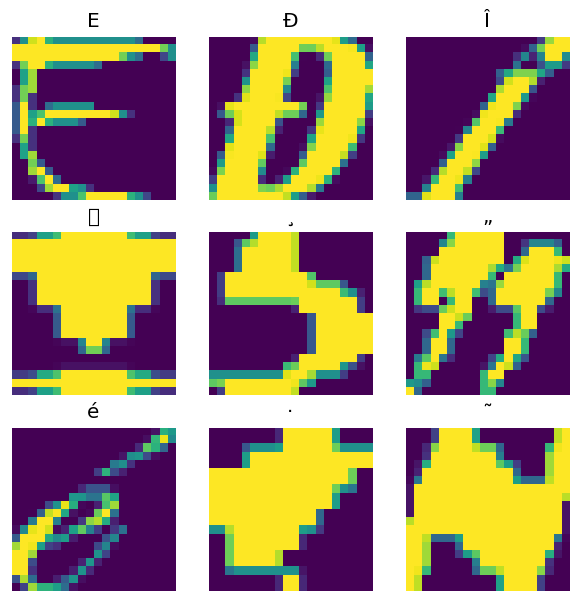

In [49]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6,6), dpi=120)

for n in range(9):
  plt.subplot(3,3,n+1)
  plt.imshow(features['image'][..., n])
  plt.title(chr(features['m_label'][n]))
  plt.axis('off')

## Lower level functions

So far this tutorial has focused on the highest-level utilities for reading csv data. There are two other APIs that may be helpful for advanced users if your use-case doesn't fit the basic patterns.

* `tf.io.decode_csv`: a function for parsing lines of text into a list of CSV column tensors.
* `tf.data.experimental.CsvDataset`: a lower-level CSV dataset constructor.

This section recreates functionality provided by `tf.data.experimental.make_csv_dataset`, to demonstrate how this lower-level functionality can be used.


### `tf.io.decode_csv`

This function decodes a string, or list of strings into a list of columns.

Unlike `tf.data.experimental.make_csv_dataset` this function does not try to guess column data-types. You specify the column types by providing a list of `record_defaults` containing a value of the correct type, for each column.

To read the Titanic data **as strings** using `tf.io.decode_csv` you would say:

In [50]:
text = pathlib.Path(titanic_file_path).read_text()
lines = text.split('\n')[1:-1]

all_strings = [str()]*10
all_strings

['', '', '', '', '', '', '', '', '', '']

In [51]:
features = tf.io.decode_csv(lines, record_defaults=all_strings) 

for f in features:
  print(f"type: {f.dtype.name}, shape: {f.shape}")

type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)


To parse them with their actual types, create a list of `record_defaults` of the corresponding types: 

In [52]:
print(lines[0])

0,male,22.0,1,0,7.25,Third,unknown,Southampton,n


In [53]:
titanic_types = [int(), str(), float(), int(), int(), float(), str(), str(), str(), str()]
titanic_types

[0, '', 0.0, 0, 0, 0.0, '', '', '', '']

In [54]:
features = tf.io.decode_csv(lines, record_defaults=titanic_types) 

for f in features:
  print(f"type: {f.dtype.name}, shape: {f.shape}")

type: int32, shape: (627,)
type: string, shape: (627,)
type: float32, shape: (627,)
type: int32, shape: (627,)
type: int32, shape: (627,)
type: float32, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)


Note: It is more efficient to call `tf.io.decode_csv` on large batches of lines than on individual lines of CSV text.

### `tf.data.experimental.CsvDataset`

The `tf.data.experimental.CsvDataset` class provides a minimal CSV `Dataset` interface without the convenience features of the `tf.data.experimental.make_csv_dataset` function: column header parsing, column type-inference, automatic shuffling, file interleaving.

This constructor uses `record_defaults` the same way as `tf.io.decode_csv`:


In [55]:
simple_titanic = tf.data.experimental.CsvDataset(titanic_file_path, record_defaults=titanic_types, header=True)

for example in simple_titanic.take(1):
  print([e.numpy() for e in example])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']


The above code is basically equivalent to:

In [56]:
def decode_titanic_line(line):
  return tf.io.decode_csv(line, titanic_types)

manual_titanic = (
    # Load the lines of text
    tf.data.TextLineDataset(titanic_file_path)
    # Skip the header row.
    .skip(1)
    # Decode the line.
    .map(decode_titanic_line)
)

for example in manual_titanic.take(1):
  print([e.numpy() for e in example])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']


#### Multiple files

To parse the fonts dataset using `tf.data.experimental.CsvDataset`, you first need to determine the column types for the `record_defaults`. Start by inspecting the first row of one file:

In [57]:
font_line = pathlib.Path(font_csvs[0]).read_text().splitlines()[1]
print(font_line)

AGENCY,AGENCY FB,64258,0.400000,0,0.000000,35,21,51,22,20,20,1,1,1,21,101,210,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1,1,1,93,255,255,255,176,146,146,146,146,146,146,146,146,216,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,141,141,141,182,255,255,255,172,141,141,141,115,1,1,1,1,163,255,255,255,255,255,255,255,255,255,255,255,255,255,255,209,1,1,1,1,163,255,255,255,6,6,6,96,255,255,255,74,6,6,6,5,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1

Only the first two fields are strings, the rest are integers or floats, and you can get the total number of features by counting the commas:

In [58]:
num_font_features = font_line.count(',')+1
font_column_types = [str(), str()] + [float()]*(num_font_features-2)

The `tf.data.experimental.CsvDataset` constructor can take a list of input files, but reads them sequentially. The first file in the list of CSVs is `AGENCY.csv`:

In [59]:
font_csvs[0]

'fonts/AGENCY.csv'

So, when you pass the list of files to `CsvDataset`, the records from `AGENCY.csv` are read first:

In [60]:
simple_font_ds = tf.data.experimental.CsvDataset(
    font_csvs, 
    record_defaults=font_column_types, 
    header=True)

In [61]:
for row in simple_font_ds.take(10):
  print(row[0].numpy())

b'AGENCY'


b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'


To interleave multiple files, use `Dataset.interleave`.

Here's an initial dataset that contains the CSV file names: 

In [62]:
font_files = tf.data.Dataset.list_files("fonts/*.csv")

This shuffles the file names each epoch:

In [63]:
print('Epoch 1:')
for f in list(font_files)[:5]:
  print("    ", f.numpy())
print('    ...')
print()

print('Epoch 2:')
for f in list(font_files)[:5]:
  print("    ", f.numpy())
print('    ...')

Epoch 1:
     b'fonts/YI BAITI.csv'
     b'fonts/HAETTENSCHWEILER.csv'
     b'fonts/SKETCHFLOW.csv'
     b'fonts/JUICE.csv'
     b'fonts/CONSOLAS.csv'
    ...

Epoch 2:
     b'fonts/PHAGSPA.csv'
     b'fonts/GILL.csv'
     b'fonts/ROCKWELL.csv'
     b'fonts/JUICE.csv'
     b'fonts/SUPERFRENCH.csv'
    ...


The `interleave` method takes a `map_func` that creates a child-`Dataset` for each element of the parent-`Dataset`.

Here, you want to create a `tf.data.experimental.CsvDataset` from each element of the dataset of files:

In [64]:
def make_font_csv_ds(path):
  return tf.data.experimental.CsvDataset(
    path, 
    record_defaults=font_column_types, 
    header=True)

The `Dataset` returned by interleave returns elements by cycling over a number of the child-`Dataset`s. Note, below, how the dataset cycles over `cycle_length=3` three font files:

In [65]:
font_rows = font_files.interleave(make_font_csv_ds,
                                  cycle_length=3)

In [66]:
fonts_dict = {'font_name':[], 'character':[]}

for row in font_rows.take(10):
  fonts_dict['font_name'].append(row[0].numpy().decode())
  fonts_dict['character'].append(chr(int(row[2].numpy())))

pd.DataFrame(fonts_dict)

,font_name,character
0,STENCIL,◊
1,EDWARDIAN,
2,SITKA,ﬄ
3,STENCIL,≥
4,EDWARDIAN,
5,SITKA,ﬃ
6,STENCIL,≤
7,EDWARDIAN,◊
8,SITKA,ﬂ
9,STENCIL,≠


#### Performance


Earlier, it was noted that `tf.io.decode_csv` is more efficient when run on a batch of strings.

It is possible to take advantage of this fact, when using large batch sizes, to improve CSV loading performance (but try [caching](#caching) first).

With the built-in loader 20, 2048-example batches take about 17s. 

In [67]:
BATCH_SIZE=2048
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern = "fonts/*.csv",
    batch_size=BATCH_SIZE, num_epochs=1,
    num_parallel_reads=100)

In [68]:
%%time
for i,batch in enumerate(fonts_ds.take(20)):
  print('.',end='')

print()

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


CPU times: user 48.7 s, sys: 3.96 s, total: 52.7 s
Wall time: 20.4 s


Passing **batches of text lines** to`decode_csv` runs faster, in about 5s:

In [69]:
fonts_files = tf.data.Dataset.list_files("fonts/*.csv")
fonts_lines = fonts_files.interleave(
    lambda fname:tf.data.TextLineDataset(fname).skip(1), 
    cycle_length=100).batch(BATCH_SIZE)

fonts_fast = fonts_lines.map(lambda x: tf.io.decode_csv(x, record_defaults=font_column_types))

In [70]:
%%time
for i,batch in enumerate(fonts_fast.take(20)):
  print('.',end='')

print()

....................


CPU times: user 3.93 s, sys: 125 ms, total: 4.06 s
Wall time: 931 ms


For another example of increasing CSV performance by using large batches, refer to the [Overfit and underfit tutorial](../keras/overfit_and_underfit.ipynb).

This sort of approach may work, but consider other options like `Dataset.cache` and `tf.data.Dataset.snapshot`, or re-encoding your data into a more streamlined format.